# Product Sales Forecasting in Python with Facebook's Prophet Library

## Import Libraries

In [1]:
#Import Python Libraries

#Import pandas and numpy
import pandas as pd
import numpy as np

# From matplotlib, import pyplot under the alias plt
from matplotlib import pyplot as plt

#Import seaborn
import seaborn as sns

# Import `statsmodels.api` module
import statsmodels.api as sm

#Import sklearn
from sklearn.model_selection import TimeSeriesSplit

#Import Prophet library for forecasting modeling
from prophet import Prophet
from prophet.utilities import regressor_coefficients

If plotly error raised. Go to your operating system's command line and upgrade plotly using pip install command below:

pip install --upgrade plotly

This dataset is from Coursera course: Strategic Business Analytics Spec - ESSEC Foundations of Strategic Business Analytics

## Import Data

In [3]:
# Give the location of your file
chocolate = pd.read_csv("datasets/DATA_4.04_CHOC.csv")

#Check results
print(chocolate.tail())

#Print column names
print(chocolate.columns)

     time       sales  year         month
115   116   39.545249  2009     08_August
116   117   77.288495  2009  09_September
117   118  186.201240  2009    10_October
118   119  421.793649  2009   11_November
119   120  732.756916  2009   12_December
Index(['time', 'sales', 'year', 'month'], dtype='object')


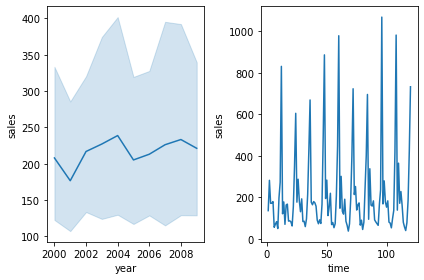

In [3]:
#Initialize subplots with number of rows and number of columns
figure, ax = plt.subplots(nrows = 1, ncols = 2)

# Timeplot (plot sales over time)
sns.lineplot(x='year', y='sales',
             data=chocolate, ax=ax[0])

sns.lineplot(x='time', y='sales',
             data=chocolate, ax=ax[1])

plt.tight_layout()
plt.show()

In [17]:
#Dimensions of dataset
print(chocolate.shape)

(120, 4)


In [99]:
#Summary statistics
chocolate[['sales', 'year']].describe()

sales         year
count   120.000000   120.000000
mean    216.699587  2004.500000
std     210.227811     2.884324
min      36.854401  2000.000000
25%      82.883337  2002.000000
50%     163.041470  2004.500000
75%     221.328853  2007.000000
max    1068.622183  2009.000000

In [4]:
from datetime import datetime
#Create date sequence of 120 periods so we have a proper time object as our index
#The date format should be YYYY-MM-DD for the prophet library
dates = pd.date_range('2000-01-01', periods=120, freq = 'MS')

print(dates)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2009-03-01', '2009-04-01', '2009-05-01', '2009-06-01',
               '2009-07-01', '2009-08-01', '2009-09-01', '2009-10-01',
               '2009-11-01', '2009-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')


In [6]:
#Add date sequence I just created to dataframe
chocolate['dates'] = dates

#Check results
print(chocolate['dates'].head())

0   2000-01-01
1   2000-02-01
2   2000-03-01
3   2000-04-01
4   2000-05-01
Name: dates, dtype: datetime64[ns]


In [7]:
#Subset only the date and sales columns
chocolate = chocolate[["dates", "sales"]].copy()

#Rename columns for Prophet model
chocolate.rename(columns = {'dates': 'ds', 'sales': 'y'},inplace = True)

#Check results of renaming
print(chocolate.columns)

Index(['ds', 'y'], dtype='object')


In [8]:
#Check dataframe
print(chocolate.head())

          ds           y
0 2000-01-01  135.481871
1 2000-02-01  281.758729
2 2000-03-01  170.800637
3 2000-04-01  171.095116
4 2000-05-01  179.024920


In [35]:
#Create test/train split
train = chocolate[:int(chocolate.shape[0]*0.80)]
test = chocolate[int(chocolate.shape[0]*0.80):]

#Check results
print(train.shape)
print(test.shape)

(96, 2)
(24, 2)


In [85]:
#Check results of split
print(train.tail())
print(test.head(5))

           ds            y
91 2007-08-01    72.525017
92 2007-09-01    64.841094
93 2007-10-01   166.763648
94 2007-11-01   236.411063
95 2007-12-01  1068.622183
            ds           y
96  2008-01-01  167.742933
97  2008-02-01  278.868703
98  2008-03-01  178.138651
99  2008-04-01  152.283093
100 2008-05-01  182.791638


# Run prophet model for forecasting

In [79]:
#We need to initiate a Prophet object
m = Prophet(seasonality_mode='multiplicative')

#Fit model on training data
m.fit(train)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -113.171
Iteration  1. Log joint probability =    102.235. Improved by 215.406.
Iteration  2. Log joint probability =    147.986. Improved by 45.7512.
Iteration  3. Log joint probability =    192.081. Improved by 44.0945.
Iteration  4. Log joint probability =    219.104. Improved by 27.0233.
Iteration  5. Log joint probability =    228.676. Improved by 9.57228.
Iteration  6. Log joint probability =    228.712. Improved by 0.0361063.
Iteration  7. Log joint probability =     228.73. Improved by 0.0180627.
Iteration  8. Log joint probability =    228.869. Improved by 0.139009.
Iteration  9. Log joint probability =    229.623. Improved by 0.753326.
Iteration 10. Log joint probability =    229.772. Improved by 0.14869.
Iteration 11. Log joint probability =    229.915. Improved by 0.143571.
Iteration 12. Log joint probability =    232.403. Improved by 2.48751.
Iteration 13. Log joint probability =    232.567. Improved by 0.164512.
Iteration 14. Log joint prob

In [88]:
#Make future dataframe
#Freq is set to daily by default, but we will change this to Month Start
future = m.make_future_dataframe(freq = 'MS', periods=12)
print(future)

            ds
0   2000-01-01
1   2000-02-01
2   2000-03-01
3   2000-04-01
4   2000-05-01
..         ...
103 2008-08-01
104 2008-09-01
105 2008-10-01
106 2008-11-01
107 2008-12-01

[108 rows x 1 columns]


In [83]:
#Use predict function to make predictions
forecast = m.predict(future)

#Check results
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail() 

ds        yhat  yhat_lower  yhat_upper
115 2009-08-01   69.229006    3.166671  134.402300
116 2009-09-01   77.314881   10.900819  145.416444
117 2009-10-01  222.986033  154.375571  287.922629
118 2009-11-01  432.001812  369.413153  498.518098
119 2009-12-01  909.875934  842.802454  977.624026

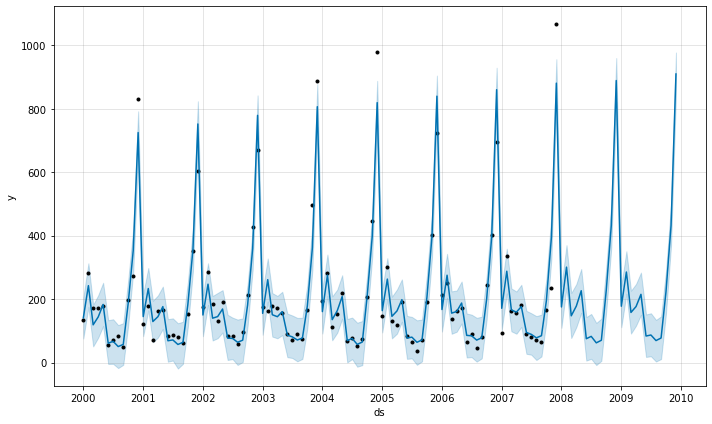

In [84]:
#Plot the forecast
forecast_plot = m.plot(forecast)

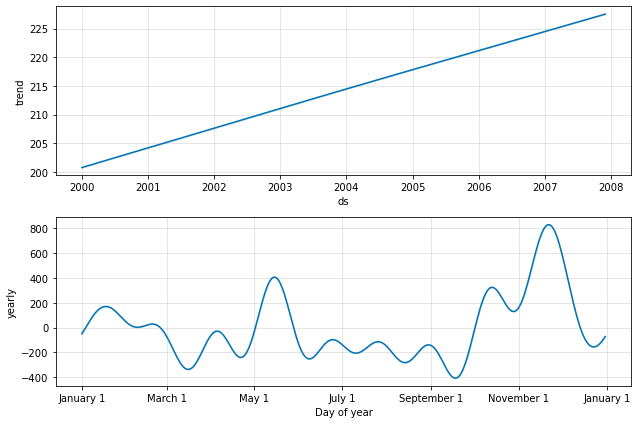

In [78]:
#Plot forecast components - if you want to see the trend and any seasonality
fig = m.plot_components(forecast)

In the yearly components plot we see that there are peaks in May and November

In [73]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

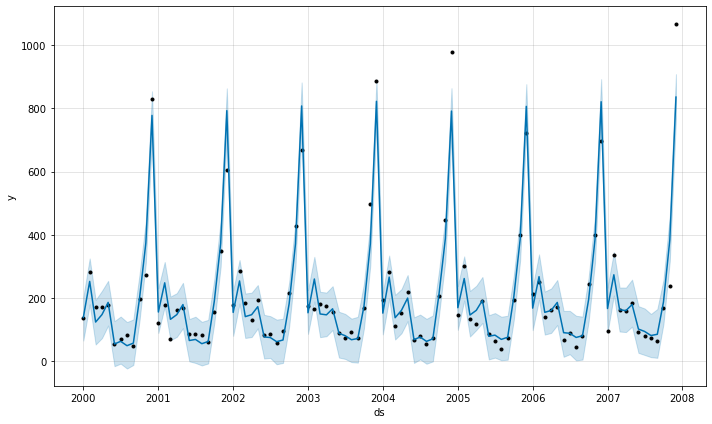

In [70]:
forecast = m.predict()
fig = m.plot(forecast)
plt.show()

In [75]:
chocolate_cv = cross_validation(m, horizon = '90 days', period = '30 days', parallel  = 'processes')

INFO:prophet:Making 82 forecasts with cutoffs between 2001-01-06 00:00:00 and 2007-09-02 00:00:00
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7ff7106cc8b0>
INFO:prophet:n_changepoints greater than number of observations. Using 9.
INFO:prophet:n_changepoints greater than number of observations. Using 10.



Initial log joint probability = -63.3525
Iteration  1. Log joint probability =     7.6597. Improved by 71.0122.

Initial log joint probability = -61.921
Iteration  2. Log joint probability =    17.1218. Improved by 9.46214.
Iteration  1. Log joint probability =    8.52982. Improved by 70.4508.
Iteration  3. Log joint probability =    27.8894. Improved by 10.7675.


INFO:prophet:n_changepoints greater than number of observations. Using 11.


Iteration  2. Log joint probability =     19.813. Improved by 11.2832.

Initial log joint probability = -60.6433
Iteration  4. Log joint probability =    36.0172. Improved by 8.12785.
Iteration  1. Log joint probability =     9.8362. Improved by 70.4795.
Iteration  3. Log joint probability =    24.8448. Improved by 5.03175.
Iteration  5. Log joint probability =    47.7964. Improved by 11.7792.
Iteration  4. Log joint probability =    37.7394. Improved by 12.8946.

Initial log joint probability = -61.4754
Iteration  2. Log joint probability =    19.9447. Improved by 10.1085.
Iteration  6. Log joint probability =    51.4714. Improved by 3.67496.
Iteration  5. Log joint probability =      46.37. Improved by 8.63059.
Iteration  1. Log joint probability =    10.7636. Improved by 72.239.
Iteration  3. Log joint probability =    34.0006. Improved by 14.0559.
Iteration  7. Log joint probability =    63.5113. Improved by 12.0399.
Iteration  6. Log joint probability =    54.8941. Improved by 8.5

INFO:prophet:n_changepoints greater than number of observations. Using 11.


Iteration  3. Log joint probability =    31.6358. Improved by 9.44683.
Iteration  5. Log joint probability =    52.5138. Improved by 8.04393.
Iteration  9. Log joint probability =    80.2878. Improved by 8.55933.
Iteration  7. Log joint probability =    86.5945. Improved by 31.7003.
Iteration  4. Log joint probability =    40.8155. Improved by 9.17976.
Iteration  6. Log joint probability =    64.5695. Improved by 12.0557.
Iteration 10. Log joint probability =    89.7169. Improved by 9.42908.
Iteration  8. Log joint probability =    100.354. Improved by 13.7596.
Iteration  5. Log joint probability =    53.4868. Improved by 12.6713.
Iteration  7. Log joint probability =    76.3556. Improved by 11.7861.
Iteration 11. Log joint probability =    90.7177. Improved by 1.00073.
Iteration  9. Log joint probability =    109.407. Improved by 9.05311.
Iteration  6. Log joint probability =    62.5014. Improved by 9.01454.
Iteration  8. Log joint probability =    86.1003. Improved by 9.7447.
Iterati

Iteration 56. Log joint probability =    274.221. Improved by 0.905945.
Iteration 33. Log joint probability =    307.147. Improved by 0.531558.
Iteration 42. Log joint probability =    272.221. Improved by 1.27141.
Iteration 57. Log joint probability =    274.317. Improved by 0.0960886.
Iteration 58. Log joint probability =    274.599. Improved by 0.282116.
Iteration 59. Log joint probability =    275.781. Improved by 1.18239.
Iteration 40. Log joint probability =    302.543. Improved by 0.151092.
Iteration 43. Log joint probability =    273.001. Improved by 0.780818.
Iteration 60. Log joint probability =    276.546. Improved by 0.764695.
Iteration 61. Log joint probability =    276.586. Improved by 0.0403694.
Iteration 44. Log joint probability =     274.59. Improved by 1.58839.
Iteration 34. Log joint probability =    309.872. Improved by 2.72421.
Iteration 62. Log joint probability =    276.641. Improved by 0.0547855.
Iteration 63. Log joint probability =    277.027. Improved by 0.3

Iteration 129. Log joint probability =    278.249. Improved by 2.85768e-08.
Iteration 130. Log joint probability =    278.249. Improved by 1.65305e-08.
Iteration 131. Log joint probability =    278.249. Improved by 8.41378e-07.
Iteration 132. Log joint probability =    278.249. Improved by 4.51229e-08.
Iteration 67. Log joint probability =    315.349. Improved by 0.0610884.
Iteration 133. Log joint probability =    278.249. Improved by 6.58138e-07.
Iteration 134. Log joint probability =    278.249. Improved by 4.30059e-07.
Iteration 63. Log joint probability =    279.464. Improved by 0.00802225.
Iteration 135. Log joint probability =    278.249. Improved by 1.2211e-06.
Iteration 136. Log joint probability =    278.249. Improved by 2.33262e-07.
Iteration 68. Log joint probability =    315.659. Improved by 0.310122.
Iteration 64. Log joint probability =    279.558. Improved by 0.094073.
Iteration 69. Log joint probability =    316.313. Improved by 0.653721.
Iteration 48. Log joint probab

Iteration 91. Log joint probability =    320.639. Improved by 0.0705982.
Iteration 137. Log joint probability =    322.727. Improved by 0.00400204.
Iteration 138. Log joint probability =     322.73. Improved by 0.00297663.
Iteration 139. Log joint probability =    322.733. Improved by 0.00271815.
Iteration 140. Log joint probability =    322.735. Improved by 0.00164047.
Iteration 141. Log joint probability =    322.736. Improved by 0.00156605.
Iteration 92. Log joint probability =    320.688. Improved by 0.0487785.
Iteration 142. Log joint probability =    322.738. Improved by 0.00166896.
Iteration 63. Log joint probability =    324.966. Improved by 0.273025.
Iteration 143. Log joint probability =     322.74. Improved by 0.00231392.
Iteration 144. Log joint probability =    322.748. Improved by 0.0074028.
Iteration 145. Log joint probability =    322.752. Improved by 0.00465441.
Iteration 146. Log joint probability =    322.756. Improved by 0.00390272.
Iteration 147. Log joint probabil

Iteration 228. Log joint probability =    322.915. Improved by 0.000886517.
Iteration 229. Log joint probability =    322.916. Improved by 0.00137894.
Iteration 230. Log joint probability =    322.917. Improved by 0.000960966.
Iteration 111. Log joint probability =    321.692. Improved by 0.218671.
Iteration 231. Log joint probability =    322.918. Improved by 0.00108904.
Iteration 81. Log joint probability =    334.096. Improved by 0.752578.
Iteration 232. Log joint probability =    322.919. Improved by 0.000860071.
Iteration 233. Log joint probability =     322.92. Improved by 0.00127443.
Iteration 234. Log joint probability =    322.921. Improved by 0.000989406.
Iteration 235. Log joint probability =    322.922. Improved by 0.000626997.
Iteration 82. Log joint probability =    334.416. Improved by 0.32014.
Iteration 112. Log joint probability =    321.782. Improved by 0.0895481.
Iteration 113. Log joint probability =    321.873. Improved by 0.0916502.
Iteration 114. Log joint probab

Iteration 360. Log joint probability =    323.407. Improved by 0.00890339.
Iteration 361. Log joint probability =     323.41. Improved by 0.00340798.
Iteration 147. Log joint probability =    323.435. Improved by 0.00476046.
Iteration 362. Log joint probability =    323.413. Improved by 0.00264738.
Iteration 108. Log joint probability =    339.243. Improved by 0.0819362.
Iteration 363. Log joint probability =    323.416. Improved by 0.00287065.
Iteration 364. Log joint probability =    323.418. Improved by 0.00221478.
Iteration 148. Log joint probability =    323.441. Improved by 0.0053333.
Iteration 109. Log joint probability =    339.284. Improved by 0.0413615.
Iteration 365. Log joint probability =    323.423. Improved by 0.0053188.
Iteration 366. Log joint probability =    323.425. Improved by 0.00141505.
Iteration 367. Log joint probability =    323.427. Improved by 0.00205332.
Iteration 149. Log joint probability =    323.445. Improved by 0.00391229.
Iteration 368. Log joint prob

Iteration 439. Log joint probability =    323.673. Improved by 0.0144058.
Iteration 440. Log joint probability =    323.685. Improved by 0.011679.
Iteration 121. Log joint probability =    340.241. Improved by 0.10071.
Iteration 168. Log joint probability =    323.615. Improved by 0.000946386.
Iteration 441. Log joint probability =    323.694. Improved by 0.00976277.
Iteration 442. Log joint probability =    323.704. Improved by 0.00942066.
Iteration 443. Log joint probability =    323.711. Improved by 0.00702008.
Iteration 444. Log joint probability =    323.719. Improved by 0.00825543.
Iteration 169. Log joint probability =    323.616. Improved by 0.000420708.
Iteration 445. Log joint probability =    323.724. Improved by 0.00497636.
Iteration 122. Log joint probability =    340.281. Improved by 0.0399963.
Iteration 446. Log joint probability =    323.729. Improved by 0.00451808.
Iteration 170. Log joint probability =    323.618. Improved by 0.00160624.
Iteration 447. Log joint proba

Iteration 190. Log joint probability =    324.059. Improved by 0.00100822.
Iteration 528. Log joint probability =     323.91. Improved by 0.00106608.
Iteration 138. Log joint probability =    341.427. Improved by 0.00784338.
Iteration 529. Log joint probability =    323.912. Improved by 0.00178956.
Iteration 530. Log joint probability =    323.913. Improved by 0.000943223.
Iteration 191. Log joint probability =    324.083. Improved by 0.0239135.
Iteration 531. Log joint probability =    323.914. Improved by 0.00154947.
Iteration 532. Log joint probability =    323.915. Improved by 0.000721155.
Iteration 533. Log joint probability =    323.917. Improved by 0.00251507.
Iteration 534. Log joint probability =    323.919. Improved by 0.00180992.
Iteration 535. Log joint probability =    323.921. Improved by 0.0014162.
Iteration 192. Log joint probability =    324.175. Improved by 0.0920665.
Iteration 536. Log joint probability =    323.922. Improved by 0.00161237.
Iteration 537. Log joint p

Iteration 607. Log joint probability =    324.292. Improved by 0.00432653.
Iteration 213. Log joint probability =    324.993. Improved by 0.00880803.
Iteration 608. Log joint probability =    324.296. Improved by 0.00370075.
Iteration 609. Log joint probability =    324.299. Improved by 0.00286241.
Iteration 610. Log joint probability =    324.301. Improved by 0.00240612.
Iteration 156. Log joint probability =    343.321. Improved by 0.067516.
Iteration 611. Log joint probability =    324.305. Improved by 0.00426528.
Iteration 214. Log joint probability =     325.01. Improved by 0.0171719.
Iteration 612. Log joint probability =    324.309. Improved by 0.00339039.
Iteration 613. Log joint probability =    324.311. Improved by 0.00198193.
Iteration 614. Log joint probability =    324.312. Improved by 0.00180038.
Iteration 157. Log joint probability =    343.465. Improved by 0.143648.
Iteration 615. Log joint probability =    324.314. Improved by 0.00135291.
Iteration 215. Log joint proba

Iteration 687. Log joint probability =    326.428. Improved by 0.00133498.
Iteration 688. Log joint probability =    326.429. Improved by 0.000984175.
Iteration 689. Log joint probability =    326.431. Improved by 0.00185299.
Iteration 690. Log joint probability =    326.432. Improved by 0.0013708.
Iteration 691. Log joint probability =    326.435. Improved by 0.0022352.
Iteration 240. Log joint probability =    325.168. Improved by 0.000217993.
Iteration 175. Log joint probability =     344.07. Improved by 0.0228371.
Iteration 692. Log joint probability =    326.435. Improved by 0.000868786.
Iteration 693. Log joint probability =    326.437. Improved by 0.00136163.
Iteration 241. Log joint probability =    325.168. Improved by 0.000949437.
Iteration 694. Log joint probability =    326.438. Improved by 0.00109539.
Iteration 176. Log joint probability =    344.108. Improved by 0.0380668.
Iteration 695. Log joint probability =    326.439. Improved by 0.00117919.
Iteration 696. Log joint 

Iteration 763. Log joint probability =     326.83. Improved by 0.00231036.
Iteration 764. Log joint probability =    326.831. Improved by 0.00133353.
Iteration 765. Log joint probability =    326.833. Improved by 0.00151594.
Iteration 260. Log joint probability =    325.182. Improved by 0.000120899.
Iteration 192. Log joint probability =    344.632. Improved by 0.0354711.
Iteration 766. Log joint probability =    326.833. Improved by 0.000482331.
Iteration 767. Log joint probability =    326.835. Improved by 0.00174504.
Iteration 768. Log joint probability =    326.843. Improved by 0.00777595.
Iteration 769. Log joint probability =    326.844. Improved by 0.000896535.
Iteration 261. Log joint probability =    325.182. Improved by 0.000499928.
Iteration 193. Log joint probability =    344.676. Improved by 0.0437894.
Iteration 770. Log joint probability =    326.844. Improved by 0.000784302.
Iteration 771. Log joint probability =    326.847. Improved by 0.0022714.
Iteration 262. Log join

Iteration 215. Log joint probability =    344.971. Improved by 0.0141206.
Iteration 856. Log joint probability =    327.049. Improved by 0.000829889.
Iteration 857. Log joint probability =    327.049. Improved by 0.00074222.
Iteration 858. Log joint probability =     327.05. Improved by 0.000733063.
Iteration 283. Log joint probability =    325.217. Improved by 4.94313e-06.
Iteration 859. Log joint probability =    327.051. Improved by 0.000918599.
Iteration 860. Log joint probability =    327.052. Improved by 0.00123655.
Iteration 861. Log joint probability =    327.054. Improved by 0.00173804.
Iteration 284. Log joint probability =    325.218. Improved by 0.00165411.
Iteration 862. Log joint probability =    327.054. Improved by 0.000409657.
Iteration 863. Log joint probability =    327.055. Improved by 0.000783422.
Iteration 216. Log joint probability =    344.972. Improved by 0.000941551.
Iteration 864. Log joint probability =    327.056. Improved by 0.000538401.
Iteration 865. Log

INFO:prophet:n_changepoints greater than number of observations. Using 12.


Iteration 229. Log joint probability =    345.081. Improved by 0.004921.
Iteration 912. Log joint probability =    327.135. Improved by 0.000382687.
Iteration 913. Log joint probability =    327.135. Improved by 0.000830672.
Iteration 914. Log joint probability =    327.136. Improved by 0.000725663.
Iteration 230. Log joint probability =    345.082. Improved by 0.000371579.
Iteration 301. Log joint probability =    325.226. Improved by 0.000319254.
Iteration 915. Log joint probability =    327.137. Improved by 0.000861965.
Iteration 916. Log joint probability =    327.138. Improved by 0.000515034.
Iteration 231. Log joint probability =    345.093. Improved by 0.0110096.
Iteration 302. Log joint probability =    325.227. Improved by 0.00077545.
Iteration 917. Log joint probability =    327.138. Improved by 0.000505112.
Iteration 303. Log joint probability =    325.227. Improved by 4.2579e-05.
Iteration 918. Log joint probability =    327.138. Improved by 0.000297311.
Iteration 919. Log 

Iteration 986. Log joint probability =    327.219. Improved by 0.00118962.
Iteration 321. Log joint probability =    325.256. Improved by 0.00106685.
Iteration 987. Log joint probability =    327.221. Improved by 0.00123685.
Iteration 988. Log joint probability =    327.222. Improved by 0.0014491.
Iteration 989. Log joint probability =    327.223. Improved by 0.000875367.
Iteration 990. Log joint probability =    327.224. Improved by 0.000788806.
Iteration 991. Log joint probability =    327.225. Improved by 0.000816061.
Iteration 992. Log joint probability =    327.228. Improved by 0.00379044.
Iteration 993. Log joint probability =    327.231. Improved by 0.00277327.
Iteration  6. Log joint probability =    60.1853. Improved by 8.2535.
Iteration 247. Log joint probability =    345.463. Improved by 0.0488971.
Iteration 322. Log joint probability =    325.258. Improved by 0.00119839.
Iteration 248. Log joint probability =    345.541. Improved by 0.0777421.
Iteration 323. Log joint proba

Iteration 1063. Log joint probability =    327.328. Improved by 0.000356105.
Iteration 1064. Log joint probability =    327.329. Improved by 0.000835354.
Iteration 270. Log joint probability =    346.925. Improved by 0.00511089.
Iteration 1065. Log joint probability =     327.33. Improved by 0.000740188.
Iteration 342. Log joint probability =    325.275. Improved by 0.00126213.
Iteration 1066. Log joint probability =     327.33. Improved by 0.00045299.
Iteration 1067. Log joint probability =    327.331. Improved by 0.00055383.
Iteration 1068. Log joint probability =    327.332. Improved by 0.000893105.
Iteration 1069. Log joint probability =    327.332. Improved by 0.000266555.
Iteration 343. Log joint probability =    325.276. Improved by 0.00148427.
Iteration 1070. Log joint probability =    327.332. Improved by 0.000313063.
Iteration 344. Log joint probability =    325.277. Improved by 0.000195957.
Iteration 271. Log joint probability =    346.928. Improved by 0.00307473.
Iteration 

Iteration 1151. Log joint probability =    327.428. Improved by 0.00397731.
Iteration 1152. Log joint probability =    327.429. Improved by 0.000989541.
Iteration 1153. Log joint probability =     327.43. Improved by 0.000844238.
Iteration 372. Log joint probability =    325.286. Improved by 4.97037e-05.
Iteration 295. Log joint probability =    347.208. Improved by 0.0195763.
Iteration 1154. Log joint probability =    327.432. Improved by 0.00263908.
Iteration 18. Log joint probability =    205.806. Improved by 5.69302.
Iteration 1155. Log joint probability =    327.433. Improved by 0.000937955.
Iteration 296. Log joint probability =     347.21. Improved by 0.00194988.
Iteration 1156. Log joint probability =    327.434. Improved by 0.000614254.
Iteration 1157. Log joint probability =    327.434. Improved by 0.00043801.
Iteration 373. Log joint probability =    325.286. Improved by 7.46591e-05.
Iteration 1158. Log joint probability =    327.436. Improved by 0.00185667.
Iteration 374. L

Iteration 1238. Log joint probability =    327.542. Improved by 0.000639777.
Iteration 319. Log joint probability =    347.388. Improved by 1.23789e-05.
Iteration 1239. Log joint probability =    327.542. Improved by 0.00063785.
Iteration 1240. Log joint probability =    327.542. Improved by 9.98968e-06.
Iteration 1241. Log joint probability =    327.543. Improved by 0.000413547.
Iteration 397. Log joint probability =    325.288. Improved by 1.5624e-05.
Iteration 1242. Log joint probability =    327.543. Improved by 0.000571988.
Iteration 320. Log joint probability =     347.39. Improved by 0.0022928.
Iteration 1243. Log joint probability =    327.543. Improved by 6.76219e-05.
Iteration 1244. Log joint probability =    327.544. Improved by 0.00105724.
Iteration 1245. Log joint probability =    327.545. Improved by 0.000379796.
Iteration 1246. Log joint probability =    327.545. Improved by 0.00014832.
Iteration 321. Log joint probability =    347.391. Improved by 0.000306831.
Iteration

Iteration 1327. Log joint probability =    327.835. Improved by 0.00118626.
Iteration 421. Log joint probability =    325.293. Improved by 2.21095e-05.
Iteration 1328. Log joint probability =    327.836. Improved by 0.00158829.
Iteration 1329. Log joint probability =    327.838. Improved by 0.00187841.
Iteration 1330. Log joint probability =     327.84. Improved by 0.00134608.
Iteration 1331. Log joint probability =    327.841. Improved by 0.00149304.
Iteration 1332. Log joint probability =    327.842. Improved by 0.000885166.
Iteration 1333. Log joint probability =    327.843. Improved by 0.00142874.
Iteration 344. Log joint probability =     347.51. Improved by 0.00903554.
Iteration 36. Log joint probability =    323.422. Improved by 0.0281006.
Iteration 1334. Log joint probability =    327.845. Improved by 0.00128192.
Iteration 1335. Log joint probability =    327.846. Improved by 0.00145045.
Iteration 1336. Log joint probability =    327.848. Improved by 0.0016579.
Iteration 345. L

Iteration 1398. Log joint probability =    328.006. Improved by 0.00137365.
Iteration 1399. Log joint probability =    328.007. Improved by 0.000874165.
Iteration 47. Log joint probability =    325.991. Improved by 0.0489658.
Iteration 370. Log joint probability =    350.239. Improved by 0.0197884.
Iteration 1400. Log joint probability =    328.008. Improved by 0.00125165.
Iteration 441. Log joint probability =      325.3. Improved by 0.000176992.
Iteration 1401. Log joint probability =    328.011. Improved by 0.00214585.
Iteration 1402. Log joint probability =    328.012. Improved by 0.0011813.
Iteration 1403. Log joint probability =    328.032. Improved by 0.0208129.
Iteration 371. Log joint probability =    350.245. Improved by 0.00543688.
Iteration 1404. Log joint probability =    328.036. Improved by 0.00337447.
Iteration 372. Log joint probability =    350.281. Improved by 0.0358756.
Iteration 373. Log joint probability =    350.332. Improved by 0.0515422.
Iteration 1405. Log joi

Iteration 75. Log joint probability =    372.546. Improved by 0.0481527.
Iteration 457. Log joint probability =    325.306. Improved by 0.000221125.
Iteration 1466. Log joint probability =    328.295. Improved by 0.00250961.
Iteration 76. Log joint probability =    372.564. Improved by 0.018271.
Iteration 1467. Log joint probability =    328.296. Improved by 0.00137994.
Iteration 77. Log joint probability =    372.605. Improved by 0.0407809.
Iteration 458. Log joint probability =    325.306. Improved by 6.6518e-05.
Iteration 1468. Log joint probability =    328.298. Improved by 0.00221255.
Iteration 391. Log joint probability =    350.837. Improved by 0.0172624.
Iteration 78. Log joint probability =    372.627. Improved by 0.0225856.
Iteration 459. Log joint probability =    325.306. Improved by 1.54983e-05.
Iteration 1469. Log joint probability =      328.3. Improved by 0.00195378.
Iteration 392. Log joint probability =    350.856. Improved by 0.0191822.
Iteration 1470. Log joint prob

Iteration 128. Log joint probability =    375.025. Improved by 0.0384899.
Iteration 1523. Log joint probability =     328.44. Improved by 0.00144203.
Iteration 409. Log joint probability =    351.602. Improved by 0.00938021.
Iteration 1524. Log joint probability =    328.441. Improved by 0.00086563.
Iteration 129. Log joint probability =    375.052. Improved by 0.0272458.
Iteration 130. Log joint probability =    375.069. Improved by 0.0172365.
Iteration 1525. Log joint probability =    328.446. Improved by 0.00563126.
Iteration 1526. Log joint probability =     328.45. Improved by 0.00377355.
Iteration 1527. Log joint probability =    328.451. Improved by 0.000966076.
Iteration 131. Log joint probability =    375.569. Improved by 0.499617.
Iteration 473. Log joint probability =    325.308. Improved by 0.00052343.
Iteration 1528. Log joint probability =    328.452. Improved by 0.00141883.
Iteration 132. Log joint probability =    375.643. Improved by 0.0743972.
Iteration 1529. Log join

Iteration 487. Log joint probability =    325.313. Improved by 0.000259272.
Iteration 421. Log joint probability =    351.862. Improved by 0.0360925.
Iteration 170. Log joint probability =    380.223. Improved by 0.00526612.
Iteration 1574. Log joint probability =    328.575. Improved by 0.0144707.
Iteration 1575. Log joint probability =    328.586. Improved by 0.0112971.
Iteration 171. Log joint probability =    380.227. Improved by 0.00358135.
Iteration 1576. Log joint probability =    328.596. Improved by 0.00936384.
Iteration 1577. Log joint probability =    328.604. Improved by 0.00796437.
Iteration 172. Log joint probability =    380.231. Improved by 0.00430886.
Iteration 488. Log joint probability =    325.313. Improved by 0.00028752.
Iteration 173. Log joint probability =    380.237. Improved by 0.00581066.
Iteration 1578. Log joint probability =     328.61. Improved by 0.0060991.
Iteration 1579. Log joint probability =    328.615. Improved by 0.00514666.
Iteration 174. Log joi

Iteration 432. Log joint probability =    352.194. Improved by 0.0203527.
Iteration 1620. Log joint probability =     328.68. Improved by 0.000975418.
Iteration 209. Log joint probability =    380.557. Improved by 0.0091723.
Iteration 1621. Log joint probability =    328.681. Improved by 0.000726343.
Iteration 210. Log joint probability =    380.564. Improved by 0.0072446.
Iteration 502. Log joint probability =    325.318. Improved by 0.000169774.
Iteration 1622. Log joint probability =    328.681. Improved by 0.000801312.
Iteration 211. Log joint probability =    380.571. Improved by 0.00681218.
Iteration 1623. Log joint probability =    328.687. Improved by 0.00524702.
Iteration 212. Log joint probability =    380.576. Improved by 0.00510265.
Iteration 1624. Log joint probability =    328.688. Improved by 0.00158162.
Iteration 433. Log joint probability =    352.213. Improved by 0.018293.
Iteration 213. Log joint probability =    380.582. Improved by 0.00614238.
Iteration 214. Log jo

Iteration 452. Log joint probability =    352.296. Improved by 0.00534612.
Iteration 1671. Log joint probability =     328.74. Improved by 0.000708608.
Iteration 517. Log joint probability =    325.321. Improved by 2.04225e-05.
Iteration 253. Log joint probability =    380.857. Improved by 0.0054402.
Iteration 1672. Log joint probability =    328.741. Improved by 0.000424826.
Iteration 254. Log joint probability =    380.861. Improved by 0.00447196.
Iteration 255. Log joint probability =    380.864. Improved by 0.00259039.
Iteration 256. Log joint probability =    380.867. Improved by 0.00370434.
Iteration 518. Log joint probability =    325.321. Improved by 0.000129727.
Iteration 1673. Log joint probability =    328.741. Improved by 0.000137629.
Iteration 257. Log joint probability =     380.87. Improved by 0.00281964.
Iteration 453. Log joint probability =    352.298. Improved by 0.00178772.
Iteration 1674. Log joint probability =    328.742. Improved by 0.000810414.
Iteration 1675. 

Iteration 1720. Log joint probability =    328.795. Improved by 0.000807182.
Iteration 469. Log joint probability =    352.379. Improved by 0.0011932.
Iteration 298. Log joint probability =    381.234. Improved by 0.0109857.
Iteration 1721. Log joint probability =    328.796. Improved by 0.000810729.
Iteration 299. Log joint probability =    381.239. Improved by 0.00480969.
Iteration 470. Log joint probability =     352.38. Improved by 0.000852807.
Iteration 1722. Log joint probability =    328.797. Improved by 0.000992983.
Iteration 1723. Log joint probability =    328.798. Improved by 0.000969735.
Iteration 300. Log joint probability =    381.243. Improved by 0.00434944.
Iteration 1724. Log joint probability =    328.798. Improved by 8.94193e-05.
Iteration 1725. Log joint probability =    328.799. Improved by 0.00160181.
Iteration 301. Log joint probability =    381.247. Improved by 0.00413806.
Iteration 1726. Log joint probability =    328.801. Improved by 0.00209006.
Iteration 1727

Iteration 1769. Log joint probability =    328.926. Improved by 0.000867711.
Iteration 483. Log joint probability =     352.39. Improved by 0.000111779.
Iteration 1770. Log joint probability =    328.928. Improved by 0.00193209.
Iteration 1771. Log joint probability =    328.929. Improved by 0.00131473.
Iteration 547. Log joint probability =    325.322. Improved by 1.89287e-05.
Iteration 1772. Log joint probability =     328.93. Improved by 0.000803824.
Iteration 484. Log joint probability =     352.39. Improved by 0.000576508.
Iteration 1773. Log joint probability =     328.93. Improved by 0.000562685.
Iteration 346. Log joint probability =     381.46. Improved by 0.0113088.
Iteration 1774. Log joint probability =    328.932. Improved by 0.00133509.
Iteration 1775. Log joint probability =    328.932. Improved by 0.000601811.
Iteration 1776. Log joint probability =    328.933. Improved by 0.000457552.
Iteration 485. Log joint probability =    352.391. Improved by 0.000514942.
Iteration

Iteration 386. Log joint probability =    381.569. Improved by 0.00138169.
Iteration 1820. Log joint probability =    329.033. Improved by 0.00239987.
Iteration 1821. Log joint probability =    329.044. Improved by 0.0109616.
Iteration 387. Log joint probability =     381.57. Improved by 0.00177141.
Iteration 1822. Log joint probability =    329.045. Improved by 0.00112532.
Iteration 388. Log joint probability =    381.572. Improved by 0.00123468.
Iteration 1823. Log joint probability =    329.046. Improved by 0.00100841.
Iteration 559. Log joint probability =    325.322. Improved by 5.50414e-06.
Iteration 389. Log joint probability =    381.573. Improved by 0.00128727.
Iteration 503. Log joint probability =    352.403. Improved by 0.000203709.
Iteration 390. Log joint probability =    381.579. Improved by 0.00588529.
Iteration 504. Log joint probability =    352.403. Improved by 1.97141e-05.
Iteration 1824. Log joint probability =    329.048. Improved by 0.0018866.
Iteration 1825. Log

Iteration 1872. Log joint probability =    329.111. Improved by 0.000371588.
Iteration 1873. Log joint probability =    329.112. Improved by 0.000441212.
Iteration 1874. Log joint probability =    329.112. Improved by 0.000113644.
Iteration 576. Log joint probability =    325.322. Improved by 2.69138e-06.
Iteration 431. Log joint probability =     381.91. Improved by 0.00883573.
Iteration 432. Log joint probability =    381.919. Improved by 0.00899221.
Iteration 577. Log joint probability =    325.322. Improved by 3.72517e-06.
Iteration 527. Log joint probability =    352.408. Improved by 0.000523553.
Iteration 433. Log joint probability =    381.925. Improved by 0.00621431.
Iteration 1875. Log joint probability =    329.113. Improved by 0.00074736.
Iteration 434. Log joint probability =    381.931. Improved by 0.00666651.
Iteration 1876. Log joint probability =    329.114. Improved by 0.000920504.
Iteration 528. Log joint probability =    352.408. Improved by 0.000205332.
Iteration 57

Iteration 1928. Log joint probability =    329.153. Improved by 0.000452208.
Iteration 479. Log joint probability =    382.102. Improved by 0.00132664.
Iteration 480. Log joint probability =    382.103. Improved by 0.00101854.
Iteration 1929. Log joint probability =    329.154. Improved by 0.00092117.
Iteration 481. Log joint probability =    382.104. Improved by 0.000929278.
Iteration 1930. Log joint probability =    329.155. Improved by 0.000847019.
Iteration 548. Log joint probability =     352.41. Improved by 1.9555e-05.
Iteration 549. Log joint probability =     352.41. Improved by 7.84503e-06.
Iteration 1931. Log joint probability =    329.156. Improved by 0.000963655.
Iteration 482. Log joint probability =    382.105. Improved by 0.000447254.
Iteration 483. Log joint probability =    382.105. Improved by 0.000235285.
Iteration 1932. Log joint probability =    329.157. Improved by 0.000774742.
Iteration 595. Log joint probability =    325.322. Improved by 4.73553e-06.
Iteration 5

Iteration 571. Log joint probability =     352.41. Improved by 1.2703e-05.
Iteration 1986. Log joint probability =    329.235. Improved by 0.00488878.
Iteration 530. Log joint probability =    382.298. Improved by 0.000324821.
Iteration 1987. Log joint probability =    329.238. Improved by 0.00303959.
Iteration 611. Log joint probability =    325.322. Improved by 1.07216e-06.
Iteration 531. Log joint probability =    382.299. Improved by 0.00150954.
Iteration 1988. Log joint probability =    329.239. Improved by 0.00167652.
Iteration 532. Log joint probability =    382.301. Improved by 0.00135902.
Iteration 572. Log joint probability =     352.41. Improved by 2.7106e-05.
Iteration 533. Log joint probability =    382.302. Improved by 0.00118789.
Iteration 1989. Log joint probability =    329.243. Improved by 0.00377272.
Iteration 534. Log joint probability =    382.303. Improved by 0.0011174.
Iteration 1990. Log joint probability =    329.245. Improved by 0.00152618.
Iteration 535. Log 

Iteration 2032. Log joint probability =    329.322. Improved by 0.00136742.
Iteration 573. Log joint probability =    382.463. Improved by 0.00639527.
Iteration 2033. Log joint probability =    329.323. Improved by 0.00133663.
Iteration 574. Log joint probability =    382.464. Improved by 0.00173462.
Iteration 2034. Log joint probability =    329.325. Improved by 0.00219753.
Iteration 575. Log joint probability =    382.466. Improved by 0.00199188.
Iteration 2035. Log joint probability =    329.326. Improved by 0.00112154.
Iteration 589. Log joint probability =     352.41. Improved by 2.018e-05.
Iteration 2036. Log joint probability =    329.327. Improved by 0.000997523.
Iteration 2037. Log joint probability =    329.328. Improved by 0.000526772.
Iteration 590. Log joint probability =     352.41. Improved by 5.2178e-06.
Iteration 576. Log joint probability =    382.467. Improved by 0.000594682.
Iteration 2038. Log joint probability =    329.331. Improved by 0.00367422.
Iteration 621. L

Iteration 618. Log joint probability =    382.574. Improved by 0.00273347.
Iteration 636. Log joint probability =    325.322. Improved by 3.95707e-06.
Iteration 619. Log joint probability =    382.576. Improved by 0.00198442.
Iteration 2087. Log joint probability =    329.394. Improved by 0.00124024.
Iteration 612. Log joint probability =    352.411. Improved by 3.03386e-07.
Iteration 2088. Log joint probability =    329.396. Improved by 0.00223441.
Iteration 620. Log joint probability =    382.577. Improved by 0.00102734.
Iteration 2089. Log joint probability =    329.399. Improved by 0.00258467.
Iteration 621. Log joint probability =    382.579. Improved by 0.00152125.
Iteration 613. Log joint probability =    352.411. Improved by 6.62247e-07.
Iteration 622. Log joint probability =     382.58. Improved by 0.00114468.
Iteration 2090. Log joint probability =    329.401. Improved by 0.00241284.
Iteration 623. Log joint probability =    382.581. Improved by 0.00143518.
Iteration 624. Log

Iteration 629. Log joint probability =    352.411. Improved by 2.89787e-06.
Iteration 662. Log joint probability =    382.692. Improved by 0.0037756.
Iteration 663. Log joint probability =    382.714. Improved by 0.0224979.
Iteration 2134. Log joint probability =    329.716. Improved by 0.00191937.
Iteration 2135. Log joint probability =    329.718. Improved by 0.00161646.
Iteration 2136. Log joint probability =     329.72. Improved by 0.00186318.
Iteration 648. Log joint probability =    325.322. Improved by 1.74989e-07.
Iteration 2137. Log joint probability =    329.721. Improved by 0.0010852.
Iteration 664. Log joint probability =    382.716. Improved by 0.00166682.
Iteration 665. Log joint probability =    382.716. Improved by 0.00014064.
Iteration 2138. Log joint probability =    329.722. Improved by 0.00097007.
Iteration 649. Log joint probability =    325.322. Improved by 1.94308e-06.
Iteration 630. Log joint probability =    352.411. Improved by 3.32114e-06.
Iteration 2139. Log

Iteration 2204. Log joint probability =    329.889. Improved by 0.00237417.
Iteration 720. Log joint probability =    382.801. Improved by 0.00153018.
Iteration 721. Log joint probability =    382.803. Improved by 0.00145851.
Iteration 2205. Log joint probability =     329.89. Improved by 0.00152852.
Iteration 650. Log joint probability =    352.411. Improved by 4.42203e-06.
Iteration 2206. Log joint probability =    329.893. Improved by 0.00214576.
Iteration 2207. Log joint probability =    329.894. Improved by 0.0011646.
Iteration 722. Log joint probability =    382.805. Improved by 0.00250694.
Iteration 2208. Log joint probability =    329.899. Improved by 0.00487324.
Iteration 723. Log joint probability =    382.805. Improved by 0.000205646.
Iteration 2209. Log joint probability =      329.9. Improved by 0.0011947.
Iteration 651. Log joint probability =    352.411. Improved by 1.448e-06.
Iteration 2210. Log joint probability =    329.902. Improved by 0.00193181.
Iteration 652. Log 

Iteration 765. Log joint probability =    382.912. Improved by 0.000264571.
Iteration 766. Log joint probability =    382.914. Improved by 0.00215823.
Iteration 666. Log joint probability =    352.411. Improved by 3.76967e-08.
Iteration 767. Log joint probability =    382.916. Improved by 0.00179848.
Iteration 768. Log joint probability =    382.919. Improved by 0.00323418.
Iteration 2261. Log joint probability =    329.987. Improved by 0.000270617.
Iteration 769. Log joint probability =    382.921. Improved by 0.00165201.
Iteration 667. Log joint probability =    352.411. Improved by 3.1357e-07.
Iteration 2262. Log joint probability =    329.987. Improved by 0.000181637.
Iteration 770. Log joint probability =    382.922. Improved by 0.00166554.
Iteration 2263. Log joint probability =    329.988. Improved by 0.000283964.
Iteration 668. Log joint probability =    352.411. Improved by 1.45414e-07.
Iteration 2264. Log joint probability =    329.989. Improved by 0.00147999.
Iteration 771. 

Iteration 817. Log joint probability =    383.032. Improved by 0.0015821.
Iteration 2318. Log joint probability =     330.04. Improved by 0.000238198.
Iteration 818. Log joint probability =    383.033. Improved by 0.000970699.
Iteration 819. Log joint probability =    383.034. Improved by 0.000525961.
Iteration 687. Log joint probability =    352.411. Improved by 3.76521e-08.
Iteration 2319. Log joint probability =     330.04. Improved by 0.000636718.
Iteration 2320. Log joint probability =    330.041. Improved by 0.000571133.
Iteration 820. Log joint probability =    383.067. Improved by 0.0338293.
Iteration 821. Log joint probability =    383.082. Improved by 0.0142148.
Iteration 2321. Log joint probability =    330.041. Improved by 0.00039331.
Iteration 2322. Log joint probability =    330.041. Improved by 5.90515e-05.
Iteration 688. Log joint probability =    352.411. Improved by 8.42083e-08.
Iteration 2323. Log joint probability =    330.042. Improved by 0.000418005.
Iteration 689

Iteration 873. Log joint probability =    383.313. Improved by 0.00467644.
Iteration 874. Log joint probability =    383.317. Improved by 0.00361868.
Iteration 2382. Log joint probability =    330.463. Improved by 0.00901184.
Iteration 2383. Log joint probability =    330.471. Improved by 0.00734053.
Iteration 875. Log joint probability =     383.32. Improved by 0.00342289.
Iteration 876. Log joint probability =    383.324. Improved by 0.00350358.
Iteration 2384. Log joint probability =    330.477. Improved by 0.00638775.
Iteration 877. Log joint probability =    383.326. Improved by 0.00256716.
Iteration 2385. Log joint probability =    330.483. Improved by 0.0055926.
Iteration 2386. Log joint probability =    330.487. Improved by 0.00457679.
Iteration 878. Log joint probability =    383.328. Improved by 0.00182789.
Iteration 879. Log joint probability =     383.33. Improved by 0.00183008.
Iteration 2387. Log joint probability =    330.491. Improved by 0.00428518.
Iteration 2388. Log 

Iteration 2451. Log joint probability =    330.613. Improved by 0.000715118.
Iteration 935. Log joint probability =    383.429. Improved by 0.00305627.
Iteration 2452. Log joint probability =    330.619. Improved by 0.0059416.
Iteration 936. Log joint probability =    383.431. Improved by 0.00154682.
Iteration 2453. Log joint probability =     330.62. Improved by 0.00119317.
Iteration 2454. Log joint probability =    330.621. Improved by 0.0015195.
Iteration 2455. Log joint probability =    330.623. Improved by 0.00127735.
Iteration 937. Log joint probability =    383.432. Improved by 0.00125714.
Iteration 2456. Log joint probability =    330.624. Improved by 0.00104661.
Iteration 938. Log joint probability =    383.445. Improved by 0.0123491.
Iteration 2457. Log joint probability =    330.626. Improved by 0.00233065.
Iteration 939. Log joint probability =    383.449. Improved by 0.00426282.
Iteration 940. Log joint probability =    383.452. Improved by 0.00360032.
Iteration 941. Log j

Iteration 2521. Log joint probability =    330.738. Improved by 0.00194492.
Iteration 998. Log joint probability =    383.614. Improved by 0.00405139.
Iteration 2522. Log joint probability =    330.739. Improved by 0.00105993.
Iteration 2523. Log joint probability =     330.74. Improved by 0.00112829.
Iteration 2524. Log joint probability =    330.741. Improved by 0.000288768.
Iteration 999. Log joint probability =    383.615. Improved by 0.0013208.
Iteration 2525. Log joint probability =    330.743. Improved by 0.00227622.
Iteration 2526. Log joint probability =    330.744. Improved by 0.00117313.
Iteration 1000. Log joint probability =    383.617. Improved by 0.00174362.
Iteration 2527. Log joint probability =    330.744. Improved by 0.000451403.
Iteration 1001. Log joint probability =    383.619. Improved by 0.00150207.
Iteration 2528. Log joint probability =    330.747. Improved by 0.00231281.
Iteration 1002. Log joint probability =    383.621. Improved by 0.00235804.
Iteration 252

Iteration 1056. Log joint probability =    383.683. Improved by 0.000654383.
Iteration 2596. Log joint probability =    330.831. Improved by 0.000539227.
Iteration 2597. Log joint probability =    330.832. Improved by 0.00110758.
Iteration 2598. Log joint probability =    330.834. Improved by 0.00195778.
Iteration 1057. Log joint probability =    383.685. Improved by 0.00111994.
Iteration 1058. Log joint probability =    383.685. Improved by 0.000187336.
Iteration 2599. Log joint probability =    330.837. Improved by 0.0023005.
Iteration 1059. Log joint probability =    383.686. Improved by 0.00112338.
Iteration 1060. Log joint probability =    383.687. Improved by 0.000988625.
Iteration 2600. Log joint probability =    330.838. Improved by 0.00140218.
Iteration 1061. Log joint probability =    383.689. Improved by 0.00175037.
Iteration 1062. Log joint probability =     383.69. Improved by 0.00157122.
Iteration 2601. Log joint probability =    330.841. Improved by 0.00239271.
Iteration

Iteration 2654. Log joint probability =    330.887. Improved by 5.45152e-06.
Iteration 1108. Log joint probability =    383.839. Improved by 0.00223529.
Iteration 2655. Log joint probability =    330.888. Improved by 0.000749373.
Iteration 1109. Log joint probability =     383.84. Improved by 0.00156049.
Iteration 2656. Log joint probability =     330.89. Improved by 0.00145443.
Iteration 2657. Log joint probability =    330.891. Improved by 0.000933966.
Iteration 1110. Log joint probability =    383.842. Improved by 0.00168665.
Iteration 1111. Log joint probability =    383.844. Improved by 0.00141782.
Iteration 2658. Log joint probability =    330.891. Improved by 0.000566738.
Iteration 2659. Log joint probability =    330.892. Improved by 0.000779227.
Iteration 1112. Log joint probability =    383.845. Improved by 0.00122396.
Iteration 2660. Log joint probability =    330.892. Improved by 0.000516801.
Iteration 1113. Log joint probability =    383.846. Improved by 0.000878731.
Itera

Iteration 2720. Log joint probability =    331.045. Improved by 0.00358876.
Iteration 2721. Log joint probability =    331.048. Improved by 0.00301398.
Iteration 1162. Log joint probability =    383.951. Improved by 0.00132031.
Iteration 2722. Log joint probability =     331.05. Improved by 0.00228692.
Iteration 1163. Log joint probability =    383.953. Improved by 0.00143615.
Iteration 1164. Log joint probability =    383.957. Improved by 0.00415699.
Iteration 1165. Log joint probability =    383.959. Improved by 0.00213856.
Iteration 2723. Log joint probability =    331.065. Improved by 0.0145399.
Iteration 2724. Log joint probability =    331.066. Improved by 0.00163354.
Iteration 1166. Log joint probability =     383.96. Improved by 0.00136352.
Iteration 2725. Log joint probability =    331.068. Improved by 0.0014606.
Iteration 1167. Log joint probability =    383.961. Improved by 0.000719986.
Iteration 2726. Log joint probability =    331.078. Improved by 0.010707.
Iteration 1168.

Iteration 1231. Log joint probability =    384.114. Improved by 0.00704666.
Iteration 1232. Log joint probability =    384.118. Improved by 0.00449287.
Iteration 2795. Log joint probability =    331.175. Improved by 0.00125078.
Iteration 1233. Log joint probability =    384.119. Improved by 0.00126755.
Iteration 2796. Log joint probability =    331.175. Improved by 0.000375799.
Iteration 1234. Log joint probability =     384.12. Improved by 0.000677063.
Iteration 2797. Log joint probability =    331.176. Improved by 0.000795522.
Iteration 2798. Log joint probability =    331.177. Improved by 0.000910372.
Iteration 2799. Log joint probability =    331.177. Improved by 0.000116894.
Iteration 2800. Log joint probability =    331.178. Improved by 0.0008344.
Iteration 1235. Log joint probability =    384.122. Improved by 0.00161984.
Iteration 2801. Log joint probability =    331.179. Improved by 0.000742873.
Iteration 1236. Log joint probability =    384.122. Improved by 0.000828581.
Iterat

Iteration 1284. Log joint probability =    384.209. Improved by 0.00113492.
Iteration 1285. Log joint probability =    384.213. Improved by 0.00346653.
Iteration 1286. Log joint probability =    384.215. Improved by 0.00232048.
Iteration 2862. Log joint probability =    331.218. Improved by 0.000327586.
Iteration 1287. Log joint probability =    384.216. Improved by 0.00136601.
Iteration 2863. Log joint probability =    331.218. Improved by 0.000102059.
Iteration 1288. Log joint probability =    384.218. Improved by 0.00154359.
Iteration 2864. Log joint probability =    331.219. Improved by 0.00174634.
Iteration 1289. Log joint probability =    384.221. Improved by 0.00281287.
Iteration 2865. Log joint probability =     331.22. Improved by 0.000866952.
Iteration 2866. Log joint probability =    331.222. Improved by 0.0018248.
Iteration 1290. Log joint probability =    384.224. Improved by 0.00357571.
Iteration 2867. Log joint probability =    331.225. Improved by 0.00286718.
Iteration 

Iteration 1351. Log joint probability =    384.338. Improved by 0.0015888.
Iteration 2933. Log joint probability =    331.552. Improved by 0.0210774.
Iteration 2934. Log joint probability =    331.569. Improved by 0.0176186.
Iteration 2935. Log joint probability =    331.586. Improved by 0.0165614.
Iteration 1352. Log joint probability =    384.343. Improved by 0.00503433.
Iteration 2936. Log joint probability =    331.602. Improved by 0.0166902.
Iteration 1353. Log joint probability =    384.344. Improved by 0.001224.
Iteration 2937. Log joint probability =    331.613. Improved by 0.0106353.
Iteration 2938. Log joint probability =    331.621. Improved by 0.00836837.
Iteration 1354. Log joint probability =    384.346. Improved by 0.00165451.
Iteration 1355. Log joint probability =    384.352. Improved by 0.00663699.
Iteration 2939. Log joint probability =     331.63. Improved by 0.00905283.
Iteration 1356. Log joint probability =    384.353. Improved by 0.000671922.
Iteration 2940. Log

INFO:prophet:n_changepoints greater than number of observations. Using 13.


Iteration 1411. Log joint probability =    384.469. Improved by 0.0012985.
Iteration 1412. Log joint probability =     384.47. Improved by 0.000976779.
Iteration 3006. Log joint probability =     331.85. Improved by 0.00180944.
Iteration 3007. Log joint probability =    331.851. Improved by 0.000881976.
Iteration 1413. Log joint probability =    384.471. Improved by 0.000874324.
Iteration 3008. Log joint probability =    331.853. Improved by 0.00208683.
Iteration 1414. Log joint probability =    384.472. Improved by 0.000827537.
Iteration 3009. Log joint probability =    331.855. Improved by 0.00177737.
Iteration 1415. Log joint probability =    384.474. Improved by 0.00226478.
Iteration 3010. Log joint probability =    331.856. Improved by 0.00102764.
Iteration 1416. Log joint probability =    384.476. Improved by 0.00117319.
Iteration 3011. Log joint probability =    331.857. Improved by 0.00124932.
Iteration 1417. Log joint probability =    384.477. Improved by 0.00144162.
Iteration

Iteration 3064. Log joint probability =    332.086. Improved by 0.00253995.
Iteration 1462. Log joint probability =    384.646. Improved by 0.00187629.
Iteration 3065. Log joint probability =     332.09. Improved by 0.00358213.
Iteration 1463. Log joint probability =    384.648. Improved by 0.00186601.
Iteration 3066. Log joint probability =    332.093. Improved by 0.0028314.
Iteration 1464. Log joint probability =    384.649. Improved by 0.00139985.
Iteration 1465. Log joint probability =    384.653. Improved by 0.00322884.
Iteration 1466. Log joint probability =    384.654. Improved by 0.000979152.
Iteration 3067. Log joint probability =    332.095. Improved by 0.00197926.
Iteration 3068. Log joint probability =    332.097. Improved by 0.00286002.
Iteration 3069. Log joint probability =    332.099. Improved by 0.00194628.
Iteration 1467. Log joint probability =    384.657. Improved by 0.00370265.
Iteration 3070. Log joint probability =    332.101. Improved by 0.00183067.
Iteration 14

Iteration 3136. Log joint probability =    332.214. Improved by 0.000984864.
Iteration 1523. Log joint probability =     384.75. Improved by 0.00116103.
Iteration 3137. Log joint probability =    332.214. Improved by 0.000432665.
Iteration 1524. Log joint probability =    384.751. Improved by 0.000907087.
Iteration 3138. Log joint probability =    332.215. Improved by 0.000820754.
Iteration 1525. Log joint probability =    384.751. Improved by 6.00419e-06.
Iteration 3139. Log joint probability =    332.216. Improved by 0.000956264.
Iteration 1526. Log joint probability =    384.752. Improved by 0.000634156.
Iteration 3140. Log joint probability =    332.217. Improved by 0.0013881.
Iteration 1527. Log joint probability =    384.753. Improved by 0.00186779.
Iteration  9. Log joint probability =    108.736. Improved by 12.5579.
Iteration 1528. Log joint probability =    384.754. Improved by 0.000763139.
Iteration 3141. Log joint probability =    332.315. Improved by 0.0979377.
Iteration 3

INFO:prophet:n_changepoints greater than number of observations. Using 14.


Iteration 3211. Log joint probability =    332.482. Improved by 0.000722822.
Iteration 1589. Log joint probability =    384.842. Improved by 0.000938541.
Iteration 1590. Log joint probability =    384.844. Improved by 0.00204636.
Iteration 14. Log joint probability =    172.312. Improved by 11.0946.
Iteration 1591. Log joint probability =    384.845. Improved by 0.000472646.
Iteration 3212. Log joint probability =    332.482. Improved by 0.000201822.
Iteration 1592. Log joint probability =    384.845. Improved by 0.000109993.
Iteration 3213. Log joint probability =    332.483. Improved by 0.000655225.
Iteration 1593. Log joint probability =    384.848. Improved by 0.00276414.
Iteration  1. Log joint probability =    13.9142. Improved by 71.2996.
Iteration 3214. Log joint probability =    332.486. Improved by 0.00345927.
Iteration 3215. Log joint probability =    332.488. Improved by 0.00200272.
Iteration 3216. Log joint probability =    332.489. Improved by 0.000825597.
Iteration 1594.

Iteration 3286. Log joint probability =    332.584. Improved by 0.000868409.
Iteration 1646. Log joint probability =    384.938. Improved by 0.00100495.
Iteration 3287. Log joint probability =    332.585. Improved by 0.000602143.
Iteration 1647. Log joint probability =    384.939. Improved by 0.00126599.
Iteration 3288. Log joint probability =    332.585. Improved by 0.000616541.
Iteration 3289. Log joint probability =    332.586. Improved by 0.00063603.
Iteration 1648. Log joint probability =     384.94. Improved by 0.000694921.
Iteration 3290. Log joint probability =    332.586. Improved by 0.000527736.
Iteration 3291. Log joint probability =    332.587. Improved by 0.000973452.
Iteration 3292. Log joint probability =    332.588. Improved by 0.000925641.
Iteration 1649. Log joint probability =     384.94. Improved by 0.000264548.
Iteration 3293. Log joint probability =    332.589. Improved by 0.000840614.
Iteration 1650. Log joint probability =    384.943. Improved by 0.00238306.
Ite

Iteration 3341. Log joint probability =    332.723. Improved by 0.00480735.
Iteration 1696. Log joint probability =    385.013. Improved by 0.000269009.
Iteration 3342. Log joint probability =    332.726. Improved by 0.0032891.
Iteration 3343. Log joint probability =    332.729. Improved by 0.00276517.
Iteration 24. Log joint probability =    305.506. Improved by 10.0397.
Iteration 3344. Log joint probability =    332.733. Improved by 0.00398769.
Iteration 1697. Log joint probability =    385.013. Improved by 0.000120046.
Iteration 3345. Log joint probability =    332.735. Improved by 0.00197799.
Iteration 1698. Log joint probability =    385.013. Improved by 0.000221047.
Iteration 3346. Log joint probability =    332.738. Improved by 0.00249867.
Iteration 1699. Log joint probability =    385.014. Improved by 0.000121716.
Iteration 3347. Log joint probability =    332.739. Improved by 0.00164183.
Iteration 1700. Log joint probability =    385.014. Improved by 0.000259797.
Iteration 334

Iteration 1752. Log joint probability =    385.489. Improved by 0.00144861.
Iteration 3407. Log joint probability =    332.804. Improved by 0.00070371.
Iteration 3408. Log joint probability =    332.804. Improved by 0.000259264.
Iteration 3409. Log joint probability =    332.805. Improved by 0.000601037.
Iteration 1753. Log joint probability =    385.491. Improved by 0.00173403.
Iteration 3410. Log joint probability =    332.806. Improved by 0.000748228.
Iteration 1754. Log joint probability =    385.492. Improved by 0.00101224.
Iteration 3411. Log joint probability =    332.806. Improved by 0.000106515.
Iteration 30. Log joint probability =    371.597. Improved by 13.6125.
Iteration 1755. Log joint probability =    385.493. Improved by 0.00146651.
Iteration 3412. Log joint probability =    332.807. Improved by 0.00169108.
Iteration 3413. Log joint probability =    332.808. Improved by 0.000431749.
Iteration 1756. Log joint probability =    385.494. Improved by 0.00090863.
Iteration 34

Iteration 1796. Log joint probability =     385.63. Improved by 0.000820078.
Iteration 1797. Log joint probability =    385.632. Improved by 0.00123718.
Iteration 1798. Log joint probability =    385.633. Improved by 0.00120311.
Iteration 3462. Log joint probability =    332.884. Improved by 0.0022725.
Iteration 3463. Log joint probability =    332.887. Improved by 0.0024269.
Iteration 21. Log joint probability =    105.795. Improved by 0.0184357.
Iteration 3464. Log joint probability =    332.889. Improved by 0.00198005.
Iteration 1799. Log joint probability =    385.634. Improved by 0.00122865.
Iteration 3465. Log joint probability =     332.89. Improved by 0.00137621.
Iteration 3466. Log joint probability =    332.892. Improved by 0.00208817.
Iteration 1800. Log joint probability =    385.635. Improved by 0.000756198.
Iteration 1801. Log joint probability =    385.636. Improved by 0.000709799.
Iteration 3467. Log joint probability =    332.895. Improved by 0.00244161.
Iteration 3468

Iteration 3519. Log joint probability =    332.949. Improved by 0.000620758.
Iteration 1844. Log joint probability =    385.858. Improved by 0.00254013.
Iteration 1845. Log joint probability =    385.862. Improved by 0.00360007.
Iteration 1846. Log joint probability =    385.865. Improved by 0.00281347.
Iteration 25. Log joint probability =    120.424. Improved by 0.0762845.
Iteration 3520. Log joint probability =    332.949. Improved by 0.00058862.
Iteration 3521. Log joint probability =     332.95. Improved by 0.000927587.
Iteration 3522. Log joint probability =    332.952. Improved by 0.00162007.
Iteration 1847. Log joint probability =    385.867. Improved by 0.00256336.
Iteration 3523. Log joint probability =    332.952. Improved by 0.000736029.
Iteration 3524. Log joint probability =    332.953. Improved by 0.000777953.
Iteration 1848. Log joint probability =    385.869. Improved by 0.00190655.
Iteration 55. Log joint probability =    403.668. Improved by 0.0789505.
Iteration 1849

Iteration 70. Log joint probability =     406.44. Improved by 0.109628.
Iteration 1890. Log joint probability =    385.987. Improved by 0.00198833.
Iteration 71. Log joint probability =    406.561. Improved by 0.120971.
Iteration 30. Log joint probability =    120.496. Improved by 0.0256706.
Iteration 3577. Log joint probability =    333.039. Improved by 0.000970559.
Iteration 3578. Log joint probability =     333.04. Improved by 0.00107789.
Iteration 3579. Log joint probability =    333.041. Improved by 0.000812108.
Iteration 1891. Log joint probability =    385.988. Improved by 0.000701327.
Iteration 1892. Log joint probability =    385.989. Improved by 0.00117356.
Iteration 3580. Log joint probability =    333.042. Improved by 0.00111735.
Iteration 1893. Log joint probability =     385.99. Improved by 0.000857347.
Iteration 3581. Log joint probability =    333.042. Improved by 0.00023076.
Iteration 1894. Log joint probability =    385.991. Improved by 0.00105893.
Iteration 72. Log j

Iteration 3633. Log joint probability =    333.103. Improved by 0.000693624.
Iteration 3634. Log joint probability =    333.104. Improved by 0.000397499.
Iteration 1940. Log joint probability =    386.052. Improved by 0.000571311.
Iteration 3635. Log joint probability =    333.104. Improved by 0.000632994.
Iteration 3636. Log joint probability =    333.105. Improved by 0.000894315.
Iteration 87. Log joint probability =    409.706. Improved by 0.175889.
Iteration 1941. Log joint probability =    386.055. Improved by 0.00301949.
Iteration 1942. Log joint probability =    386.058. Improved by 0.00247961.
Iteration 88. Log joint probability =     409.92. Improved by 0.213842.
Iteration 3637. Log joint probability =    333.106. Improved by 0.000585162.
Iteration 1943. Log joint probability =     386.06. Improved by 0.0022147.
Iteration 89. Log joint probability =    410.035. Improved by 0.114681.
Iteration 1944. Log joint probability =     386.06. Improved by 0.000182514.
Iteration 3638. Lo

Iteration 3702. Log joint probability =    333.168. Improved by 0.000532076.
Iteration 2001. Log joint probability =    386.169. Improved by 0.00115525.
Iteration 113. Log joint probability =    413.468. Improved by 0.0281938.
Iteration 3703. Log joint probability =    333.169. Improved by 0.000278047.
Iteration 114. Log joint probability =    413.523. Improved by 0.0551119.
Iteration 2002. Log joint probability =     386.17. Improved by 0.000814959.
Iteration 3704. Log joint probability =    333.169. Improved by 0.000502825.
Iteration 3705. Log joint probability =     333.17. Improved by 0.000942357.
Iteration 2003. Log joint probability =    386.172. Improved by 0.0018521.
Iteration 115. Log joint probability =    413.531. Improved by 0.00829083.
Iteration 3706. Log joint probability =    333.171. Improved by 0.00083493.
Iteration 2004. Log joint probability =    386.173. Improved by 0.000576364.
Iteration 3707. Log joint probability =    333.172. Improved by 0.000690596.
Iteration 2

Iteration 136. Log joint probability =    415.158. Improved by 0.075456.
Iteration 2041. Log joint probability =    386.227. Improved by 0.0018938.
Iteration 3754. Log joint probability =    333.275. Improved by 0.000755488.
Iteration 2042. Log joint probability =    386.229. Improved by 0.00172437.
Iteration 137. Log joint probability =    415.212. Improved by 0.0534463.
Iteration 3755. Log joint probability =    333.276. Improved by 0.000590785.
Iteration 2043. Log joint probability =    386.231. Improved by 0.00163867.
Iteration 3756. Log joint probability =    333.277. Improved by 0.00123373.
Iteration 2044. Log joint probability =    386.232. Improved by 0.00105864.
Iteration 3757. Log joint probability =    333.278. Improved by 0.000555235.
Iteration 2045. Log joint probability =    386.234. Improved by 0.00188117.
Iteration 138. Log joint probability =    415.271. Improved by 0.0593059.
Iteration 3758. Log joint probability =    333.278. Improved by 0.000671023.
Iteration 139. L

Iteration 2095. Log joint probability =    386.362. Improved by 0.000594424.
Iteration 2096. Log joint probability =    386.363. Improved by 0.00125867.
Iteration 168. Log joint probability =    416.653. Improved by 0.0342606.
Iteration 2097. Log joint probability =    386.364. Improved by 0.000271721.
Iteration 3817. Log joint probability =    333.325. Improved by 0.000737208.
Iteration 3818. Log joint probability =    333.325. Improved by 0.000818727.
Iteration 2098. Log joint probability =    386.382. Improved by 0.0179954.
Iteration 169. Log joint probability =    416.681. Improved by 0.0276014.
Iteration 2099. Log joint probability =    386.382. Improved by 0.000746677.
Iteration 3819. Log joint probability =    333.326. Improved by 0.000757156.
Iteration 170. Log joint probability =    416.721. Improved by 0.0401273.
Iteration 2100. Log joint probability =    386.384. Improved by 0.00116383.
Iteration 2101. Log joint probability =    386.385. Improved by 0.000976881.
Iteration 17

Iteration 3882. Log joint probability =    333.364. Improved by 2.74111e-06.
Iteration 195. Log joint probability =    419.505. Improved by 0.0431927.
Iteration 2154. Log joint probability =    386.481. Improved by 0.0014789.
Iteration 2155. Log joint probability =    386.483. Improved by 0.00200696.
Iteration 3883. Log joint probability =    333.364. Improved by 0.000552262.
Iteration 3884. Log joint probability =    333.365. Improved by 0.000282421.
Iteration 2156. Log joint probability =    386.486. Improved by 0.00312877.
Iteration 3885. Log joint probability =    333.365. Improved by 0.000608504.
Iteration 51. Log joint probability =     158.55. Improved by 0.00745831.
Iteration 196. Log joint probability =    419.545. Improved by 0.0400067.
Iteration 2157. Log joint probability =    386.488. Improved by 0.00201848.
Iteration 3886. Log joint probability =    333.366. Improved by 0.000813174.
Iteration 2158. Log joint probability =     386.49. Improved by 0.00135258.
Iteration 2159

Iteration 2197. Log joint probability =    386.683. Improved by 0.00117084.
Iteration 54. Log joint probability =    158.569. Improved by 0.00639393.
Iteration 224. Log joint probability =    421.742. Improved by 0.0284632.
Iteration 2198. Log joint probability =    386.687. Improved by 0.00400909.
Iteration 2199. Log joint probability =    386.692. Improved by 0.00439139.
Iteration 3935. Log joint probability =    333.397. Improved by 0.000609333.
Iteration 225. Log joint probability =    421.768. Improved by 0.0254433.
Iteration 3936. Log joint probability =    333.397. Improved by 0.000292441.
Iteration 226. Log joint probability =    421.785. Improved by 0.0173406.
Iteration 2200. Log joint probability =    386.693. Improved by 0.00149244.
Iteration 3937. Log joint probability =    333.397. Improved by 0.000311417.
Iteration 3938. Log joint probability =    333.397. Improved by 0.000368405.
Iteration 2201. Log joint probability =    386.694. Improved by 0.000979979.
Iteration 227. 

Iteration 3984. Log joint probability =    333.441. Improved by 0.00102957.
Iteration 2239. Log joint probability =    386.867. Improved by 0.00260299.
Iteration 256. Log joint probability =    422.853. Improved by 0.0309225.
Iteration 57. Log joint probability =    158.588. Improved by 0.00555825.
Iteration 2240. Log joint probability =    386.867. Improved by 5.38625e-05.
Iteration 3985. Log joint probability =    333.441. Improved by 0.000390814.
Iteration 257. Log joint probability =    422.865. Improved by 0.0118166.
Iteration 3986. Log joint probability =    333.442. Improved by 0.000813421.
Iteration 2241. Log joint probability =    386.868. Improved by 0.000704435.
Iteration 258. Log joint probability =    422.877. Improved by 0.0123117.
Iteration 3987. Log joint probability =    333.443. Improved by 0.00154393.
Iteration 2242. Log joint probability =    386.869. Improved by 0.000777126.
Iteration 3988. Log joint probability =    333.446. Improved by 0.00245869.
Iteration 3989.

Iteration 2289. Log joint probability =    386.952. Improved by 0.0161936.
Iteration 287. Log joint probability =    423.817. Improved by 0.0353599.
Iteration 2290. Log joint probability =    386.953. Improved by 0.00135078.
Iteration 288. Log joint probability =    423.838. Improved by 0.0201263.
Iteration 2291. Log joint probability =    386.954. Improved by 0.000619595.
Iteration 4040. Log joint probability =    333.489. Improved by 0.000575363.
Iteration 4041. Log joint probability =     333.49. Improved by 0.000758888.
Iteration 4042. Log joint probability =     333.49. Improved by 3.22831e-05.
Iteration 289. Log joint probability =    423.863. Improved by 0.0251753.
Iteration 4043. Log joint probability =     333.49. Improved by 0.000462763.
Iteration 290. Log joint probability =    423.878. Improved by 0.0150699.
Iteration 4044. Log joint probability =    333.491. Improved by 0.000468422.
Iteration 2292. Log joint probability =    386.956. Improved by 0.00210936.
Iteration 291. 

Iteration 63. Log joint probability =    158.626. Improved by 0.00365849.
Iteration 2327. Log joint probability =    387.005. Improved by 0.0011898.
Iteration 2328. Log joint probability =    387.006. Improved by 0.000947799.
Iteration 4085. Log joint probability =    333.527. Improved by 0.00106845.
Iteration 320. Log joint probability =    424.925. Improved by 0.00296827.
Iteration 4086. Log joint probability =     333.53. Improved by 0.00319654.
Iteration 2329. Log joint probability =    387.007. Improved by 0.000238303.
Iteration 4087. Log joint probability =    333.531. Improved by 0.00133969.
Iteration 2330. Log joint probability =    387.007. Improved by 2.84584e-05.
Iteration 4088. Log joint probability =    333.532. Improved by 0.000622367.
Iteration 2331. Log joint probability =    387.007. Improved by 6.34149e-05.
Iteration 321. Log joint probability =    424.954. Improved by 0.0288012.
Iteration 4089. Log joint probability =    333.533. Improved by 0.00154644.
Iteration 322

Iteration 2373. Log joint probability =    387.136. Improved by 0.00792991.
Iteration 2374. Log joint probability =    387.153. Improved by 0.0174487.
Iteration 357. Log joint probability =    425.612. Improved by 0.0216834.
Iteration 4140. Log joint probability =    333.589. Improved by 0.00150899.
Iteration 2375. Log joint probability =    387.162. Improved by 0.00866361.
Iteration 4141. Log joint probability =     333.59. Improved by 0.000959229.
Iteration 358. Log joint probability =    425.637. Improved by 0.0248744.
Iteration 2376. Log joint probability =    387.168. Improved by 0.00620358.
Iteration 4142. Log joint probability =    333.591. Improved by 0.000664751.
Iteration 359. Log joint probability =    425.647. Improved by 0.00975085.
Iteration 2377. Log joint probability =     387.17. Improved by 0.00226642.
Iteration 4143. Log joint probability =    333.591. Improved by 0.000310956.
Iteration 2378. Log joint probability =    387.175. Improved by 0.00442814.
Iteration 4144.

Iteration 4190. Log joint probability =    333.624. Improved by 0.000464599.
Iteration 2418. Log joint probability =    387.262. Improved by 0.000408292.
Iteration 4191. Log joint probability =    333.624. Improved by 0.000229044.
Iteration 386. Log joint probability =    426.956. Improved by 0.0349103.
Iteration 387. Log joint probability =    426.987. Improved by 0.0308252.
Iteration 2419. Log joint probability =    387.263. Improved by 0.000556161.
Iteration 4192. Log joint probability =    333.624. Improved by 0.000531238.
Iteration 4193. Log joint probability =    333.625. Improved by 0.000281807.
Iteration 2420. Log joint probability =    387.264. Improved by 0.00122977.
Iteration 4194. Log joint probability =    333.625. Improved by 0.000579303.
Iteration 2421. Log joint probability =    387.264. Improved by 0.000458346.
Iteration 4195. Log joint probability =    333.625. Improved by 8.35147e-05.
Iteration 388. Log joint probability =    427.048. Improved by 0.0609271.
Iteration

Iteration 2466. Log joint probability =    387.363. Improved by 0.00504853.
Iteration 4247. Log joint probability =    333.652. Improved by 1.65991e-05.
Iteration 424. Log joint probability =    428.552. Improved by 0.00527741.
Iteration 2467. Log joint probability =    387.364. Improved by 0.00130656.
Iteration 4248. Log joint probability =    333.653. Improved by 0.000906038.
Iteration 2468. Log joint probability =    387.365. Improved by 0.000772136.
Iteration 73. Log joint probability =     158.69. Improved by 0.000491588.
Iteration 4249. Log joint probability =    333.653. Improved by 0.000358781.
Iteration 4250. Log joint probability =    333.654. Improved by 0.000642121.
Iteration 2469. Log joint probability =    387.366. Improved by 0.00153359.
Iteration 4251. Log joint probability =    333.654. Improved by 0.000390834.
Iteration 2470. Log joint probability =    387.368. Improved by 0.00182272.
Iteration 425. Log joint probability =    428.608. Improved by 0.0568336.
Iteration 

Iteration 4294. Log joint probability =    333.722. Improved by 0.000795657.
Iteration 2507. Log joint probability =     387.47. Improved by 0.00171494.
Iteration 451. Log joint probability =    429.382. Improved by 0.0456234.
Iteration 4295. Log joint probability =    333.723. Improved by 0.0012997.
Iteration 452. Log joint probability =    429.417. Improved by 0.0351762.
Iteration 2508. Log joint probability =    387.471. Improved by 0.000970981.
Iteration 453. Log joint probability =     429.44. Improved by 0.0232676.
Iteration 4296. Log joint probability =    333.724. Improved by 0.000846478.
Iteration 4297. Log joint probability =    333.725. Improved by 0.000510722.
Iteration 2509. Log joint probability =    387.471. Improved by 0.000111118.
Iteration 454. Log joint probability =     429.47. Improved by 0.0294773.
Iteration 2510. Log joint probability =    387.472. Improved by 0.000761467.
Iteration 4298. Log joint probability =    333.726. Improved by 0.00101289.
Iteration 2511.

Iteration 4346. Log joint probability =    333.771. Improved by 0.000245649.
Iteration 2552. Log joint probability =    387.533. Improved by 0.00176586.
Iteration 493. Log joint probability =    429.856. Improved by 0.00348526.
Iteration 494. Log joint probability =    429.861. Improved by 0.00554681.
Iteration 495. Log joint probability =    429.864. Improved by 0.00292898.
Iteration 4347. Log joint probability =    333.773. Improved by 0.0014435.
Iteration 80. Log joint probability =    241.219. Improved by 24.8032.
Iteration 4348. Log joint probability =    333.773. Improved by 0.000511432.
Iteration 496. Log joint probability =    429.868. Improved by 0.00402482.
Iteration 2553. Log joint probability =    387.535. Improved by 0.0014771.
Iteration 497. Log joint probability =    429.891. Improved by 0.0230329.
Iteration 4349. Log joint probability =    333.774. Improved by 0.000372196.
Iteration 2554. Log joint probability =    387.536. Improved by 0.00190132.
Iteration 498. Log joi

Iteration 526. Log joint probability =    430.371. Improved by 0.00261952.
Iteration 2588. Log joint probability =    387.582. Improved by 0.00195683.
Iteration 4390. Log joint probability =    333.796. Improved by 0.00129065.
Iteration 527. Log joint probability =    430.375. Improved by 0.00436926.
Iteration 2589. Log joint probability =    387.587. Improved by 0.00548987.
Iteration 4391. Log joint probability =    333.797. Improved by 0.000945432.
Iteration 2590. Log joint probability =    387.589. Improved by 0.00196494.
Iteration 83. Log joint probability =    277.437. Improved by 11.9264.
Iteration 2591. Log joint probability =    387.592. Improved by 0.00218244.
Iteration 4392. Log joint probability =    333.798. Improved by 0.0012388.
Iteration 2592. Log joint probability =    387.594. Improved by 0.00205817.
Iteration 2593. Log joint probability =    387.596. Improved by 0.00270071.
Iteration 528. Log joint probability =    430.386. Improved by 0.0106076.
Iteration 4393. Log j

Iteration 4442. Log joint probability =    333.905. Improved by 0.000807796.
Iteration 2637. Log joint probability =    387.752. Improved by 0.00171581.
Iteration 564. Log joint probability =    430.963. Improved by 0.00971413.
Iteration 4443. Log joint probability =    333.908. Improved by 0.0024121.
Iteration 4444. Log joint probability =    333.909. Improved by 0.00135842.
Iteration 565. Log joint probability =    430.966. Improved by 0.00332446.
Iteration 4445. Log joint probability =    333.911. Improved by 0.00168642.
Iteration 566. Log joint probability =     430.98. Improved by 0.0140467.
Iteration 2638. Log joint probability =    387.754. Improved by 0.00194317.
Iteration 567. Log joint probability =    430.984. Improved by 0.00410784.
Iteration 2639. Log joint probability =    387.756. Improved by 0.00227713.
Iteration 87. Log joint probability =    325.274. Improved by 9.87949.
Iteration 4446. Log joint probability =    333.912. Improved by 0.0012387.
Iteration 2640. Log joi

Iteration 4496. Log joint probability =    334.063. Improved by 0.00247348.
Iteration 2685. Log joint probability =    387.815. Improved by 0.000445255.
Iteration 4497. Log joint probability =    334.065. Improved by 0.00186181.
Iteration 2686. Log joint probability =    387.817. Improved by 0.00131749.
Iteration 4498. Log joint probability =    334.067. Improved by 0.00182037.
Iteration 4499. Log joint probability =    334.068. Improved by 0.00151156.
Iteration 602. Log joint probability =    431.772. Improved by 0.0242537.
Iteration 4500. Log joint probability =     334.07. Improved by 0.00178136.
Iteration 91. Log joint probability =    386.712. Improved by 25.181.
Iteration 603. Log joint probability =    431.785. Improved by 0.0127118.
Iteration 4501. Log joint probability =    334.072. Improved by 0.00148137.
Iteration 2687. Log joint probability =    387.817. Improved by 0.000164683.
Iteration 4502. Log joint probability =    334.075. Improved by 0.00294578.
Iteration 604. Log j

Iteration 640. Log joint probability =    432.267. Improved by 0.0200992.
Iteration 4545. Log joint probability =    334.118. Improved by 0.000888296.
Iteration 2728. Log joint probability =    387.879. Improved by 0.000376758.
Iteration 641. Log joint probability =    432.272. Improved by 0.00572375.
Iteration 4546. Log joint probability =    334.119. Improved by 0.00108605.
Iteration 98. Log joint probability =     390.21. Improved by 0.0940536.
Iteration 2729. Log joint probability =     387.89. Improved by 0.010904.
Iteration 642. Log joint probability =    432.284. Improved by 0.0118529.
Iteration 2730. Log joint probability =    387.896. Improved by 0.00599315.
Iteration 4547. Log joint probability =    334.129. Improved by 0.00971011.
Iteration 643. Log joint probability =     432.29. Improved by 0.00607251.
Iteration 4548. Log joint probability =    334.129. Improved by 0.00089518.
Iteration 2731. Log joint probability =    387.897. Improved by 0.00113588.
Iteration 644. Log jo

Iteration 693. Log joint probability =    432.576. Improved by 0.00345195.
Iteration 4607. Log joint probability =    334.242. Improved by 0.00243906.
Iteration 2782. Log joint probability =    387.955. Improved by 0.00122273.
Iteration 4608. Log joint probability =    334.243. Improved by 0.00125162.
Iteration 2783. Log joint probability =    387.957. Improved by 0.00219181.
Iteration 105. Log joint probability =    394.168. Improved by 0.323084.
Iteration 694. Log joint probability =    432.579. Improved by 0.00393692.
Iteration 695. Log joint probability =    432.592. Improved by 0.0129455.
Iteration 2784. Log joint probability =    387.959. Improved by 0.00224197.
Iteration 2785. Log joint probability =     387.96. Improved by 0.000682988.
Iteration 4609. Log joint probability =    334.244. Improved by 0.00104825.
Iteration 696. Log joint probability =    432.609. Improved by 0.0165961.
Iteration 4610. Log joint probability =    334.245. Improved by 0.00156409.
Iteration 2786. Log 

Iteration 111. Log joint probability =    396.507. Improved by 0.123813.
Iteration 4656. Log joint probability =    334.302. Improved by 0.000518713.
Iteration 730. Log joint probability =    433.016. Improved by 0.00922246.
Iteration 4657. Log joint probability =    334.302. Improved by 0.000310766.
Iteration 2825. Log joint probability =    388.006. Improved by 0.000221809.
Iteration 2826. Log joint probability =    388.007. Improved by 0.000514863.
Iteration 731. Log joint probability =    433.035. Improved by 0.0197478.
Iteration 2827. Log joint probability =     388.01. Improved by 0.0030384.
Iteration 4658. Log joint probability =    334.304. Improved by 0.00155886.
Iteration 4659. Log joint probability =    334.305. Improved by 0.000705725.
Iteration 732. Log joint probability =    433.048. Improved by 0.0123705.
Iteration 4660. Log joint probability =    334.305. Improved by 0.000782628.
Iteration 733. Log joint probability =    433.052. Improved by 0.00384858.
Iteration 2828. 

Iteration 4702. Log joint probability =    334.374. Improved by 0.0017397.
Iteration 2865. Log joint probability =    388.114. Improved by 0.00201987.
Iteration 767. Log joint probability =    433.375. Improved by 0.00381365.
Iteration 2866. Log joint probability =    388.116. Improved by 0.00129148.
Iteration 4703. Log joint probability =    334.375. Improved by 0.00108066.
Iteration 768. Log joint probability =    433.378. Improved by 0.00346536.
Iteration 4704. Log joint probability =    334.376. Improved by 0.00114811.
Iteration 2867. Log joint probability =    388.118. Improved by 0.00256983.
Iteration 769. Log joint probability =    433.382. Improved by 0.00370453.
Iteration 4705. Log joint probability =    334.377. Improved by 0.000953105.
Iteration 2868. Log joint probability =    388.119. Improved by 0.000817477.
Iteration 770. Log joint probability =    433.384. Improved by 0.00258186.
Iteration 2869. Log joint probability =    388.125. Improved by 0.00586336.
Iteration 4706.

Iteration 4744. Log joint probability =    334.911. Improved by 0.00658411.
Iteration 2901. Log joint probability =    388.172. Improved by 0.000647305.
Iteration 801. Log joint probability =    433.671. Improved by 0.00497354.
Iteration 4745. Log joint probability =    334.916. Improved by 0.00544911.
Iteration 2902. Log joint probability =    388.174. Improved by 0.00207974.
Iteration 802. Log joint probability =    433.679. Improved by 0.00832428.
Iteration 125. Log joint probability =    410.815. Improved by 0.564764.
Iteration 2903. Log joint probability =     388.18. Improved by 0.00531161.
Iteration 4746. Log joint probability =    334.923. Improved by 0.00624164.
Iteration 803. Log joint probability =    433.697. Improved by 0.0181466.
Iteration 2904. Log joint probability =    388.181. Improved by 0.0013349.
Iteration 4747. Log joint probability =    334.926. Improved by 0.0034004.
Iteration 4748. Log joint probability =     334.93. Improved by 0.00408033.
Iteration 2905. Log 

Iteration 836. Log joint probability =    434.208. Improved by 0.0254874.
Iteration 2940. Log joint probability =    388.241. Improved by 0.000358894.
Iteration 837. Log joint probability =    434.231. Improved by 0.0225168.
Iteration 4791. Log joint probability =     335.06. Improved by 0.00353667.
Iteration 4792. Log joint probability =    335.062. Improved by 0.00176563.
Iteration 4793. Log joint probability =    335.063. Improved by 0.00144176.
Iteration 4794. Log joint probability =    335.067. Improved by 0.00375779.
Iteration 2941. Log joint probability =    388.243. Improved by 0.00255623.
Iteration 2942. Log joint probability =    388.245. Improved by 0.00171806.
Iteration 2943. Log joint probability =    388.251. Improved by 0.00563535.
Iteration 838. Log joint probability =    434.255. Improved by 0.0242173.
Iteration 4795. Log joint probability =    335.069. Improved by 0.00144634.
Iteration 839. Log joint probability =    434.266. Improved by 0.0111996.
Iteration 4796. Log

Iteration 4849. Log joint probability =    335.224. Improved by 0.00475232.
Iteration 4850. Log joint probability =    335.226. Improved by 0.00211593.
Iteration 2992. Log joint probability =    388.363. Improved by 0.00836199.
Iteration 887. Log joint probability =    435.015. Improved by 0.00204833.
Iteration 888. Log joint probability =    435.023. Improved by 0.00849077.
Iteration 4851. Log joint probability =    335.228. Improved by 0.00206307.
Iteration 4852. Log joint probability =     335.24. Improved by 0.012015.
Iteration 4853. Log joint probability =    335.241. Improved by 0.000504323.
Iteration 4854. Log joint probability =    335.243. Improved by 0.00172697.
Iteration 2993. Log joint probability =    388.363. Improved by 0.000216236.
Iteration 889. Log joint probability =    435.047. Improved by 0.0243948.
Iteration 4855. Log joint probability =    335.244. Improved by 0.00172248.
Iteration 151. Log joint probability =    425.222. Improved by 0.567377.
Iteration 2994. Log

Iteration 3024. Log joint probability =    388.404. Improved by 0.00536692.
Iteration 4889. Log joint probability =    335.288. Improved by 0.00107681.
Iteration 3025. Log joint probability =    388.406. Improved by 0.00163914.
Iteration 4890. Log joint probability =    335.289. Improved by 0.00061342.
Iteration 164. Log joint probability =     428.21. Improved by 0.11566.
Iteration 919. Log joint probability =    435.441. Improved by 0.0104709.
Iteration 4891. Log joint probability =     335.29. Improved by 0.00101007.
Iteration 920. Log joint probability =    435.448. Improved by 0.00699119.
Iteration 4892. Log joint probability =     335.29. Improved by 7.7174e-05.
Iteration 3026. Log joint probability =    388.407. Improved by 0.00062081.
Iteration 921. Log joint probability =    435.453. Improved by 0.00489454.
Iteration 4893. Log joint probability =    335.291. Improved by 0.000780969.
Iteration 922. Log joint probability =    435.468. Improved by 0.0146245.
Iteration 3027. Log j

Iteration 4931. Log joint probability =    335.313. Improved by 0.000420768.
Iteration 949. Log joint probability =    435.647. Improved by 0.00216223.
Iteration 3061. Log joint probability =    388.435. Improved by 0.00103467.
Iteration 4932. Log joint probability =    335.313. Improved by 0.00069577.
Iteration 950. Log joint probability =    435.648. Improved by 0.00129369.
Iteration 4933. Log joint probability =    335.314. Improved by 0.000718427.
Iteration 3062. Log joint probability =    388.437. Improved by 0.00264897.
Iteration 951. Log joint probability =    435.649. Improved by 0.00143777.
Iteration 952. Log joint probability =    435.651. Improved by 0.00155817.
Iteration 3063. Log joint probability =    388.438. Improved by 0.00064678.
Iteration 178. Log joint probability =    429.647. Improved by 0.0125907.
Iteration 179. Log joint probability =    429.853. Improved by 0.206773.
Iteration 4934. Log joint probability =    335.315. Improved by 0.00114843.
Iteration 953. Log 

Iteration 4982. Log joint probability =    335.346. Improved by 5.29112e-05.
Iteration 3106. Log joint probability =    388.481. Improved by 0.00116074.
Iteration 199. Log joint probability =     431.77. Improved by 0.0199886.
Iteration 4983. Log joint probability =    335.346. Improved by 2.90168e-05.
Iteration 3107. Log joint probability =    388.481. Improved by 0.000249949.
Iteration 4984. Log joint probability =    335.346. Improved by 0.000220221.
Iteration 989. Log joint probability =     436.01. Improved by 0.0153267.
Iteration 4985. Log joint probability =    335.346. Improved by 0.000278128.
Iteration 200. Log joint probability =    431.799. Improved by 0.0284984.
Iteration 990. Log joint probability =    436.023. Improved by 0.0128058.
Iteration 3108. Log joint probability =    388.483. Improved by 0.00161129.
Iteration 991. Log joint probability =    436.039. Improved by 0.0154387.
Iteration 3109. Log joint probability =    388.484. Improved by 0.000904782.
Iteration 4986. 

Iteration 3140. Log joint probability =    388.495. Improved by 9.24163e-05.
Iteration 5026. Log joint probability =     335.37. Improved by 4.6965e-05.
Iteration 1020. Log joint probability =    436.531. Improved by 0.0373491.
Iteration 5027. Log joint probability =    335.371. Improved by 0.000631373.
Iteration 5028. Log joint probability =    335.371. Improved by 0.000310765.
Iteration 3141. Log joint probability =    388.496. Improved by 0.0010757.
Iteration 214. Log joint probability =    432.638. Improved by 0.122384.
Iteration 3142. Log joint probability =    388.496. Improved by 0.0003885.
Iteration 1021. Log joint probability =    436.564. Improved by 0.0329072.
Iteration 215. Log joint probability =    432.825. Improved by 0.187299.
Iteration 1022. Log joint probability =    436.609. Improved by 0.0451542.
Iteration 5029. Log joint probability =    335.372. Improved by 0.000695566.
Iteration 5030. Log joint probability =    335.372. Improved by 0.000140308.
Iteration 3143. Lo

Iteration 3171. Log joint probability =      388.5. Improved by 0.000147118.
Iteration 5062. Log joint probability =    335.385. Improved by 5.87633e-05.
Iteration 3172. Log joint probability =      388.5. Improved by 0.000124053.
Iteration 1042. Log joint probability =    437.256. Improved by 0.00949757.
Iteration 3173. Log joint probability =      388.5. Improved by 2.55418e-06.
Iteration 5063. Log joint probability =    335.386. Improved by 0.000796433.
Iteration 1043. Log joint probability =     437.27. Improved by 0.0142099.
Iteration 5064. Log joint probability =    335.386. Improved by 7.79289e-05.
Iteration 234. Log joint probability =    434.114. Improved by 0.00919708.
Iteration 5065. Log joint probability =    335.386. Improved by 0.000520674.
Iteration 3174. Log joint probability =      388.5. Improved by 0.000462188.
Iteration 235. Log joint probability =    434.128. Improved by 0.0135557.
Iteration 1044. Log joint probability =    437.281. Improved by 0.010426.
Iteration 

Iteration 3212. Log joint probability =    388.534. Improved by 0.000230853.
Iteration 254. Log joint probability =     435.32. Improved by 0.0248869.
Iteration 5111. Log joint probability =    335.411. Improved by 6.99295e-06.
Iteration 3213. Log joint probability =    388.534. Improved by 7.08059e-05.
Iteration 1078. Log joint probability =    437.766. Improved by 0.00703618.
Iteration 255. Log joint probability =    435.339. Improved by 0.0192433.
Iteration 1079. Log joint probability =    437.772. Improved by 0.00574611.
Iteration 5112. Log joint probability =    335.411. Improved by 2.19767e-06.
Iteration 3214. Log joint probability =    388.534. Improved by 0.000465902.
Iteration 1080. Log joint probability =    437.787. Improved by 0.0149674.
Iteration 3215. Log joint probability =    388.535. Improved by 0.000866097.
Iteration 5113. Log joint probability =    335.411. Improved by 0.000490353.
Iteration 1081. Log joint probability =    437.791. Improved by 0.00348164.
Iteration 

Iteration 3256. Log joint probability =     388.58. Improved by 0.000172598.
Iteration 5161. Log joint probability =    335.445. Improved by 9.93679e-05.
Iteration 5162. Log joint probability =    335.445. Improved by 0.000265983.
Iteration 3257. Log joint probability =     388.58. Improved by 0.000534129.
Iteration 1120. Log joint probability =      438.2. Improved by 0.00352355.
Iteration 5163. Log joint probability =    335.445. Improved by 0.000166048.
Iteration 278. Log joint probability =    436.417. Improved by 0.0453565.
Iteration 3258. Log joint probability =    388.581. Improved by 0.000103201.
Iteration 5164. Log joint probability =    335.451. Improved by 0.00581529.
Iteration 1121. Log joint probability =    438.202. Improved by 0.00232594.
Iteration 279. Log joint probability =    436.521. Improved by 0.103512.
Iteration 1122. Log joint probability =    438.205. Improved by 0.00267079.
Iteration 3259. Log joint probability =    388.581. Improved by 0.000420141.
Iteration 

Iteration 295. Log joint probability =    437.573. Improved by 0.0367881.
Iteration 3293. Log joint probability =    388.634. Improved by 0.00144454.
Iteration 5205. Log joint probability =    335.512. Improved by 0.00102725.
Iteration 1155. Log joint probability =    438.421. Improved by 0.0111197.
Iteration 3294. Log joint probability =    388.635. Improved by 0.000919152.
Iteration 3295. Log joint probability =    388.635. Improved by 0.000138179.
Iteration 5206. Log joint probability =    335.513. Improved by 0.000812809.
Iteration 296. Log joint probability =     437.61. Improved by 0.0368482.
Iteration 1156. Log joint probability =    438.428. Improved by 0.00626651.
Iteration 297. Log joint probability =    437.638. Improved by 0.0275585.
Iteration 5207. Log joint probability =    335.513. Improved by 0.000236222.
Iteration 3296. Log joint probability =    388.637. Improved by 0.00275628.
Iteration 1157. Log joint probability =    438.435. Improved by 0.00785775.
Iteration 5208.

Iteration 1194. Log joint probability =     438.77. Improved by 0.00182513.
Iteration 3339. Log joint probability =    388.678. Improved by 0.000204811.
Iteration 3340. Log joint probability =    388.679. Improved by 0.00108879.
Iteration 322. Log joint probability =    438.427. Improved by 0.0587833.
Iteration 323. Log joint probability =    438.557. Improved by 0.129747.
Iteration 1195. Log joint probability =    438.779. Improved by 0.00944336.
Iteration 5258. Log joint probability =    335.554. Improved by 0.000745756.
Iteration 3341. Log joint probability =     388.68. Improved by 0.000498406.
Iteration 1196. Log joint probability =    438.787. Improved by 0.00814488.
Iteration 324. Log joint probability =    438.604. Improved by 0.0472066.
Iteration 5259. Log joint probability =    335.555. Improved by 0.000518314.
Iteration 3342. Log joint probability =    388.681. Improved by 0.00160514.
Iteration 1197. Log joint probability =    438.793. Improved by 0.00592608.
Iteration 3343.

Iteration 5299. Log joint probability =    335.575. Improved by 0.000735167.
Iteration 1229. Log joint probability =    439.003. Improved by 0.00301705.
Iteration 344. Log joint probability =    439.482. Improved by 0.0447756.
Iteration 3376. Log joint probability =    389.035. Improved by 0.00834994.
Iteration 345. Log joint probability =    439.489. Improved by 0.00706003.
Iteration 3377. Log joint probability =    389.041. Improved by 0.00590628.
Iteration 1230. Log joint probability =    439.004. Improved by 0.00135224.
Iteration 5300. Log joint probability =    335.576. Improved by 0.00133114.
Iteration 3378. Log joint probability =    389.054. Improved by 0.0131179.
Iteration 1231. Log joint probability =    439.005. Improved by 0.000593518.
Iteration 346. Log joint probability =    439.514. Improved by 0.0242046.
Iteration 5301. Log joint probability =    335.577. Improved by 0.000436943.
Iteration 3379. Log joint probability =    389.068. Improved by 0.0145227.
Iteration 5302. 

Iteration 3416. Log joint probability =    389.276. Improved by 0.00131959.
Iteration 1267. Log joint probability =    439.227. Improved by 0.0030781.
Iteration 5347. Log joint probability =    335.591. Improved by 0.000241972.
Iteration 366. Log joint probability =    440.049. Improved by 0.00400683.
Iteration 5348. Log joint probability =    335.591. Improved by 0.000607215.
Iteration 1268. Log joint probability =    439.229. Improved by 0.00270304.
Iteration 3417. Log joint probability =    389.279. Improved by 0.00314757.
Iteration 367. Log joint probability =    440.068. Improved by 0.019138.
Iteration 5349. Log joint probability =    335.592. Improved by 0.000872308.
Iteration 1269. Log joint probability =    439.232. Improved by 0.0024823.
Iteration 3418. Log joint probability =    389.281. Improved by 0.00123092.
Iteration 368. Log joint probability =    440.082. Improved by 0.013451.
Iteration 5350. Log joint probability =    335.593. Improved by 0.00029584.
Iteration 1270. Lo

Iteration 3461. Log joint probability =     389.34. Improved by 0.00150443.
Iteration 3462. Log joint probability =     389.34. Improved by 0.000706841.
Iteration 1308. Log joint probability =     439.39. Improved by 0.024643.
Iteration 5391. Log joint probability =    335.608. Improved by 1.7757e-05.
Iteration 404. Log joint probability =    443.782. Improved by 0.0419315.
Iteration 5392. Log joint probability =    335.608. Improved by 0.000255015.
Iteration 3463. Log joint probability =     389.34. Improved by 3.56232e-05.
Iteration 1309. Log joint probability =    439.405. Improved by 0.0150194.
Iteration 3464. Log joint probability =    389.341. Improved by 0.000210654.
Iteration 405. Log joint probability =    443.814. Improved by 0.0322796.
Iteration 5393. Log joint probability =    335.608. Improved by 2.29214e-05.
Iteration 5394. Log joint probability =    335.608. Improved by 9.04048e-05.
Iteration 1310. Log joint probability =    439.414. Improved by 0.00924553.
Iteration 406

Iteration 5439. Log joint probability =    335.612. Improved by 0.000111623.
Iteration 3507. Log joint probability =    389.437. Improved by 0.000681223.
Iteration 440. Log joint probability =    444.629. Improved by 0.0133534.
Iteration 1341. Log joint probability =    440.079. Improved by 0.00905803.
Iteration 5440. Log joint probability =    335.612. Improved by 2.66894e-05.
Iteration 1342. Log joint probability =    440.086. Improved by 0.00698271.
Iteration 3508. Log joint probability =    389.438. Improved by 0.000878371.
Iteration 3509. Log joint probability =    389.439. Improved by 0.000604576.
Iteration 441. Log joint probability =    444.687. Improved by 0.0579629.
Iteration 5441. Log joint probability =    335.612. Improved by 2.81563e-05.
Iteration 1343. Log joint probability =    440.098. Improved by 0.0121239.
Iteration 5442. Log joint probability =    335.612. Improved by 5.06974e-05.
Iteration 442. Log joint probability =     444.76. Improved by 0.0731885.
Iteration 13

Iteration 5484. Log joint probability =    335.626. Improved by 0.000640716.
Iteration 467. Log joint probability =    445.846. Improved by 0.0453706.
Iteration 468. Log joint probability =     445.93. Improved by 0.0849157.
Iteration 3546. Log joint probability =     389.51. Improved by 0.000462134.
Iteration 5485. Log joint probability =    335.627. Improved by 0.000707915.
Iteration 5486. Log joint probability =    335.628. Improved by 0.00108461.
Iteration 3547. Log joint probability =    389.519. Improved by 0.00876007.
Iteration 5487. Log joint probability =    335.629. Improved by 0.000583278.
Iteration 469. Log joint probability =    446.016. Improved by 0.0852818.
Iteration 1378. Log joint probability =    440.688. Improved by 0.00640021.
Iteration 3548. Log joint probability =    389.524. Improved by 0.00546438.
Iteration 5488. Log joint probability =    335.629. Improved by 0.000570569.
Iteration 1379. Log joint probability =    440.699. Improved by 0.0118074.
Iteration 5489

Iteration 1413. Log joint probability =    441.099. Improved by 0.00602632.
Iteration 498. Log joint probability =    446.607. Improved by 0.0145596.
Iteration 3580. Log joint probability =    389.567. Improved by 0.000421649.
Iteration 5525. Log joint probability =    335.643. Improved by 0.000258261.
Iteration 5526. Log joint probability =    335.643. Improved by 0.000301005.
Iteration 5527. Log joint probability =    335.643. Improved by 5.60412e-05.
Iteration 499. Log joint probability =    446.619. Improved by 0.0118359.
Iteration 1414. Log joint probability =    441.103. Improved by 0.00384538.
Iteration 5528. Log joint probability =    335.644. Improved by 0.000306753.
Iteration 3581. Log joint probability =    389.568. Improved by 0.000880618.
Iteration 5529. Log joint probability =    335.644. Improved by 4.05191e-05.
Iteration 1415. Log joint probability =    441.109. Improved by 0.00605283.
Iteration 500. Log joint probability =     446.64. Improved by 0.0209887.
Iteration 3

Iteration 5565. Log joint probability =    335.655. Improved by 0.000110453.
Iteration 1445. Log joint probability =    441.426. Improved by 0.00938477.
Iteration 5566. Log joint probability =    335.656. Improved by 0.000852394.
Iteration 520. Log joint probability =    447.786. Improved by 0.0635186.
Iteration 5567. Log joint probability =    335.656. Improved by 0.000258507.
Iteration 1446. Log joint probability =    441.432. Improved by 0.00571571.
Iteration 3615. Log joint probability =    389.597. Improved by 0.000940939.
Iteration 5568. Log joint probability =    335.657. Improved by 0.00087411.
Iteration 521. Log joint probability =    447.826. Improved by 0.0393202.
Iteration 1447. Log joint probability =    441.439. Improved by 0.00743855.
Iteration 522. Log joint probability =    447.869. Improved by 0.0430135.
Iteration 5569. Log joint probability =    335.657. Improved by 0.000239598.
Iteration 1448. Log joint probability =    441.451. Improved by 0.0117922.
Iteration 5570

Iteration 5617. Log joint probability =    335.664. Improved by 1.08706e-05.
Iteration 1488. Log joint probability =    441.817. Improved by 0.00370476.
Iteration 3658. Log joint probability =    389.641. Improved by 0.000760745.
Iteration 5618. Log joint probability =    335.664. Improved by 2.7856e-05.
Iteration 3659. Log joint probability =    389.641. Improved by 0.00059508.
Iteration 3660. Log joint probability =    389.641. Improved by 6.27636e-05.
Iteration 3661. Log joint probability =    389.642. Improved by 0.00126886.
Iteration 1489. Log joint probability =    441.823. Improved by 0.00620408.
Iteration 560. Log joint probability =    448.692. Improved by 0.0125945.
Iteration 5619. Log joint probability =    335.664. Improved by 4.18809e-07.
Iteration 1490. Log joint probability =    441.835. Improved by 0.0113183.
Iteration 561. Log joint probability =     448.71. Improved by 0.0185514.
Iteration 5620. Log joint probability =    335.664. Improved by 3.21611e-05.
Iteration 56

Iteration 5665. Log joint probability =    335.675. Improved by 5.00246e-05.
Iteration 1525. Log joint probability =    442.309. Improved by 0.0167433.
Iteration 3699. Log joint probability =    389.678. Improved by 7.16611e-06.
Iteration 1526. Log joint probability =    442.316. Improved by 0.00678196.
Iteration 1527. Log joint probability =    442.321. Improved by 0.00487862.
Iteration 5666. Log joint probability =    335.675. Improved by 1.73572e-05.
Iteration 3700. Log joint probability =    389.678. Improved by 9.15021e-07.
Iteration 1528. Log joint probability =    442.331. Improved by 0.0101419.
Iteration 5667. Log joint probability =    335.675. Improved by 0.000122485.
Iteration 1529. Log joint probability =     442.34. Improved by 0.00888681.
Iteration 593. Log joint probability =    449.539. Improved by 0.0634519.
Iteration 3701. Log joint probability =    389.678. Improved by 0.000183678.
Iteration 594. Log joint probability =    449.551. Improved by 0.0120028.
Iteration 56

Iteration 5699. Log joint probability =    335.693. Improved by 1.60766e-06.
Iteration 621. Log joint probability =    450.315. Improved by 0.0121922.
Iteration 3729. Log joint probability =    389.715. Improved by 0.00279814.
Iteration 622. Log joint probability =    450.324. Improved by 0.00897205.
Iteration 5700. Log joint probability =    335.693. Improved by 0.000135096.
Iteration 3730. Log joint probability =    389.716. Improved by 0.000932426.
Iteration 1557. Log joint probability =    442.562. Improved by 0.0217338.
Iteration 5701. Log joint probability =    335.693. Improved by 2.05605e-05.
Iteration 3731. Log joint probability =    389.717. Improved by 0.000811989.
Iteration 3732. Log joint probability =    389.719. Improved by 0.00204066.
Iteration 5702. Log joint probability =    335.693. Improved by 2.37893e-05.
Iteration 3733. Log joint probability =    389.728. Improved by 0.00890485.
Iteration 5703. Log joint probability =    335.693. Improved by 3.86703e-05.
Iteration

Iteration 656. Log joint probability =    450.893. Improved by 0.0350506.
Iteration 3771. Log joint probability =     389.78. Improved by 0.00449139.
Iteration 3772. Log joint probability =    389.782. Improved by 0.0024219.
Iteration 1598. Log joint probability =    443.059. Improved by 0.00663931.
Iteration 5750. Log joint probability =    335.908. Improved by 0.00355682.
Iteration 657. Log joint probability =    450.906. Improved by 0.0127665.
Iteration 658. Log joint probability =    450.916. Improved by 0.0103247.
Iteration 5751. Log joint probability =    335.911. Improved by 0.00222372.
Iteration 3773. Log joint probability =    389.785. Improved by 0.00297189.
Iteration 5752. Log joint probability =    335.913. Improved by 0.00235047.
Iteration 1599. Log joint probability =    443.066. Improved by 0.00688262.
Iteration 3774. Log joint probability =    389.787. Improved by 0.00203103.
Iteration 659. Log joint probability =    450.921. Improved by 0.00505021.
Iteration 1600. Log 

Iteration 3814. Log joint probability =    389.834. Improved by 0.000764894.
Iteration 694. Log joint probability =    451.504. Improved by 0.00578642.
Iteration 695. Log joint probability =    451.514. Improved by 0.0100641.
Iteration 5799. Log joint probability =     336.08. Improved by 0.00237945.
Iteration 3815. Log joint probability =    389.836. Improved by 0.00235626.
Iteration 5800. Log joint probability =    336.082. Improved by 0.00227802.
Iteration 1636. Log joint probability =    443.299. Improved by 0.0180203.
Iteration 696. Log joint probability =    451.525. Improved by 0.0111824.
Iteration 3816. Log joint probability =    389.837. Improved by 0.000842058.
Iteration 1637. Log joint probability =    443.307. Improved by 0.00817518.
Iteration 697. Log joint probability =    451.537. Improved by 0.0114677.
Iteration 3817. Log joint probability =    389.838. Improved by 0.00127624.
Iteration 3818. Log joint probability =    389.838. Improved by 0.000267472.
Iteration 1638. L

Iteration 3845. Log joint probability =    389.853. Improved by 1.75908e-05.
Iteration 1664. Log joint probability =    443.461. Improved by 0.00672244.
Iteration 3846. Log joint probability =    389.855. Improved by 0.00185128.
Iteration 1665. Log joint probability =    443.465. Improved by 0.0032304.
Iteration 5835. Log joint probability =    336.163. Improved by 0.000768013.
Iteration 722. Log joint probability =     452.18. Improved by 0.0274961.
Iteration 3847. Log joint probability =    389.855. Improved by 0.000966787.
Iteration 5836. Log joint probability =    336.164. Improved by 0.000851365.
Iteration 723. Log joint probability =    452.202. Improved by 0.0226826.
Iteration 1666. Log joint probability =    443.468. Improved by 0.00364492.
Iteration 724. Log joint probability =    452.217. Improved by 0.0151518.
Iteration 3848. Log joint probability =    389.856. Improved by 0.000175606.
Iteration 725. Log joint probability =    452.231. Improved by 0.0137567.
Iteration 1667. 

Iteration 3873. Log joint probability =    389.859. Improved by 0.000140649.
Iteration 5868. Log joint probability =    336.205. Improved by 0.000393586.
Iteration 748. Log joint probability =    452.413. Improved by 0.00828788.
Iteration 3874. Log joint probability =    389.859. Improved by 5.29386e-05.
Iteration 5869. Log joint probability =    336.206. Improved by 0.000244266.
Iteration 1691. Log joint probability =    443.592. Improved by 0.00326815.
Iteration 5870. Log joint probability =    336.206. Improved by 0.000115341.
Iteration 749. Log joint probability =    452.424. Improved by 0.0113667.
Iteration 1692. Log joint probability =    443.598. Improved by 0.00596889.
Iteration 5871. Log joint probability =    336.208. Improved by 0.00175337.
Iteration 3875. Log joint probability =    389.859. Improved by 7.95313e-05.
Iteration 5872. Log joint probability =    336.211. Improved by 0.00294736.
Iteration 750. Log joint probability =    452.429. Improved by 0.0048091.
Iteration 1

Iteration 5901. Log joint probability =    336.279. Improved by 0.000972992.
Iteration 3899. Log joint probability =    389.864. Improved by 9.71833e-07.
Iteration 1718. Log joint probability =    443.682. Improved by 0.00458436.
Iteration 771. Log joint probability =    452.786. Improved by 0.0164113.
Iteration 1719. Log joint probability =    443.683. Improved by 0.00161094.
Iteration 772. Log joint probability =    452.793. Improved by 0.00698505.
Iteration 3900. Log joint probability =    389.864. Improved by 2.47578e-06.
Iteration 1720. Log joint probability =    443.685. Improved by 0.00171506.
Iteration 3901. Log joint probability =    389.864. Improved by 7.99497e-06.
Iteration 5902. Log joint probability =     336.28. Improved by 0.00157622.
Iteration 773. Log joint probability =    452.799. Improved by 0.00596721.
Iteration 1721. Log joint probability =     443.69. Improved by 0.00509776.
Iteration 3902. Log joint probability =    389.864. Improved by 1.20296e-05.
Iteration 5

Iteration 5949. Log joint probability =    336.335. Improved by 0.00101695.
Iteration 3948. Log joint probability =    389.866. Improved by 2.65641e-05.
Iteration 1756. Log joint probability =     443.77. Improved by 0.00200667.
Iteration 809. Log joint probability =     453.17. Improved by 0.00994637.
Iteration 3949. Log joint probability =    389.866. Improved by 4.36795e-06.
Iteration 5950. Log joint probability =    336.335. Improved by 9.46695e-05.
Iteration 3950. Log joint probability =    389.866. Improved by 6.73125e-07.
Iteration 3951. Log joint probability =    389.866. Improved by 1.56447e-06.
Iteration 1757. Log joint probability =    443.772. Improved by 0.00159452.
Iteration 5951. Log joint probability =    336.335. Improved by 0.000155936.
Iteration 810. Log joint probability =    453.183. Improved by 0.0129684.
Iteration 1758. Log joint probability =    443.773. Improved by 0.00131942.
Iteration 5952. Log joint probability =    336.336. Improved by 0.000591322.
Iteratio

Iteration 5995. Log joint probability =    336.356. Improved by 9.20399e-05.
Iteration 1792. Log joint probability =    444.115. Improved by 0.00623311.
Iteration 5996. Log joint probability =    336.356. Improved by 8.94448e-06.
Iteration 5997. Log joint probability =    336.356. Improved by 2.55779e-05.
Iteration 1793. Log joint probability =    444.117. Improved by 0.00209782.
Iteration 5998. Log joint probability =    336.356. Improved by 9.06631e-05.
Iteration 3984. Log joint probability =    389.866. Improved by 4.07932e-05.
Iteration 844. Log joint probability =    453.608. Improved by 0.00846216.
Iteration 1794. Log joint probability =    444.119. Improved by 0.00212647.
Iteration 5999. Log joint probability =    336.356. Improved by 0.000405226.
Iteration 3985. Log joint probability =    389.866. Improved by 3.87812e-06.
Iteration 845. Log joint probability =     453.62. Improved by 0.0119778.
Iteration 1795. Log joint probability =     444.12. Improved by 0.00174388.
Iteratio

Iteration 6039. Log joint probability =    336.369. Improved by 4.38856e-05.
Iteration 4020. Log joint probability =    389.867. Improved by 1.13103e-05.
Iteration 6040. Log joint probability =    336.369. Improved by 0.000118067.
Iteration 4021. Log joint probability =    389.867. Improved by 2.96215e-05.
Iteration 6041. Log joint probability =    336.369. Improved by 2.54056e-05.
Iteration 6042. Log joint probability =    336.369. Improved by 0.000182286.
Iteration 4022. Log joint probability =    389.867. Improved by 1.33091e-05.
Iteration 1826. Log joint probability =    444.228. Improved by 0.00112827.
Iteration 4023. Log joint probability =    389.867. Improved by 6.06852e-05.
Iteration 1827. Log joint probability =    444.232. Improved by 0.00419458.
Iteration 875. Log joint probability =    454.115. Improved by 0.0315361.
Iteration 1828. Log joint probability =    444.234. Improved by 0.00189399.
Iteration 876. Log joint probability =    454.131. Improved by 0.0157616.
Iteratio

Iteration 904. Log joint probability =    454.894. Improved by 0.0157492.
Iteration 905. Log joint probability =    454.908. Improved by 0.0142441.
Iteration 1854. Log joint probability =    444.319. Improved by 0.0152258.
Iteration 6075. Log joint probability =    336.373. Improved by 3.65656e-05.
Iteration 6076. Log joint probability =    336.373. Improved by 1.28198e-05.
Iteration 6077. Log joint probability =    336.373. Improved by 0.000201212.
Iteration 6078. Log joint probability =    336.373. Improved by 4.66201e-05.
Iteration 6079. Log joint probability =    336.373. Improved by 4.00686e-05.
Iteration 6080. Log joint probability =    336.373. Improved by 9.64465e-06.
Iteration 1855. Log joint probability =    444.335. Improved by 0.0157561.
Iteration 6081. Log joint probability =    336.373. Improved by 0.000335172.
Iteration 1856. Log joint probability =    444.347. Improved by 0.0128499.
Iteration 6082. Log joint probability =    336.373. Improved by 5.37899e-06.
Iteration 4

Iteration 4085. Log joint probability =     389.87. Improved by 5.30219e-05.
Iteration 4086. Log joint probability =     389.87. Improved by 2.41011e-05.
Iteration 6118. Log joint probability =    336.375. Improved by 3.69695e-05.
Iteration 931. Log joint probability =    455.306. Improved by 0.0355963.
Iteration 1887. Log joint probability =    444.554. Improved by 0.00532638.
Iteration 4087. Log joint probability =     389.87. Improved by 9.54411e-07.
Iteration 6119. Log joint probability =    336.375. Improved by 1.83105e-05.
Iteration 932. Log joint probability =    455.325. Improved by 0.0191742.
Iteration 6120. Log joint probability =    336.375. Improved by 4.45391e-06.
Iteration 4088. Log joint probability =     389.87. Improved by 0.000130332.
Iteration 933. Log joint probability =    455.343. Improved by 0.0183876.
Iteration 6121. Log joint probability =    336.375. Improved by 0.000102165.
Iteration 1888. Log joint probability =    444.559. Improved by 0.0051848.
Iteration 4

Iteration 955. Log joint probability =    455.705. Improved by 0.00673415.
Iteration 4112. Log joint probability =    389.871. Improved by 5.3936e-05.
Iteration 1914. Log joint probability =     444.72. Improved by 0.00437778.
Iteration 6151. Log joint probability =     336.39. Improved by 0.001707.
Iteration 956. Log joint probability =    455.712. Improved by 0.00650489.
Iteration 4113. Log joint probability =    389.871. Improved by 5.77034e-05.
Iteration 1915. Log joint probability =    444.736. Improved by 0.0161648.
Iteration 4114. Log joint probability =    389.871. Improved by 1.76278e-05.
Iteration 6152. Log joint probability =    336.391. Improved by 0.00160143.
Iteration 957. Log joint probability =    455.717. Improved by 0.00518341.
Iteration 1916. Log joint probability =     444.74. Improved by 0.00353794.
Iteration 4115. Log joint probability =    389.871. Improved by 9.38584e-06.
Iteration 6153. Log joint probability =    336.393. Improved by 0.00202812.
Iteration 1917.

Iteration 6209. Log joint probability =    336.443. Improved by 8.43217e-06.
Iteration 1960. Log joint probability =    445.014. Improved by 0.0203234.
Iteration 1961. Log joint probability =    445.023. Improved by 0.00984141.
Iteration 4158. Log joint probability =    389.871. Improved by 5.54139e-05.
Iteration 999. Log joint probability =    456.213. Improved by 0.0108124.
Iteration 1962. Log joint probability =    445.036. Improved by 0.0130061.
Iteration 4159. Log joint probability =    389.872. Improved by 2.94535e-05.
Iteration 6210. Log joint probability =    336.443. Improved by 7.49982e-05.
Iteration 1963. Log joint probability =    445.047. Improved by 0.0107592.
Iteration 4160. Log joint probability =    389.872. Improved by 6.71626e-05.
Iteration 1000. Log joint probability =    456.223. Improved by 0.00990626.
Iteration 1001. Log joint probability =    456.235. Improved by 0.0122102.
Iteration 6211. Log joint probability =    336.443. Improved by 0.000210087.
Iteration 41

Iteration 4195. Log joint probability =    389.874. Improved by 0.000141419.
Iteration 1995. Log joint probability =    445.209. Improved by 0.00961872.
Iteration 6252. Log joint probability =    336.448. Improved by 0.000214691.
Iteration 1996. Log joint probability =     445.21. Improved by 0.00118477.
Iteration 6253. Log joint probability =    336.449. Improved by 0.00013971.
Iteration 4196. Log joint probability =    389.874. Improved by 1.05123e-05.
Iteration 1030. Log joint probability =    456.748. Improved by 0.012278.
Iteration 4197. Log joint probability =    389.874. Improved by 4.03113e-06.
Iteration 1997. Log joint probability =    445.213. Improved by 0.00312762.
Iteration 6254. Log joint probability =    336.449. Improved by 0.00026915.
Iteration 1998. Log joint probability =    445.214. Improved by 0.00158558.
Iteration 1031. Log joint probability =    456.762. Improved by 0.0139467.
Iteration 6255. Log joint probability =     336.45. Improved by 0.00101875.
Iteration 6

Iteration 6298. Log joint probability =    336.463. Improved by 0.000112911.
Iteration 1063. Log joint probability =    457.101. Improved by 0.000484242.
Iteration 2033. Log joint probability =    445.293. Improved by 0.00192452.
Iteration 6299. Log joint probability =    336.463. Improved by 0.000248221.
Iteration 2034. Log joint probability =    445.295. Improved by 0.00224916.
Iteration 6300. Log joint probability =    336.463. Improved by 7.56054e-05.
Iteration 6301. Log joint probability =    336.463. Improved by 1.62339e-05.
Iteration 4236. Log joint probability =    389.876. Improved by 6.11733e-05.
Iteration 1064. Log joint probability =    457.107. Improved by 0.00616006.
Iteration 4237. Log joint probability =    389.876. Improved by 0.000147545.
Iteration 4238. Log joint probability =    389.876. Improved by 3.71549e-05.
Iteration 2035. Log joint probability =    445.305. Improved by 0.00929626.
Iteration 2036. Log joint probability =    445.306. Improved by 0.000754723.
Ite

Iteration 6338. Log joint probability =    336.465. Improved by 1.55636e-05.
Iteration 4270. Log joint probability =    389.879. Improved by 5.46763e-05.
Iteration 1093. Log joint probability =    457.493. Improved by 0.0451145.
Iteration 6339. Log joint probability =    336.465. Improved by 1.89115e-05.
Iteration 2069. Log joint probability =    445.399. Improved by 0.00773545.
Iteration 1094. Log joint probability =    457.503. Improved by 0.00979797.
Iteration 2070. Log joint probability =      445.4. Improved by 0.00139687.
Iteration 4271. Log joint probability =    389.879. Improved by 1.13843e-05.
Iteration 1095. Log joint probability =     457.52. Improved by 0.0175446.
Iteration 6340. Log joint probability =    336.465. Improved by 6.27321e-06.
Iteration 4272. Log joint probability =    389.879. Improved by 1.96749e-05.
Iteration 2071. Log joint probability =    445.406. Improved by 0.00594992.
Iteration 1096. Log joint probability =     457.53. Improved by 0.0100586.
Iteration

Iteration 2104. Log joint probability =     445.54. Improved by 0.000969985.
Iteration 6382. Log joint probability =     336.47. Improved by 0.00014764.
Iteration 4309. Log joint probability =     389.88. Improved by 3.95362e-05.
Iteration 4310. Log joint probability =     389.88. Improved by 1.02438e-05.
Iteration 2105. Log joint probability =    445.549. Improved by 0.00926497.
Iteration 1128. Log joint probability =    458.459. Improved by 0.0212966.
Iteration 4311. Log joint probability =     389.88. Improved by 1.71979e-05.
Iteration 1129. Log joint probability =    458.477. Improved by 0.0175288.
Iteration 6383. Log joint probability =     336.47. Improved by 4.99901e-05.
Iteration 4312. Log joint probability =    389.881. Improved by 0.000111874.
Iteration 2106. Log joint probability =    445.553. Improved by 0.00398105.
Iteration 6384. Log joint probability =     336.47. Improved by 8.23054e-05.
Iteration 6385. Log joint probability =     336.47. Improved by 1.50708e-05.
Iterat

Iteration 4348. Log joint probability =    389.887. Improved by 1.33955e-05.
Iteration 2143. Log joint probability =    445.686. Improved by 0.00220659.
Iteration 4349. Log joint probability =    389.887. Improved by 2.05898e-05.
Iteration 6429. Log joint probability =    336.471. Improved by 2.07811e-06.
Iteration 4350. Log joint probability =    389.887. Improved by 1.46693e-05.
Iteration 1162. Log joint probability =    458.947. Improved by 0.00971086.
Iteration 1163. Log joint probability =    458.955. Improved by 0.0086703.
Iteration 2144. Log joint probability =     445.69. Improved by 0.00475438.
Iteration 2145. Log joint probability =    445.693. Improved by 0.00242995.
Iteration 6430. Log joint probability =    336.471. Improved by 6.91864e-06.
Iteration 1164. Log joint probability =    458.963. Improved by 0.00778315.
Iteration 4351. Log joint probability =    389.887. Improved by 5.20498e-06.
Iteration 6431. Log joint probability =    336.471. Improved by 1.64098e-05.
Iterat

Iteration 6479. Log joint probability =    336.471. Improved by 8.75331e-07.
Iteration 1201. Log joint probability =    459.737. Improved by 0.00843728.
Iteration 4392. Log joint probability =    389.889. Improved by 6.49665e-05.
Iteration 2181. Log joint probability =    445.987. Improved by 0.0149588.
Iteration 1202. Log joint probability =    459.744. Improved by 0.00648435.
Iteration 4393. Log joint probability =    389.889. Improved by 2.48478e-05.
Iteration 2182. Log joint probability =    446.017. Improved by 0.029766.
Iteration 6480. Log joint probability =    336.471. Improved by 1.55638e-07.
Iteration 1203. Log joint probability =    459.752. Improved by 0.0087347.
Iteration 4394. Log joint probability =    389.889. Improved by 2.34998e-06.
Iteration 2183. Log joint probability =    446.028. Improved by 0.0112513.
Iteration 6481. Log joint probability =    336.471. Improved by 2.27225e-07.
Iteration 4395. Log joint probability =    389.889. Improved by 3.50901e-07.
Iteration 

Iteration 4430. Log joint probability =    389.892. Improved by 4.14995e-06.
Iteration 1236. Log joint probability =    459.923. Improved by 0.00232209.
Iteration 2218. Log joint probability =    446.227. Improved by 0.00182167.
Iteration 4431. Log joint probability =    389.892. Improved by 1.52863e-05.
Iteration 4432. Log joint probability =    389.892. Improved by 1.05913e-05.
Iteration 2219. Log joint probability =     446.23. Improved by 0.00298353.
Iteration 1237. Log joint probability =    459.928. Improved by 0.00478617.
Iteration 4433. Log joint probability =    389.892. Improved by 4.44132e-05.
Iteration 2220. Log joint probability =    446.233. Improved by 0.00347361.
Iteration 1238. Log joint probability =     459.93. Improved by 0.00189883.
Iteration 2221. Log joint probability =    446.235. Improved by 0.0015936.
Iteration 2222. Log joint probability =    446.238. Improved by 0.00326776.
Iteration 1239. Log joint probability =    459.938. Improved by 0.00762072.
Iteration

Iteration 2263. Log joint probability =    446.355. Improved by 2.08596e-05.
Iteration 1272. Log joint probability =    460.197. Improved by 0.0158518.
Iteration 2264. Log joint probability =    446.361. Improved by 0.00615986.
Iteration 1273. Log joint probability =    460.209. Improved by 0.0115012.
Iteration 4477. Log joint probability =    389.893. Improved by 9.43887e-05.
Iteration 2265. Log joint probability =    446.365. Improved by 0.00333001.
Iteration 4478. Log joint probability =    389.893. Improved by 2.37052e-05.
Iteration 1274. Log joint probability =    460.214. Improved by 0.00505508.
Iteration 2266. Log joint probability =    446.366. Improved by 0.0016264.
Iteration 1275. Log joint probability =    460.224. Improved by 0.0103659.
Iteration 4479. Log joint probability =    389.893. Improved by 4.20249e-05.
Iteration 1276. Log joint probability =    460.233. Improved by 0.00835452.
Iteration 4480. Log joint probability =    389.893. Improved by 1.31934e-06.
Iteration 1

Iteration 2303. Log joint probability =    446.516. Improved by 0.00114177.
Iteration 4519. Log joint probability =    389.898. Improved by 0.000212745.
Iteration 4520. Log joint probability =    389.898. Improved by 6.47769e-05.
Iteration 1309. Log joint probability =    460.484. Improved by 0.0147183.
Iteration 4521. Log joint probability =    389.898. Improved by 7.93035e-05.
Iteration 1310. Log joint probability =    460.491. Improved by 0.0072912.
Iteration 2304. Log joint probability =    446.519. Improved by 0.00260407.
Iteration 4522. Log joint probability =    389.898. Improved by 2.74367e-05.
Iteration 2305. Log joint probability =    446.519. Improved by 0.000611089.
Iteration 4523. Log joint probability =    389.898. Improved by 0.000206444.
Iteration 1311. Log joint probability =    460.498. Improved by 0.00706676.
Iteration 2306. Log joint probability =    446.522. Improved by 0.00296535.
Iteration 4524. Log joint probability =    389.899. Improved by 0.000132676.
Iterati

Iteration 1351. Log joint probability =      461.6. Improved by 0.00678206.
Iteration 1352. Log joint probability =    461.616. Improved by 0.0156396.
Iteration 2358. Log joint probability =    446.686. Improved by 0.0058676.
Iteration 2359. Log joint probability =     446.69. Improved by 0.00392168.
Iteration 1353. Log joint probability =    461.628. Improved by 0.0119288.
Iteration 4574. Log joint probability =    389.907. Improved by 3.32977e-09.
Iteration 2360. Log joint probability =    446.691. Improved by 0.00139956.
Iteration 1354. Log joint probability =    461.636. Improved by 0.00784743.
Iteration 2361. Log joint probability =    446.694. Improved by 0.00231491.
Iteration 2362. Log joint probability =    446.695. Improved by 0.00136175.
Iteration 1355. Log joint probability =    461.658. Improved by 0.0226795.
Iteration 2363. Log joint probability =    446.696. Improved by 0.0011572.
Iteration 2364. Log joint probability =    446.698. Improved by 0.00215143.
Iteration 1356. 

Iteration 2427. Log joint probability =    446.852. Improved by 0.00292119.
Iteration 1411. Log joint probability =    462.547. Improved by 0.0168708.
Iteration 2428. Log joint probability =    446.858. Improved by 0.00661396.
Iteration 1412. Log joint probability =    462.559. Improved by 0.011371.
Iteration 2429. Log joint probability =    446.861. Improved by 0.00261495.
Iteration 1413. Log joint probability =    462.567. Improved by 0.00834898.
Iteration 2430. Log joint probability =    446.866. Improved by 0.0046722.
Iteration 1414. Log joint probability =    462.577. Improved by 0.0100494.
Iteration 2431. Log joint probability =    446.868. Improved by 0.00261062.
Iteration 2432. Log joint probability =    446.869. Improved by 0.00102685.
Iteration 1415. Log joint probability =    462.581. Improved by 0.00412093.
Iteration 2433. Log joint probability =    446.872. Improved by 0.00282386.
Iteration 1416. Log joint probability =    462.589. Improved by 0.00763458.
Iteration 2434. L

Iteration 2494. Log joint probability =    446.965. Improved by 0.0016267.
Iteration 2495. Log joint probability =    446.976. Improved by 0.0108789.
Iteration 1471. Log joint probability =    462.944. Improved by 0.00450811.
Iteration 1472. Log joint probability =     462.95. Improved by 0.00693443.
Iteration 1473. Log joint probability =    462.955. Improved by 0.00457379.
Iteration 2496. Log joint probability =    446.984. Improved by 0.00813356.
Iteration 1474. Log joint probability =    462.958. Improved by 0.00277332.
Iteration 1475. Log joint probability =    462.961. Improved by 0.00275902.
Iteration 2497. Log joint probability =     446.99. Improved by 0.00580161.
Iteration 2498. Log joint probability =    446.993. Improved by 0.00344254.
Iteration 1476. Log joint probability =    462.964. Improved by 0.00375548.
Iteration 1477. Log joint probability =    462.965. Improved by 0.000705813.
Iteration 2499. Log joint probability =    446.999. Improved by 0.00541325.
Iteration 250

Iteration 1528. Log joint probability =    463.244. Improved by 0.00490736.
Iteration 2555. Log joint probability =    447.123. Improved by 0.000982886.
Iteration 1529. Log joint probability =    463.254. Improved by 0.00938044.
Iteration 2556. Log joint probability =    447.123. Improved by 2.10416e-05.
Iteration 1530. Log joint probability =    463.261. Improved by 0.00664971.
Iteration 2557. Log joint probability =    447.123. Improved by 0.000307495.
Iteration 1531. Log joint probability =    463.262. Improved by 0.00106424.
Iteration 1532. Log joint probability =    463.273. Improved by 0.0115342.
Iteration 2558. Log joint probability =    447.123. Improved by 0.000235082.
Iteration 1533. Log joint probability =    463.285. Improved by 0.0120318.
Iteration 2559. Log joint probability =    447.129. Improved by 0.00585797.
Iteration 1534. Log joint probability =    463.292. Improved by 0.00710474.
Iteration 2560. Log joint probability =    447.133. Improved by 0.00401863.
Iteration 

Iteration 1598. Log joint probability =    463.631. Improved by 0.00319785.
Iteration 2634. Log joint probability =    447.596. Improved by 0.00261799.
Iteration 1599. Log joint probability =    463.633. Improved by 0.00121537.
Iteration 2635. Log joint probability =    447.598. Improved by 0.00195367.
Iteration 1600. Log joint probability =    463.634. Improved by 0.000901209.
Iteration 2636. Log joint probability =    447.601. Improved by 0.00342506.
Iteration 1601. Log joint probability =    463.634. Improved by 0.000358348.
Iteration 2637. Log joint probability =    447.604. Improved by 0.00249985.
Iteration 2638. Log joint probability =    447.606. Improved by 0.00211374.
Iteration 1602. Log joint probability =    463.639. Improved by 0.0055339.
Iteration 1603. Log joint probability =    463.649. Improved by 0.00925098.
Iteration 2639. Log joint probability =    447.607. Improved by 0.00166489.
Iteration 2640. Log joint probability =    447.609. Improved by 0.00166601.
Iteration 1

Iteration 2692. Log joint probability =    447.973. Improved by 0.0109807.
Iteration 1652. Log joint probability =    464.284. Improved by 0.0121188.
Iteration 2693. Log joint probability =    447.983. Improved by 0.00997645.
Iteration 1653. Log joint probability =      464.3. Improved by 0.0158841.
Iteration 2694. Log joint probability =    447.991. Improved by 0.00795344.
Iteration 2695. Log joint probability =    448.001. Improved by 0.0106849.
Iteration 2696. Log joint probability =    448.008. Improved by 0.00723544.
Iteration 2697. Log joint probability =    448.016. Improved by 0.00755362.
Iteration 2698. Log joint probability =    448.021. Improved by 0.00463868.
Iteration 1654. Log joint probability =    464.303. Improved by 0.00309236.
Iteration 2699. Log joint probability =    448.026. Improved by 0.00555585.
Iteration 2700. Log joint probability =    448.032. Improved by 0.00561704.
Iteration 1655. Log joint probability =    464.313. Improved by 0.00988183.
Iteration 1656. 

Iteration 1700. Log joint probability =    464.859. Improved by 0.00514276.
Iteration 2754. Log joint probability =    448.421. Improved by 0.00154395.
Iteration 1701. Log joint probability =    464.863. Improved by 0.00392613.
Iteration 2755. Log joint probability =    448.423. Improved by 0.00166877.
Iteration 2756. Log joint probability =    448.427. Improved by 0.00485184.
Iteration 1702. Log joint probability =    464.866. Improved by 0.00317634.
Iteration 1703. Log joint probability =    464.879. Improved by 0.0130748.
Iteration 2757. Log joint probability =    448.429. Improved by 0.0017641.
Iteration 1704. Log joint probability =    464.886. Improved by 0.00713622.
Iteration 2758. Log joint probability =    448.431. Improved by 0.00203892.
Iteration 1705. Log joint probability =    464.895. Improved by 0.00864271.
Iteration 2759. Log joint probability =    448.434. Improved by 0.00281926.
Iteration 1706. Log joint probability =    464.909. Improved by 0.0145259.
Iteration 2760.

Iteration 1756. Log joint probability =    465.361. Improved by 0.00324998.
Iteration 2814. Log joint probability =    448.541. Improved by 0.00112313.
Iteration 1757. Log joint probability =    465.368. Improved by 0.00727868.
Iteration 2815. Log joint probability =    448.541. Improved by 0.00077908.
Iteration 1758. Log joint probability =    465.372. Improved by 0.0044268.
Iteration 1759. Log joint probability =    465.377. Improved by 0.00482042.
Iteration 2816. Log joint probability =    448.542. Improved by 0.000522506.
Iteration 1760. Log joint probability =    465.382. Improved by 0.00465818.
Iteration 2817. Log joint probability =    448.542. Improved by 0.000531245.
Iteration 2818. Log joint probability =    448.544. Improved by 0.00114616.
Iteration 1761. Log joint probability =    465.384. Improved by 0.00254594.
Iteration 2819. Log joint probability =    448.545. Improved by 0.000941239.
Iteration 1762. Log joint probability =     465.39. Improved by 0.0053679.
Iteration 2

INFO:prophet:n_changepoints greater than number of observations. Using 15.


Iteration 2858. Log joint probability =    448.648. Improved by 0.0046744.
Iteration 2859. Log joint probability =    448.651. Improved by 0.00289133.
Iteration 2860. Log joint probability =    448.658. Improved by 0.00703473.
Iteration 1799. Log joint probability =    465.524. Improved by 0.00540107.
Iteration 2861. Log joint probability =    448.668. Improved by 0.0102685.
Iteration  1. Log joint probability =    14.8493. Improved by 70.8536.
Iteration 1800. Log joint probability =    465.529. Improved by 0.00503223.
Iteration 2862. Log joint probability =    448.672. Improved by 0.00417765.
Iteration 2863. Log joint probability =    448.674. Improved by 0.00228269.
Iteration 1801. Log joint probability =    465.533. Improved by 0.00475011.
Iteration 2864. Log joint probability =    448.677. Improved by 0.00218535.
Iteration 1802. Log joint probability =    465.538. Improved by 0.00468668.
Iteration 1803. Log joint probability =     465.54. Improved by 0.00218787.
Iteration 2865. Log

Iteration 1851. Log joint probability =    465.694. Improved by 0.00331258.
Iteration  6. Log joint probability =    83.5942. Improved by 19.7514.
Iteration 2912. Log joint probability =    449.023. Improved by 0.00618643.
Iteration 1852. Log joint probability =    465.697. Improved by 0.00319591.
Iteration 2913. Log joint probability =    449.029. Improved by 0.00642396.
Iteration 2914. Log joint probability =    449.035. Improved by 0.0062155.
Iteration 2915. Log joint probability =    449.039. Improved by 0.00344719.
Iteration 1853. Log joint probability =    465.701. Improved by 0.00434823.
Iteration 2916. Log joint probability =    449.041. Improved by 0.0026146.
Iteration 1854. Log joint probability =    465.716. Improved by 0.0147232.
Iteration 2917. Log joint probability =    449.045. Improved by 0.00374819.
Iteration 1855. Log joint probability =    465.722. Improved by 0.00546809.
Iteration 1856. Log joint probability =    465.725. Improved by 0.00338553.
Iteration 2918. Log 

Iteration 1906. Log joint probability =    466.166. Improved by 0.00424752.
Iteration 2973. Log joint probability =    449.272. Improved by 0.00294853.
Iteration 1907. Log joint probability =    466.175. Improved by 0.00817402.
Iteration 2974. Log joint probability =    449.289. Improved by 0.0165991.
Iteration 1908. Log joint probability =    466.178. Improved by 0.0037618.
Iteration 2975. Log joint probability =    449.296. Improved by 0.00784546.
Iteration 1909. Log joint probability =    466.183. Improved by 0.00449499.
Iteration 2976. Log joint probability =    449.306. Improved by 0.00955093.
Iteration 1910. Log joint probability =    466.188. Improved by 0.00566022.
Iteration 2977. Log joint probability =    449.312. Improved by 0.00601017.
Iteration 2978. Log joint probability =    449.322. Improved by 0.00955295.
Iteration 2979. Log joint probability =    449.333. Improved by 0.0116733.
Iteration 1911. Log joint probability =    466.193. Improved by 0.00487035.
Iteration 2980.

INFO:prophet:n_changepoints greater than number of observations. Using 15.


Iteration 16. Log joint probability =    89.2552. Improved by 0.333766.
Iteration 1946. Log joint probability =     466.38. Improved by 0.0113461.
Iteration 3016. Log joint probability =    449.524. Improved by 0.00350319.
Iteration 3017. Log joint probability =    449.526. Improved by 0.00206106.
Iteration 3018. Log joint probability =     449.53. Improved by 0.00419586.
Iteration 1947. Log joint probability =    466.386. Improved by 0.00578602.
Iteration 3019. Log joint probability =    449.534. Improved by 0.00355343.
Iteration 1948. Log joint probability =     466.39. Improved by 0.00428064.
Iteration 3020. Log joint probability =    449.535. Improved by 0.00127941.
Iteration  1. Log joint probability =    15.4993. Improved by 72.4394.
Iteration 1949. Log joint probability =    466.394. Improved by 0.00387538.
Iteration 3021. Log joint probability =    449.537. Improved by 0.00203413.
Iteration 3022. Log joint probability =    449.539. Improved by 0.00187317.
Iteration 1950. Log jo

Iteration 1997. Log joint probability =    466.647. Improved by 0.00262938.
Iteration 3072. Log joint probability =    449.779. Improved by 0.00292873.
Iteration 3073. Log joint probability =    449.781. Improved by 0.00209327.
Iteration 1998. Log joint probability =    466.648. Improved by 0.000351047.
Iteration 22. Log joint probability =    107.862. Improved by 0.0244519.
Iteration 1999. Log joint probability =    466.648. Improved by 0.000763684.
Iteration  6. Log joint probability =    89.4921. Improved by 21.1845.
Iteration 3074. Log joint probability =    449.783. Improved by 0.00252046.
Iteration 2000. Log joint probability =     466.65. Improved by 0.00166861.
Iteration 3075. Log joint probability =    449.794. Improved by 0.0105531.
Iteration 2001. Log joint probability =    466.654. Improved by 0.00440301.
Iteration 2002. Log joint probability =    466.656. Improved by 0.00207103.
Iteration 3076. Log joint probability =    449.798. Improved by 0.00418343.
Iteration 3077. Log

Iteration 3141. Log joint probability =    450.062. Improved by 0.00634897.
Iteration 2059. Log joint probability =    466.926. Improved by 0.000785134.
Iteration 3142. Log joint probability =    450.068. Improved by 0.00650751.
Iteration 3143. Log joint probability =    450.075. Improved by 0.00720986.
Iteration 2060. Log joint probability =    466.927. Improved by 0.0015806.
Iteration 2061. Log joint probability =    466.928. Improved by 0.000448254.
Iteration 3144. Log joint probability =    450.081. Improved by 0.00520625.
Iteration 13. Log joint probability =    100.514. Improved by 0.0159061.
Iteration 3145. Log joint probability =    450.087. Improved by 0.00598615.
Iteration 2062. Log joint probability =    466.928. Improved by 0.000197061.
Iteration 2063. Log joint probability =    466.928. Improved by 6.4415e-05.
Iteration 3146. Log joint probability =    450.116. Improved by 0.0293189.
Iteration 2064. Log joint probability =    466.929. Improved by 0.00100296.
Iteration 3147

Iteration 2122. Log joint probability =    467.029. Improved by 0.000992825.
Iteration 2123. Log joint probability =    467.029. Improved by 0.000248553.
Iteration 3211. Log joint probability =    451.349. Improved by 0.0496724.
Iteration 3212. Log joint probability =    451.391. Improved by 0.04182.
Iteration 2124. Log joint probability =    467.033. Improved by 0.00395492.
Iteration 3213. Log joint probability =    451.426. Improved by 0.0351795.
Iteration 2125. Log joint probability =    467.035. Improved by 0.00162507.
Iteration 3214. Log joint probability =    451.484. Improved by 0.0584589.
Iteration 3215. Log joint probability =    451.509. Improved by 0.0244031.
Iteration 2126. Log joint probability =    467.038. Improved by 0.00358124.
Iteration 2127. Log joint probability =    467.041. Improved by 0.00298468.
Iteration 3216. Log joint probability =     451.53. Improved by 0.0216766.
Iteration 2128. Log joint probability =    467.042. Improved by 0.000556392.
Iteration 3217. L

Iteration 3267. Log joint probability =    451.742. Improved by 0.00563351.
Iteration 2176. Log joint probability =    467.143. Improved by 0.00189268.
Iteration 26. Log joint probability =    102.155. Improved by 0.00236638.
Iteration 2177. Log joint probability =    467.146. Improved by 0.00231468.
Iteration 3268. Log joint probability =     451.75. Improved by 0.00785689.
Iteration 2178. Log joint probability =    467.189. Improved by 0.042791.
Iteration 3269. Log joint probability =    451.757. Improved by 0.00765738.
Iteration 3270. Log joint probability =    451.762. Improved by 0.00453645.
Iteration 2179. Log joint probability =    467.204. Improved by 0.0156964.
Iteration 2180. Log joint probability =    467.214. Improved by 0.00941863.
Iteration 3271. Log joint probability =    451.766. Improved by 0.00460536.
Iteration 2181. Log joint probability =    467.223. Improved by 0.00896284.
Iteration 3272. Log joint probability =    451.774. Improved by 0.0071395.
Iteration 2182. Lo

Iteration 3326. Log joint probability =    451.996. Improved by 0.00406917.
Iteration 3327. Log joint probability =        452. Improved by 0.00334249.
Iteration 3328. Log joint probability =    452.003. Improved by 0.00305119.
Iteration 2231. Log joint probability =    467.585. Improved by 0.0038423.
Iteration 3329. Log joint probability =    452.006. Improved by 0.00287625.
Iteration 2232. Log joint probability =    467.588. Improved by 0.00227941.
Iteration 3330. Log joint probability =    452.011. Improved by 0.00480612.
Iteration 31. Log joint probability =    112.181. Improved by 0.0186307.
Iteration 2233. Log joint probability =     467.59. Improved by 0.00276684.
Iteration 3331. Log joint probability =    452.013. Improved by 0.00280872.
Iteration 2234. Log joint probability =    467.592. Improved by 0.00126106.
Iteration 2235. Log joint probability =    467.593. Improved by 0.00146523.
Iteration 3332. Log joint probability =    452.016. Improved by 0.00227816.
Iteration 46. Lo

Iteration 2292. Log joint probability =    467.696. Improved by 0.00159815.
Iteration 3397. Log joint probability =    452.231. Improved by 0.00317482.
Iteration 2293. Log joint probability =    467.697. Improved by 0.00148173.
Iteration 3398. Log joint probability =    452.234. Improved by 0.00272339.
Iteration 36. Log joint probability =    112.226. Improved by 0.00551285.
Iteration 52. Log joint probability =    302.996. Improved by 12.1578.
Iteration 2294. Log joint probability =    467.699. Improved by 0.0010483.
Iteration 2295. Log joint probability =      467.7. Improved by 0.0014817.
Iteration 3399. Log joint probability =    452.236. Improved by 0.00260079.
Iteration 2296. Log joint probability =    467.702. Improved by 0.00172523.
Iteration 3400. Log joint probability =    452.239. Improved by 0.00265511.
Iteration 2297. Log joint probability =    467.705. Improved by 0.0028005.
Iteration 3401. Log joint probability =    452.247. Improved by 0.00841717.
Iteration 3402. Log jo

Iteration 57. Log joint probability =    373.882. Improved by 11.9942.
Iteration 3455. Log joint probability =    452.352. Improved by 0.00239013.
Iteration 2344. Log joint probability =    467.846. Improved by 0.00505602.
Iteration 3456. Log joint probability =    452.355. Improved by 0.0026395.
Iteration 2345. Log joint probability =    467.847. Improved by 0.00123221.
Iteration 2346. Log joint probability =    467.848. Improved by 0.000922671.
Iteration 3457. Log joint probability =    452.357. Improved by 0.00174354.
Iteration 2347. Log joint probability =     467.85. Improved by 0.00195362.
Iteration 3458. Log joint probability =    452.359. Improved by 0.00226072.
Iteration 2348. Log joint probability =    467.852. Improved by 0.00151553.
Iteration 3459. Log joint probability =    452.361. Improved by 0.0016354.
Iteration 2349. Log joint probability =    467.853. Improved by 0.00149079.
Iteration 2350. Log joint probability =    467.862. Improved by 0.00862759.
Iteration 3460. Lo

Iteration 3505. Log joint probability =    452.546. Improved by 0.00126708.
Iteration 3506. Log joint probability =    452.564. Improved by 0.0173295.
Iteration 2393. Log joint probability =     467.99. Improved by 0.00153234.
Iteration 3507. Log joint probability =    452.566. Improved by 0.00249758.
Iteration 66. Log joint probability =    393.232. Improved by 3.87961.
Iteration 2394. Log joint probability =    467.992. Improved by 0.00179859.
Iteration 3508. Log joint probability =    452.568. Improved by 0.00206519.
Iteration 44. Log joint probability =    185.898. Improved by 43.6442.
Iteration 2395. Log joint probability =    467.993. Improved by 0.000685757.
Iteration 3509. Log joint probability =     452.57. Improved by 0.00165325.
Iteration 2396. Log joint probability =    467.993. Improved by 5.2816e-05.
Iteration 3510. Log joint probability =    452.571. Improved by 0.00165758.
Iteration 2397. Log joint probability =    467.994. Improved by 0.00170939.
Iteration 3511. Log jo

Iteration 3561. Log joint probability =    452.738. Improved by 0.0055548.
Iteration 3562. Log joint probability =    452.754. Improved by 0.0165089.
Iteration 2444. Log joint probability =    468.152. Improved by 0.00361739.
Iteration 3563. Log joint probability =    452.758. Improved by 0.00319367.
Iteration 2445. Log joint probability =    468.154. Improved by 0.00214159.
Iteration 48. Log joint probability =    248.116. Improved by 7.98902.
Iteration 3564. Log joint probability =     452.76. Improved by 0.00242676.
Iteration 74. Log joint probability =    403.729. Improved by 0.364087.
Iteration 3565. Log joint probability =    452.763. Improved by 0.00244654.
Iteration 2446. Log joint probability =    468.157. Improved by 0.00330379.
Iteration 2447. Log joint probability =    468.159. Improved by 0.00180827.
Iteration 3566. Log joint probability =    452.765. Improved by 0.0028171.
Iteration 2448. Log joint probability =    468.161. Improved by 0.00190501.
Iteration 3567. Log join

Iteration 2493. Log joint probability =     468.26. Improved by 0.0023319.
Iteration 84. Log joint probability =    414.679. Improved by 0.59137.
Iteration 3616. Log joint probability =    452.847. Improved by 0.000536976.
Iteration 3617. Log joint probability =    452.847. Improved by 0.000447674.
Iteration 2494. Log joint probability =    468.261. Improved by 0.000779146.
Iteration 2495. Log joint probability =    468.264. Improved by 0.002792.
Iteration 3618. Log joint probability =    452.848. Improved by 0.000348902.
Iteration 2496. Log joint probability =    468.266. Improved by 0.00219242.
Iteration 3619. Log joint probability =     452.85. Improved by 0.00184755.
Iteration 2497. Log joint probability =    468.268. Improved by 0.0017205.
Iteration 3620. Log joint probability =     452.85. Improved by 0.000753284.
Iteration 2498. Log joint probability =    468.269. Improved by 0.00168651.
Iteration 53. Log joint probability =    259.241. Improved by 0.680144.
Iteration 3621. Log 

Iteration 3668. Log joint probability =    452.896. Improved by 0.00218099.
Iteration 2562. Log joint probability =    468.478. Improved by 0.000998383.
Iteration 3669. Log joint probability =    452.897. Improved by 0.000906819.
Iteration 103. Log joint probability =    432.403. Improved by 0.921061.
Iteration 2563. Log joint probability =    468.478. Improved by 0.00040406.
Iteration 3670. Log joint probability =    452.897. Improved by 0.000696297.
Iteration 2564. Log joint probability =     468.48. Improved by 0.00182307.
Iteration 3671. Log joint probability =    452.898. Improved by 0.000564214.
Iteration 3672. Log joint probability =    452.899. Improved by 0.000629142.
Iteration 2565. Log joint probability =    468.483. Improved by 0.00240763.
Iteration 3673. Log joint probability =    452.899. Improved by 0.000699035.
Iteration 104. Log joint probability =    433.255. Improved by 0.852043.
Iteration 2566. Log joint probability =    468.485. Improved by 0.00198455.
Iteration 59

Iteration 3732. Log joint probability =    453.091. Improved by 0.00143465.
Iteration 2618. Log joint probability =    468.916. Improved by 0.00262575.
Iteration 2619. Log joint probability =    468.921. Improved by 0.004412.
Iteration 3733. Log joint probability =    453.093. Improved by 0.00139247.
Iteration 2620. Log joint probability =    468.924. Improved by 0.00299936.
Iteration 3734. Log joint probability =    453.096. Improved by 0.00299304.
Iteration 2621. Log joint probability =    468.929. Improved by 0.00522911.
Iteration 3735. Log joint probability =    453.097. Improved by 0.00130397.
Iteration 127. Log joint probability =    442.164. Improved by 0.0100697.
Iteration 2622. Log joint probability =    468.932. Improved by 0.00317908.
Iteration 3736. Log joint probability =    453.098. Improved by 0.00139144.
Iteration 128. Log joint probability =    442.239. Improved by 0.0756659.
Iteration 2623. Log joint probability =    468.939. Improved by 0.00657339.
Iteration 3737. Lo

Iteration 149. Log joint probability =    445.697. Improved by 0.172077.
Iteration 150. Log joint probability =      445.8. Improved by 0.102047.
Iteration 3793. Log joint probability =    453.177. Improved by 0.00359639.
Iteration 2677. Log joint probability =    469.104. Improved by 0.00261687.
Iteration 3794. Log joint probability =    453.178. Improved by 0.000679734.
Iteration 2678. Log joint probability =    469.105. Improved by 0.000779031.
Iteration 3795. Log joint probability =    453.178. Improved by 0.000609092.
Iteration 2679. Log joint probability =    469.105. Improved by 0.000216902.
Iteration 3796. Log joint probability =    453.179. Improved by 0.000844264.
Iteration 151. Log joint probability =    445.855. Improved by 0.0557553.
Iteration 2680. Log joint probability =    469.109. Improved by 0.0035906.
Iteration 3797. Log joint probability =     453.18. Improved by 0.000585134.
Iteration 2681. Log joint probability =    469.109. Improved by 0.000470679.
Iteration 3798

Iteration 2727. Log joint probability =    469.246. Improved by 0.00042119.
Iteration 74. Log joint probability =    337.674. Improved by 29.3768.
Iteration 2728. Log joint probability =    469.247. Improved by 0.00109667.
Iteration 2729. Log joint probability =    469.247. Improved by 0.000787361.
Iteration 3849. Log joint probability =    453.271. Improved by 0.000471522.
Iteration 2730. Log joint probability =    469.248. Improved by 0.000666559.
Iteration 3850. Log joint probability =    453.271. Improved by 0.000823136.
Iteration 173. Log joint probability =    449.031. Improved by 0.00356422.
Iteration 3851. Log joint probability =    453.272. Improved by 0.000840182.
Iteration 2731. Log joint probability =    469.249. Improved by 0.000832527.
Iteration 2732. Log joint probability =    469.261. Improved by 0.0122428.
Iteration 174. Log joint probability =    449.086. Improved by 0.0549794.
Iteration 3852. Log joint probability =    453.274. Improved by 0.0018789.
Iteration 2733. 

Iteration 79. Log joint probability =    338.671. Improved by 0.233977.
Iteration 3898. Log joint probability =    453.343. Improved by 0.00686515.
Iteration 2774. Log joint probability =    469.346. Improved by 0.000368467.
Iteration 2775. Log joint probability =    469.347. Improved by 0.000754695.
Iteration 3899. Log joint probability =    453.357. Improved by 0.0136072.
Iteration 198. Log joint probability =    451.503. Improved by 0.0900056.
Iteration 2776. Log joint probability =    469.349. Improved by 0.00198336.
Iteration 3900. Log joint probability =    453.362. Improved by 0.00522579.
Iteration 2777. Log joint probability =     469.35. Improved by 0.000787933.
Iteration 199. Log joint probability =     451.56. Improved by 0.0564831.
Iteration 3901. Log joint probability =    453.364. Improved by 0.00192311.
Iteration 200. Log joint probability =    451.644. Improved by 0.0842464.
Iteration 2778. Log joint probability =     469.35. Improved by 0.000322587.
Iteration 3902. Log

Iteration 230. Log joint probability =    454.179. Improved by 0.108624.
Iteration 2828. Log joint probability =     469.43. Improved by 0.000117501.
Iteration 231. Log joint probability =    454.263. Improved by 0.0840362.
Iteration 232. Log joint probability =    454.286. Improved by 0.0234547.
Iteration 2829. Log joint probability =    469.432. Improved by 0.00183224.
Iteration 3955. Log joint probability =    453.452. Improved by 0.00143097.
Iteration 2830. Log joint probability =    469.433. Improved by 0.000917671.
Iteration 3956. Log joint probability =    453.452. Improved by 0.000628081.
Iteration 3957. Log joint probability =    453.454. Improved by 0.00120569.
Iteration 3958. Log joint probability =    453.454. Improved by 0.000817506.
Iteration 2831. Log joint probability =    469.433. Improved by 0.000497316.
Iteration 3959. Log joint probability =    453.455. Improved by 0.000899193.
Iteration 3960. Log joint probability =    453.456. Improved by 0.000590287.
Iteration 28

Iteration 4014. Log joint probability =    453.584. Improved by 0.0111095.
Iteration 4015. Log joint probability =    453.585. Improved by 0.00182103.
Iteration 2887. Log joint probability =    469.531. Improved by 0.000499854.
Iteration 2888. Log joint probability =    469.532. Improved by 0.00127351.
Iteration 4016. Log joint probability =    453.588. Improved by 0.00247632.
Iteration 4017. Log joint probability =    453.589. Improved by 0.00163398.
Iteration 266. Log joint probability =     456.13. Improved by 0.0115176.
Iteration 2889. Log joint probability =    469.534. Improved by 0.00237888.
Iteration 267. Log joint probability =    456.164. Improved by 0.0346312.
Iteration 2890. Log joint probability =    469.535. Improved by 0.000642545.
Iteration 4018. Log joint probability =    453.591. Improved by 0.00194897.
Iteration 95. Log joint probability =    436.481. Improved by 2.57681.
Iteration 268. Log joint probability =    456.191. Improved by 0.0268618.
Iteration 2891. Log jo

Iteration 303. Log joint probability =     457.95. Improved by 0.0296334.
Iteration 2940. Log joint probability =    469.674. Improved by 0.00937646.
Iteration 2941. Log joint probability =     469.68. Improved by 0.00590992.
Iteration 304. Log joint probability =    457.997. Improved by 0.0466052.
Iteration 107. Log joint probability =    453.781. Improved by 0.6016.
Iteration 2942. Log joint probability =    469.683. Improved by 0.00361167.
Iteration 2943. Log joint probability =    469.688. Improved by 0.00440038.
Iteration 4076. Log joint probability =    453.724. Improved by 0.00128756.
Iteration 2944. Log joint probability =    469.692. Improved by 0.00445766.
Iteration 2945. Log joint probability =    469.694. Improved by 0.00233791.
Iteration 4077. Log joint probability =    453.725. Improved by 0.00110635.
Iteration 305. Log joint probability =    458.014. Improved by 0.0174747.
Iteration 4078. Log joint probability =    453.726. Improved by 0.000895022.
Iteration 4079. Log jo

Iteration 4118. Log joint probability =    453.888. Improved by 0.00220534.
Iteration 2983. Log joint probability =    469.755. Improved by 0.00144282.
Iteration 121. Log joint probability =    459.244. Improved by 0.335552.
Iteration 2984. Log joint probability =    469.758. Improved by 0.00248739.
Iteration 2985. Log joint probability =    469.758. Improved by 0.000958785.
Iteration 337. Log joint probability =    458.721. Improved by 0.00339726.
Iteration 4119. Log joint probability =    453.889. Improved by 0.00152148.
Iteration 122. Log joint probability =    459.501. Improved by 0.25684.
Iteration 338. Log joint probability =    458.761. Improved by 0.0400308.
Iteration 4120. Log joint probability =    453.891. Improved by 0.00167682.
Iteration 2986. Log joint probability =    469.759. Improved by 0.000153036.
Iteration 4121. Log joint probability =    453.892. Improved by 0.00088.
Iteration 339. Log joint probability =    458.797. Improved by 0.0350965.
Iteration 2987. Log joint

Iteration 134. Log joint probability =    461.644. Improved by 0.244504.
Iteration 363. Log joint probability =    459.514. Improved by 0.0187936.
Iteration 4157. Log joint probability =    453.961. Improved by 0.0021896.
Iteration 364. Log joint probability =     459.52. Improved by 0.00667258.
Iteration 3022. Log joint probability =    469.865. Improved by 0.00131212.
Iteration 4158. Log joint probability =    453.962. Improved by 0.00162469.
Iteration 3023. Log joint probability =    469.866. Improved by 0.000986531.
Iteration 4159. Log joint probability =    453.964. Improved by 0.00190493.
Iteration 365. Log joint probability =    459.539. Improved by 0.0189604.
Iteration 3024. Log joint probability =    469.866. Improved by 0.000583189.
Iteration 366. Log joint probability =    459.541. Improved by 0.00172909.
Iteration 3025. Log joint probability =    469.867. Improved by 0.00115714.
Iteration 4160. Log joint probability =    453.966. Improved by 0.00209452.
Iteration 4161. Log 

Iteration 387. Log joint probability =    460.406. Improved by 0.115448.
Iteration 388. Log joint probability =     460.43. Improved by 0.024767.
Iteration 145. Log joint probability =    463.922. Improved by 0.262452.
Iteration 146. Log joint probability =    464.508. Improved by 0.585946.
Iteration 4198. Log joint probability =    454.028. Improved by 0.00212959.
Iteration 3058. Log joint probability =     469.93. Improved by 0.00261882.
Iteration 389. Log joint probability =    460.458. Improved by 0.0275656.
Iteration 4199. Log joint probability =    454.029. Improved by 0.00101633.
Iteration 390. Log joint probability =    460.463. Improved by 0.00519485.
Iteration 3059. Log joint probability =    469.931. Improved by 0.00092637.
Iteration 4200. Log joint probability =     454.03. Improved by 0.0013033.
Iteration 4201. Log joint probability =    454.032. Improved by 0.00156503.
Iteration 3060. Log joint probability =    469.931. Improved by 0.000765595.
Iteration 3061. Log joint p

Iteration 3102. Log joint probability =    470.007. Improved by 0.00616585.
Iteration 418. Log joint probability =    461.355. Improved by 0.0241332.
Iteration 4246. Log joint probability =    454.072. Improved by 0.000365579.
Iteration 162. Log joint probability =    468.992. Improved by 0.218376.
Iteration 3103. Log joint probability =    470.008. Improved by 0.000820574.
Iteration 4247. Log joint probability =    454.073. Improved by 0.000452288.
Iteration 4248. Log joint probability =    454.073. Improved by 0.000523559.
Iteration 3104. Log joint probability =    470.008. Improved by 0.000580498.
Iteration 419. Log joint probability =    461.368. Improved by 0.0123624.
Iteration 3105. Log joint probability =     470.01. Improved by 0.00198945.
Iteration 163. Log joint probability =    469.181. Improved by 0.189373.
Iteration 420. Log joint probability =     461.38. Improved by 0.0126514.
Iteration 4249. Log joint probability =    454.075. Improved by 0.00135217.
Iteration 3106. Log

Iteration 448. Log joint probability =    462.298. Improved by 0.00388662.
Iteration 4284. Log joint probability =    454.445. Improved by 0.0238212.
Iteration 3140. Log joint probability =    470.059. Improved by 0.000770649.
Iteration 3141. Log joint probability =    470.061. Improved by 0.00140404.
Iteration 4285. Log joint probability =    454.464. Improved by 0.019063.
Iteration 449. Log joint probability =    462.311. Improved by 0.0131135.
Iteration 3142. Log joint probability =    470.061. Improved by 3.02717e-05.
Iteration 175. Log joint probability =    472.448. Improved by 0.178257.
Iteration 4286. Log joint probability =    454.481. Improved by 0.0170375.
Iteration 4287. Log joint probability =    454.495. Improved by 0.0133511.
Iteration 3143. Log joint probability =    470.061. Improved by 0.000203496.
Iteration 4288. Log joint probability =    454.508. Improved by 0.0131598.
Iteration 3144. Log joint probability =    470.061. Improved by 0.000254084.
Iteration 4289. Log 

Iteration 195. Log joint probability =    474.487. Improved by 0.0580775.
Iteration 4337. Log joint probability =    454.654. Improved by 0.00112048.
Iteration 3190. Log joint probability =    470.165. Improved by 0.00204939.
Iteration 4338. Log joint probability =    454.656. Improved by 0.00149226.
Iteration 482. Log joint probability =    464.135. Improved by 0.0192565.
Iteration 4339. Log joint probability =    454.659. Improved by 0.00378437.
Iteration 3191. Log joint probability =    470.168. Improved by 0.00298556.
Iteration 483. Log joint probability =    464.149. Improved by 0.0149009.
Iteration 4340. Log joint probability =    454.663. Improved by 0.00340456.
Iteration 196. Log joint probability =    474.746. Improved by 0.259441.
Iteration 484. Log joint probability =    464.165. Improved by 0.015205.
Iteration 3192. Log joint probability =     470.17. Improved by 0.001957.
Iteration 4341. Log joint probability =    454.664. Improved by 0.00160251.
Iteration 197. Log joint p

Iteration 4381. Log joint probability =    454.728. Improved by 0.00179128.
Iteration 518. Log joint probability =    464.813. Improved by 0.0339444.
Iteration 4382. Log joint probability =    454.729. Improved by 0.00165436.
Iteration 3230. Log joint probability =    470.249. Improved by 0.00101007.
Iteration 4383. Log joint probability =    454.731. Improved by 0.00122575.
Iteration 3231. Log joint probability =    470.262. Improved by 0.0133108.
Iteration 519. Log joint probability =    464.827. Improved by 0.0139905.
Iteration 221. Log joint probability =    477.029. Improved by 0.040742.
Iteration 4384. Log joint probability =    454.732. Improved by 0.00110739.
Iteration 3232. Log joint probability =    470.265. Improved by 0.00329254.
Iteration 520. Log joint probability =    464.859. Improved by 0.0321066.
Iteration 222. Log joint probability =    477.099. Improved by 0.070703.
Iteration 521. Log joint probability =    464.876. Improved by 0.0173027.
Iteration 4385. Log joint p

Iteration 4430. Log joint probability =    454.909. Improved by 0.0103354.
Iteration 556. Log joint probability =     465.72. Improved by 0.0159591.
Iteration 557. Log joint probability =    465.736. Improved by 0.0158372.
Iteration 3273. Log joint probability =    470.406. Improved by 0.00901689.
Iteration 558. Log joint probability =    465.746. Improved by 0.0101735.
Iteration 4431. Log joint probability =    454.917. Improved by 0.00822116.
Iteration 3274. Log joint probability =    470.409. Improved by 0.0024018.
Iteration 559. Log joint probability =    465.758. Improved by 0.0116759.
Iteration 4432. Log joint probability =    454.924. Improved by 0.00714625.
Iteration 245. Log joint probability =      479.2. Improved by 0.20898.
Iteration 3275. Log joint probability =    470.411. Improved by 0.00241742.
Iteration 4433. Log joint probability =     454.93. Improved by 0.00572704.
Iteration 560. Log joint probability =    465.778. Improved by 0.0203634.
Iteration 3276. Log joint pr

Iteration 265. Log joint probability =    482.533. Improved by 0.118105.
Iteration 593. Log joint probability =    466.288. Improved by 0.0169819.
Iteration 4473. Log joint probability =    455.019. Improved by 0.00165047.
Iteration 4474. Log joint probability =     455.02. Improved by 0.00105055.
Iteration 4475. Log joint probability =    455.021. Improved by 0.000716693.
Iteration 3314. Log joint probability =    470.468. Improved by 0.00171314.
Iteration 594. Log joint probability =    466.333. Improved by 0.0441225.
Iteration 4476. Log joint probability =    455.022. Improved by 0.000971699.
Iteration 266. Log joint probability =    482.751. Improved by 0.217649.
Iteration 3315. Log joint probability =     470.47. Improved by 0.0019842.
Iteration 4477. Log joint probability =    455.022. Improved by 0.000489181.
Iteration 595. Log joint probability =    466.356. Improved by 0.0232485.
Iteration 267. Log joint probability =    482.926. Improved by 0.17536.
Iteration 3316. Log joint 

Iteration 3343. Log joint probability =    470.516. Improved by 0.000517625.
Iteration 3344. Log joint probability =    470.517. Improved by 0.000559328.
Iteration 283. Log joint probability =    484.035. Improved by 0.0450867.
Iteration 622. Log joint probability =    466.692. Improved by 0.00899766.
Iteration 284. Log joint probability =    484.043. Improved by 0.00789109.
Iteration 4508. Log joint probability =    455.168. Improved by 0.00124133.
Iteration 3345. Log joint probability =    470.518. Improved by 0.000743271.
Iteration 285. Log joint probability =    484.059. Improved by 0.0158725.
Iteration 4509. Log joint probability =    455.169. Improved by 0.00129717.
Iteration 3346. Log joint probability =    470.519. Improved by 0.000919452.
Iteration 286. Log joint probability =    484.084. Improved by 0.0253097.
Iteration 3347. Log joint probability =     470.52. Improved by 0.000961276.
Iteration 4510. Log joint probability =    455.171. Improved by 0.00219377.
Iteration 623. 

Iteration 646. Log joint probability =    467.534. Improved by 0.0228125.
Iteration 3378. Log joint probability =    470.555. Improved by 0.00104846.
Iteration 309. Log joint probability =    484.818. Improved by 0.0366087.
Iteration 4543. Log joint probability =    455.255. Improved by 0.00142137.
Iteration 310. Log joint probability =    484.836. Improved by 0.0189584.
Iteration 647. Log joint probability =    467.557. Improved by 0.0234824.
Iteration 3379. Log joint probability =    470.555. Improved by 0.000281743.
Iteration 648. Log joint probability =    467.576. Improved by 0.0188365.
Iteration 3380. Log joint probability =    470.555. Improved by 1.32786e-06.
Iteration 4544. Log joint probability =    455.257. Improved by 0.00159129.
Iteration 649. Log joint probability =    467.591. Improved by 0.0147767.
Iteration 4545. Log joint probability =    455.259. Improved by 0.0019707.
Iteration 650. Log joint probability =    467.606. Improved by 0.0157657.
Iteration 311. Log joint 

Iteration 3420. Log joint probability =    470.597. Improved by 0.000834091.
Iteration 676. Log joint probability =    468.134. Improved by 0.0240633.
Iteration 4583. Log joint probability =    455.617. Improved by 0.00215043.
Iteration 3421. Log joint probability =    470.598. Improved by 0.00154046.
Iteration 677. Log joint probability =    468.147. Improved by 0.0134259.
Iteration 330. Log joint probability =    488.446. Improved by 0.119835.
Iteration 4584. Log joint probability =    455.619. Improved by 0.00188284.
Iteration 331. Log joint probability =     488.52. Improved by 0.0742401.
Iteration 3422. Log joint probability =    470.599. Improved by 0.000876398.
Iteration 678. Log joint probability =    468.171. Improved by 0.024037.
Iteration 4585. Log joint probability =    455.621. Improved by 0.00218426.
Iteration 3423. Log joint probability =    470.599. Improved by 4.65265e-05.
Iteration 679. Log joint probability =    468.184. Improved by 0.0122429.
Iteration 680. Log join

Iteration 4622. Log joint probability =    455.693. Improved by 0.00646122.
Iteration 3457. Log joint probability =    470.662. Improved by 0.000707753.
Iteration 4623. Log joint probability =    455.695. Improved by 0.00179602.
Iteration 4624. Log joint probability =    455.696. Improved by 0.00178137.
Iteration 3458. Log joint probability =    470.663. Improved by 0.00105475.
Iteration 352. Log joint probability =    490.947. Improved by 0.156314.
Iteration 701. Log joint probability =    468.812. Improved by 0.01475.
Iteration 3459. Log joint probability =    470.663. Improved by 5.41992e-05.
Iteration 702. Log joint probability =    468.828. Improved by 0.0167375.
Iteration 4625. Log joint probability =    455.698. Improved by 0.00138084.
Iteration 3460. Log joint probability =    470.664. Improved by 0.000922373.
Iteration 4626. Log joint probability =    455.699. Improved by 0.00159839.
Iteration 703. Log joint probability =    468.861. Improved by 0.0322194.
Iteration 3461. Log 

Iteration 3496. Log joint probability =    470.698. Improved by 0.0013644.
Iteration 3497. Log joint probability =    470.701. Improved by 0.00306121.
Iteration 729. Log joint probability =    469.188. Improved by 0.0230369.
Iteration 4662. Log joint probability =    455.853. Improved by 0.00198814.
Iteration 4663. Log joint probability =    455.854. Improved by 0.00131719.
Iteration 3498. Log joint probability =    470.702. Improved by 0.000800408.
Iteration 730. Log joint probability =    469.206. Improved by 0.0177105.
Iteration 378. Log joint probability =    494.691. Improved by 0.0806556.
Iteration 4664. Log joint probability =    455.855. Improved by 0.00058808.
Iteration 731. Log joint probability =    469.224. Improved by 0.0181851.
Iteration 3499. Log joint probability =    470.704. Improved by 0.00145248.
Iteration 4665. Log joint probability =    455.856. Improved by 0.00149038.
Iteration 4666. Log joint probability =    455.858. Improved by 0.00179679.
Iteration 3500. Log 

Iteration 3529. Log joint probability =    470.736. Improved by 4.47876e-05.
Iteration 405. Log joint probability =    495.555. Improved by 0.0365932.
Iteration 406. Log joint probability =     495.59. Improved by 0.0348827.
Iteration 761. Log joint probability =    469.586. Improved by 0.0019939.
Iteration 4701. Log joint probability =    455.944. Improved by 0.00168995.
Iteration 762. Log joint probability =      469.6. Improved by 0.0139964.
Iteration 4702. Log joint probability =    455.946. Improved by 0.00189758.
Iteration 763. Log joint probability =    469.613. Improved by 0.01273.
Iteration 3530. Log joint probability =    470.736. Improved by 0.000171086.
Iteration 3531. Log joint probability =    470.736. Improved by 0.000736925.
Iteration 4703. Log joint probability =    455.947. Improved by 0.00140227.
Iteration 407. Log joint probability =    495.619. Improved by 0.0285305.
Iteration 4704. Log joint probability =    455.949. Improved by 0.00178233.
Iteration 764. Log join

Iteration 788. Log joint probability =    469.935. Improved by 0.0156149.
Iteration 432. Log joint probability =    496.089. Improved by 0.0172707.
Iteration 4734. Log joint probability =    456.023. Improved by 0.00158551.
Iteration 433. Log joint probability =    496.104. Improved by 0.0157245.
Iteration 4735. Log joint probability =    456.025. Improved by 0.00186607.
Iteration 3560. Log joint probability =    470.783. Improved by 0.00193574.
Iteration 4736. Log joint probability =    456.027. Improved by 0.00197606.
Iteration 4737. Log joint probability =    456.029. Improved by 0.00229494.
Iteration 3561. Log joint probability =    470.786. Improved by 0.00261046.
Iteration 3562. Log joint probability =    470.786. Improved by 0.000769433.
Iteration 434. Log joint probability =     496.13. Improved by 0.0260203.
Iteration 789. Log joint probability =    469.956. Improved by 0.0206857.
Iteration 3563. Log joint probability =    470.791. Improved by 0.00470578.
Iteration 435. Log jo

Iteration 824. Log joint probability =     470.45. Improved by 0.0197702.
Iteration 3597. Log joint probability =    470.822. Improved by 0.00205859.
Iteration 825. Log joint probability =    470.469. Improved by 0.019391.
Iteration 3598. Log joint probability =    470.822. Improved by 6.89958e-05.
Iteration 4778. Log joint probability =    456.173. Improved by 0.0017749.
Iteration 469. Log joint probability =    496.557. Improved by 0.00819244.
Iteration 4779. Log joint probability =    456.174. Improved by 0.00154075.
Iteration 3599. Log joint probability =    470.823. Improved by 0.000217882.
Iteration 470. Log joint probability =    496.565. Improved by 0.00805423.
Iteration 4780. Log joint probability =    456.176. Improved by 0.00158763.
Iteration 4781. Log joint probability =    456.177. Improved by 0.00128842.
Iteration 3600. Log joint probability =    470.824. Improved by 0.00162637.
Iteration 826. Log joint probability =    470.484. Improved by 0.0149816.
Iteration 4782. Log 

Iteration 4815. Log joint probability =    456.321. Improved by 0.00181405.
Iteration 3635. Log joint probability =    470.868. Improved by 0.000559471.
Iteration 860. Log joint probability =    471.135. Improved by 0.0086639.
Iteration 4816. Log joint probability =    456.323. Improved by 0.00157364.
Iteration 502. Log joint probability =    496.966. Improved by 0.00598959.
Iteration 3636. Log joint probability =    470.869. Improved by 0.00100142.
Iteration 4817. Log joint probability =    456.325. Improved by 0.00207697.
Iteration 3637. Log joint probability =    470.872. Improved by 0.00285321.
Iteration 4818. Log joint probability =    456.327. Improved by 0.00238374.
Iteration 861. Log joint probability =    471.141. Improved by 0.00643947.
Iteration 503. Log joint probability =    496.975. Improved by 0.00853496.
Iteration 4819. Log joint probability =    456.329. Improved by 0.00134238.
Iteration 862. Log joint probability =    471.173. Improved by 0.0317271.
Iteration 504. Log

Iteration 4856. Log joint probability =    456.526. Improved by 0.00115267.
Iteration 534. Log joint probability =    497.421. Improved by 0.0105139.
Iteration 4857. Log joint probability =    456.528. Improved by 0.00123592.
Iteration 3671. Log joint probability =    471.149. Improved by 0.0115722.
Iteration 3672. Log joint probability =    471.157. Improved by 0.00890582.
Iteration 535. Log joint probability =    497.431. Improved by 0.00916193.
Iteration 891. Log joint probability =    471.651. Improved by 0.0288969.
Iteration 4858. Log joint probability =    456.529. Improved by 0.00157995.
Iteration 892. Log joint probability =    471.662. Improved by 0.0111144.
Iteration 536. Log joint probability =    497.445. Improved by 0.0139596.
Iteration 4859. Log joint probability =     456.53. Improved by 0.0011127.
Iteration 3673. Log joint probability =    471.168. Improved by 0.0110029.
Iteration 537. Log joint probability =    497.463. Improved by 0.0186285.
Iteration 893. Log joint p

Iteration 4888. Log joint probability =     456.56. Improved by 0.000777748.
Iteration 3699. Log joint probability =    471.306. Improved by 0.00463394.
Iteration 3700. Log joint probability =    471.317. Improved by 0.0108254.
Iteration 4889. Log joint probability =     456.56. Improved by 0.000483218.
Iteration 916. Log joint probability =    472.168. Improved by 0.0253094.
Iteration 4890. Log joint probability =    456.561. Improved by 0.000457801.
Iteration 3701. Log joint probability =    471.321. Improved by 0.00390467.
Iteration 561. Log joint probability =    497.801. Improved by 0.00661822.
Iteration 917. Log joint probability =    472.176. Improved by 0.0084297.
Iteration 4891. Log joint probability =    456.562. Improved by 0.000947804.
Iteration 3702. Log joint probability =    471.326. Improved by 0.00522241.
Iteration 562. Log joint probability =    497.808. Improved by 0.00759881.
Iteration 4892. Log joint probability =    456.562. Improved by 0.000733353.
Iteration 563.

Iteration 4929. Log joint probability =    456.599. Improved by 0.000921407.
Iteration 594. Log joint probability =    498.155. Improved by 0.0099304.
Iteration 3736. Log joint probability =    471.512. Improved by 0.00399211.
Iteration 4930. Log joint probability =      456.6. Improved by 0.00160004.
Iteration 595. Log joint probability =    498.164. Improved by 0.00835666.
Iteration 949. Log joint probability =    472.613. Improved by 0.00142321.
Iteration 3737. Log joint probability =    471.516. Improved by 0.00385459.
Iteration 596. Log joint probability =    498.169. Improved by 0.00563948.
Iteration 3738. Log joint probability =    471.521. Improved by 0.005333.
Iteration 597. Log joint probability =    498.181. Improved by 0.0112111.
Iteration 4931. Log joint probability =    456.601. Improved by 0.000803308.
Iteration 950. Log joint probability =    472.618. Improved by 0.00500358.
Iteration 3739. Log joint probability =    471.526. Improved by 0.00423034.
Iteration 598. Log j

Iteration 621. Log joint probability =    498.472. Improved by 0.00886454.
Iteration 622. Log joint probability =    498.484. Improved by 0.0126256.
Iteration 4964. Log joint probability =     456.65. Improved by 0.000913665.
Iteration 3766. Log joint probability =    472.126. Improved by 0.00447253.
Iteration 3767. Log joint probability =    472.129. Improved by 0.0032951.
Iteration 3768. Log joint probability =    472.138. Improved by 0.00947673.
Iteration 4965. Log joint probability =    456.652. Improved by 0.00149444.
Iteration 975. Log joint probability =    473.087. Improved by 0.0613459.
Iteration 623. Log joint probability =    498.502. Improved by 0.0182334.
Iteration 3769. Log joint probability =    472.142. Improved by 0.00318213.
Iteration 976. Log joint probability =    473.107. Improved by 0.0200323.
Iteration 4966. Log joint probability =    456.652. Improved by 0.000775699.
Iteration 624. Log joint probability =    498.511. Improved by 0.00826868.
Iteration 4967. Log j

Iteration 1012. Log joint probability =    473.491. Improved by 0.0104.
Iteration 657. Log joint probability =    498.748. Improved by 0.00341649.
Iteration 3806. Log joint probability =     472.47. Improved by 0.0021433.
Iteration 5008. Log joint probability =    456.751. Improved by 0.00289463.
Iteration 658. Log joint probability =    498.753. Improved by 0.00515713.
Iteration 3807. Log joint probability =    472.473. Improved by 0.00345786.
Iteration 659. Log joint probability =    498.759. Improved by 0.00572412.
Iteration 660. Log joint probability =    498.762. Improved by 0.00307636.
Iteration 1013. Log joint probability =    473.499. Improved by 0.00794378.
Iteration 5009. Log joint probability =    456.752. Improved by 0.00120767.
Iteration 1014. Log joint probability =    473.519. Improved by 0.0198188.
Iteration 5010. Log joint probability =    456.752. Improved by 0.000280775.
Iteration 3808. Log joint probability =    472.475. Improved by 0.00211093.
Iteration 5011. Log j

Iteration 685. Log joint probability =    499.191. Improved by 0.0209882.
Iteration 1039. Log joint probability =    473.842. Improved by 0.0152698.
Iteration 5042. Log joint probability =    456.778. Improved by 0.000253507.
Iteration 5043. Log joint probability =    456.778. Improved by 0.000371134.
Iteration 686. Log joint probability =    499.203. Improved by 0.0122122.
Iteration 3839. Log joint probability =    472.635. Improved by 0.00318375.
Iteration 1040. Log joint probability =    473.851. Improved by 0.00906044.
Iteration 3840. Log joint probability =    472.637. Improved by 0.00255508.
Iteration 5044. Log joint probability =    456.779. Improved by 0.000511326.
Iteration 1041. Log joint probability =    473.859. Improved by 0.00758989.
Iteration 687. Log joint probability =    499.216. Improved by 0.0124723.
Iteration 5045. Log joint probability =    456.779. Improved by 0.000382068.
Iteration 3841. Log joint probability =    472.639. Improved by 0.00191848.
Iteration 5046.

Iteration 719. Log joint probability =    499.551. Improved by 0.00949305.
Iteration 5084. Log joint probability =    456.857. Improved by 0.00111992.
Iteration 720. Log joint probability =     499.56. Improved by 0.00870312.
Iteration 3876. Log joint probability =    472.804. Improved by 0.00214706.
Iteration 5085. Log joint probability =    456.858. Improved by 0.00135144.
Iteration 1074. Log joint probability =     474.44. Improved by 0.00810429.
Iteration 721. Log joint probability =    499.564. Improved by 0.00464444.
Iteration 3877. Log joint probability =    472.806. Improved by 0.00254601.
Iteration 1075. Log joint probability =    474.449. Improved by 0.00940282.
Iteration 5086. Log joint probability =    456.859. Improved by 0.000483185.
Iteration 3878. Log joint probability =    472.809. Improved by 0.00251534.
Iteration 1076. Log joint probability =    474.456. Improved by 0.00625465.
Iteration 5087. Log joint probability =     456.86. Improved by 0.000690693.
Iteration 387

Iteration 3923. Log joint probability =    473.067. Improved by 0.00212114.
Iteration 5135. Log joint probability =    456.914. Improved by 0.000621288.
Iteration 754. Log joint probability =    501.235. Improved by 0.0510526.
Iteration 1118. Log joint probability =    474.881. Improved by 0.0133375.
Iteration 1119. Log joint probability =    474.891. Improved by 0.0103789.
Iteration 5136. Log joint probability =    456.915. Improved by 0.000645838.
Iteration 3924. Log joint probability =    473.068. Improved by 0.000837257.
Iteration 755. Log joint probability =    501.273. Improved by 0.0381182.
Iteration 5137. Log joint probability =    456.915. Improved by 8.17795e-05.
Iteration 3925. Log joint probability =     473.07. Improved by 0.00248467.
Iteration 1120. Log joint probability =    474.893. Improved by 0.00225024.
Iteration 756. Log joint probability =    501.285. Improved by 0.0117972.
Iteration 5138. Log joint probability =    456.915. Improved by 0.00023552.
Iteration 3926. 

Iteration 3962. Log joint probability =    473.288. Improved by 0.00133195.
Iteration 785. Log joint probability =    502.736. Improved by 0.0388395.
Iteration 1154. Log joint probability =    475.414. Improved by 0.010861.
Iteration 3963. Log joint probability =     473.29. Improved by 0.0016084.
Iteration 1155. Log joint probability =    475.422. Improved by 0.00767028.
Iteration 786. Log joint probability =    502.774. Improved by 0.0380456.
Iteration 3964. Log joint probability =     473.29. Improved by 0.000195176.
Iteration 787. Log joint probability =    502.795. Improved by 0.0207005.
Iteration 1156. Log joint probability =    475.422. Improved by 0.000774622.
Iteration 5174. Log joint probability =    456.942. Improved by 0.000629572.
Iteration 3965. Log joint probability =    473.293. Improved by 0.00278684.
Iteration 788. Log joint probability =    502.816. Improved by 0.021517.
Iteration 1157. Log joint probability =    475.428. Improved by 0.00579641.
Iteration 5175. Log j

Iteration 1179. Log joint probability =    475.647. Improved by 0.00561107.
Iteration 3992. Log joint probability =     473.82. Improved by 0.00478151.
Iteration 810. Log joint probability =    503.213. Improved by 0.0247463.
Iteration 5207. Log joint probability =    456.976. Improved by 0.00075035.
Iteration 811. Log joint probability =     503.22. Improved by 0.00648072.
Iteration 5208. Log joint probability =    456.977. Improved by 0.00112455.
Iteration 1180. Log joint probability =    475.663. Improved by 0.0160105.
Iteration 5209. Log joint probability =    456.978. Improved by 0.00100275.
Iteration 1181. Log joint probability =    475.682. Improved by 0.0191252.
Iteration 3993. Log joint probability =    473.834. Improved by 0.0147446.
Iteration 812. Log joint probability =    503.226. Improved by 0.00589331.
Iteration 5210. Log joint probability =     456.98. Improved by 0.00175322.
Iteration 1182. Log joint probability =    475.707. Improved by 0.0250872.
Iteration 3994. Log 

Iteration 4031. Log joint probability =    473.967. Improved by 9.38083e-05.
Iteration 5250. Log joint probability =    457.006. Improved by 0.000669924.
Iteration 4032. Log joint probability =    473.969. Improved by 0.0025559.
Iteration 1215. Log joint probability =    476.124. Improved by 0.00654822.
Iteration 843. Log joint probability =    503.562. Improved by 1.40252e-05.
Iteration 5251. Log joint probability =    457.007. Improved by 0.000910808.
Iteration 4033. Log joint probability =    473.975. Improved by 0.00564823.
Iteration 5252. Log joint probability =    457.007. Improved by 0.000777219.
Iteration 844. Log joint probability =    503.566. Improved by 0.00385107.
Iteration 1216. Log joint probability =    476.153. Improved by 0.0291807.
Iteration 5253. Log joint probability =    457.008. Improved by 0.00045413.
Iteration 845. Log joint probability =    503.571. Improved by 0.00506676.
Iteration 4034. Log joint probability =    473.979. Improved by 0.00451044.
Iteration 12

Iteration 5288. Log joint probability =    457.036. Improved by 0.000213304.
Iteration 4070. Log joint probability =    474.101. Improved by 0.00261213.
Iteration 5289. Log joint probability =    457.037. Improved by 0.000518966.
Iteration 1250. Log joint probability =    476.508. Improved by 0.0086456.
Iteration 5290. Log joint probability =    457.037. Improved by 0.00018163.
Iteration 878. Log joint probability =    503.778. Improved by 0.00225963.
Iteration 5291. Log joint probability =    457.037. Improved by 0.000523669.
Iteration 1251. Log joint probability =    476.515. Improved by 0.00709386.
Iteration 879. Log joint probability =    503.785. Improved by 0.00615279.
Iteration 4071. Log joint probability =    474.103. Improved by 0.00234525.
Iteration 880. Log joint probability =    503.809. Improved by 0.0249496.
Iteration 1252. Log joint probability =     476.52. Improved by 0.00502597.
Iteration 4072. Log joint probability =    474.108. Improved by 0.00562429.
Iteration 1253

Iteration 5326. Log joint probability =     457.06. Improved by 0.00239308.
Iteration 5327. Log joint probability =    457.061. Improved by 0.000535628.
Iteration 5328. Log joint probability =    457.061. Improved by 0.000310703.
Iteration 1280. Log joint probability =    476.832. Improved by 0.0137289.
Iteration 1281. Log joint probability =    476.841. Improved by 0.00936753.
Iteration 4101. Log joint probability =    474.275. Improved by 0.00271625.
Iteration 907. Log joint probability =    503.968. Improved by 0.00329441.
Iteration 4102. Log joint probability =    474.276. Improved by 0.00119277.
Iteration 908. Log joint probability =    503.977. Improved by 0.00900893.
Iteration 4103. Log joint probability =    474.277. Improved by 0.00120588.
Iteration 909. Log joint probability =    503.987. Improved by 0.00979244.
Iteration 910. Log joint probability =    503.996. Improved by 0.00954984.
Iteration 5329. Log joint probability =    457.062. Improved by 0.000722689.
Iteration 5330

Iteration 930. Log joint probability =     504.21. Improved by 0.00422827.
Iteration 931. Log joint probability =    504.214. Improved by 0.00443526.
Iteration 932. Log joint probability =    504.217. Improved by 0.00285359.
Iteration 4128. Log joint probability =    474.364. Improved by 0.000944843.
Iteration 1304. Log joint probability =    477.007. Improved by 0.00127022.
Iteration 4129. Log joint probability =    474.364. Improved by 0.000234106.
Iteration 4130. Log joint probability =    474.366. Improved by 0.00144641.
Iteration 1305. Log joint probability =    477.013. Improved by 0.00561423.
Iteration 933. Log joint probability =    504.219. Improved by 0.00239946.
Iteration 1306. Log joint probability =    477.019. Improved by 0.00581428.
Iteration 4131. Log joint probability =    474.368. Improved by 0.00249988.
Iteration 934. Log joint probability =    504.241. Improved by 0.0217707.
Iteration 1307. Log joint probability =    477.024. Improved by 0.0058392.
Iteration 5363. L

Iteration 5400. Log joint probability =    457.125. Improved by 0.00418183.
Iteration 965. Log joint probability =    504.455. Improved by 0.00500916.
Iteration 4167. Log joint probability =    474.492. Improved by 0.0134704.
Iteration 5401. Log joint probability =    457.126. Improved by 0.00179841.
Iteration 5402. Log joint probability =    457.129. Improved by 0.00235002.
Iteration 966. Log joint probability =    504.459. Improved by 0.00389187.
Iteration 4168. Log joint probability =    474.494. Improved by 0.00216783.
Iteration 5403. Log joint probability =    457.131. Improved by 0.00265999.
Iteration 4169. Log joint probability =    474.497. Improved by 0.00266108.
Iteration 5404. Log joint probability =    457.134. Improved by 0.00225652.
Iteration 967. Log joint probability =    504.467. Improved by 0.00780039.
Iteration 4170. Log joint probability =    474.498. Improved by 0.00148567.
Iteration 968. Log joint probability =    504.473. Improved by 0.00544279.
Iteration 4171. L

Iteration 5445. Log joint probability =    457.164. Improved by 0.00111375.
Iteration 4209. Log joint probability =    474.591. Improved by 0.00352352.
Iteration 4210. Log joint probability =    474.593. Improved by 0.00221643.
Iteration 5446. Log joint probability =    457.164. Improved by 0.000702664.
Iteration 1374. Log joint probability =    477.611. Improved by 0.0400386.
Iteration 4211. Log joint probability =    474.595. Improved by 0.00235806.
Iteration 1001. Log joint probability =    504.744. Improved by 0.00390796.
Iteration 5447. Log joint probability =    457.165. Improved by 0.000570816.
Iteration 1375. Log joint probability =     477.62. Improved by 0.00888162.
Iteration 1002. Log joint probability =    504.748. Improved by 0.00430451.
Iteration 5448. Log joint probability =    457.165. Improved by 0.000385469.
Iteration 1376. Log joint probability =    477.627. Improved by 0.0069515.
Iteration 1003. Log joint probability =    504.756. Improved by 0.00733422.
Iteration 1

Iteration 5485. Log joint probability =    457.266. Improved by 0.000955806.
Iteration 1411. Log joint probability =    477.966. Improved by 0.00129442.
Iteration 4246. Log joint probability =    474.689. Improved by 0.00225293.
Iteration 5486. Log joint probability =    457.267. Improved by 0.000624911.
Iteration 1032. Log joint probability =    505.164. Improved by 0.146177.
Iteration 4247. Log joint probability =    474.691. Improved by 0.00232831.
Iteration 1033. Log joint probability =    505.211. Improved by 0.0466913.
Iteration 1412. Log joint probability =    477.976. Improved by 0.00929455.
Iteration 5487. Log joint probability =    457.268. Improved by 0.00087673.
Iteration 4248. Log joint probability =    474.694. Improved by 0.00263969.
Iteration 1034. Log joint probability =    505.251. Improved by 0.0404084.
Iteration 4249. Log joint probability =    474.696. Improved by 0.00210839.
Iteration 1413. Log joint probability =    477.981. Improved by 0.00507276.
Iteration 4250

Iteration 1063. Log joint probability =      505.6. Improved by 0.00642318.
Iteration 4281. Log joint probability =    474.803. Improved by 0.00246726.
Iteration 1064. Log joint probability =    505.603. Improved by 0.00301481.
Iteration 4282. Log joint probability =    474.805. Improved by 0.00207259.
Iteration 5521. Log joint probability =    457.322. Improved by 0.00170719.
Iteration 4283. Log joint probability =    474.807. Improved by 0.00126699.
Iteration 5522. Log joint probability =    457.323. Improved by 0.00138892.
Iteration 4284. Log joint probability =    474.812. Improved by 0.00519001.
Iteration 1444. Log joint probability =    478.169. Improved by 0.00632379.
Iteration 1065. Log joint probability =    505.607. Improved by 0.00464722.
Iteration 5523. Log joint probability =    457.325. Improved by 0.00163831.
Iteration 1445. Log joint probability =    478.177. Improved by 0.00780778.
Iteration 1066. Log joint probability =     505.61. Improved by 0.00331566.
Iteration 55

Iteration 4314. Log joint probability =    474.858. Improved by 0.00180761.
Iteration 5557. Log joint probability =    457.375. Improved by 0.0023031.
Iteration 1468. Log joint probability =    478.411. Improved by 0.00261323.
Iteration 1095. Log joint probability =     506.08. Improved by 0.0273381.
Iteration 4315. Log joint probability =    474.859. Improved by 0.00112148.
Iteration 1469. Log joint probability =    478.426. Improved by 0.0152771.
Iteration 4316. Log joint probability =     474.86. Improved by 0.000954598.
Iteration 1096. Log joint probability =    506.097. Improved by 0.0167957.
Iteration 5558. Log joint probability =    457.378. Improved by 0.00341385.
Iteration 1470. Log joint probability =    478.435. Improved by 0.00851004.
Iteration 4317. Log joint probability =    474.861. Improved by 0.00103159.
Iteration 1097. Log joint probability =     506.11. Improved by 0.013788.
Iteration 4318. Log joint probability =    474.861. Improved by 0.00010846.
Iteration 5559. L

Iteration 1128. Log joint probability =     506.41. Improved by 0.00395064.
Iteration 1500. Log joint probability =    478.766. Improved by 0.0059146.
Iteration 5600. Log joint probability =    457.435. Improved by 0.000703937.
Iteration 4352. Log joint probability =    474.963. Improved by 0.00103423.
Iteration 1129. Log joint probability =    506.418. Improved by 0.00844719.
Iteration 1501. Log joint probability =    478.771. Improved by 0.00549141.
Iteration 5601. Log joint probability =    457.436. Improved by 0.000337629.
Iteration 4353. Log joint probability =    474.965. Improved by 0.0012412.
Iteration 1130. Log joint probability =    506.423. Improved by 0.00512492.
Iteration 1502. Log joint probability =    478.774. Improved by 0.00304383.
Iteration 5602. Log joint probability =    457.436. Improved by 0.000502938.
Iteration 4354. Log joint probability =    474.968. Improved by 0.00376922.
Iteration 5603. Log joint probability =    457.437. Improved by 0.000323615.
Iteration 

Iteration 5643. Log joint probability =    457.506. Improved by 0.000810265.
Iteration 1540. Log joint probability =    478.987. Improved by 0.00360206.
Iteration 4392. Log joint probability =    475.038. Improved by 0.00155481.
Iteration 1165. Log joint probability =    506.676. Improved by 0.00530823.
Iteration 4393. Log joint probability =     475.04. Improved by 0.0023563.
Iteration 5644. Log joint probability =    457.507. Improved by 0.000830405.
Iteration 5645. Log joint probability =    457.507. Improved by 0.000688706.
Iteration 4394. Log joint probability =    475.041. Improved by 0.00124482.
Iteration 4395. Log joint probability =    475.043. Improved by 0.00138736.
Iteration 5646. Log joint probability =    457.524. Improved by 0.0169764.
Iteration 1166. Log joint probability =     506.68. Improved by 0.00381691.
Iteration 5647. Log joint probability =    457.527. Improved by 0.00316558.
Iteration 4396. Log joint probability =    475.044. Improved by 0.00133047.
Iteration 1

Iteration 5675. Log joint probability =    457.581. Improved by 0.00107436.
Iteration 1566. Log joint probability =    479.076. Improved by 0.00693036.
Iteration 1188. Log joint probability =    506.773. Improved by 2.82195e-05.
Iteration 1189. Log joint probability =    506.781. Improved by 0.0077776.
Iteration 1567. Log joint probability =    479.081. Improved by 0.00483547.
Iteration 1190. Log joint probability =    506.786. Improved by 0.00473258.
Iteration 1568. Log joint probability =    479.086. Improved by 0.00476675.
Iteration 1191. Log joint probability =    506.794. Improved by 0.00880024.
Iteration 5676. Log joint probability =    457.582. Improved by 0.00101241.
Iteration 1569. Log joint probability =    479.091. Improved by 0.00499819.
Iteration 4421. Log joint probability =    475.085. Improved by 0.0094834.
Iteration 5677. Log joint probability =    457.583. Improved by 0.000577604.
Iteration 1192. Log joint probability =    506.798. Improved by 0.00372747.
Iteration 56

Iteration 4462. Log joint probability =    475.208. Improved by 0.00285075.
Iteration 1224. Log joint probability =    507.133. Improved by 0.0160393.
Iteration 5719. Log joint probability =    457.604. Improved by 0.000417526.
Iteration 5720. Log joint probability =    457.605. Improved by 0.000558053.
Iteration 1605. Log joint probability =    479.338. Improved by 0.00222887.
Iteration 5721. Log joint probability =    457.605. Improved by 0.000456789.
Iteration 1225. Log joint probability =    507.149. Improved by 0.0166558.
Iteration 5722. Log joint probability =    457.605. Improved by 0.000168755.
Iteration 4463. Log joint probability =    475.212. Improved by 0.00347902.
Iteration 1606. Log joint probability =    479.341. Improved by 0.00345472.
Iteration 1226. Log joint probability =    507.163. Improved by 0.0133472.
Iteration 4464. Log joint probability =    475.213. Improved by 0.00127859.
Iteration 5723. Log joint probability =    457.606. Improved by 0.000627143.
Iteration 

Iteration 1257. Log joint probability =    507.376. Improved by 0.00243478.
Iteration 1641. Log joint probability =    479.503. Improved by 0.00248206.
Iteration 4500. Log joint probability =    475.287. Improved by 0.00166075.
Iteration 5759. Log joint probability =    457.676. Improved by 0.000518642.
Iteration 5760. Log joint probability =    457.676. Improved by 0.000494105.
Iteration 1642. Log joint probability =    479.507. Improved by 0.00393147.
Iteration 4501. Log joint probability =    475.289. Improved by 0.00168409.
Iteration 5761. Log joint probability =    457.677. Improved by 0.000754343.
Iteration 1258. Log joint probability =    507.378. Improved by 0.00200025.
Iteration 5762. Log joint probability =    457.679. Improved by 0.00197895.
Iteration 4502. Log joint probability =     475.29. Improved by 0.00160942.
Iteration 1259. Log joint probability =     507.38. Improved by 0.0015239.
Iteration 1643. Log joint probability =     479.51. Improved by 0.00277637.
Iteration 

Iteration 1293. Log joint probability =    507.568. Improved by 0.00561499.
Iteration 5803. Log joint probability =    457.744. Improved by 0.000505673.
Iteration 5804. Log joint probability =    457.744. Improved by 0.000335967.
Iteration 4539. Log joint probability =    475.351. Improved by 0.00325828.
Iteration 4540. Log joint probability =    475.351. Improved by 3.46344e-05.
Iteration 1294. Log joint probability =    507.572. Improved by 0.00411821.
Iteration 4541. Log joint probability =    475.355. Improved by 0.00349615.
Iteration 1676. Log joint probability =    479.696. Improved by 0.00380526.
Iteration 4542. Log joint probability =    475.365. Improved by 0.0107571.
Iteration 1295. Log joint probability =    507.576. Improved by 0.00437482.
Iteration 1677. Log joint probability =    479.699. Improved by 0.00328625.
Iteration 5805. Log joint probability =    457.745. Improved by 0.000371971.
Iteration 1678. Log joint probability =    479.711. Improved by 0.0112356.
Iteration 

Iteration 1328. Log joint probability =    507.733. Improved by 0.00349325.
Iteration 5844. Log joint probability =    457.819. Improved by 0.00051822.
Iteration 1329. Log joint probability =    507.736. Improved by 0.00262768.
Iteration 4577. Log joint probability =    475.493. Improved by 0.00158402.
Iteration 1330. Log joint probability =    507.736. Improved by 0.000271596.
Iteration 1331. Log joint probability =    507.738. Improved by 0.0016009.
Iteration 1711. Log joint probability =    479.953. Improved by 0.00645978.
Iteration 5845. Log joint probability =    457.819. Improved by 0.000942254.
Iteration 1332. Log joint probability =    507.742. Improved by 0.00437125.
Iteration 1712. Log joint probability =    479.957. Improved by 0.00353423.
Iteration 4578. Log joint probability =    475.494. Improved by 0.00129201.
Iteration 1333. Log joint probability =    507.745. Improved by 0.0027391.
Iteration 5846. Log joint probability =     457.82. Improved by 0.000344748.
Iteration 1

Iteration 5874. Log joint probability =    457.837. Improved by 0.000358291.
Iteration 1738. Log joint probability =    480.146. Improved by 0.0160678.
Iteration 4606. Log joint probability =    475.532. Improved by 0.00156368.
Iteration 5875. Log joint probability =    457.839. Improved by 0.00140459.
Iteration 1358. Log joint probability =    507.858. Improved by 0.00433374.
Iteration 4607. Log joint probability =    475.535. Improved by 0.00335765.
Iteration 1739. Log joint probability =    480.167. Improved by 0.0210093.
Iteration 5876. Log joint probability =    457.841. Improved by 0.00197969.
Iteration 4608. Log joint probability =    475.539. Improved by 0.00396192.
Iteration 1359. Log joint probability =    507.867. Improved by 0.00905192.
Iteration 4609. Log joint probability =    475.543. Improved by 0.00413794.
Iteration 5877. Log joint probability =    457.842. Improved by 0.000940489.
Iteration 1740. Log joint probability =    480.188. Improved by 0.0204906.
Iteration 136

Iteration 5911. Log joint probability =    457.886. Improved by 0.00211472.
Iteration 1386. Log joint probability =     508.45. Improved by 0.0231525.
Iteration 4640. Log joint probability =    475.584. Improved by 0.00359823.
Iteration 1387. Log joint probability =    508.471. Improved by 0.0209419.
Iteration 1777. Log joint probability =    480.417. Improved by 0.00577049.
Iteration 5912. Log joint probability =    457.887. Improved by 0.00131078.
Iteration 1778. Log joint probability =    480.424. Improved by 0.00687292.
Iteration 1388. Log joint probability =    508.488. Improved by 0.0177764.
Iteration 4641. Log joint probability =    475.586. Improved by 0.00250227.
Iteration 5913. Log joint probability =    457.889. Improved by 0.0017702.
Iteration 1389. Log joint probability =    508.506. Improved by 0.0177764.
Iteration 4642. Log joint probability =    475.588. Improved by 0.00188558.
Iteration 5914. Log joint probability =     457.89. Improved by 0.000967835.
Iteration 1779. 

Iteration 1809. Log joint probability =    480.737. Improved by 0.00787885.
Iteration 5950. Log joint probability =    457.921. Improved by 0.000800559.
Iteration 1421. Log joint probability =    508.774. Improved by 0.00415345.
Iteration 4677. Log joint probability =    475.652. Improved by 0.00147655.
Iteration 5951. Log joint probability =    457.922. Improved by 0.00114742.
Iteration 1422. Log joint probability =    508.778. Improved by 0.00390565.
Iteration 5952. Log joint probability =    457.923. Improved by 0.000395862.
Iteration 4678. Log joint probability =    475.655. Improved by 0.00231411.
Iteration 1810. Log joint probability =    480.737. Improved by 8.49997e-05.
Iteration 5953. Log joint probability =    457.923. Improved by 0.00034799.
Iteration 1423. Log joint probability =    508.781. Improved by 0.00314635.
Iteration 4679. Log joint probability =    475.657. Improved by 0.00234609.
Iteration 5954. Log joint probability =    457.923. Improved by 0.000523896.
Iteratio

Iteration 5991. Log joint probability =     457.97. Improved by 0.000533339.
Iteration 1452. Log joint probability =    508.902. Improved by 0.00268868.
Iteration 4716. Log joint probability =    475.723. Improved by 0.000754967.
Iteration 5992. Log joint probability =    457.971. Improved by 0.000530241.
Iteration 1846. Log joint probability =    480.969. Improved by 0.0117019.
Iteration 5993. Log joint probability =    457.971. Improved by 0.000394589.
Iteration 4717. Log joint probability =    475.724. Improved by 0.000897321.
Iteration 4718. Log joint probability =    475.725. Improved by 0.000887743.
Iteration 1453. Log joint probability =    508.905. Improved by 0.00331541.
Iteration 1847. Log joint probability =    480.974. Improved by 0.00524236.
Iteration 1454. Log joint probability =    508.908. Improved by 0.00215976.
Iteration 4719. Log joint probability =    475.726. Improved by 0.00067154.
Iteration 1455. Log joint probability =    508.912. Improved by 0.00403553.
Iterati

Iteration 4749. Log joint probability =    475.766. Improved by 0.000290189.
Iteration 4750. Log joint probability =    475.766. Improved by 0.000273166.
Iteration 4751. Log joint probability =    475.767. Improved by 0.00102011.
Iteration 4752. Log joint probability =    475.768. Improved by 0.000887421.
Iteration 6028. Log joint probability =    457.991. Improved by 0.000267261.
Iteration 4753. Log joint probability =    475.769. Improved by 0.00121064.
Iteration 1877. Log joint probability =    481.106. Improved by 0.00424593.
Iteration 1482. Log joint probability =    509.112. Improved by 0.00293664.
Iteration 6029. Log joint probability =    457.991. Improved by 0.000419763.
Iteration 4754. Log joint probability =     475.77. Improved by 0.000957295.
Iteration 1483. Log joint probability =    509.115. Improved by 0.00381195.
Iteration 1878. Log joint probability =    481.111. Improved by 0.00488943.
Iteration 6030. Log joint probability =    457.992. Improved by 0.000265668.
Itera

Iteration 4782. Log joint probability =    475.786. Improved by 0.000851713.
Iteration 1510. Log joint probability =    509.258. Improved by 0.00898647.
Iteration 1907. Log joint probability =    481.244. Improved by 0.00295388.
Iteration 4783. Log joint probability =    475.787. Improved by 0.000803106.
Iteration 6061. Log joint probability =    458.018. Improved by 0.00036124.
Iteration 6062. Log joint probability =    458.018. Improved by 0.000505642.
Iteration 1511. Log joint probability =    509.266. Improved by 0.00774246.
Iteration 4784. Log joint probability =    475.788. Improved by 0.00094284.
Iteration 1908. Log joint probability =    481.246. Improved by 0.00251291.
Iteration 6063. Log joint probability =    458.018. Improved by 0.000380552.
Iteration 4785. Log joint probability =    475.789. Improved by 0.00113751.
Iteration 1909. Log joint probability =    481.252. Improved by 0.00577422.
Iteration 1512. Log joint probability =    509.272. Improved by 0.00586843.
Iteratio

Iteration 4810. Log joint probability =    475.815. Improved by 0.0019006.
Iteration 6090. Log joint probability =    458.055. Improved by 0.00155115.
Iteration 1535. Log joint probability =    509.362. Improved by 0.00160353.
Iteration 6091. Log joint probability =    458.056. Improved by 0.000786169.
Iteration 4811. Log joint probability =    475.815. Improved by 0.000856516.
Iteration 1935. Log joint probability =    481.329. Improved by 0.00277733.
Iteration 1536. Log joint probability =    509.363. Improved by 0.0016293.
Iteration 6092. Log joint probability =    458.057. Improved by 0.00105525.
Iteration 1537. Log joint probability =    509.368. Improved by 0.00468547.
Iteration 1936. Log joint probability =    481.335. Improved by 0.00542406.
Iteration 4812. Log joint probability =    475.816. Improved by 0.000817117.
Iteration 1538. Log joint probability =    509.373. Improved by 0.00496274.
Iteration 4813. Log joint probability =    475.817. Improved by 0.000729329.
Iteration 

Iteration 6127. Log joint probability =     458.08. Improved by 0.000574355.
Iteration 4843. Log joint probability =    475.847. Improved by 0.000369189.
Iteration 6128. Log joint probability =     458.08. Improved by 0.000729643.
Iteration 4844. Log joint probability =    475.849. Improved by 0.00178626.
Iteration 1567. Log joint probability =    509.491. Improved by 0.00299092.
Iteration 1966. Log joint probability =    481.462. Improved by 0.00339336.
Iteration 6129. Log joint probability =    458.081. Improved by 0.00111526.
Iteration 1967. Log joint probability =    481.465. Improved by 0.00270199.
Iteration 4845. Log joint probability =    475.849. Improved by 0.00015639.
Iteration 6130. Log joint probability =    458.082. Improved by 0.000858971.
Iteration 4846. Log joint probability =     475.85. Improved by 0.00101367.
Iteration 4847. Log joint probability =    475.851. Improved by 0.00111851.
Iteration 4848. Log joint probability =    475.851. Improved by 0.000664554.
Iterati

Iteration 1991. Log joint probability =    481.533. Improved by 0.00223001.
Iteration 6162. Log joint probability =     458.11. Improved by 0.000951549.
Iteration 1592. Log joint probability =      509.9. Improved by 0.0167468.
Iteration 1593. Log joint probability =    509.908. Improved by 0.00805694.
Iteration 4876. Log joint probability =     475.88. Improved by 0.000936283.
Iteration 6163. Log joint probability =    458.111. Improved by 0.000967366.
Iteration 1992. Log joint probability =    481.534. Improved by 0.000829353.
Iteration 4877. Log joint probability =    475.881. Improved by 0.000455561.
Iteration 6164. Log joint probability =    458.112. Improved by 0.00134958.
Iteration 1594. Log joint probability =    509.916. Improved by 0.00841429.
Iteration 1595. Log joint probability =    509.927. Improved by 0.010618.
Iteration 4878. Log joint probability =    475.881. Improved by 0.000486138.
Iteration 1993. Log joint probability =    481.537. Improved by 0.00342119.
Iteration

Iteration 6201. Log joint probability =    458.154. Improved by 0.000298577.
Iteration 4913. Log joint probability =    475.916. Improved by 0.000529102.
Iteration 1628. Log joint probability =    510.192. Improved by 0.00343918.
Iteration 6202. Log joint probability =    458.155. Improved by 0.00028945.
Iteration 2025. Log joint probability =    482.187. Improved by 0.015235.
Iteration 1629. Log joint probability =    510.197. Improved by 0.00408645.
Iteration 1630. Log joint probability =    510.202. Improved by 0.00558768.
Iteration 4914. Log joint probability =    475.917. Improved by 0.000954764.
Iteration 2026. Log joint probability =    482.196. Improved by 0.00875623.
Iteration 6203. Log joint probability =    458.155. Improved by 0.000318266.
Iteration 1631. Log joint probability =    510.212. Improved by 0.00935705.
Iteration 4915. Log joint probability =    475.921. Improved by 0.00472344.
Iteration 2027. Log joint probability =    482.203. Improved by 0.00717965.
Iteration 

Iteration 6244. Log joint probability =     458.18. Improved by 0.000254967.
Iteration 1664. Log joint probability =    510.459. Improved by 0.00486391.
Iteration 4951. Log joint probability =    475.978. Improved by 0.000644286.
Iteration 6245. Log joint probability =     458.18. Improved by 0.000257579.
Iteration 1665. Log joint probability =    510.464. Improved by 0.00458624.
Iteration 6246. Log joint probability =     458.18. Improved by 0.000256843.
Iteration 4952. Log joint probability =    475.979. Improved by 0.000667594.
Iteration 4953. Log joint probability =    475.979. Improved by 0.00045143.
Iteration 1666. Log joint probability =    510.469. Improved by 0.00507298.
Iteration 6247. Log joint probability =    458.181. Improved by 0.000126.
Iteration 2064. Log joint probability =    482.416. Improved by 0.0397642.
Iteration 6248. Log joint probability =    458.186. Improved by 0.00546591.
Iteration 4954. Log joint probability =     475.98. Improved by 0.00106895.
Iteration 

Iteration 4980. Log joint probability =    476.033. Improved by 0.00156953.
Iteration 6277. Log joint probability =    458.205. Improved by 0.000477857.
Iteration 4981. Log joint probability =    476.036. Improved by 0.00204328.
Iteration 1692. Log joint probability =    510.578. Improved by 0.00361316.
Iteration 2092. Log joint probability =    482.637. Improved by 0.00119107.
Iteration 2093. Log joint probability =    482.639. Improved by 0.00165279.
Iteration 4982. Log joint probability =    476.038. Improved by 0.00198066.
Iteration 1693. Log joint probability =    510.583. Improved by 0.00454695.
Iteration 6278. Log joint probability =    458.205. Improved by 0.000366323.
Iteration 2094. Log joint probability =    482.642. Improved by 0.00360378.
Iteration 4983. Log joint probability =    476.042. Improved by 0.00442302.
Iteration 6279. Log joint probability =    458.205. Improved by 0.00034322.
Iteration 1694. Log joint probability =    510.586. Improved by 0.00279307.
Iteration 

Iteration 5018. Log joint probability =    476.148. Improved by 0.00220987.
Iteration 1725. Log joint probability =    510.699. Improved by 0.0015757.
Iteration 6317. Log joint probability =    458.233. Improved by 0.000265999.
Iteration 2127. Log joint probability =     482.84. Improved by 0.00451763.
Iteration 5019. Log joint probability =    476.149. Improved by 0.000847372.
Iteration 5020. Log joint probability =     476.15. Improved by 0.000717682.
Iteration 1726. Log joint probability =      510.7. Improved by 0.00164079.
Iteration 6318. Log joint probability =    458.233. Improved by 0.000416887.
Iteration 5021. Log joint probability =    476.151. Improved by 0.00106084.
Iteration 2128. Log joint probability =    482.846. Improved by 0.00511999.
Iteration 1727. Log joint probability =    510.701. Improved by 0.000881978.
Iteration 6319. Log joint probability =    458.233. Improved by 0.000215243.
Iteration 2129. Log joint probability =    482.849. Improved by 0.00324502.
Iterati

Iteration 1760. Log joint probability =    510.851. Improved by 0.00383954.
Iteration 5056. Log joint probability =    476.216. Improved by 0.00335723.
Iteration 6356. Log joint probability =    458.257. Improved by 0.000494806.
Iteration 5057. Log joint probability =    476.217. Improved by 0.001689.
Iteration 6357. Log joint probability =    458.258. Improved by 0.000732185.
Iteration 5058. Log joint probability =    476.219. Improved by 0.00129335.
Iteration 1761. Log joint probability =    510.854. Improved by 0.0027442.
Iteration 2161. Log joint probability =    482.993. Improved by 0.00505387.
Iteration 5059. Log joint probability =    476.221. Improved by 0.00230352.
Iteration 2162. Log joint probability =    482.997. Improved by 0.00332919.
Iteration 1762. Log joint probability =    510.857. Improved by 0.00348765.
Iteration 2163. Log joint probability =    483.001. Improved by 0.00405308.
Iteration 2164. Log joint probability =    483.004. Improved by 0.0032524.
Iteration 6358

Iteration 1783. Log joint probability =    510.997. Improved by 0.0103138.
Iteration 1784. Log joint probability =        511. Improved by 0.00365954.
Iteration 1785. Log joint probability =    511.003. Improved by 0.00308654.
Iteration 6387. Log joint probability =    458.272. Improved by 5.06008e-05.
Iteration 5086. Log joint probability =    476.262. Improved by 8.30688e-05.
Iteration 5087. Log joint probability =    476.263. Improved by 0.00132329.
Iteration 6388. Log joint probability =    458.272. Improved by 0.000202014.
Iteration 6389. Log joint probability =    458.273. Improved by 0.000192158.
Iteration 6390. Log joint probability =    458.273. Improved by 0.000257193.
Iteration 6391. Log joint probability =    458.273. Improved by 0.000534047.
Iteration 1786. Log joint probability =    511.031. Improved by 0.0276144.
Iteration 6392. Log joint probability =    458.274. Improved by 0.0010134.
Iteration 6393. Log joint probability =    458.275. Improved by 0.000225889.
Iteratio

Iteration 5116. Log joint probability =     476.33. Improved by 0.000508351.
Iteration 2213. Log joint probability =    483.341. Improved by 0.00197347.
Iteration 5117. Log joint probability =    476.335. Improved by 0.00480201.
Iteration 1814. Log joint probability =    511.241. Improved by 0.00421497.
Iteration 1815. Log joint probability =    511.244. Improved by 0.00369306.
Iteration 6425. Log joint probability =    458.302. Improved by 0.000368473.
Iteration 2214. Log joint probability =    483.342. Improved by 0.00138431.
Iteration 5118. Log joint probability =    476.337. Improved by 0.00253644.
Iteration 6426. Log joint probability =    458.302. Improved by 0.000200266.
Iteration 2215. Log joint probability =    483.344. Improved by 0.00172007.
Iteration 5119. Log joint probability =    476.339. Improved by 0.0017722.
Iteration 2216. Log joint probability =    483.345. Improved by 0.000587865.
Iteration 2217. Log joint probability =    483.348. Improved by 0.00303207.
Iteration

Iteration 1840. Log joint probability =    511.666. Improved by 0.0034854.
Iteration 6455. Log joint probability =    458.325. Improved by 0.000522714.
Iteration 5145. Log joint probability =    476.383. Improved by 0.000812576.
Iteration 2244. Log joint probability =    483.489. Improved by 0.00518615.
Iteration 6456. Log joint probability =    458.326. Improved by 0.00140852.
Iteration 1841. Log joint probability =    511.672. Improved by 0.0056288.
Iteration 2245. Log joint probability =    483.492. Improved by 0.00294724.
Iteration 6457. Log joint probability =    458.327. Improved by 0.000257316.
Iteration 5146. Log joint probability =    476.384. Improved by 0.00087214.
Iteration 1842. Log joint probability =    511.674. Improved by 0.00281113.
Iteration 2246. Log joint probability =    483.494. Improved by 0.00231529.
Iteration 5147. Log joint probability =    476.386. Improved by 0.00133774.
Iteration 6458. Log joint probability =    458.327. Improved by 0.000302614.
Iteration 

Iteration 1888. Log joint probability =    511.856. Improved by 0.00261712.
Iteration 2288. Log joint probability =    483.644. Improved by 0.00161788.
Iteration 5197. Log joint probability =    476.499. Improved by 0.00127445.
Iteration 6509. Log joint probability =    458.369. Improved by 8.81871e-05.
Iteration 2289. Log joint probability =    483.648. Improved by 0.00466417.
Iteration 6510. Log joint probability =    458.372. Improved by 0.00306646.
Iteration 2290. Log joint probability =    483.651. Improved by 0.00305882.
Iteration 5198. Log joint probability =      476.5. Improved by 0.00148019.
Iteration 6511. Log joint probability =    458.372. Improved by 0.000298645.
Iteration 1889. Log joint probability =    511.858. Improved by 0.00182795.
Iteration 2291. Log joint probability =    483.653. Improved by 0.00127366.
Iteration 6512. Log joint probability =    458.373. Improved by 0.000484443.
Iteration 5199. Log joint probability =    476.501. Improved by 0.000801548.
Iteratio

Iteration 1920. Log joint probability =    511.985. Improved by 0.00202194.
Iteration 6549. Log joint probability =    458.395. Improved by 0.000378327.
Iteration 2324. Log joint probability =    483.812. Improved by 0.0131991.
Iteration 6550. Log joint probability =    458.395. Improved by 0.000203162.
Iteration 2325. Log joint probability =    483.814. Improved by 0.00105647.
Iteration 1921. Log joint probability =    511.995. Improved by 0.0104331.
Iteration 5234. Log joint probability =     476.61. Improved by 0.00154147.
Iteration 6551. Log joint probability =    458.395. Improved by 0.00017879.
Iteration 6552. Log joint probability =    458.395. Improved by 8.54887e-05.
Iteration 1922. Log joint probability =    511.999. Improved by 0.00397874.
Iteration 2326. Log joint probability =    483.823. Improved by 0.00966642.
Iteration 5235. Log joint probability =    476.612. Improved by 0.00247419.
Iteration 1923. Log joint probability =    512.003. Improved by 0.00404345.
Iteration 5

Iteration 2359. Log joint probability =    484.035. Improved by 0.00126524.
Iteration 2360. Log joint probability =    484.039. Improved by 0.00411857.
Iteration 5273. Log joint probability =    476.763. Improved by 0.00103032.
Iteration 2361. Log joint probability =    484.044. Improved by 0.00561413.
Iteration 5274. Log joint probability =    476.764. Improved by 0.00155705.
Iteration 2362. Log joint probability =    484.048. Improved by 0.00349431.
Iteration 6593. Log joint probability =    458.525. Improved by 0.0012125.
Iteration 5275. Log joint probability =    476.766. Improved by 0.00155381.
Iteration 6594. Log joint probability =    458.526. Improved by 0.00108563.
Iteration 1957. Log joint probability =    512.762. Improved by 0.0593766.
Iteration 2363. Log joint probability =    484.051. Improved by 0.00362054.
Iteration 6595. Log joint probability =    458.527. Improved by 0.00133063.
Iteration 5276. Log joint probability =    476.769. Improved by 0.00279259.
Iteration 1958

Iteration 6632. Log joint probability =    458.576. Improved by 0.00113374.
Iteration 5308. Log joint probability =    476.836. Improved by 0.00279084.
Iteration 1986. Log joint probability =    513.095. Improved by 0.010374.
Iteration 2392. Log joint probability =    484.231. Improved by 0.00601117.
Iteration 5309. Log joint probability =     476.84. Improved by 0.00336969.
Iteration 5310. Log joint probability =    476.871. Improved by 0.031256.
Iteration 5311. Log joint probability =    476.875. Improved by 0.00419669.
Iteration 1987. Log joint probability =    513.105. Improved by 0.00987605.
Iteration 5312. Log joint probability =    476.879. Improved by 0.00391754.
Iteration 2393. Log joint probability =    484.253. Improved by 0.0216368.
Iteration 6633. Log joint probability =    458.577. Improved by 0.000691692.
Iteration 1988. Log joint probability =    513.108. Improved by 0.00251409.
Iteration 5313. Log joint probability =    476.884. Improved by 0.00505646.
Iteration 2394. 

Iteration 2029. Log joint probability =    513.451. Improved by 0.00347635.
Iteration 5354. Log joint probability =    476.958. Improved by 0.00411034.
Iteration 2436. Log joint probability =    484.427. Improved by 0.00290343.
Iteration 6681. Log joint probability =    458.628. Improved by 0.000698609.
Iteration 6682. Log joint probability =    458.629. Improved by 0.000935404.
Iteration 5355. Log joint probability =     476.96. Improved by 0.00122919.
Iteration 2437. Log joint probability =    484.431. Improved by 0.00405017.
Iteration 2438. Log joint probability =    484.435. Improved by 0.00399118.
Iteration 2030. Log joint probability =    513.459. Improved by 0.00746781.
Iteration 5356. Log joint probability =    476.961. Improved by 0.00095303.
Iteration 6683. Log joint probability =    458.631. Improved by 0.00239252.
Iteration 2439. Log joint probability =    484.436. Improved by 0.0013649.
Iteration 2031. Log joint probability =     513.46. Improved by 0.00168143.
Iteration 5

Iteration 5387. Log joint probability =        477. Improved by 0.000855818.
Iteration 2468. Log joint probability =    484.555. Improved by 0.00456657.
Iteration 6717. Log joint probability =    458.677. Improved by 0.000847398.
Iteration 2469. Log joint probability =    484.559. Improved by 0.0047342.
Iteration 6718. Log joint probability =    458.677. Improved by 0.000778301.
Iteration 5388. Log joint probability =    477.003. Improved by 0.00284993.
Iteration 2056. Log joint probability =     514.37. Improved by 0.0334285.
Iteration 5389. Log joint probability =    477.004. Improved by 0.000733796.
Iteration 2057. Log joint probability =    514.395. Improved by 0.0254019.
Iteration 2470. Log joint probability =    484.562. Improved by 0.00218321.
Iteration 6719. Log joint probability =    458.678. Improved by 0.000479823.
Iteration 2471. Log joint probability =    484.567. Improved by 0.00524662.
Iteration 5390. Log joint probability =    477.006. Improved by 0.00216187.
Iteration 

Iteration 6758. Log joint probability =    458.721. Improved by 0.00208305.
Iteration 5427. Log joint probability =    477.051. Improved by 0.00171215.
Iteration 2507. Log joint probability =    484.645. Improved by 0.000933234.
Iteration 2092. Log joint probability =    514.689. Improved by 0.00418742.
Iteration 6759. Log joint probability =    458.722. Improved by 0.000857289.
Iteration 6760. Log joint probability =    458.723. Improved by 0.000719012.
Iteration 2508. Log joint probability =     484.65. Improved by 0.00449745.
Iteration 2093. Log joint probability =    514.695. Improved by 0.00677916.
Iteration 6761. Log joint probability =    458.727. Improved by 0.00387416.
Iteration 2509. Log joint probability =    484.655. Improved by 0.00596252.
Iteration 6762. Log joint probability =    458.728. Improved by 0.00166132.
Iteration 2510. Log joint probability =    484.659. Improved by 0.00303794.
Iteration 2094. Log joint probability =    514.704. Improved by 0.00809751.
Iteration

Iteration 6802. Log joint probability =    458.767. Improved by 0.00146318.
Iteration 2543. Log joint probability =    484.835. Improved by 0.00462188.
Iteration 2128. Log joint probability =    515.031. Improved by 0.0213488.
Iteration 5465. Log joint probability =    477.105. Improved by 0.00168552.
Iteration 2129. Log joint probability =     515.04. Improved by 0.00915596.
Iteration 5466. Log joint probability =    477.107. Improved by 0.00150149.
Iteration 6803. Log joint probability =    458.768. Improved by 0.00106327.
Iteration 2544. Log joint probability =    484.843. Improved by 0.00803049.
Iteration 5467. Log joint probability =    477.108. Improved by 0.00138083.
Iteration 2545. Log joint probability =    484.847. Improved by 0.00444409.
Iteration 6804. Log joint probability =    458.769. Improved by 0.000996241.
Iteration 2130. Log joint probability =    515.049. Improved by 0.0085531.
Iteration 2546. Log joint probability =    484.854. Improved by 0.00682751.
Iteration 546

Iteration 2578. Log joint probability =     485.15. Improved by 0.000997387.
Iteration 2579. Log joint probability =    485.153. Improved by 0.00258453.
Iteration 5503. Log joint probability =    477.159. Improved by 0.00183077.
Iteration 6842. Log joint probability =      458.8. Improved by 0.000586266.
Iteration 2580. Log joint probability =    485.154. Improved by 0.000704592.
Iteration 2163. Log joint probability =    515.434. Improved by 0.00715842.
Iteration 5504. Log joint probability =     477.16. Improved by 0.00124923.
Iteration 6843. Log joint probability =    458.801. Improved by 0.000827561.
Iteration 2164. Log joint probability =    515.438. Improved by 0.00387275.
Iteration 2581. Log joint probability =    485.158. Improved by 0.00422926.
Iteration 5505. Log joint probability =    477.161. Improved by 0.00133884.
Iteration 2165. Log joint probability =    515.444. Improved by 0.00629145.
Iteration 6844. Log joint probability =    458.802. Improved by 0.000652651.
Iterati

Iteration 2604. Log joint probability =    485.268. Improved by 0.00463.
Iteration 2189. Log joint probability =    515.561. Improved by 0.0018227.
Iteration 2605. Log joint probability =    485.299. Improved by 0.0304967.
Iteration 5531. Log joint probability =    477.183. Improved by 0.000479673.
Iteration 6873. Log joint probability =    458.817. Improved by 0.000309078.
Iteration 6874. Log joint probability =    458.818. Improved by 0.000185914.
Iteration 5532. Log joint probability =    477.183. Improved by 0.000255806.
Iteration 2190. Log joint probability =    515.563. Improved by 0.00197944.
Iteration 2606. Log joint probability =    485.302. Improved by 0.00334246.
Iteration 6875. Log joint probability =    458.818. Improved by 0.000739988.
Iteration 5533. Log joint probability =    477.183. Improved by 5.41037e-06.
Iteration 2191. Log joint probability =    515.571. Improved by 0.00795873.
Iteration 2607. Log joint probability =     485.31. Improved by 0.00830278.
Iteration 6

Iteration 5559. Log joint probability =    477.282. Improved by 0.00103517.
Iteration 2215. Log joint probability =    515.758. Improved by 0.0264519.
Iteration 5560. Log joint probability =    477.283. Improved by 0.00103786.
Iteration 2216. Log joint probability =     515.78. Improved by 0.0215463.
Iteration 6905. Log joint probability =     458.84. Improved by 0.0010093.
Iteration 2633. Log joint probability =    485.392. Improved by 0.00103191.
Iteration 6906. Log joint probability =    458.842. Improved by 0.00218395.
Iteration 5561. Log joint probability =    477.284. Improved by 0.00110456.
Iteration 2217. Log joint probability =    515.797. Improved by 0.0171102.
Iteration 5562. Log joint probability =    477.285. Improved by 0.000645279.
Iteration 5563. Log joint probability =    477.286. Improved by 0.000932497.
Iteration 5564. Log joint probability =    477.286. Improved by 0.000564585.
Iteration 6907. Log joint probability =    458.844. Improved by 0.00214056.
Iteration 263

Iteration 5593. Log joint probability =    477.307. Improved by 0.000899073.
Iteration 2664. Log joint probability =    485.474. Improved by 0.00169239.
Iteration 6940. Log joint probability =     458.87. Improved by 0.000324447.
Iteration 5594. Log joint probability =    477.308. Improved by 0.000655479.
Iteration 5595. Log joint probability =    477.308. Improved by 0.000514452.
Iteration 6941. Log joint probability =    458.871. Improved by 0.000323762.
Iteration 2247. Log joint probability =    515.995. Improved by 0.00413183.
Iteration 2665. Log joint probability =    485.474. Improved by 0.000333196.
Iteration 6942. Log joint probability =    458.871. Improved by 0.000346702.
Iteration 5596. Log joint probability =    477.309. Improved by 0.000647338.
Iteration 2248. Log joint probability =    515.997. Improved by 0.0018813.
Iteration 6943. Log joint probability =    458.872. Improved by 0.00049246.
Iteration 2666. Log joint probability =    485.487. Improved by 0.012782.
Iterati

Iteration 2278. Log joint probability =    516.484. Improved by 0.00339401.
Iteration 6975. Log joint probability =    458.914. Improved by 0.00158357.
Iteration 5627. Log joint probability =    477.331. Improved by 0.000807486.
Iteration 6976. Log joint probability =    458.915. Improved by 0.00109613.
Iteration 2279. Log joint probability =    516.489. Improved by 0.00492598.
Iteration 5628. Log joint probability =    477.331. Improved by 0.000392691.
Iteration 2699. Log joint probability =    485.599. Improved by 0.0101123.
Iteration 6977. Log joint probability =    458.917. Improved by 0.00142275.
Iteration 2700. Log joint probability =    485.607. Improved by 0.00833448.
Iteration 6978. Log joint probability =    458.918. Improved by 0.00160879.
Iteration 5629. Log joint probability =    477.332. Improved by 0.00103762.
Iteration 2280. Log joint probability =    516.494. Improved by 0.00529871.
Iteration 6979. Log joint probability =    458.919. Improved by 0.000868814.
Iteration 

Iteration 5655. Log joint probability =    477.343. Improved by 0.000165037.
Iteration 2726. Log joint probability =    485.756. Improved by 0.00807546.
Iteration 2305. Log joint probability =    516.565. Improved by 0.0026442.
Iteration 7006. Log joint probability =    458.954. Improved by 0.00243123.
Iteration 2727. Log joint probability =     485.76. Improved by 0.00418442.
Iteration 5656. Log joint probability =    477.345. Improved by 0.00247813.
Iteration 5657. Log joint probability =    477.346. Improved by 0.000582193.
Iteration 7007. Log joint probability =    458.957. Improved by 0.00289057.
Iteration 7008. Log joint probability =    458.959. Improved by 0.00206231.
Iteration 2728. Log joint probability =     485.77. Improved by 0.00969778.
Iteration 2306. Log joint probability =    516.568. Improved by 0.00300672.
Iteration 7009. Log joint probability =     458.96. Improved by 0.00135364.
Iteration 5658. Log joint probability =    477.347. Improved by 0.00146977.
Iteration 7

Iteration 2754. Log joint probability =    485.894. Improved by 0.00445561.
Iteration 7038. Log joint probability =    458.987. Improved by 0.000544324.
Iteration 2755. Log joint probability =    485.897. Improved by 0.00328266.
Iteration 7039. Log joint probability =    458.988. Improved by 0.000527958.
Iteration 5686. Log joint probability =    477.381. Improved by 0.000872848.
Iteration 2333. Log joint probability =     516.86. Improved by 0.00515594.
Iteration 5687. Log joint probability =    477.381. Improved by 0.000481871.
Iteration 7040. Log joint probability =    458.988. Improved by 0.000616385.
Iteration 2756. Log joint probability =    485.903. Improved by 0.00581946.
Iteration 2334. Log joint probability =    516.868. Improved by 0.00776184.
Iteration 5688. Log joint probability =    477.382. Improved by 0.000368453.
Iteration 5689. Log joint probability =    477.382. Improved by 0.00056806.
Iteration 7041. Log joint probability =    458.989. Improved by 0.000627945.
Itera

Iteration 2786. Log joint probability =    486.007. Improved by 0.00494312.
Iteration 2359. Log joint probability =    517.383. Improved by 0.00321261.
Iteration 2787. Log joint probability =     486.01. Improved by 0.00307334.
Iteration 5717. Log joint probability =    477.427. Improved by 0.00231538.
Iteration 2788. Log joint probability =    486.014. Improved by 0.003984.
Iteration 2789. Log joint probability =    486.017. Improved by 0.00233068.
Iteration 7072. Log joint probability =    459.016. Improved by 0.0014397.
Iteration 2790. Log joint probability =    486.019. Improved by 0.0020884.
Iteration 5718. Log joint probability =    477.428. Improved by 0.000781796.
Iteration 2360. Log joint probability =    517.393. Improved by 0.0102076.
Iteration 7073. Log joint probability =    459.019. Improved by 0.00258117.
Iteration 7074. Log joint probability =     459.02. Improved by 0.000594615.
Iteration 5719. Log joint probability =    477.428. Improved by 0.00014652.
Iteration 2361.

Iteration 7109. Log joint probability =    459.044. Improved by 0.000556559.
Iteration 7110. Log joint probability =    459.045. Improved by 0.000614482.
Iteration 2391. Log joint probability =    517.515. Improved by 0.00279743.
Iteration 2822. Log joint probability =    486.088. Improved by 0.00114315.
Iteration 5752. Log joint probability =    477.461. Improved by 0.00124517.
Iteration 2392. Log joint probability =    517.518. Improved by 0.00267955.
Iteration 2823. Log joint probability =     486.09. Improved by 0.00180829.
Iteration 5753. Log joint probability =    477.463. Improved by 0.00163183.
Iteration 5754. Log joint probability =    477.463. Improved by 0.000212394.
Iteration 7111. Log joint probability =    459.045. Improved by 0.000562104.
Iteration 2393. Log joint probability =    517.521. Improved by 0.00323117.
Iteration 7112. Log joint probability =    459.045. Improved by 0.000314923.
Iteration 7113. Log joint probability =    459.046. Improved by 0.000373792.
Iterat

Iteration 5784. Log joint probability =    477.484. Improved by 0.00153409.
Iteration 2851. Log joint probability =    486.227. Improved by 0.00313734.
Iteration 2420. Log joint probability =    517.642. Improved by 0.00314417.
Iteration 7143. Log joint probability =    459.075. Improved by 0.00078572.
Iteration 7144. Log joint probability =    459.078. Improved by 0.0024207.
Iteration 2421. Log joint probability =    517.646. Improved by 0.00374739.
Iteration 7145. Log joint probability =    459.078. Improved by 0.000438441.
Iteration 2852. Log joint probability =    486.233. Improved by 0.00612345.
Iteration 5785. Log joint probability =    477.485. Improved by 0.000667404.
Iteration 2422. Log joint probability =    517.651. Improved by 0.00448285.
Iteration 7146. Log joint probability =    459.078. Improved by 0.000413841.
Iteration 2853. Log joint probability =    486.235. Improved by 0.00238774.
Iteration 5786. Log joint probability =    477.485. Improved by 0.000517311.
Iteration

Iteration 7179. Log joint probability =    459.091. Improved by 0.000281978.
Iteration 2882. Log joint probability =    486.366. Improved by 0.000940147.
Iteration 7180. Log joint probability =    459.091. Improved by 3.16906e-05.
Iteration 7181. Log joint probability =    459.102. Improved by 0.0106482.
Iteration 2883. Log joint probability =    486.367. Improved by 0.000840216.
Iteration 5818. Log joint probability =    477.518. Improved by 0.000685792.
Iteration 5819. Log joint probability =    477.519. Improved by 0.00062585.
Iteration 2453. Log joint probability =     517.78. Improved by 0.000254119.
Iteration 7182. Log joint probability =    459.108. Improved by 0.00633242.
Iteration 5820. Log joint probability =    477.519. Improved by 0.000787632.
Iteration 2884. Log joint probability =    486.369. Improved by 0.00235848.
Iteration 2454. Log joint probability =    517.784. Improved by 0.00478702.
Iteration 5821. Log joint probability =     477.52. Improved by 0.000806167.
Itera

Iteration 2485. Log joint probability =    518.159. Improved by 0.00288549.
Iteration 2919. Log joint probability =    486.436. Improved by 0.00060256.
Iteration 7219. Log joint probability =    459.148. Improved by 0.000441746.
Iteration 2486. Log joint probability =    518.164. Improved by 0.00484357.
Iteration 5854. Log joint probability =    477.543. Improved by 0.000523421.
Iteration 2920. Log joint probability =    486.437. Improved by 0.000352991.
Iteration 7220. Log joint probability =    459.149. Improved by 0.00035411.
Iteration 5855. Log joint probability =    477.544. Improved by 0.00119831.
Iteration 2487. Log joint probability =    518.167. Improved by 0.00292684.
Iteration 7221. Log joint probability =    459.149. Improved by 0.000242826.
Iteration 2921. Log joint probability =    486.437. Improved by 0.000327007.
Iteration 5856. Log joint probability =    477.545. Improved by 0.000281041.
Iteration 5857. Log joint probability =    477.545. Improved by 0.000381883.
Itera

Iteration 5887. Log joint probability =    477.562. Improved by 0.000981541.
Iteration 7253. Log joint probability =    459.163. Improved by 0.000368387.
Iteration 7254. Log joint probability =    459.164. Improved by 0.000594924.
Iteration 2514. Log joint probability =    518.306. Improved by 0.00155049.
Iteration 2948. Log joint probability =    486.595. Improved by 0.00353156.
Iteration 2515. Log joint probability =     518.31. Improved by 0.00414662.
Iteration 2949. Log joint probability =    486.598. Improved by 0.00292197.
Iteration 5888. Log joint probability =    477.563. Improved by 0.000339145.
Iteration 2950. Log joint probability =      486.6. Improved by 0.0024535.
Iteration 2516. Log joint probability =    518.316. Improved by 0.00567727.
Iteration 5889. Log joint probability =    477.563. Improved by 0.00066956.
Iteration 2951. Log joint probability =    486.604. Improved by 0.00398923.
Iteration 7255. Log joint probability =    459.165. Improved by 0.000888789.
Iteratio

Iteration 2554. Log joint probability =    518.492. Improved by 0.00239224.
Iteration 5933. Log joint probability =    477.613. Improved by 0.000630313.
Iteration 7301. Log joint probability =    459.205. Improved by 0.000621508.
Iteration 2992. Log joint probability =    486.708. Improved by 2.63359e-05.
Iteration 2993. Log joint probability =    486.708. Improved by 0.000235827.
Iteration 2994. Log joint probability =     486.71. Improved by 0.00222805.
Iteration 2555. Log joint probability =    518.498. Improved by 0.00544446.
Iteration 7302. Log joint probability =    459.206. Improved by 0.00069774.
Iteration 2556. Log joint probability =    518.499. Improved by 0.00180073.
Iteration 5934. Log joint probability =    477.614. Improved by 0.00138398.
Iteration 2557. Log joint probability =    518.502. Improved by 0.00282535.
Iteration 7303. Log joint probability =    459.206. Improved by 0.000222013.
Iteration 2995. Log joint probability =    486.713. Improved by 0.00249824.
Iterati

Iteration 5965. Log joint probability =    477.648. Improved by 0.000680018.
Iteration 2582. Log joint probability =    518.594. Improved by 0.00090489.
Iteration 3027. Log joint probability =    487.166. Improved by 0.0156423.
Iteration 7337. Log joint probability =    459.239. Improved by 0.000390698.
Iteration 7338. Log joint probability =    459.239. Improved by 0.000393573.
Iteration 2583. Log joint probability =    518.597. Improved by 0.00239443.
Iteration 7339. Log joint probability =    459.241. Improved by 0.0011707.
Iteration 3028. Log joint probability =    487.179. Improved by 0.0122556.
Iteration 5966. Log joint probability =    477.648. Improved by 0.000100567.
Iteration 3029. Log joint probability =      487.2. Improved by 0.0215062.
Iteration 5967. Log joint probability =    477.649. Improved by 0.000732853.
Iteration 3030. Log joint probability =    487.207. Improved by 0.00660365.
Iteration 2584. Log joint probability =    518.598. Improved by 0.0013638.
Iteration 30

Iteration 2618. Log joint probability =    518.663. Improved by 0.000663462.
Iteration 7375. Log joint probability =     459.36. Improved by 0.0050001.
Iteration 6003. Log joint probability =    477.721. Improved by 0.000779268.
Iteration 3064. Log joint probability =    487.467. Improved by 0.00232248.
Iteration 7376. Log joint probability =    459.361. Improved by 0.00184341.
Iteration 6004. Log joint probability =    477.723. Improved by 0.00112843.
Iteration 2619. Log joint probability =    518.663. Improved by 0.000164381.
Iteration 6005. Log joint probability =    477.723. Improved by 0.000217366.
Iteration 7377. Log joint probability =    459.368. Improved by 0.00686688.
Iteration 3065. Log joint probability =    487.472. Improved by 0.00487454.
Iteration 6006. Log joint probability =    477.724. Improved by 0.00145196.
Iteration 7378. Log joint probability =     459.37. Improved by 0.0018096.
Iteration 3066. Log joint probability =    487.479. Improved by 0.00681682.
Iteration 

Iteration 6039. Log joint probability =    477.773. Improved by 0.000384443.
Iteration 2652. Log joint probability =    518.738. Improved by 0.00146373.
Iteration 7415. Log joint probability =    459.472. Improved by 0.00115574.
Iteration 6040. Log joint probability =    477.774. Improved by 0.000396478.
Iteration 2653. Log joint probability =    518.739. Improved by 0.00122138.
Iteration 3099. Log joint probability =    487.587. Improved by 0.00220009.
Iteration 6041. Log joint probability =    477.774. Improved by 0.000414269.
Iteration 7416. Log joint probability =    459.472. Improved by 0.000292316.
Iteration 7417. Log joint probability =    459.473. Improved by 0.00101705.
Iteration 3100. Log joint probability =    487.587. Improved by 0.000731273.
Iteration 6042. Log joint probability =    477.776. Improved by 0.00177771.
Iteration 7418. Log joint probability =    459.474. Improved by 0.00102191.
Iteration 2654. Log joint probability =    518.741. Improved by 0.00238482.
Iterati

Iteration 7442. Log joint probability =    459.492. Improved by 0.000256499.
Iteration 7443. Log joint probability =    459.493. Improved by 0.000186683.
Iteration 7444. Log joint probability =    459.493. Improved by 0.000292104.
Iteration 7445. Log joint probability =    459.494. Improved by 0.000589248.
Iteration 3123. Log joint probability =    487.737. Improved by 0.00339249.
Iteration 3124. Log joint probability =    487.742. Improved by 0.00458632.
Iteration 2676. Log joint probability =    518.788. Improved by 0.00225733.
Iteration 2677. Log joint probability =     518.79. Improved by 0.00163419.
Iteration 6073. Log joint probability =    477.794. Improved by 0.000676804.
Iteration 3125. Log joint probability =    487.745. Improved by 0.00294673.
Iteration 6074. Log joint probability =    477.794. Improved by 0.000476348.
Iteration 3126. Log joint probability =    487.748. Improved by 0.0033684.
Iteration 6075. Log joint probability =    477.795. Improved by 0.000493636.
Iterat

Iteration 6098. Log joint probability =    477.812. Improved by 0.000277543.
Iteration 7471. Log joint probability =    459.507. Improved by 0.000289072.
Iteration 6099. Log joint probability =    477.814. Improved by 0.00156346.
Iteration 6100. Log joint probability =    477.814. Improved by 0.000502681.
Iteration 7472. Log joint probability =    459.508. Improved by 0.00071643.
Iteration 6101. Log joint probability =    477.814. Improved by 0.000403722.
Iteration 6102. Log joint probability =    477.815. Improved by 0.000532997.
Iteration 6103. Log joint probability =    477.815. Improved by 0.000226782.
Iteration 3150. Log joint probability =    487.818. Improved by 0.00207321.
Iteration 6104. Log joint probability =    477.816. Improved by 0.00033381.
Iteration 3151. Log joint probability =    487.821. Improved by 0.00221927.
Iteration 3152. Log joint probability =    487.821. Improved by 0.000790901.
Iteration 2705. Log joint probability =    518.985. Improved by 0.00631044.
Itera

Iteration 2730. Log joint probability =    519.068. Improved by 0.000229647.
Iteration 6131. Log joint probability =    477.833. Improved by 0.000968201.
Iteration 3179. Log joint probability =    487.912. Improved by 0.00243824.
Iteration 7504. Log joint probability =    459.523. Improved by 0.0003477.
Iteration 2731. Log joint probability =     519.07. Improved by 0.00127135.
Iteration 3180. Log joint probability =    487.913. Improved by 0.00166867.
Iteration 7505. Log joint probability =    459.523. Improved by 0.000432518.
Iteration 6132. Log joint probability =    477.833. Improved by 0.000406759.
Iteration 3181. Log joint probability =    487.915. Improved by 0.00139344.
Iteration 2732. Log joint probability =    519.071. Improved by 0.000970953.
Iteration 7506. Log joint probability =    459.524. Improved by 0.000223846.
Iteration 6133. Log joint probability =    477.843. Improved by 0.0098847.
Iteration 3182. Log joint probability =    487.921. Improved by 0.0065611.
Iteration

Iteration 7535. Log joint probability =    459.564. Improved by 0.00122644.
Iteration 3207. Log joint probability =    488.003. Improved by 0.00187355.
Iteration 2757. Log joint probability =    519.359. Improved by 0.0037733.
Iteration 7536. Log joint probability =    459.565. Improved by 0.000999056.
Iteration 2758. Log joint probability =    519.361. Improved by 0.0022012.
Iteration 7537. Log joint probability =    459.569. Improved by 0.00423964.
Iteration 6161. Log joint probability =    477.873. Improved by 0.00107099.
Iteration 3208. Log joint probability =    488.004. Improved by 0.000969306.
Iteration 3209. Log joint probability =    488.006. Improved by 0.00182816.
Iteration 6162. Log joint probability =    477.874. Improved by 0.000862355.
Iteration 6163. Log joint probability =    477.874. Improved by 0.000413568.
Iteration 3210. Log joint probability =    488.007. Improved by 0.00110521.
Iteration 2759. Log joint probability =    519.373. Improved by 0.0121416.
Iteration 7

Iteration 2781. Log joint probability =    519.516. Improved by 0.00387287.
Iteration 6194. Log joint probability =    477.902. Improved by 0.000849076.
Iteration 6195. Log joint probability =    477.903. Improved by 0.000659715.
Iteration 3242. Log joint probability =    488.096. Improved by 0.00090588.
Iteration 6196. Log joint probability =    477.903. Improved by 6.78937e-05.
Iteration 3243. Log joint probability =    488.097. Improved by 0.000397598.
Iteration 2782. Log joint probability =    519.518. Improved by 0.0020675.
Iteration 3244. Log joint probability =    488.098. Improved by 0.00101738.
Iteration 7569. Log joint probability =    459.651. Improved by 0.000411245.
Iteration 7570. Log joint probability =    459.652. Improved by 0.000457581.
Iteration 3245. Log joint probability =    488.099. Improved by 0.0012419.
Iteration 2783. Log joint probability =    519.531. Improved by 0.0133899.
Iteration 6197. Log joint probability =    477.903. Improved by 0.000113728.
Iteratio

Iteration 6227. Log joint probability =     477.93. Improved by 0.0003807.
Iteration 3274. Log joint probability =    488.202. Improved by 0.00384899.
Iteration 6228. Log joint probability =    477.931. Improved by 0.00106195.
Iteration 6229. Log joint probability =    477.933. Improved by 0.00176206.
Iteration 3275. Log joint probability =    488.208. Improved by 0.00615076.
Iteration 7607. Log joint probability =    459.677. Improved by 0.00199998.
Iteration 2811. Log joint probability =    519.617. Improved by 0.000574313.
Iteration 3276. Log joint probability =    488.213. Improved by 0.00420149.
Iteration 7608. Log joint probability =    459.682. Improved by 0.00478666.
Iteration 3277. Log joint probability =    488.216. Improved by 0.00360756.
Iteration 2812. Log joint probability =    519.621. Improved by 0.0038426.
Iteration 6230. Log joint probability =    477.934. Improved by 0.000426901.
Iteration 2813. Log joint probability =    519.623. Improved by 0.00215999.
Iteration 76

Iteration 3304. Log joint probability =    488.268. Improved by 0.00150813.
Iteration 7642. Log joint probability =    459.734. Improved by 0.000811722.
Iteration 3305. Log joint probability =    488.269. Improved by 0.00109422.
Iteration 6259. Log joint probability =    477.954. Improved by 4.17073e-05.
Iteration 7643. Log joint probability =    459.736. Improved by 0.00212139.
Iteration 3306. Log joint probability =    488.272. Improved by 0.00333407.
Iteration 6260. Log joint probability =    477.955. Improved by 0.000531933.
Iteration 3307. Log joint probability =    488.274. Improved by 0.00215956.
Iteration 7644. Log joint probability =    459.737. Improved by 0.00120656.
Iteration 2840. Log joint probability =    519.841. Improved by 0.00533939.
Iteration 6261. Log joint probability =    477.956. Improved by 0.000827214.
Iteration 2841. Log joint probability =    519.846. Improved by 0.00571613.
Iteration 3308. Log joint probability =    488.276. Improved by 0.00202658.
Iteratio

Iteration 6301. Log joint probability =    477.998. Improved by 0.00474294.
Iteration 7686. Log joint probability =     459.76. Improved by 0.000365994.
Iteration 6302. Log joint probability =    478.005. Improved by 0.00706267.
Iteration 6303. Log joint probability =    478.008. Improved by 0.0021088.
Iteration 3339. Log joint probability =    488.406. Improved by 0.0267841.
Iteration 2876. Log joint probability =    520.094. Improved by 0.00428925.
Iteration 7687. Log joint probability =     459.76. Improved by 0.000325025.
Iteration 3340. Log joint probability =    488.412. Improved by 0.00615403.
Iteration 7688. Log joint probability =    459.766. Improved by 0.00615544.
Iteration 2877. Log joint probability =    520.101. Improved by 0.00683242.
Iteration 2878. Log joint probability =    520.105. Improved by 0.00437067.
Iteration 7689. Log joint probability =    459.767. Improved by 0.00102471.
Iteration 3341. Log joint probability =    488.455. Improved by 0.0434754.
Iteration 769

Iteration 6327. Log joint probability =    478.047. Improved by 0.000906738.
Iteration 2902. Log joint probability =    520.206. Improved by 0.00328893.
Iteration 7718. Log joint probability =    459.801. Improved by 0.00139384.
Iteration 6328. Log joint probability =    478.048. Improved by 9.97083e-05.
Iteration 2903. Log joint probability =    520.209. Improved by 0.00324043.
Iteration 2904. Log joint probability =    520.213. Improved by 0.00339415.
Iteration 7719. Log joint probability =    459.803. Improved by 0.00215387.
Iteration 2905. Log joint probability =    520.215. Improved by 0.00228043.
Iteration 7720. Log joint probability =    459.804. Improved by 0.00100099.
Iteration 3365. Log joint probability =    488.629. Improved by 0.00976986.
Iteration 6329. Log joint probability =    478.048. Improved by 0.000375011.
Iteration 3366. Log joint probability =    488.648. Improved by 0.0187624.
Iteration 6330. Log joint probability =    478.049. Improved by 0.000930721.
Iteration

Iteration 6355. Log joint probability =    478.091. Improved by 0.000129274.
Iteration 2928. Log joint probability =    520.255. Improved by 0.000852295.
Iteration 6356. Log joint probability =    478.091. Improved by 0.000458817.
Iteration 3391. Log joint probability =    488.848. Improved by 0.00448524.
Iteration 6357. Log joint probability =    478.091. Improved by 0.000258188.
Iteration 7748. Log joint probability =    459.891. Improved by 0.00214406.
Iteration 3392. Log joint probability =    488.852. Improved by 0.00387798.
Iteration 2929. Log joint probability =    520.255. Improved by 0.000376421.
Iteration 6358. Log joint probability =    478.094. Improved by 0.00263273.
Iteration 7749. Log joint probability =    459.894. Improved by 0.0030741.
Iteration 3393. Log joint probability =    488.855. Improved by 0.00274266.
Iteration 2930. Log joint probability =    520.257. Improved by 0.00184128.
Iteration 7750. Log joint probability =    459.896. Improved by 0.0014482.
Iteration

Iteration 7787. Log joint probability =    459.943. Improved by 0.000478649.
Iteration 2960. Log joint probability =    520.642. Improved by 0.00143566.
Iteration 6393. Log joint probability =    478.133. Improved by 0.000606698.
Iteration 2961. Log joint probability =    520.643. Improved by 0.00141494.
Iteration 2962. Log joint probability =    520.644. Improved by 0.000775109.
Iteration 6394. Log joint probability =    478.133. Improved by 0.000442185.
Iteration 3426. Log joint probability =    488.926. Improved by 0.00235025.
Iteration 7788. Log joint probability =    459.944. Improved by 0.00124007.
Iteration 6395. Log joint probability =    478.134. Improved by 0.000216628.
Iteration 7789. Log joint probability =    459.944. Improved by 0.000466514.
Iteration 6396. Log joint probability =    478.134. Improved by 0.000662001.
Iteration 3427. Log joint probability =    488.926. Improved by 0.000309164.
Iteration 2963. Log joint probability =    520.645. Improved by 0.000651841.
Ite

Iteration 2985. Log joint probability =    520.692. Improved by 0.00138634.
Iteration 3452. Log joint probability =    489.389. Improved by 0.00474447.
Iteration 6422. Log joint probability =     478.15. Improved by 0.00087079.
Iteration 7817. Log joint probability =    459.965. Improved by 0.0010915.
Iteration 2986. Log joint probability =    520.693. Improved by 0.000724876.
Iteration 6423. Log joint probability =    478.151. Improved by 0.00108731.
Iteration 3453. Log joint probability =    489.397. Improved by 0.00718764.
Iteration 7818. Log joint probability =    459.966. Improved by 0.00085837.
Iteration 3454. Log joint probability =    489.401. Improved by 0.00408656.
Iteration 3455. Log joint probability =    489.405. Improved by 0.00413311.
Iteration 3456. Log joint probability =    489.408. Improved by 0.00324288.
Iteration 2987. Log joint probability =    520.693. Improved by 0.000576891.
Iteration 3457. Log joint probability =    489.411. Improved by 0.00289489.
Iteration 6

Iteration 6454. Log joint probability =    478.195. Improved by 0.00117924.
Iteration 7852. Log joint probability =    460.015. Improved by 0.00436229.
Iteration 7853. Log joint probability =    460.018. Improved by 0.00290539.
Iteration 7854. Log joint probability =    460.021. Improved by 0.00250502.
Iteration 7855. Log joint probability =    460.024. Improved by 0.00291507.
Iteration 3486. Log joint probability =    489.624. Improved by 0.00648748.
Iteration 7856. Log joint probability =    460.026. Improved by 0.00209266.
Iteration 3017. Log joint probability =    520.749. Improved by 0.00103032.
Iteration 7857. Log joint probability =    460.028. Improved by 0.0021775.
Iteration 6455. Log joint probability =    478.196. Improved by 0.000660856.
Iteration 3018. Log joint probability =     520.75. Improved by 0.000609996.
Iteration 3487. Log joint probability =    489.628. Improved by 0.00377596.
Iteration 6456. Log joint probability =    478.198. Improved by 0.00234115.
Iteration 3

Iteration 3049. Log joint probability =    520.813. Improved by 0.00259503.
Iteration 6488. Log joint probability =    478.234. Improved by 6.06255e-05.
Iteration 7888. Log joint probability =    460.058. Improved by 0.000636725.
Iteration 6489. Log joint probability =    478.238. Improved by 0.00420055.
Iteration 3050. Log joint probability =    520.814. Improved by 0.00140349.
Iteration 3519. Log joint probability =    489.874. Improved by 0.0057667.
Iteration 3051. Log joint probability =    520.816. Improved by 0.00184153.
Iteration 3520. Log joint probability =    489.876. Improved by 0.00211674.
Iteration 7889. Log joint probability =    460.059. Improved by 0.00130942.
Iteration 6490. Log joint probability =     478.24. Improved by 0.0014258.
Iteration 3052. Log joint probability =    520.818. Improved by 0.00160758.
Iteration 7890. Log joint probability =    460.061. Improved by 0.00173957.
Iteration 6491. Log joint probability =    478.243. Improved by 0.00306422.
Iteration 30

Iteration 7920. Log joint probability =    460.087. Improved by 0.000853409.
Iteration 7921. Log joint probability =    460.087. Improved by 0.000621958.
Iteration 3550. Log joint probability =    489.976. Improved by 0.00267042.
Iteration 7922. Log joint probability =    460.087. Improved by 0.000119488.
Iteration 3079. Log joint probability =    520.872. Improved by 0.00467433.
Iteration 6521. Log joint probability =    478.261. Improved by 0.00137053.
Iteration 6522. Log joint probability =    478.262. Improved by 0.00113768.
Iteration 7923. Log joint probability =    460.088. Improved by 0.000828315.
Iteration 3080. Log joint probability =    520.877. Improved by 0.00512827.
Iteration 3551. Log joint probability =    489.979. Improved by 0.00298347.
Iteration 7924. Log joint probability =    460.088. Improved by 0.000248821.
Iteration 3552. Log joint probability =    489.983. Improved by 0.00446595.
Iteration 6523. Log joint probability =    478.264. Improved by 0.00210547.
Iterati

Iteration 6551. Log joint probability =    478.279. Improved by 0.000523216.
Iteration 3579. Log joint probability =    490.108. Improved by 0.00226378.
Iteration 3108. Log joint probability =    520.932. Improved by 0.00374295.
Iteration 7955. Log joint probability =    460.096. Improved by 0.00011274.
Iteration 6552. Log joint probability =     478.28. Improved by 0.000838938.
Iteration 3580. Log joint probability =    490.117. Improved by 0.00937998.
Iteration 3109. Log joint probability =    520.932. Improved by 0.000597001.
Iteration 7956. Log joint probability =    460.096. Improved by 0.00020349.
Iteration 6553. Log joint probability =    478.281. Improved by 0.000609903.
Iteration 3110. Log joint probability =    520.936. Improved by 0.00395428.
Iteration 3581. Log joint probability =    490.122. Improved by 0.00497213.
Iteration 6554. Log joint probability =    478.281. Improved by 0.000388846.
Iteration 7957. Log joint probability =    460.097. Improved by 0.00027789.
Iterati

Iteration 3138. Log joint probability =    520.987. Improved by 0.00164611.
Iteration 6585. Log joint probability =    478.298. Improved by 0.000120602.
Iteration 3139. Log joint probability =    520.988. Improved by 0.00139927.
Iteration 6586. Log joint probability =    478.298. Improved by 1.72942e-05.
Iteration 3140. Log joint probability =    520.989. Improved by 0.000915986.
Iteration 3613. Log joint probability =    490.231. Improved by 0.0142865.
Iteration 7991. Log joint probability =    460.115. Improved by 0.000842262.
Iteration 6587. Log joint probability =    478.298. Improved by 0.000382974.
Iteration 3614. Log joint probability =     490.24. Improved by 0.00945449.
Iteration 6588. Log joint probability =    478.299. Improved by 0.00068955.
Iteration 7992. Log joint probability =    460.115. Improved by 0.000255568.
Iteration 7993. Log joint probability =    460.116. Improved by 0.000962838.
Iteration 3615. Log joint probability =    490.243. Improved by 0.0028216.
Iterati

Iteration 8034. Log joint probability =    460.148. Improved by 0.00261514.
Iteration 3174. Log joint probability =    521.359. Improved by 0.0449487.
Iteration 3650. Log joint probability =    490.397. Improved by 0.00281868.
Iteration 3651. Log joint probability =    490.399. Improved by 0.00254808.
Iteration 8035. Log joint probability =    460.149. Improved by 0.000826884.
Iteration 6626. Log joint probability =    478.325. Improved by 0.000514099.
Iteration 3175. Log joint probability =    521.365. Improved by 0.00643587.
Iteration 8036. Log joint probability =     460.15. Improved by 0.000951499.
Iteration 6627. Log joint probability =    478.325. Improved by 0.000471166.
Iteration 3652. Log joint probability =    490.401. Improved by 0.00233657.
Iteration 8037. Log joint probability =     460.15. Improved by 0.000880174.
Iteration 6628. Log joint probability =    478.325. Improved by 0.000447803.
Iteration 8038. Log joint probability =    460.151. Improved by 0.000539454.
Iterat

Iteration 6661. Log joint probability =    478.339. Improved by 7.84324e-05.
Iteration 3206. Log joint probability =    521.463. Improved by 0.00117355.
Iteration 8073. Log joint probability =    460.164. Improved by 0.000393301.
Iteration 6662. Log joint probability =     478.34. Improved by 0.000755763.
Iteration 3685. Log joint probability =    490.554. Improved by 0.00462769.
Iteration 8074. Log joint probability =    460.164. Improved by 0.00024596.
Iteration 3686. Log joint probability =    490.557. Improved by 0.00263511.
Iteration 3207. Log joint probability =    521.464. Improved by 0.000870899.
Iteration 3208. Log joint probability =    521.464. Improved by 0.000801861.
Iteration 8075. Log joint probability =    460.165. Improved by 0.00021088.
Iteration 6663. Log joint probability =     478.34. Improved by 0.000383556.
Iteration 3209. Log joint probability =    521.466. Improved by 0.00127594.
Iteration 8076. Log joint probability =    460.165. Improved by 0.000553723.
Itera

Iteration 3234. Log joint probability =    521.503. Improved by 0.00143902.
Iteration 3711. Log joint probability =    490.665. Improved by 0.0069445.
Iteration 6690. Log joint probability =    478.371. Improved by 0.000389722.
Iteration 6691. Log joint probability =    478.372. Improved by 0.000459199.
Iteration 3712. Log joint probability =    490.668. Improved by 0.00273346.
Iteration 8103. Log joint probability =    460.184. Improved by 0.00124502.
Iteration 3235. Log joint probability =    521.504. Improved by 0.00121211.
Iteration 3713. Log joint probability =    490.671. Improved by 0.00281856.
Iteration 3236. Log joint probability =    521.505. Improved by 0.000956415.
Iteration 8104. Log joint probability =    460.185. Improved by 0.000687238.
Iteration 6692. Log joint probability =    478.372. Improved by 0.000361173.
Iteration 3714. Log joint probability =    490.673. Improved by 0.00230798.
Iteration 8105. Log joint probability =    460.185. Improved by 0.000541326.
Iterati

Iteration 8141. Log joint probability =    460.223. Improved by 0.000988034.
Iteration 3743. Log joint probability =     490.74. Improved by 0.00138687.
Iteration 3744. Log joint probability =    490.742. Improved by 0.00124522.
Iteration 3267. Log joint probability =    521.664. Improved by 0.00590056.
Iteration 6727. Log joint probability =    478.392. Improved by 0.00071089.
Iteration 6728. Log joint probability =    478.393. Improved by 0.000536939.
Iteration 3268. Log joint probability =    521.669. Improved by 0.00565281.
Iteration 8142. Log joint probability =    460.223. Improved by 0.000102546.
Iteration 3745. Log joint probability =    490.743. Improved by 0.00146819.
Iteration 8143. Log joint probability =    460.225. Improved by 0.00156278.
Iteration 3269. Log joint probability =    521.673. Improved by 0.00421817.
Iteration 6729. Log joint probability =    478.394. Improved by 0.00105875.
Iteration 3746. Log joint probability =    490.744. Improved by 0.000629058.
Iteratio

Iteration 8174. Log joint probability =    460.273. Improved by 0.000347587.
Iteration 3777. Log joint probability =    490.791. Improved by 0.00090918.
Iteration 6762. Log joint probability =    478.418. Improved by 0.000285373.
Iteration 3778. Log joint probability =    490.792. Improved by 0.000921794.
Iteration 6763. Log joint probability =    478.418. Improved by 0.000239733.
Iteration 8175. Log joint probability =    460.287. Improved by 0.0136225.
Iteration 3779. Log joint probability =    490.794. Improved by 0.00180642.
Iteration 6764. Log joint probability =    478.418. Improved by 0.000286301.
Iteration 3300. Log joint probability =    521.767. Improved by 0.00446696.
Iteration 8176. Log joint probability =     460.29. Improved by 0.00332166.
Iteration 3780. Log joint probability =    490.796. Improved by 0.00151214.
Iteration 3301. Log joint probability =    521.771. Improved by 0.00385565.
Iteration 8177. Log joint probability =    460.293. Improved by 0.00253735.
Iteratio

Iteration 3808. Log joint probability =    490.899. Improved by 0.000947419.
Iteration 6794. Log joint probability =    478.446. Improved by 9.55283e-05.
Iteration 3327. Log joint probability =    521.824. Improved by 0.000819068.
Iteration 3328. Log joint probability =    521.826. Improved by 0.00111861.
Iteration 3809. Log joint probability =    490.899. Improved by 0.000529875.
Iteration 6795. Log joint probability =    478.448. Improved by 0.00233048.
Iteration 8209. Log joint probability =    460.341. Improved by 0.000305105.
Iteration 3329. Log joint probability =    521.826. Improved by 0.000349217.
Iteration 8210. Log joint probability =    460.341. Improved by 0.000469188.
Iteration 6796. Log joint probability =     478.45. Improved by 0.00124717.
Iteration 3810. Log joint probability =    490.903. Improved by 0.0036477.
Iteration 6797. Log joint probability =    478.451. Improved by 0.00176334.
Iteration 6798. Log joint probability =    478.452. Improved by 0.00101621.
Iterat

Iteration 8246. Log joint probability =    460.392. Improved by 0.000768253.
Iteration 6830. Log joint probability =    478.472. Improved by 0.000340025.
Iteration 3361. Log joint probability =    521.872. Improved by 0.000524276.
Iteration 3362. Log joint probability =    521.872. Improved by 0.000564057.
Iteration 3363. Log joint probability =    521.875. Improved by 0.00269941.
Iteration 3845. Log joint probability =    490.976. Improved by 0.00111053.
Iteration 8247. Log joint probability =    460.395. Improved by 0.00220622.
Iteration 3846. Log joint probability =    490.977. Improved by 0.000802145.
Iteration 3847. Log joint probability =    490.979. Improved by 0.00176216.
Iteration 8248. Log joint probability =    460.397. Improved by 0.00194337.
Iteration 6831. Log joint probability =    478.473. Improved by 0.000330004.
Iteration 3364. Log joint probability =    521.876. Improved by 0.00103746.
Iteration 8249. Log joint probability =    460.397. Improved by 0.000346812.
Itera

Iteration 8284. Log joint probability =    460.418. Improved by 0.000223244.
Iteration 6862. Log joint probability =    478.491. Improved by 0.000659382.
Iteration 3393. Log joint probability =    521.938. Improved by 0.00285272.
Iteration 3876. Log joint probability =    491.017. Improved by 0.000419136.
Iteration 3394. Log joint probability =     521.94. Improved by 0.00194621.
Iteration 8285. Log joint probability =    460.418. Improved by 0.000384333.
Iteration 3877. Log joint probability =    491.018. Improved by 0.0002991.
Iteration 6863. Log joint probability =    478.491. Improved by 0.000767155.
Iteration 8286. Log joint probability =    460.418. Improved by 0.000144923.
Iteration 3395. Log joint probability =    521.942. Improved by 0.00225883.
Iteration 6864. Log joint probability =    478.492. Improved by 0.000607749.
Iteration 3878. Log joint probability =     491.02. Improved by 0.00274546.
Iteration 3396. Log joint probability =    521.946. Improved by 0.00393181.
Iterat

Iteration 3420. Log joint probability =    521.973. Improved by 0.0015009.
Iteration 6891. Log joint probability =    478.517. Improved by 0.00149923.
Iteration 3904. Log joint probability =    491.119. Improved by 0.000904401.
Iteration 8318. Log joint probability =    460.472. Improved by 0.00151589.
Iteration 3905. Log joint probability =     491.12. Improved by 0.000492605.
Iteration 3421. Log joint probability =    521.978. Improved by 0.00454018.
Iteration 6892. Log joint probability =    478.518. Improved by 0.00127539.
Iteration 6893. Log joint probability =    478.518. Improved by 0.000157151.
Iteration 8319. Log joint probability =    460.473. Improved by 0.00159102.
Iteration 6894. Log joint probability =    478.519. Improved by 0.000280971.
Iteration 3906. Log joint probability =    491.121. Improved by 0.00122661.
Iteration 3907. Log joint probability =    491.121. Improved by 3.53125e-05.
Iteration 8320. Log joint probability =    460.474. Improved by 0.000636635.
Iterati

Iteration 3454. Log joint probability =    522.055. Improved by 0.00180036.
Iteration 8357. Log joint probability =    460.519. Improved by 0.000569716.
Iteration 3939. Log joint probability =    491.164. Improved by 0.00182726.
Iteration 3455. Log joint probability =    522.057. Improved by 0.00159529.
Iteration 3456. Log joint probability =    522.058. Improved by 0.00160922.
Iteration 8358. Log joint probability =    460.519. Improved by 0.000456503.
Iteration 3457. Log joint probability =     522.06. Improved by 0.00130414.
Iteration 6930. Log joint probability =    478.535. Improved by 9.10783e-05.
Iteration 3940. Log joint probability =    491.165. Improved by 0.00072048.
Iteration 6931. Log joint probability =    478.535. Improved by 7.86528e-05.
Iteration 3941. Log joint probability =    491.166. Improved by 0.00040768.
Iteration 8359. Log joint probability =     460.52. Improved by 0.00101089.
Iteration 6932. Log joint probability =    478.535. Improved by 0.000191713.
Iterati

Iteration 8395. Log joint probability =    460.573. Improved by 0.00175816.
Iteration 6965. Log joint probability =    478.556. Improved by 0.00105701.
Iteration 3488. Log joint probability =    522.106. Improved by 0.00132009.
Iteration 3974. Log joint probability =    491.214. Improved by 0.00241979.
Iteration 6966. Log joint probability =    478.557. Improved by 0.000993545.
Iteration 8396. Log joint probability =    460.579. Improved by 0.00649563.
Iteration 8397. Log joint probability =     460.58. Improved by 0.000820915.
Iteration 3489. Log joint probability =    522.111. Improved by 0.00584049.
Iteration 3490. Log joint probability =    522.113. Improved by 0.00125796.
Iteration 6967. Log joint probability =    478.558. Improved by 0.00090214.
Iteration 8398. Log joint probability =    460.582. Improved by 0.00180382.
Iteration 3975. Log joint probability =    491.216. Improved by 0.00240383.
Iteration 6968. Log joint probability =    478.559. Improved by 0.000724361.
Iteration

Iteration 8427. Log joint probability =    460.631. Improved by 0.015866.
Iteration 8428. Log joint probability =    460.642. Improved by 0.0118714.
Iteration 4003. Log joint probability =    491.256. Improved by 0.000650731.
Iteration 6998. Log joint probability =    478.573. Improved by 0.00261201.
Iteration 4004. Log joint probability =    491.257. Improved by 0.00102289.
Iteration 3518. Log joint probability =    522.159. Improved by 0.00178091.
Iteration 8429. Log joint probability =    460.652. Improved by 0.00965447.
Iteration 4005. Log joint probability =    491.258. Improved by 0.000632499.
Iteration 3519. Log joint probability =    522.162. Improved by 0.00275832.
Iteration 8430. Log joint probability =     460.66. Improved by 0.00795789.
Iteration 6999. Log joint probability =    478.573. Improved by 0.000387446.
Iteration 4006. Log joint probability =    491.258. Improved by 0.000953993.
Iteration 7000. Log joint probability =    478.574. Improved by 0.00111649.
Iteration 8

Iteration 8458. Log joint probability =    460.724. Improved by 0.00223268.
Iteration 3545. Log joint probability =    522.213. Improved by 0.0012876.
Iteration 4030. Log joint probability =    491.332. Improved by 0.00234609.
Iteration 7026. Log joint probability =    478.582. Improved by 5.05317e-05.
Iteration 7027. Log joint probability =    478.582. Improved by 8.91662e-05.
Iteration 8459. Log joint probability =    460.725. Improved by 0.000717359.
Iteration 3546. Log joint probability =    522.214. Improved by 0.00106333.
Iteration 4031. Log joint probability =    491.336. Improved by 0.00456033.
Iteration 7028. Log joint probability =    478.582. Improved by 0.000193751.
Iteration 8460. Log joint probability =    460.726. Improved by 0.00088656.
Iteration 3547. Log joint probability =    522.215. Improved by 0.000434049.
Iteration 7029. Log joint probability =    478.582. Improved by 0.000278902.
Iteration 8461. Log joint probability =    460.726. Improved by 0.000601302.
Iterat

Iteration 3578. Log joint probability =    522.258. Improved by 0.00142757.
Iteration 7065. Log joint probability =    478.614. Improved by 0.000498994.
Iteration 3579. Log joint probability =    522.259. Improved by 0.00152933.
Iteration 4067. Log joint probability =    491.417. Improved by 0.00179004.
Iteration 8501. Log joint probability =    460.765. Improved by 0.000865141.
Iteration 8502. Log joint probability =    460.767. Improved by 0.00142479.
Iteration 4068. Log joint probability =    491.419. Improved by 0.00136427.
Iteration 3580. Log joint probability =     522.26. Improved by 0.000900915.
Iteration 7066. Log joint probability =    478.616. Improved by 0.00151438.
Iteration 4069. Log joint probability =    491.423. Improved by 0.00378407.
Iteration 3581. Log joint probability =    522.261. Improved by 0.000820004.
Iteration 4070. Log joint probability =    491.423. Improved by 0.000605473.
Iteration 8503. Log joint probability =    460.767. Improved by 0.000724043.
Iterat

Iteration 3611. Log joint probability =    522.326. Improved by 0.00106627.
Iteration 4102. Log joint probability =    491.458. Improved by 0.000443052.
Iteration 3612. Log joint probability =    522.327. Improved by 0.000929329.
Iteration 7101. Log joint probability =    478.636. Improved by 1.83377e-05.
Iteration 3613. Log joint probability =    522.328. Improved by 0.000964555.
Iteration 7102. Log joint probability =    478.636. Improved by 7.35116e-06.
Iteration 8540. Log joint probability =    460.816. Improved by 0.000366398.
Iteration 3614. Log joint probability =    522.329. Improved by 0.000603949.
Iteration 4103. Log joint probability =    491.459. Improved by 0.000361973.
Iteration 3615. Log joint probability =    522.369. Improved by 0.0403795.
Iteration 7103. Log joint probability =    478.636. Improved by 0.000111776.
Iteration 8541. Log joint probability =    460.816. Improved by 0.000424236.
Iteration 4104. Log joint probability =    491.459. Improved by 0.000124811.
It

Iteration 8578. Log joint probability =    460.853. Improved by 0.00016519.
Iteration 3647. Log joint probability =    523.051. Improved by 0.002791.
Iteration 8579. Log joint probability =    460.853. Improved by 0.000286832.
Iteration 7137. Log joint probability =    478.656. Improved by 0.000481711.
Iteration 3648. Log joint probability =    523.053. Improved by 0.00238097.
Iteration 8580. Log joint probability =    460.853. Improved by 0.000286461.
Iteration 4139. Log joint probability =    491.486. Improved by 9.11544e-05.
Iteration 8581. Log joint probability =    460.854. Improved by 0.000262558.
Iteration 8582. Log joint probability =    460.854. Improved by 0.000544821.
Iteration 4140. Log joint probability =    491.486. Improved by 0.000176437.
Iteration 7138. Log joint probability =    478.656. Improved by 0.000344937.
Iteration 8583. Log joint probability =    460.854. Improved by 0.00022784.
Iteration 7139. Log joint probability =    478.656. Improved by 0.000232894.
Itera

Iteration 4180. Log joint probability =    491.572. Improved by 0.00146247.
Iteration 7182. Log joint probability =    478.685. Improved by 0.000718466.
Iteration 3687. Log joint probability =     523.32. Improved by 0.000908762.
Iteration 8626. Log joint probability =     460.89. Improved by 0.00167243.
Iteration 8627. Log joint probability =    460.891. Improved by 0.00118574.
Iteration 7183. Log joint probability =    478.686. Improved by 0.000135723.
Iteration 4181. Log joint probability =    491.573. Improved by 0.000316297.
Iteration 8628. Log joint probability =    460.892. Improved by 0.00064802.
Iteration 3688. Log joint probability =    523.322. Improved by 0.001591.
Iteration 7184. Log joint probability =    478.687. Improved by 0.0010505.
Iteration 8629. Log joint probability =    460.893. Improved by 0.00106408.
Iteration 4182. Log joint probability =    491.574. Improved by 0.00179647.
Iteration 3689. Log joint probability =    523.322. Improved by 0.000696273.
Iteration 

Iteration 4215. Log joint probability =     491.64. Improved by 0.000403641.
Iteration 8664. Log joint probability =    460.929. Improved by 0.000235297.
Iteration 3720. Log joint probability =    523.451. Improved by 0.000991909.
Iteration 7216. Log joint probability =    478.718. Improved by 0.00112359.
Iteration 8665. Log joint probability =     460.93. Improved by 0.000417564.
Iteration 7217. Log joint probability =     478.72. Improved by 0.00122232.
Iteration 3721. Log joint probability =    523.453. Improved by 0.00189619.
Iteration 8666. Log joint probability =     460.93. Improved by 0.000146814.
Iteration 7218. Log joint probability =    478.722. Improved by 0.0024232.
Iteration 3722. Log joint probability =    523.454. Improved by 0.00156556.
Iteration 4216. Log joint probability =    491.641. Improved by 0.000492806.
Iteration 8667. Log joint probability =     460.93. Improved by 0.000436493.
Iteration 7219. Log joint probability =    478.723. Improved by 0.000641675.
Itera

Iteration 8707. Log joint probability =    460.973. Improved by 0.00164191.
Iteration 7255. Log joint probability =    478.746. Improved by 0.000814988.
Iteration 4251. Log joint probability =     492.05. Improved by 0.00549173.
Iteration 3759. Log joint probability =    523.532. Improved by 0.0014888.
Iteration 8708. Log joint probability =    460.974. Improved by 0.00115422.
Iteration 7256. Log joint probability =    478.746. Improved by 9.08477e-05.
Iteration 4252. Log joint probability =    492.052. Improved by 0.00237622.
Iteration 8709. Log joint probability =    460.975. Improved by 0.000898776.
Iteration 4253. Log joint probability =    492.057. Improved by 0.00505749.
Iteration 8710. Log joint probability =    460.979. Improved by 0.00369488.
Iteration 4254. Log joint probability =    492.062. Improved by 0.00467714.
Iteration 4255. Log joint probability =    492.065. Improved by 0.00348411.
Iteration 8711. Log joint probability =     460.98. Improved by 0.000962727.
Iteration

Iteration 8751. Log joint probability =    461.013. Improved by 0.00121306.
Iteration 7297. Log joint probability =    478.765. Improved by 0.00111136.
Iteration 3797. Log joint probability =    523.711. Improved by 0.00626678.
Iteration 4291. Log joint probability =    492.416. Improved by 0.00373935.
Iteration 8752. Log joint probability =    461.013. Improved by 0.000960127.
Iteration 4292. Log joint probability =    492.425. Improved by 0.00928344.
Iteration 7298. Log joint probability =    478.765. Improved by 0.000203897.
Iteration 3798. Log joint probability =    523.715. Improved by 0.00446067.
Iteration 3799. Log joint probability =     523.72. Improved by 0.00482645.
Iteration 8753. Log joint probability =    461.014. Improved by 0.00072166.
Iteration 7299. Log joint probability =    478.766. Improved by 0.000506039.
Iteration 8754. Log joint probability =    461.015. Improved by 0.000936518.
Iteration 4293. Log joint probability =    492.428. Improved by 0.00286209.
Iteratio

Iteration 8783. Log joint probability =    461.031. Improved by 0.000435545.
Iteration 4320. Log joint probability =    492.557. Improved by 0.00425196.
Iteration 8784. Log joint probability =    461.032. Improved by 0.000687882.
Iteration 4321. Log joint probability =    492.562. Improved by 0.00528427.
Iteration 3825. Log joint probability =    523.823. Improved by 0.00286303.
Iteration 4322. Log joint probability =    492.563. Improved by 0.000722026.
Iteration 7327. Log joint probability =     478.78. Improved by 2.92386e-05.
Iteration 8785. Log joint probability =    461.033. Improved by 0.000389203.
Iteration 3826. Log joint probability =    523.826. Improved by 0.00247641.
Iteration 7328. Log joint probability =     478.78. Improved by 0.000155338.
Iteration 8786. Log joint probability =    461.033. Improved by 0.000346591.
Iteration 7329. Log joint probability =     478.78. Improved by 0.000211298.
Iteration 8787. Log joint probability =    461.033. Improved by 0.00022091.
Iter

Iteration 7364. Log joint probability =    478.791. Improved by 0.000721935.
Iteration 4356. Log joint probability =    492.675. Improved by 0.0014385.
Iteration 4357. Log joint probability =    492.676. Improved by 0.00118939.
Iteration 8826. Log joint probability =    461.052. Improved by 0.000250007.
Iteration 3859. Log joint probability =    523.994. Improved by 0.00172838.
Iteration 3860. Log joint probability =    523.995. Improved by 0.00128797.
Iteration 7365. Log joint probability =    478.791. Improved by 0.000546348.
Iteration 8827. Log joint probability =    461.052. Improved by 0.00040441.
Iteration 7366. Log joint probability =    478.792. Improved by 0.00110537.
Iteration 4358. Log joint probability =    492.677. Improved by 0.000878257.
Iteration 8828. Log joint probability =    461.053. Improved by 0.000429972.
Iteration 4359. Log joint probability =    492.678. Improved by 0.000634385.
Iteration 7367. Log joint probability =    478.793. Improved by 0.000485395.
Iterat

Iteration 4390. Log joint probability =    492.772. Improved by 0.00892001.
Iteration 3886. Log joint probability =    524.331. Improved by 0.253017.
Iteration 8864. Log joint probability =    461.074. Improved by 0.000430732.
Iteration 7400. Log joint probability =    478.805. Improved by 0.000808364.
Iteration 7401. Log joint probability =    478.806. Improved by 0.000309699.
Iteration 4391. Log joint probability =    492.782. Improved by 0.00946689.
Iteration 3887. Log joint probability =    524.345. Improved by 0.0134081.
Iteration 7402. Log joint probability =    478.806. Improved by 5.29404e-06.
Iteration 4392. Log joint probability =    492.789. Improved by 0.00725784.
Iteration 7403. Log joint probability =    478.806. Improved by 0.000346882.
Iteration 8865. Log joint probability =    461.075. Improved by 0.00135745.
Iteration 3888. Log joint probability =    524.355. Improved by 0.0105856.
Iteration 4393. Log joint probability =    492.795. Improved by 0.00573603.
Iteration 7

Iteration 7435. Log joint probability =    478.819. Improved by 3.67674e-05.
Iteration 4423. Log joint probability =    492.895. Improved by 0.00321028.
Iteration 8901. Log joint probability =     461.09. Improved by 0.000409353.
Iteration 4424. Log joint probability =    492.897. Improved by 0.0017243.
Iteration 4425. Log joint probability =    492.899. Improved by 0.00217998.
Iteration 3917. Log joint probability =    524.466. Improved by 0.00187737.
Iteration 3918. Log joint probability =    524.467. Improved by 0.00102562.
Iteration 7436. Log joint probability =    478.819. Improved by 1.34353e-05.
Iteration 8902. Log joint probability =     461.09. Improved by 0.000326834.
Iteration 3919. Log joint probability =     524.48. Improved by 0.012882.
Iteration 7437. Log joint probability =    478.819. Improved by 2.55104e-05.
Iteration 4426. Log joint probability =      492.9. Improved by 0.00120859.
Iteration 8903. Log joint probability =     461.09. Improved by 9.68267e-06.
Iteration

Iteration 8933. Log joint probability =    461.119. Improved by 0.000727753.
Iteration 4449. Log joint probability =    493.018. Improved by 0.002039.
Iteration 3945. Log joint probability =    524.596. Improved by 0.0017653.
Iteration 7463. Log joint probability =     478.83. Improved by 0.000636312.
Iteration 7464. Log joint probability =     478.83. Improved by 0.000696942.
Iteration 8934. Log joint probability =     461.12. Improved by 0.000752877.
Iteration 3946. Log joint probability =    524.599. Improved by 0.00275158.
Iteration 8935. Log joint probability =     461.12. Improved by 0.000434699.
Iteration 4450. Log joint probability =     493.02. Improved by 0.00242992.
Iteration 4451. Log joint probability =    493.022. Improved by 0.00204064.
Iteration 8936. Log joint probability =     461.12. Improved by 0.000402793.
Iteration 3947. Log joint probability =      524.6. Improved by 0.00137871.
Iteration 7465. Log joint probability =     478.83. Improved by 3.02636e-07.
Iteratio

Iteration 8966. Log joint probability =    461.171. Improved by 0.00102696.
Iteration 3977. Log joint probability =    524.678. Improved by 0.0013227.
Iteration 8967. Log joint probability =    461.171. Improved by 0.000697061.
Iteration 4482. Log joint probability =    493.082. Improved by 0.0001998.
Iteration 8968. Log joint probability =    461.172. Improved by 0.000436932.
Iteration 4483. Log joint probability =    493.082. Improved by 0.000672421.
Iteration 7498. Log joint probability =    478.847. Improved by 0.000129051.
Iteration 8969. Log joint probability =    461.172. Improved by 0.000543741.
Iteration 3978. Log joint probability =    524.679. Improved by 0.00131918.
Iteration 7499. Log joint probability =    478.848. Improved by 0.00117263.
Iteration 4484. Log joint probability =    493.082. Improved by 9.30795e-05.
Iteration 3979. Log joint probability =    524.715. Improved by 0.0356085.
Iteration 4485. Log joint probability =    493.084. Improved by 0.0012656.
Iteration 

Iteration 9004. Log joint probability =    461.207. Improved by 0.000629911.
Iteration 4515. Log joint probability =    493.138. Improved by 0.00135362.
Iteration 4008. Log joint probability =    525.261. Improved by 0.0352604.
Iteration 7532. Log joint probability =    478.863. Improved by 0.000190461.
Iteration 7533. Log joint probability =    478.863. Improved by 0.000114966.
Iteration 4009. Log joint probability =    525.265. Improved by 0.00391923.
Iteration 9005. Log joint probability =    461.207. Improved by 0.000307593.
Iteration 4516. Log joint probability =    493.139. Improved by 0.000958035.
Iteration 9006. Log joint probability =    461.207. Improved by 0.000467248.
Iteration 7534. Log joint probability =    478.863. Improved by 9.7106e-06.
Iteration 4517. Log joint probability =    493.139. Improved by 0.000532677.
Iteration 4010. Log joint probability =    525.269. Improved by 0.00408295.
Iteration 7535. Log joint probability =    478.864. Improved by 0.000303419.
Itera

Iteration 9042. Log joint probability =    461.225. Improved by 0.000399097.
Iteration 7566. Log joint probability =    478.875. Improved by 1.51465e-05.
Iteration 4041. Log joint probability =     525.35. Improved by 0.00134269.
Iteration 7567. Log joint probability =    478.875. Improved by 0.00029043.
Iteration 4042. Log joint probability =    525.352. Improved by 0.00182382.
Iteration 9043. Log joint probability =    461.225. Improved by 0.000238575.
Iteration 4550. Log joint probability =    493.358. Improved by 0.00126687.
Iteration 7568. Log joint probability =    478.876. Improved by 0.00040957.
Iteration 9044. Log joint probability =    461.225. Improved by 0.000134269.
Iteration 7569. Log joint probability =    478.876. Improved by 5.38207e-05.
Iteration 4551. Log joint probability =    493.359. Improved by 0.00186852.
Iteration 4043. Log joint probability =    525.355. Improved by 0.00266042.
Iteration 9045. Log joint probability =    461.225. Improved by 9.93114e-05.
Iterat

Iteration 4069. Log joint probability =    525.408. Improved by 0.00165367.
Iteration 7597. Log joint probability =    478.883. Improved by 0.000228115.
Iteration 7598. Log joint probability =    478.883. Improved by 0.000423355.
Iteration 7599. Log joint probability =    478.883. Improved by 5.55355e-05.
Iteration 9077. Log joint probability =     461.26. Improved by 0.000894691.
Iteration 4579. Log joint probability =    493.479. Improved by 0.00363432.
Iteration 9078. Log joint probability =    461.261. Improved by 0.00103082.
Iteration 4070. Log joint probability =    525.408. Improved by 0.000249179.
Iteration 4071. Log joint probability =    525.411. Improved by 0.00246943.
Iteration 9079. Log joint probability =    461.262. Improved by 0.000983186.
Iteration 4580. Log joint probability =    493.483. Improved by 0.00408475.
Iteration 4072. Log joint probability =    525.413. Improved by 0.0019822.
Iteration 4581. Log joint probability =    493.488. Improved by 0.0050148.
Iteratio

Iteration 9110. Log joint probability =    461.284. Improved by 0.00044137.
Iteration 4098. Log joint probability =    525.473. Improved by 0.00164156.
Iteration 9111. Log joint probability =    461.285. Improved by 0.00111896.
Iteration 4099. Log joint probability =    525.474. Improved by 0.00126486.
Iteration 4611. Log joint probability =    493.549. Improved by 0.00242009.
Iteration 9112. Log joint probability =    461.285. Improved by 0.000599912.
Iteration 7629. Log joint probability =    478.889. Improved by 4.13329e-05.
Iteration 9113. Log joint probability =    461.286. Improved by 0.000331405.
Iteration 7630. Log joint probability =    478.889. Improved by 0.000301793.
Iteration 4612. Log joint probability =     493.55. Improved by 0.00110421.
Iteration 4100. Log joint probability =     525.48. Improved by 0.00646972.
Iteration 4101. Log joint probability =    525.481. Improved by 0.000871134.
Iteration 4613. Log joint probability =    493.551. Improved by 0.000598415.
Iterat

Iteration 7664. Log joint probability =      478.9. Improved by 3.30774e-05.
Iteration 9151. Log joint probability =    461.307. Improved by 0.000362472.
Iteration 7665. Log joint probability =      478.9. Improved by 7.10437e-06.
Iteration 4134. Log joint probability =    525.555. Improved by 0.00155338.
Iteration 4645. Log joint probability =    493.588. Improved by 0.00390801.
Iteration 9152. Log joint probability =    461.308. Improved by 0.000825797.
Iteration 4646. Log joint probability =     493.59. Improved by 0.00175299.
Iteration 4135. Log joint probability =    525.558. Improved by 0.00278463.
Iteration 7666. Log joint probability =      478.9. Improved by 6.81979e-05.
Iteration 4647. Log joint probability =    493.595. Improved by 0.00519535.
Iteration 7667. Log joint probability =      478.9. Improved by 0.000216742.
Iteration 9153. Log joint probability =    461.308. Improved by 0.000146009.
Iteration 7668. Log joint probability =      478.9. Improved by 8.78936e-05.
Iter

Iteration 7689. Log joint probability =    478.902. Improved by 3.55286e-05.
Iteration 4676. Log joint probability =     493.65. Improved by 0.000606657.
Iteration 9185. Log joint probability =    461.326. Improved by 0.000192683.
Iteration 7690. Log joint probability =    478.902. Improved by 7.88683e-05.
Iteration 9186. Log joint probability =    461.327. Improved by 0.000321434.
Iteration 7691. Log joint probability =    478.902. Improved by 1.26449e-05.
Iteration 4163. Log joint probability =    525.634. Improved by 0.00133656.
Iteration 7692. Log joint probability =    478.902. Improved by 8.06436e-05.
Iteration 4677. Log joint probability =    493.651. Improved by 0.000883545.
Iteration 4164. Log joint probability =    525.636. Improved by 0.00169133.
Iteration 7693. Log joint probability =    478.902. Improved by 4.09904e-06.
Iteration 9187. Log joint probability =    461.327. Improved by 0.000342658.
Iteration 4678. Log joint probability =    493.652. Improved by 0.000478967.
I

Iteration 4196. Log joint probability =    525.785. Improved by 0.0034858.
Iteration 4197. Log joint probability =    525.796. Improved by 0.0108755.
Iteration 9223. Log joint probability =    461.353. Improved by 0.000256692.
Iteration 9224. Log joint probability =    461.353. Improved by 0.000156709.
Iteration 4712. Log joint probability =    493.857. Improved by 0.00586937.
Iteration 4198. Log joint probability =    525.798. Improved by 0.00248643.
Iteration 9225. Log joint probability =    461.353. Improved by 0.000102837.
Iteration 4713. Log joint probability =    493.865. Improved by 0.00802155.
Iteration 9226. Log joint probability =    461.353. Improved by 0.000149431.
Iteration 7729. Log joint probability =    478.917. Improved by 0.000247003.
Iteration 4714. Log joint probability =    493.871. Improved by 0.00569734.
Iteration 9227. Log joint probability =    461.353. Improved by 0.000173922.
Iteration 4199. Log joint probability =    525.801. Improved by 0.0023346.
Iteration

Iteration 4746. Log joint probability =    493.974. Improved by 0.00104783.
Iteration 4229. Log joint probability =    525.851. Improved by 0.00150377.
Iteration 7763. Log joint probability =    478.927. Improved by 8.86509e-05.
Iteration 4747. Log joint probability =    493.976. Improved by 0.00177905.
Iteration 4748. Log joint probability =    493.977. Improved by 0.000867665.
Iteration 7764. Log joint probability =    478.927. Improved by 0.000101387.
Iteration 9262. Log joint probability =    461.367. Improved by 0.000279915.
Iteration 4749. Log joint probability =    493.978. Improved by 0.00116885.
Iteration 4230. Log joint probability =    525.852. Improved by 0.00119617.
Iteration 7765. Log joint probability =    478.927. Improved by 0.000180101.
Iteration 9263. Log joint probability =    461.368. Improved by 0.000403696.
Iteration 4750. Log joint probability =    493.979. Improved by 0.000822119.
Iteration 4231. Log joint probability =    525.852. Improved by 0.000680984.
Iter

Iteration 4256. Log joint probability =    525.884. Improved by 0.000779558.
Iteration 4776. Log joint probability =    494.001. Improved by 1.71134e-06.
Iteration 7793. Log joint probability =    478.943. Improved by 0.00329415.
Iteration 4257. Log joint probability =    525.885. Improved by 0.0015678.
Iteration 9294. Log joint probability =     461.38. Improved by 0.00172945.
Iteration 4258. Log joint probability =    525.885. Improved by 0.000425294.
Iteration 7794. Log joint probability =    478.944. Improved by 0.00168492.
Iteration 9295. Log joint probability =    461.381. Improved by 0.000289378.
Iteration 9296. Log joint probability =    461.381. Improved by 0.000224093.
Iteration 4259. Log joint probability =    525.888. Improved by 0.00258735.
Iteration 9297. Log joint probability =    461.381. Improved by 0.000241814.
Iteration 4777. Log joint probability =    494.001. Improved by 7.92459e-05.
Iteration 7795. Log joint probability =    478.946. Improved by 0.00127154.
Iterat

Iteration 9328. Log joint probability =    461.399. Improved by 0.00136157.
Iteration 4287. Log joint probability =    525.929. Improved by 0.00155719.
Iteration 9329. Log joint probability =      461.4. Improved by 0.000462636.
Iteration 4288. Log joint probability =     525.93. Improved by 0.000860973.
Iteration 9330. Log joint probability =      461.4. Improved by 0.000270607.
Iteration 7824. Log joint probability =    479.069. Improved by 0.00555057.
Iteration 4806. Log joint probability =    494.061. Improved by 0.000506995.
Iteration 7825. Log joint probability =    479.071. Improved by 0.00181158.
Iteration 4289. Log joint probability =    525.936. Improved by 0.0064777.
Iteration 4290. Log joint probability =    525.939. Improved by 0.00269759.
Iteration 4807. Log joint probability =    494.062. Improved by 0.000708602.
Iteration 7826. Log joint probability =    479.073. Improved by 0.00167519.
Iteration 9331. Log joint probability =      461.4. Improved by 3.05489e-05.
Iterati

Iteration 9355. Log joint probability =    461.406. Improved by 0.000445854.
Iteration 9356. Log joint probability =    461.407. Improved by 0.000449715.
Iteration 9357. Log joint probability =    461.407. Improved by 0.000457589.
Iteration 4834. Log joint probability =    494.151. Improved by 0.00948113.
Iteration 4835. Log joint probability =    494.155. Improved by 0.00422909.
Iteration 4836. Log joint probability =    494.159. Improved by 0.00418771.
Iteration 7850. Log joint probability =     479.12. Improved by 0.00232221.
Iteration 9358. Log joint probability =    461.407. Improved by 0.000195378.
Iteration 4315. Log joint probability =    525.986. Improved by 0.0014433.
Iteration 7851. Log joint probability =    479.122. Improved by 0.00203853.
Iteration 9359. Log joint probability =    461.407. Improved by 0.000193146.
Iteration 4316. Log joint probability =    525.988. Improved by 0.00134744.
Iteration 4837. Log joint probability =    494.163. Improved by 0.00368755.
Iteratio

Iteration 4861. Log joint probability =    494.245. Improved by 0.00108138.
Iteration 9385. Log joint probability =     461.48. Improved by 0.00144582.
Iteration 4339. Log joint probability =    526.011. Improved by 0.000453451.
Iteration 4862. Log joint probability =    494.247. Improved by 0.00170644.
Iteration 4340. Log joint probability =    526.011. Improved by 0.000536447.
Iteration 4863. Log joint probability =    494.248. Improved by 0.0013925.
Iteration 9386. Log joint probability =    461.481. Improved by 0.00132755.
Iteration 4864. Log joint probability =    494.249. Improved by 0.000769241.
Iteration 9387. Log joint probability =    461.482. Improved by 0.00105027.
Iteration 7878. Log joint probability =    479.161. Improved by 0.00163024.
Iteration 4341. Log joint probability =    526.012. Improved by 0.000558828.
Iteration 7879. Log joint probability =    479.163. Improved by 0.00182068.
Iteration 4342. Log joint probability =    526.014. Improved by 0.00253041.
Iteration

Iteration 7911. Log joint probability =    479.235. Improved by 0.00212683.
Iteration 4370. Log joint probability =    526.052. Improved by 0.000847951.
Iteration 9420. Log joint probability =    461.516. Improved by 0.000665.
Iteration 4896. Log joint probability =    494.319. Improved by 0.00269269.
Iteration 4371. Log joint probability =    526.053. Improved by 0.000536221.
Iteration 4897. Log joint probability =    494.319. Improved by 1.72465e-05.
Iteration 7912. Log joint probability =    479.236. Improved by 0.00103235.
Iteration 9421. Log joint probability =    461.517. Improved by 0.000467531.
Iteration 7913. Log joint probability =    479.239. Improved by 0.00227614.
Iteration 9422. Log joint probability =    461.517. Improved by 0.000278134.
Iteration 4898. Log joint probability =    494.322. Improved by 0.00242683.
Iteration 4372. Log joint probability =    526.054. Improved by 0.00092092.
Iteration 9423. Log joint probability =    461.518. Improved by 0.000413525.
Iteratio

Iteration 9462. Log joint probability =    461.535. Improved by 0.000147442.
Iteration 4930. Log joint probability =    494.395. Improved by 0.00116858.
Iteration 4405. Log joint probability =    526.155. Improved by 0.000920823.
Iteration 9463. Log joint probability =    461.535. Improved by 0.000296143.
Iteration 4931. Log joint probability =    494.397. Improved by 0.00154388.
Iteration 4932. Log joint probability =    494.399. Improved by 0.00192412.
Iteration 9464. Log joint probability =    461.535. Improved by 0.000213716.
Iteration 7949. Log joint probability =    479.269. Improved by 0.000264597.
Iteration 4406. Log joint probability =    526.155. Improved by 0.000680421.
Iteration 4933. Log joint probability =    494.408. Improved by 0.00915452.
Iteration 9465. Log joint probability =    461.535. Improved by 0.000175628.
Iteration 7950. Log joint probability =    479.269. Improved by 0.000537121.
Iteration 4407. Log joint probability =    526.233. Improved by 0.0776372.
Itera

Iteration 7984. Log joint probability =    479.289. Improved by 0.000460888.
Iteration 4965. Log joint probability =    494.496. Improved by 0.00139746.
Iteration 7985. Log joint probability =     479.29. Improved by 0.000859874.
Iteration 4438. Log joint probability =    526.361. Improved by 0.000697845.
Iteration 4966. Log joint probability =    494.497. Improved by 0.000997932.
Iteration 4439. Log joint probability =    526.362. Improved by 0.00106946.
Iteration 7986. Log joint probability =    479.291. Improved by 0.000793891.
Iteration 4967. Log joint probability =    494.497. Improved by 0.000650632.
Iteration 9501. Log joint probability =    461.565. Improved by 0.000750375.
Iteration 7987. Log joint probability =    479.291. Improved by 0.000374252.
Iteration 4440. Log joint probability =    526.363. Improved by 0.000729186.
Iteration 4968. Log joint probability =    494.498. Improved by 0.00054004.
Iteration 4441. Log joint probability =    526.364. Improved by 0.0010596.
Iter

Iteration 4473. Log joint probability =    526.559. Improved by 0.00102584.
Iteration 8024. Log joint probability =    479.338. Improved by 0.00203166.
Iteration 9541. Log joint probability =    461.582. Improved by 9.90255e-05.
Iteration 5004. Log joint probability =    494.554. Improved by 0.000694986.
Iteration 9542. Log joint probability =    461.583. Improved by 0.00012037.
Iteration 9543. Log joint probability =    461.583. Improved by 2.79065e-05.
Iteration 4474. Log joint probability =    526.559. Improved by 0.000663378.
Iteration 8025. Log joint probability =    479.341. Improved by 0.00269371.
Iteration 5005. Log joint probability =    494.561. Improved by 0.00689649.
Iteration 8026. Log joint probability =    479.342. Improved by 0.00103852.
Iteration 9544. Log joint probability =    461.583. Improved by 4.22978e-05.
Iteration 5006. Log joint probability =    494.566. Improved by 0.00560066.
Iteration 8027. Log joint probability =    479.343. Improved by 0.000930175.
Iterat

Iteration 9574. Log joint probability =    461.596. Improved by 0.000570324.
Iteration 4499. Log joint probability =    526.606. Improved by 0.000482311.
Iteration 8054. Log joint probability =    479.375. Improved by 0.0013006.
Iteration 8055. Log joint probability =    479.375. Improved by 0.000111226.
Iteration 9575. Log joint probability =    461.597. Improved by 0.000809733.
Iteration 5032. Log joint probability =    494.639. Improved by 0.00243359.
Iteration 9576. Log joint probability =    461.597. Improved by 0.000531841.
Iteration 5033. Log joint probability =    494.643. Improved by 0.00420909.
Iteration 4500. Log joint probability =    526.606. Improved by 0.000664484.
Iteration 9577. Log joint probability =    461.598. Improved by 0.000396531.
Iteration 4501. Log joint probability =    526.609. Improved by 0.00239418.
Iteration 9578. Log joint probability =    461.598. Improved by 0.000366629.
Iteration 8056. Log joint probability =    479.378. Improved by 0.00245597.
Itera

Iteration 4536. Log joint probability =    526.662. Improved by 0.000448271.
Iteration 5068. Log joint probability =    494.714. Improved by 0.00131907.
Iteration 8093. Log joint probability =     479.44. Improved by 0.00244233.
Iteration 9618. Log joint probability =    461.613. Improved by 0.000317855.
Iteration 8094. Log joint probability =    479.441. Improved by 0.0013951.
Iteration 9619. Log joint probability =    461.613. Improved by 0.000268783.
Iteration 4537. Log joint probability =    526.663. Improved by 0.000437184.
Iteration 8095. Log joint probability =    479.442. Improved by 0.00114481.
Iteration 5069. Log joint probability =    494.714. Improved by 0.000658642.
Iteration 4538. Log joint probability =    526.664. Improved by 0.000837561.
Iteration 9620. Log joint probability =    461.614. Improved by 0.000590895.
Iteration 8096. Log joint probability =    479.445. Improved by 0.00222288.
Iteration 5070. Log joint probability =    494.715. Improved by 0.000503541.
Itera

Iteration 8126. Log joint probability =    479.486. Improved by 0.000285862.
Iteration 9653. Log joint probability =    461.626. Improved by 0.000731076.
Iteration 8127. Log joint probability =    479.487. Improved by 0.000344401.
Iteration 9654. Log joint probability =    461.627. Improved by 0.000417448.
Iteration 8128. Log joint probability =    479.487. Improved by 0.000441364.
Iteration 5102. Log joint probability =    494.777. Improved by 0.000910618.
Iteration 4567. Log joint probability =    526.749. Improved by 0.0111685.
Iteration 4568. Log joint probability =    526.753. Improved by 0.00433362.
Iteration 9655. Log joint probability =    461.627. Improved by 0.00022813.
Iteration 5103. Log joint probability =    494.777. Improved by 0.000417948.
Iteration 9656. Log joint probability =    461.627. Improved by 0.000147876.
Iteration 4569. Log joint probability =    526.756. Improved by 0.00293483.
Iteration 5104. Log joint probability =    494.778. Improved by 0.00102705.
Itera

Iteration 5130. Log joint probability =    494.853. Improved by 0.0100919.
Iteration 9691. Log joint probability =    461.643. Improved by 0.000297953.
Iteration 8162. Log joint probability =    479.509. Improved by 0.000590547.
Iteration 4598. Log joint probability =    526.789. Improved by 0.000581191.
Iteration 9692. Log joint probability =    461.643. Improved by 0.000255226.
Iteration 8163. Log joint probability =     479.51. Improved by 0.00108646.
Iteration 4599. Log joint probability =    526.789. Improved by 0.000526992.
Iteration 5131. Log joint probability =    494.862. Improved by 0.00955564.
Iteration 5132. Log joint probability =    494.883. Improved by 0.0209015.
Iteration 8164. Log joint probability =     479.51. Improved by 0.000563477.
Iteration 9693. Log joint probability =    461.644. Improved by 0.000413542.
Iteration 5133. Log joint probability =    494.891. Improved by 0.00749964.
Iteration 4600. Log joint probability =     526.79. Improved by 0.0006375.
Iteratio

Iteration 8207. Log joint probability =     479.55. Improved by 0.00100657.
Iteration 8208. Log joint probability =    479.551. Improved by 0.000974406.
Iteration 4636. Log joint probability =    526.819. Improved by 0.00184125.
Iteration 5175. Log joint probability =    494.986. Improved by 0.000853461.
Iteration 4637. Log joint probability =    526.819. Improved by 0.00076512.
Iteration 8209. Log joint probability =    479.552. Improved by 0.00159815.
Iteration 4638. Log joint probability =    526.821. Improved by 0.00125716.
Iteration 8210. Log joint probability =    479.555. Improved by 0.00328326.
Iteration 4639. Log joint probability =    526.821. Improved by 0.000834071.
Iteration 8211. Log joint probability =    479.556. Improved by 0.00047026.
Iteration 9733. Log joint probability =     461.66. Improved by 7.83194e-05.
Iteration 8212. Log joint probability =    479.558. Improved by 0.00203624.
Iteration 9734. Log joint probability =     461.66. Improved by 0.000385979.
Iterati

Iteration 9775. Log joint probability =    461.704. Improved by 0.000759384.
Iteration 5207. Log joint probability =    495.032. Improved by 0.000500278.
Iteration 8246. Log joint probability =    479.576. Improved by 5.6011e-05.
Iteration 8247. Log joint probability =    479.576. Improved by 0.000262049.
Iteration 4671. Log joint probability =    526.867. Improved by 0.00109174.
Iteration 5208. Log joint probability =    495.033. Improved by 0.00119536.
Iteration 9776. Log joint probability =    461.704. Improved by 0.000819733.
Iteration 9777. Log joint probability =    461.705. Improved by 0.000897136.
Iteration 8248. Log joint probability =    479.577. Improved by 0.000291715.
Iteration 9778. Log joint probability =    461.706. Improved by 0.000688045.
Iteration 5209. Log joint probability =    495.036. Improved by 0.00266289.
Iteration 8249. Log joint probability =    479.577. Improved by 0.000292931.
Iteration 4672. Log joint probability =    526.869. Improved by 0.00159421.
Iter

Iteration 5241. Log joint probability =    495.126. Improved by 0.0011972.
Iteration 4705. Log joint probability =    526.961. Improved by 0.00305655.
Iteration 9817. Log joint probability =    461.728. Improved by 0.000193757.
Iteration 4706. Log joint probability =    526.964. Improved by 0.00249878.
Iteration 9818. Log joint probability =    461.728. Improved by 0.000149724.
Iteration 8287. Log joint probability =    479.613. Improved by 0.000708056.
Iteration 5242. Log joint probability =    495.126. Improved by 0.000279592.
Iteration 4707. Log joint probability =    526.966. Improved by 0.00215621.
Iteration 4708. Log joint probability =    526.968. Improved by 0.00253296.
Iteration 5243. Log joint probability =    495.126. Improved by 0.00010207.
Iteration 9819. Log joint probability =    461.728. Improved by 0.000377812.
Iteration 8288. Log joint probability =    479.614. Improved by 0.000583099.
Iteration 4709. Log joint probability =     526.97. Improved by 0.0018241.
Iteratio

Iteration 4738. Log joint probability =    527.005. Improved by 0.000969132.
Iteration 9855. Log joint probability =     461.75. Improved by 0.000305382.
Iteration 8321. Log joint probability =    479.638. Improved by 0.00080452.
Iteration 9856. Log joint probability =    461.751. Improved by 0.00133173.
Iteration 5276. Log joint probability =    495.176. Improved by 0.00131905.
Iteration 8322. Log joint probability =    479.638. Improved by 0.000731629.
Iteration 5277. Log joint probability =    495.177. Improved by 0.000934882.
Iteration 4739. Log joint probability =    527.006. Improved by 0.000663198.
Iteration 8323. Log joint probability =    479.639. Improved by 0.000591471.
Iteration 9857. Log joint probability =    461.753. Improved by 0.00154563.
Iteration 5278. Log joint probability =    495.177. Improved by 0.000869895.
Iteration 8324. Log joint probability =     479.64. Improved by 0.000986663.
Iteration 5279. Log joint probability =    495.178. Improved by 0.00037022.
Iter

Iteration 4763. Log joint probability =    527.025. Improved by 0.0013715.
Iteration 4764. Log joint probability =    527.027. Improved by 0.001103.
Iteration 8348. Log joint probability =     479.68. Improved by 0.00450294.
Iteration 8349. Log joint probability =    479.681. Improved by 0.000714924.
Iteration 9884. Log joint probability =    461.765. Improved by 0.000246717.
Iteration 5302. Log joint probability =    495.196. Improved by 0.000381697.
Iteration 9885. Log joint probability =    461.765. Improved by 0.000431463.
Iteration 8350. Log joint probability =    479.681. Improved by 0.000597076.
Iteration 5303. Log joint probability =    495.196. Improved by 0.000200078.
Iteration 4765. Log joint probability =    527.028. Improved by 0.00163437.
Iteration 9886. Log joint probability =    461.765. Improved by 0.000143687.
Iteration 8351. Log joint probability =    479.682. Improved by 0.0011694.
Iteration 5304. Log joint probability =    495.197. Improved by 0.00118559.
Iteration

Iteration 5361. Log joint probability =    495.465. Improved by 0.00223075.
Iteration 9927. Log joint probability =    461.792. Improved by 0.000870648.
Iteration 8385. Log joint probability =    479.712. Improved by 0.00063375.
Iteration 5362. Log joint probability =    495.472. Improved by 0.00681357.
Iteration 8386. Log joint probability =    479.712. Improved by 0.000589768.
Iteration 5363. Log joint probability =    495.476. Improved by 0.00436509.
Iteration 8387. Log joint probability =    479.713. Improved by 0.000463312.
Iteration 4798. Log joint probability =     527.07. Improved by 0.00116883.
Iteration 9928. Log joint probability =    461.793. Improved by 0.00103336.
Iteration 4799. Log joint probability =    527.071. Improved by 0.000549158.
Iteration 9929. Log joint probability =    461.794. Improved by 0.000967317.
Iteration 8388. Log joint probability =    479.713. Improved by 0.000570396.
Iteration 5364. Log joint probability =    495.478. Improved by 0.00217328.
Iterat

Iteration 8425. Log joint probability =    479.745. Improved by 0.000224611.
Iteration 5402. Log joint probability =    495.577. Improved by 0.000668718.
Iteration 9972. Log joint probability =    461.814. Improved by 0.00013525.
Iteration 8426. Log joint probability =    479.746. Improved by 0.000599753.
Iteration 9973. Log joint probability =    461.815. Improved by 0.000538484.
Iteration 4835. Log joint probability =    527.158. Improved by 0.00260585.
Iteration 5403. Log joint probability =    495.578. Improved by 0.000433763.
Iteration 9974. Log joint probability =    461.816. Improved by 0.000991955.
Iteration 4836. Log joint probability =    527.162. Improved by 0.00378221.
Iteration 8427. Log joint probability =    479.746. Improved by 0.000120341.
Iteration 9975. Log joint probability =    461.816. Improved by 0.000650589.
Iteration 5404. Log joint probability =    495.578. Improved by 0.000614775.
Iteration 4837. Log joint probability =    527.164. Improved by 0.00216943.
Ite

Iteration 4869. Log joint probability =    527.225. Improved by 0.00182161.
Iteration 8463. Log joint probability =    479.773. Improved by 0.000607445.
Iteration 4870. Log joint probability =    527.229. Improved by 0.00334954.
Iteration 4871. Log joint probability =    527.231. Improved by 0.00188354.
Iteration 8464. Log joint probability =    479.774. Improved by 0.00105491.
Iteration 8465. Log joint probability =    479.775. Improved by 0.000312603.
Iteration 5437. Log joint probability =    495.743. Improved by 0.102384.
Iteration 4872. Log joint probability =    527.235. Improved by 0.00413711.
Iteration 8466. Log joint probability =    479.775. Improved by 0.000527446.
Iteration 5438. Log joint probability =    495.773. Improved by 0.0293987.
Iteration 4873. Log joint probability =    527.239. Improved by 0.00405515.
Iteration 8467. Log joint probability =    479.775. Improved by 0.000229511.
Iteration 5439. Log joint probability =     495.78. Improved by 0.00716172.
Iteration 4

Iteration 5485. Log joint probability =     495.96. Improved by 0.00161923.
Iteration 8515. Log joint probability =    479.807. Improved by 0.000581117.
Iteration 4918. Log joint probability =     527.32. Improved by 0.000882007.
Iteration 8516. Log joint probability =    479.808. Improved by 0.000483049.
Iteration 8517. Log joint probability =    479.808. Improved by 0.000410606.
Iteration 5486. Log joint probability =    495.962. Improved by 0.00137672.
Iteration 4919. Log joint probability =    527.321. Improved by 0.000856173.
Iteration 5487. Log joint probability =    495.963. Improved by 0.00158587.
Iteration 4920. Log joint probability =    527.322. Improved by 0.000606536.
Iteration 5488. Log joint probability =    495.964. Improved by 0.000724058.
Iteration 8518. Log joint probability =    479.808. Improved by 0.000262112.
Iteration 4921. Log joint probability =    527.322. Improved by 0.000497001.
Iteration 8519. Log joint probability =    479.809. Improved by 0.000219298.
It

Iteration 5530. Log joint probability =    496.224. Improved by 0.00199338.
Iteration 4959. Log joint probability =    534.535. Improved by 0.00220261.
Iteration 5531. Log joint probability =    496.226. Improved by 0.00238076.
Iteration 8564. Log joint probability =    479.832. Improved by 0.000507212.
Iteration 4960. Log joint probability =    534.537. Improved by 0.00175018.
Iteration 5532. Log joint probability =    496.228. Improved by 0.0016678.
Iteration 4961. Log joint probability =    534.539. Improved by 0.00196143.
Iteration 5533. Log joint probability =     496.23. Improved by 0.00149765.
Iteration 8565. Log joint probability =    479.833. Improved by 0.000470501.
Iteration 8566. Log joint probability =    479.833. Improved by 0.000571253.
Iteration 5534. Log joint probability =    496.232. Improved by 0.00210949.
Iteration 4962. Log joint probability =     534.54. Improved by 0.00110638.
Iteration 5535. Log joint probability =    496.233. Improved by 0.00121387.
Iteration 

Iteration 5008. Log joint probability =    534.579. Improved by 0.000907621.
Iteration 5580. Log joint probability =    496.314. Improved by 6.5183e-06.
Iteration 8618. Log joint probability =    479.863. Improved by 0.000446662.
Iteration 5009. Log joint probability =    534.583. Improved by 0.00337234.
Iteration 5581. Log joint probability =    496.315. Improved by 0.00112725.
Iteration 8619. Log joint probability =    479.863. Improved by 0.000369519.
Iteration 8620. Log joint probability =    479.864. Improved by 0.000687058.
Iteration 5582. Log joint probability =    496.319. Improved by 0.00353748.
Iteration 5010. Log joint probability =    534.583. Improved by 0.000703094.
Iteration 5011. Log joint probability =    534.587. Improved by 0.00380134.
Iteration 5583. Log joint probability =     496.32. Improved by 0.00120361.
Iteration 8621. Log joint probability =    479.864. Improved by 0.000462251.
Iteration 5012. Log joint probability =    534.588. Improved by 0.000611084.
Itera

Iteration 5052. Log joint probability =    534.612. Improved by 0.000429273.
Iteration 8662. Log joint probability =    479.895. Improved by 0.00018658.
Iteration 5627. Log joint probability =     496.38. Improved by 0.000545381.
Iteration 5053. Log joint probability =    534.615. Improved by 0.00277698.
Iteration 8663. Log joint probability =    479.895. Improved by 0.000563796.
Iteration 5054. Log joint probability =    534.615. Improved by 0.000784134.
Iteration 5628. Log joint probability =     496.38. Improved by 0.000523522.
Iteration 8664. Log joint probability =    479.895. Improved by 6.80541e-05.
Iteration 5629. Log joint probability =    496.381. Improved by 0.000403652.
Iteration 8665. Log joint probability =    479.898. Improved by 0.00231738.
Iteration 5055. Log joint probability =    534.616. Improved by 0.000854571.
Iteration 8666. Log joint probability =      479.9. Improved by 0.00183609.
Iteration 5630. Log joint probability =    496.381. Improved by 0.000323842.
Ite

Iteration 5681. Log joint probability =    496.506. Improved by 0.0017204.
Iteration 8718. Log joint probability =    479.936. Improved by 0.000689173.
Iteration 8719. Log joint probability =    479.937. Improved by 0.000309074.
Iteration 5105. Log joint probability =    534.646. Improved by 0.000429781.
Iteration 5682. Log joint probability =    496.507. Improved by 0.000786919.
Iteration 5106. Log joint probability =    534.646. Improved by 0.000444237.
Iteration 5683. Log joint probability =    496.508. Improved by 0.00140737.
Iteration 8720. Log joint probability =    479.937. Improved by 0.000357255.
Iteration 8721. Log joint probability =    479.937. Improved by 0.000573264.
Iteration 5684. Log joint probability =    496.509. Improved by 0.000293748.
Iteration 5107. Log joint probability =    534.647. Improved by 0.000910911.
Iteration 8722. Log joint probability =    479.938. Improved by 0.000108067.
Iteration 5108. Log joint probability =    534.648. Improved by 0.00067177.
Ite

Iteration 5140. Log joint probability =    534.669. Improved by 0.000505243.
Iteration 5716. Log joint probability =     496.57. Improved by 0.00129693.
Iteration 8756. Log joint probability =    479.953. Improved by 0.00037717.
Iteration 5141. Log joint probability =    534.669. Improved by 0.000959832.
Iteration 8757. Log joint probability =    479.953. Improved by 0.000192793.
Iteration 5717. Log joint probability =     496.57. Improved by 0.000698641.
Iteration 8758. Log joint probability =    479.954. Improved by 0.00116174.
Iteration 5142. Log joint probability =     534.67. Improved by 0.000444774.
Iteration 8759. Log joint probability =    479.955. Improved by 0.00055617.
Iteration 5718. Log joint probability =    496.571. Improved by 0.000340333.
Iteration 5143. Log joint probability =     534.67. Improved by 0.000549507.
Iteration 5719. Log joint probability =    496.572. Improved by 0.00125929.
Iteration 5144. Log joint probability =    534.671. Improved by 0.000445824.
Iter

Iteration 5175. Log joint probability =    534.767. Improved by 0.000309169.
Iteration 5752. Log joint probability =    496.627. Improved by 0.00141099.
Iteration 8793. Log joint probability =    479.998. Improved by 0.000747408.
Iteration 5176. Log joint probability =    534.767. Improved by 0.000378465.
Iteration 5753. Log joint probability =    496.628. Improved by 0.00107244.
Iteration 8794. Log joint probability =    479.998. Improved by 0.000734956.
Iteration 5754. Log joint probability =    496.629. Improved by 0.00125286.
Iteration 5177. Log joint probability =    534.768. Improved by 0.000343087.
Iteration 8795. Log joint probability =        480. Improved by 0.00135312.
Iteration 5755. Log joint probability =    496.629. Improved by 0.000405994.
Iteration 8796. Log joint probability =        480. Improved by 0.000550431.
Iteration 5178. Log joint probability =    534.768. Improved by 0.000406947.
Iteration 5756. Log joint probability =     496.63. Improved by 0.000417785.
Ite

Iteration 5789. Log joint probability =    496.746. Improved by 0.0015366.
Iteration 5790. Log joint probability =    496.747. Improved by 0.000795098.
Iteration 8834. Log joint probability =    480.064. Improved by 0.00234892.
Iteration 5791. Log joint probability =    496.749. Improved by 0.00221199.
Iteration 5213. Log joint probability =    534.806. Improved by 0.000427561.
Iteration 5792. Log joint probability =     496.75. Improved by 0.000930244.
Iteration 5793. Log joint probability =     496.75. Improved by 0.00036649.
Iteration 5214. Log joint probability =    534.806. Improved by 0.000297646.
Iteration 8835. Log joint probability =    480.064. Improved by 0.000306484.
Iteration 5215. Log joint probability =    534.807. Improved by 0.000887465.
Iteration 8836. Log joint probability =    480.065. Improved by 0.000910433.
Iteration 5216. Log joint probability =    534.807. Improved by 0.000583416.
Iteration 5794. Log joint probability =    496.752. Improved by 0.00154966.
Itera

Iteration 5827. Log joint probability =    496.845. Improved by 0.00156025.
Iteration 5250. Log joint probability =    535.083. Improved by 0.00103131.
Iteration 8872. Log joint probability =    480.091. Improved by 0.000425957.
Iteration 5251. Log joint probability =    535.084. Improved by 0.000854191.
Iteration 5252. Log joint probability =    535.088. Improved by 0.00397984.
Iteration 8873. Log joint probability =    480.093. Improved by 0.00195607.
Iteration 5253. Log joint probability =     535.09. Improved by 0.00175172.
Iteration 8874. Log joint probability =    480.094. Improved by 0.00079167.
Iteration 5254. Log joint probability =     535.09. Improved by 0.000723564.
Iteration 8875. Log joint probability =    480.094. Improved by 0.000593535.
Iteration 5828. Log joint probability =    496.853. Improved by 0.0080789.
Iteration 5255. Log joint probability =    535.091. Improved by 0.00108005.
Iteration 5829. Log joint probability =    496.857. Improved by 0.00385059.
Iteration

Iteration 8915. Log joint probability =    480.116. Improved by 0.000643489.
Iteration 5290. Log joint probability =    535.111. Improved by 0.000538563.
Iteration 8916. Log joint probability =    480.116. Improved by 0.000336991.
Iteration 5865. Log joint probability =    496.895. Improved by 0.000287458.
Iteration 5866. Log joint probability =    496.896. Improved by 0.000820295.
Iteration 5291. Log joint probability =    535.111. Improved by 0.000452951.
Iteration 8917. Log joint probability =    480.117. Improved by 0.000496987.
Iteration 5292. Log joint probability =    535.112. Improved by 0.000585691.
Iteration 8918. Log joint probability =    480.117. Improved by 0.000100063.
Iteration 5293. Log joint probability =    535.113. Improved by 0.000713156.
Iteration 8919. Log joint probability =    480.117. Improved by 0.000419665.
Iteration 5867. Log joint probability =    496.897. Improved by 0.00162031.
Iteration 5294. Log joint probability =    535.117. Improved by 0.00421113.
I

Iteration 5329. Log joint probability =    535.163. Improved by 0.000844457.
Iteration 5903. Log joint probability =    496.939. Improved by 0.004584.
Iteration 5330. Log joint probability =    535.164. Improved by 0.000832182.
Iteration 5904. Log joint probability =     496.94. Improved by 0.00136194.
Iteration 8958. Log joint probability =    480.172. Improved by 0.00355401.
Iteration 5905. Log joint probability =    496.942. Improved by 0.00147652.
Iteration 5906. Log joint probability =    496.943. Improved by 0.00162389.
Iteration 5907. Log joint probability =    496.947. Improved by 0.00326191.
Iteration 8959. Log joint probability =    480.173. Improved by 0.00119325.
Iteration 8960. Log joint probability =    480.174. Improved by 0.000753913.
Iteration 8961. Log joint probability =    480.175. Improved by 0.000499116.
Iteration 5331. Log joint probability =    535.164. Improved by 0.000568934.
Iteration 5332. Log joint probability =    535.165. Improved by 0.000400839.
Iteratio

Iteration 5944. Log joint probability =    496.979. Improved by 0.00119892.
Iteration 8999. Log joint probability =    480.201. Improved by 0.000674211.
Iteration 5945. Log joint probability =    496.981. Improved by 0.00151136.
Iteration 5364. Log joint probability =    535.179. Improved by 0.000331854.
Iteration 9000. Log joint probability =    480.202. Improved by 0.00063519.
Iteration 5365. Log joint probability =    535.179. Improved by 0.000538931.
Iteration 5946. Log joint probability =    496.982. Improved by 0.000961527.
Iteration 5366. Log joint probability =     535.18. Improved by 0.000378111.
Iteration 5947. Log joint probability =    496.983. Improved by 0.000885601.
Iteration 9001. Log joint probability =    480.203. Improved by 0.000839089.
Iteration 5948. Log joint probability =    496.984. Improved by 0.000997014.
Iteration 9002. Log joint probability =    480.203. Improved by 0.000226633.
Iteration 9003. Log joint probability =    480.203. Improved by 0.000158549.
It

Iteration 5411. Log joint probability =    535.217. Improved by 0.00219682.
Iteration 5995. Log joint probability =     497.02. Improved by 0.00115367.
Iteration 5412. Log joint probability =     535.22. Improved by 0.00277961.
Iteration 9051. Log joint probability =     480.24. Improved by 0.000528927.
Iteration 5996. Log joint probability =    497.021. Improved by 0.000717264.
Iteration 5413. Log joint probability =    535.222. Improved by 0.00175947.
Iteration 5997. Log joint probability =    497.022. Improved by 0.000467665.
Iteration 9052. Log joint probability =     480.24. Improved by 0.00045014.
Iteration 5998. Log joint probability =    497.022. Improved by 0.000206559.
Iteration 5414. Log joint probability =    535.225. Improved by 0.00313363.
Iteration 9053. Log joint probability =    480.241. Improved by 0.000617525.
Iteration 5999. Log joint probability =    497.023. Improved by 0.000753084.
Iteration 5415. Log joint probability =    535.227. Improved by 0.00206774.
Iterat

INFO:prophet:n_changepoints greater than number of observations. Using 16.


Iteration 5426. Log joint probability =    535.414. Improved by 0.00581169.
Iteration 6012. Log joint probability =    497.037. Improved by 0.000763632.
Iteration 9068. Log joint probability =    480.255. Improved by 0.00108828.
Iteration 5427. Log joint probability =    535.419. Improved by 0.00553537.
Iteration 9069. Log joint probability =    480.255. Improved by 0.000135242.
Iteration 6013. Log joint probability =    497.037. Improved by 0.000474874.
Iteration 5428. Log joint probability =    535.423. Improved by 0.00405269.
Iteration 9070. Log joint probability =    480.256. Improved by 0.00094314.
Iteration 5429. Log joint probability =    535.427. Improved by 0.00345773.
Iteration 6014. Log joint probability =    497.037. Improved by 3.95477e-07.
Iteration 9071. Log joint probability =    480.256. Improved by 0.000272292.
Iteration 9072. Log joint probability =    480.256. Improved by 0.000397183.
Iteration  1. Log joint probability =    17.1405. Improved by 72.6414.
Iteration 6

Iteration 6060. Log joint probability =    497.188. Improved by 0.00414299.
Iteration 9118. Log joint probability =    480.289. Improved by 0.000533736.
Iteration 5473. Log joint probability =     535.53. Improved by 0.000408954.
Iteration 6061. Log joint probability =    497.189. Improved by 0.00139118.
Iteration 6062. Log joint probability =     497.19. Improved by 0.000764214.
Iteration 5474. Log joint probability =    535.531. Improved by 0.00152201.
Iteration 9119. Log joint probability =     480.29. Improved by 0.00117989.
Iteration 9120. Log joint probability =    480.291. Improved by 0.000492307.
Iteration 5475. Log joint probability =    535.533. Improved by 0.00160297.
Iteration 6063. Log joint probability =    497.191. Improved by 0.000844521.
Iteration 9121. Log joint probability =    480.293. Improved by 0.00207874.
Iteration 5476. Log joint probability =    535.534. Improved by 0.00111408.
Iteration 6064. Log joint probability =    497.192. Improved by 0.00179392.
Iterati

Iteration 5521. Log joint probability =    535.644. Improved by 0.000718302.
Iteration 5522. Log joint probability =    535.645. Improved by 0.00102446.
Iteration 9173. Log joint probability =    480.321. Improved by 0.00052749.
Iteration 6111. Log joint probability =    497.282. Improved by 0.000887367.
Iteration 9174. Log joint probability =    480.321. Improved by 0.000683392.
Iteration 6112. Log joint probability =    497.284. Improved by 0.00281593.
Iteration 12. Log joint probability =    74.7746. Improved by 0.00226929.
Iteration 5523. Log joint probability =    535.646. Improved by 0.000493024.
Iteration 6113. Log joint probability =    497.288. Improved by 0.00363949.
Iteration 9175. Log joint probability =    480.321. Improved by 9.43002e-05.
Iteration 5524. Log joint probability =    535.647. Improved by 0.000878543.
Iteration 5525. Log joint probability =    535.647. Improved by 0.000558995.
Iteration 9176. Log joint probability =    480.322. Improved by 0.000576483.
Iterat

Iteration 9213. Log joint probability =    480.336. Improved by 8.52988e-05.
Iteration 5559. Log joint probability =    535.675. Improved by 0.000330476.
Iteration 6150. Log joint probability =    497.322. Improved by 0.00079282.
Iteration 9214. Log joint probability =    480.336. Improved by 0.000397943.
Iteration 6151. Log joint probability =    497.325. Improved by 0.00248502.
Iteration 9215. Log joint probability =    480.337. Improved by 0.000308951.
Iteration 5560. Log joint probability =    535.675. Improved by 0.000371756.
Iteration 9216. Log joint probability =    480.337. Improved by 0.00013939.
Iteration 6152. Log joint probability =    497.326. Improved by 0.00133841.
Iteration 5561. Log joint probability =    535.675. Improved by 0.000421977.
Iteration 9217. Log joint probability =    480.337. Improved by 0.000439532.
Iteration 6153. Log joint probability =    497.327. Improved by 0.000781499.
Iteration 5562. Log joint probability =    535.676. Improved by 0.000414851.
Ite

Iteration 23. Log joint probability =    76.0427. Improved by 0.139592.
Iteration 9261. Log joint probability =     480.35. Improved by 0.000460996.
Iteration 6197. Log joint probability =    497.409. Improved by 0.00149028.
Iteration 5605. Log joint probability =    535.716. Improved by 0.000338318.
Iteration 9262. Log joint probability =    480.351. Improved by 0.0004366.
Iteration 9263. Log joint probability =    480.351. Improved by 0.000393207.
Iteration 5606. Log joint probability =    535.717. Improved by 0.00126761.
Iteration 6198. Log joint probability =    497.409. Improved by 3.86479e-05.
Iteration 9264. Log joint probability =    480.351. Improved by 0.000164583.
Iteration 5607. Log joint probability =    535.718. Improved by 0.0011073.
Iteration 9265. Log joint probability =    480.351. Improved by 0.00018118.
Iteration 6199. Log joint probability =    497.411. Improved by 0.00151292.
Iteration 6200. Log joint probability =    497.412. Improved by 0.000655988.
Iteration 56

Iteration 6236. Log joint probability =    497.448. Improved by 0.00182683.
Iteration 9303. Log joint probability =    480.374. Improved by 0.000926468.
Iteration 6237. Log joint probability =    497.448. Improved by 0.00035123.
Iteration 6238. Log joint probability =    497.449. Improved by 0.0011257.
Iteration 6239. Log joint probability =    497.449. Improved by 0.000150315.
Iteration 5643. Log joint probability =    535.789. Improved by 0.000431451.
Iteration 6240. Log joint probability =     497.45. Improved by 0.000562034.
Iteration 9304. Log joint probability =    480.374. Improved by 0.000465093.
Iteration 6241. Log joint probability =     497.45. Improved by 0.000555477.
Iteration 9305. Log joint probability =    480.375. Improved by 0.000660891.
Iteration 5644. Log joint probability =    535.791. Improved by 0.00226558.
Iteration 6242. Log joint probability =    497.451. Improved by 0.000569702.
Iteration 9306. Log joint probability =    480.375. Improved by 0.000351756.
Iter

Iteration 5677. Log joint probability =    535.812. Improved by 0.000484003.
Iteration 9338. Log joint probability =    480.398. Improved by 0.000527623.
Iteration 6272. Log joint probability =    497.499. Improved by 0.00172311.
Iteration 5678. Log joint probability =    535.813. Improved by 0.00114651.
Iteration 6273. Log joint probability =      497.5. Improved by 0.00143757.
Iteration 9339. Log joint probability =      480.4. Improved by 0.00150748.
Iteration 6274. Log joint probability =    497.502. Improved by 0.00136079.
Iteration 5679. Log joint probability =    535.814. Improved by 0.000833762.
Iteration 9340. Log joint probability =      480.4. Improved by 0.000299753.
Iteration 5680. Log joint probability =    535.815. Improved by 0.00131458.
Iteration 6275. Log joint probability =    497.503. Improved by 0.00149126.
Iteration 9341. Log joint probability =      480.4. Improved by 0.000309247.
Iteration 6276. Log joint probability =    497.503. Improved by 0.000271351.
Iterat

Iteration 5725. Log joint probability =    535.844. Improved by 0.000282358.
Iteration 9391. Log joint probability =    480.465. Improved by 0.000556411.
Iteration 6321. Log joint probability =    497.576. Improved by 0.00187514.
Iteration 5726. Log joint probability =    535.844. Improved by 0.000451844.
Iteration 6322. Log joint probability =    497.578. Improved by 0.00165696.
Iteration 9392. Log joint probability =    480.468. Improved by 0.0036142.
Iteration 5727. Log joint probability =    535.844. Improved by 0.000233335.
Iteration 9393. Log joint probability =    480.469. Improved by 0.00061278.
Iteration 6323. Log joint probability =     497.58. Improved by 0.00143535.
Iteration 5728. Log joint probability =    535.845. Improved by 0.000306687.
Iteration 9394. Log joint probability =    480.469. Improved by 0.000481341.
Iteration 9395. Log joint probability =    480.471. Improved by 0.00175739.
Iteration 5729. Log joint probability =    535.845. Improved by 0.000115361.
Iterat

Iteration 6372. Log joint probability =    497.754. Improved by 0.00355574.
Iteration 6373. Log joint probability =    497.758. Improved by 0.00391635.
Iteration 5775. Log joint probability =    535.877. Improved by 0.00430248.
Iteration 6374. Log joint probability =    497.761. Improved by 0.00312591.
Iteration 5776. Log joint probability =    535.878. Improved by 0.00159294.
Iteration 44. Log joint probability =    108.368. Improved by 1.25593.
Iteration 9445. Log joint probability =    480.512. Improved by 0.000588277.
Iteration 6375. Log joint probability =    497.762. Improved by 0.00128851.
Iteration 9446. Log joint probability =    480.512. Improved by 0.000747938.
Iteration 5777. Log joint probability =     535.88. Improved by 0.00137048.
Iteration 9447. Log joint probability =    480.513. Improved by 0.000430499.
Iteration 6376. Log joint probability =    497.763. Improved by 0.00123013.
Iteration 9448. Log joint probability =    480.513. Improved by 0.000204065.
Iteration 637

Iteration 5811. Log joint probability =    535.904. Improved by 0.00234049.
Iteration 9486. Log joint probability =    480.532. Improved by 0.000627176.
Iteration 48. Log joint probability =     113.89. Improved by 1.32247.
Iteration 6411. Log joint probability =    497.883. Improved by 0.010938.
Iteration 5812. Log joint probability =    535.904. Improved by 0.000358623.
Iteration 9487. Log joint probability =    480.532. Improved by 0.000217947.
Iteration 6412. Log joint probability =    497.892. Improved by 0.00887945.
Iteration 5813. Log joint probability =    535.904. Improved by 0.000162511.
Iteration 9488. Log joint probability =    480.532. Improved by 0.000279592.
Iteration 6413. Log joint probability =    497.899. Improved by 0.00716503.
Iteration 5814. Log joint probability =    535.905. Improved by 0.000965714.
Iteration 9489. Log joint probability =    480.533. Improved by 0.000304238.
Iteration 6414. Log joint probability =    497.905. Improved by 0.00637729.
Iteration 58

Iteration 6447. Log joint probability =    497.992. Improved by 0.00151376.
Iteration 51. Log joint probability =    169.433. Improved by 25.0418.
Iteration 6448. Log joint probability =    497.994. Improved by 0.00208657.
Iteration 9523. Log joint probability =    480.549. Improved by 0.000645929.
Iteration 5847. Log joint probability =    535.932. Improved by 0.00467339.
Iteration 9524. Log joint probability =     480.55. Improved by 0.00148548.
Iteration 9525. Log joint probability =    480.551. Improved by 0.000919011.
Iteration 5848. Log joint probability =    535.942. Improved by 0.0101801.
Iteration 6449. Log joint probability =    497.996. Improved by 0.00229985.
Iteration 5849. Log joint probability =    535.943. Improved by 0.000847106.
Iteration 9526. Log joint probability =    480.552. Improved by 0.000851571.
Iteration 6450. Log joint probability =    498.001. Improved by 0.00489715.
Iteration 6451. Log joint probability =    498.004. Improved by 0.00319325.
Iteration 5850

Iteration 6496. Log joint probability =    498.112. Improved by 0.00143039.
Iteration 5897. Log joint probability =    535.977. Improved by 0.00187871.
Iteration 9577. Log joint probability =    480.587. Improved by 0.00122897.
Iteration 9578. Log joint probability =    480.588. Improved by 0.00147438.
Iteration 5898. Log joint probability =    535.979. Improved by 0.00154918.
Iteration 6497. Log joint probability =    498.114. Improved by 0.00182843.
Iteration 5899. Log joint probability =     535.98. Improved by 0.00135793.
Iteration 9579. Log joint probability =    480.589. Improved by 0.000537273.
Iteration 6498. Log joint probability =     498.12. Improved by 0.0058965.
Iteration 9580. Log joint probability =    480.589. Improved by 0.000402598.
Iteration 6499. Log joint probability =    498.121. Improved by 0.00186483.
Iteration 5900. Log joint probability =    535.982. Improved by 0.00174062.
Iteration 9581. Log joint probability =     480.59. Improved by 0.000370199.
Iteration 

Iteration 6545. Log joint probability =    498.209. Improved by 0.00207149.
Iteration 60. Log joint probability =    315.996. Improved by 3.4421.
Iteration 9629. Log joint probability =    480.608. Improved by 0.000289148.
Iteration 5945. Log joint probability =    536.667. Improved by 0.00323983.
Iteration 9630. Log joint probability =    480.608. Improved by 0.000588881.
Iteration 6546. Log joint probability =     498.21. Improved by 0.000945435.
Iteration 5946. Log joint probability =     536.67. Improved by 0.00289338.
Iteration 6547. Log joint probability =    498.211. Improved by 0.00121152.
Iteration 9631. Log joint probability =    480.609. Improved by 0.000287651.
Iteration 5947. Log joint probability =    536.672. Improved by 0.00219261.
Iteration 9632. Log joint probability =    480.609. Improved by 2.51972e-05.
Iteration 5948. Log joint probability =    536.674. Improved by 0.00197219.
Iteration 9633. Log joint probability =    480.609. Improved by 0.000625335.
Iteration 65

Iteration 9668. Log joint probability =    480.623. Improved by 0.00106706.
Iteration 6582. Log joint probability =    498.282. Improved by 0.00177955.
Iteration 5980. Log joint probability =    536.708. Improved by 0.000795318.
Iteration 9669. Log joint probability =    480.623. Improved by 0.000712621.
Iteration 5981. Log joint probability =    536.709. Improved by 0.000460753.
Iteration 9670. Log joint probability =    480.624. Improved by 8.52782e-05.
Iteration 9671. Log joint probability =    480.625. Improved by 0.00181958.
Iteration 6583. Log joint probability =    498.287. Improved by 0.00479803.
Iteration 9672. Log joint probability =    480.627. Improved by 0.00148669.
Iteration 5982. Log joint probability =     536.71. Improved by 0.000956029.
Iteration 6584. Log joint probability =    498.288. Improved by 0.00153987.
Iteration 6585. Log joint probability =     498.29. Improved by 0.00208432.
Iteration 5983. Log joint probability =     536.71. Improved by 0.000612288.
Iterat

Iteration 9706. Log joint probability =    480.642. Improved by 3.76775e-05.
Iteration 6616. Log joint probability =     498.37. Improved by 0.000303416.
Iteration 6013. Log joint probability =    536.731. Improved by 0.000689785.
Iteration 6617. Log joint probability =     498.37. Improved by 0.000290494.
Iteration 71. Log joint probability =    414.205. Improved by 0.402946.
Iteration 6014. Log joint probability =    536.732. Improved by 0.000904855.
Iteration 9707. Log joint probability =    480.642. Improved by 0.000319614.
Iteration 6618. Log joint probability =    498.371. Improved by 0.000236567.
Iteration 6015. Log joint probability =    536.733. Improved by 0.000905813.
Iteration 9708. Log joint probability =    480.642. Improved by 0.000425042.
Iteration 9709. Log joint probability =    480.643. Improved by 0.00017684.
Iteration 6619. Log joint probability =    498.371. Improved by 0.000460451.
Iteration 6016. Log joint probability =    536.734. Improved by 0.000573211.
Itera

Iteration 6653. Log joint probability =    498.402. Improved by 0.000316032.
Iteration 6050. Log joint probability =    536.765. Improved by 0.000500307.
Iteration 9745. Log joint probability =    480.665. Improved by 0.000344402.
Iteration 9746. Log joint probability =    480.666. Improved by 0.000622288.
Iteration 6654. Log joint probability =    498.403. Improved by 0.000358356.
Iteration 6051. Log joint probability =    536.766. Improved by 0.00103027.
Iteration 78. Log joint probability =    418.976. Improved by 0.328125.
Iteration 6655. Log joint probability =    498.403. Improved by 0.000105125.
Iteration 6052. Log joint probability =    536.768. Improved by 0.00181066.
Iteration 9747. Log joint probability =    480.666. Improved by 0.000405984.
Iteration 6656. Log joint probability =    498.403. Improved by 0.000343048.
Iteration 6053. Log joint probability =    536.769. Improved by 0.000855429.
Iteration 6054. Log joint probability =    536.769. Improved by 0.000512534.
Iterat

Iteration 9779. Log joint probability =    480.715. Improved by 0.00493171.
Iteration 6085. Log joint probability =    536.793. Improved by 0.000640079.
Iteration 6688. Log joint probability =    498.441. Improved by 0.000669322.
Iteration 9780. Log joint probability =    480.716. Improved by 0.00142411.
Iteration 6689. Log joint probability =    498.444. Improved by 0.00288326.
Iteration 6086. Log joint probability =    536.794. Improved by 0.000897296.
Iteration 9781. Log joint probability =    480.717. Improved by 0.000999244.
Iteration 6690. Log joint probability =    498.445. Improved by 0.00110144.
Iteration 85. Log joint probability =    422.184. Improved by 1.14721.
Iteration 6691. Log joint probability =    498.446. Improved by 0.00103766.
Iteration 6087. Log joint probability =    536.795. Improved by 0.000497931.
Iteration 9782. Log joint probability =    480.718. Improved by 0.00121262.
Iteration 6692. Log joint probability =    498.447. Improved by 0.000889295.
Iteration 9

Iteration 6126. Log joint probability =    536.832. Improved by 0.000400168.
Iteration 9828. Log joint probability =    480.738. Improved by 8.57164e-06.
Iteration 6127. Log joint probability =    536.833. Improved by 0.000953644.
Iteration 6128. Log joint probability =    536.833. Improved by 0.000635322.
Iteration 9829. Log joint probability =    480.738. Improved by 0.000389217.
Iteration 6734. Log joint probability =    498.528. Improved by 0.0256813.
Iteration 6129. Log joint probability =    536.834. Improved by 0.00054029.
Iteration 9830. Log joint probability =    480.738. Improved by 3.61908e-05.
Iteration 6130. Log joint probability =    536.835. Improved by 0.000783227.
Iteration 6735. Log joint probability =    498.528. Improved by 0.000821979.
Iteration 9831. Log joint probability =    480.738. Improved by 0.000187693.
Iteration 6131. Log joint probability =    536.835. Improved by 0.000506785.
Iteration 6736. Log joint probability =    498.532. Improved by 0.0033134.
Iter

Iteration 6780. Log joint probability =    498.631. Improved by 0.00150935.
Iteration 6171. Log joint probability =    536.888. Improved by 0.000629854.
Iteration 104. Log joint probability =    432.355. Improved by 0.0231933.
Iteration 9876. Log joint probability =    480.773. Improved by 0.000260704.
Iteration 6781. Log joint probability =    498.633. Improved by 0.00123163.
Iteration 9877. Log joint probability =    480.774. Improved by 0.000797495.
Iteration 6172. Log joint probability =    536.889. Improved by 0.00072255.
Iteration 6782. Log joint probability =    498.634. Improved by 0.00154015.
Iteration 9878. Log joint probability =    480.775. Improved by 0.000680271.
Iteration 6173. Log joint probability =     536.89. Improved by 0.000632849.
Iteration 105. Log joint probability =    433.172. Improved by 0.816602.
Iteration 6783. Log joint probability =    498.635. Improved by 0.000893812.
Iteration 9879. Log joint probability =    480.775. Improved by 0.000314639.
Iteration 

Iteration 6219. Log joint probability =    536.954. Improved by 0.000462456.
Iteration 6831. Log joint probability =    498.745. Improved by 0.000763187.
Iteration 9929. Log joint probability =    480.802. Improved by 7.70215e-05.
Iteration 6220. Log joint probability =    536.954. Improved by 0.000657605.
Iteration 9930. Log joint probability =    480.804. Improved by 0.00117468.
Iteration 6832. Log joint probability =    498.747. Improved by 0.00224975.
Iteration 6221. Log joint probability =    536.957. Improved by 0.00291657.
Iteration 6222. Log joint probability =    536.958. Improved by 0.000711412.
Iteration 9931. Log joint probability =    480.804. Improved by 0.000259681.
Iteration 6223. Log joint probability =    536.958. Improved by 0.000469901.
Iteration 9932. Log joint probability =    480.804. Improved by 0.000238491.
Iteration 117. Log joint probability =     435.31. Improved by 0.184103.
Iteration 9933. Log joint probability =    480.804. Improved by 0.000120268.
Iterat

Iteration 9964. Log joint probability =    480.821. Improved by 0.000232971.
Iteration 6863. Log joint probability =    498.951. Improved by 0.00144364.
Iteration 6864. Log joint probability =    498.951. Improved by 0.000222035.
Iteration 6865. Log joint probability =    498.952. Improved by 0.00092882.
Iteration 9965. Log joint probability =    480.822. Improved by 0.000336667.
Iteration 6253. Log joint probability =    536.975. Improved by 0.000613852.
Iteration 6866. Log joint probability =    498.953. Improved by 0.00127506.
Iteration 9966. Log joint probability =    480.822. Improved by 0.000586742.
Iteration 6254. Log joint probability =    536.976. Improved by 0.000719279.
Iteration 6867. Log joint probability =    498.954. Improved by 0.000473645.
Iteration 9967. Log joint probability =    480.826. Improved by 0.00409337.
Iteration 6255. Log joint probability =    536.977. Improved by 0.000532624.
Iteration 6256. Log joint probability =    536.977. Improved by 0.000938995.
Ite

Iteration 6900. Log joint probability =    498.984. Improved by 0.00502955.
Iteration 6286. Log joint probability =    537.066. Improved by 0.00075554.
Iteration 6287. Log joint probability =    537.068. Improved by 0.00175099.
Iteration 6288. Log joint probability =    537.068. Improved by 0.000292593.
Iteration 6289. Log joint probability =    537.068. Improved by 0.00031543.
Iteration 133. Log joint probability =    438.282. Improved by 0.0843002.
Iteration 6290. Log joint probability =    537.069. Improved by 0.000297702.
Iteration 6291. Log joint probability =    537.069. Improved by 0.00027674.
Iteration 6901. Log joint probability =    498.985. Improved by 0.00144381.
Iteration 6902. Log joint probability =    498.986. Improved by 0.00152456.
Iteration 6292. Log joint probability =    537.069. Improved by 0.000393587.
Iteration 6903. Log joint probability =    498.987. Improved by 0.000990847.
Iteration 6904. Log joint probability =    498.989. Improved by 0.00142818.
Iteration 

Iteration 6339. Log joint probability =     537.11. Improved by 0.00585995.
Iteration 143. Log joint probability =    441.676. Improved by 1.33001.
Iteration 6955. Log joint probability =    499.119. Improved by 0.00088116.
Iteration 6956. Log joint probability =     499.12. Improved by 0.00108394.
Iteration 6957. Log joint probability =    499.121. Improved by 0.000629634.
Iteration 6958. Log joint probability =    499.126. Improved by 0.00533174.
Iteration 6340. Log joint probability =     537.11. Improved by 0.000711951.
Iteration 144. Log joint probability =    442.051. Improved by 0.374959.
Iteration 6341. Log joint probability =    537.111. Improved by 0.000536294.
Iteration 6959. Log joint probability =    499.127. Improved by 0.000943584.
Iteration 6342. Log joint probability =    537.112. Improved by 0.00114066.
Iteration 6960. Log joint probability =    499.128. Improved by 0.000882316.
Iteration 6343. Log joint probability =    537.112. Improved by 0.000492267.
Iteration 145

Iteration 7006. Log joint probability =    499.176. Improved by 0.00133332.
Iteration 6391. Log joint probability =    537.144. Improved by 0.00030758.
Iteration 161. Log joint probability =    449.612. Improved by 0.44792.
Iteration 6392. Log joint probability =    537.144. Improved by 0.000429016.
Iteration 6393. Log joint probability =    537.145. Improved by 0.000406042.
Iteration 6394. Log joint probability =    537.145. Improved by 0.000687639.
Iteration 162. Log joint probability =    449.684. Improved by 0.0720125.
Iteration 6395. Log joint probability =    537.147. Improved by 0.0013338.
Iteration 7007. Log joint probability =    499.176. Improved by 0.000460136.
Iteration 6396. Log joint probability =    537.147. Improved by 0.00031804.
Iteration 7008. Log joint probability =     499.18. Improved by 0.00383566.
Iteration 6397. Log joint probability =    537.148. Improved by 0.000790201.
Iteration 7009. Log joint probability =    499.182. Improved by 0.00159161.
Iteration 6398

Iteration 180. Log joint probability =    450.704. Improved by 0.156873.
Iteration 7058. Log joint probability =     499.24. Improved by 0.000477202.
Iteration 6441. Log joint probability =    537.174. Improved by 0.000914051.
Iteration 7059. Log joint probability =    499.242. Improved by 0.00159331.
Iteration 7060. Log joint probability =    499.243. Improved by 0.00088934.
Iteration 6442. Log joint probability =    537.175. Improved by 0.000520251.
Iteration 181. Log joint probability =    450.726. Improved by 0.0221162.
Iteration 6443. Log joint probability =    537.175. Improved by 0.000610556.
Iteration 6444. Log joint probability =    537.176. Improved by 0.000216927.
Iteration 7061. Log joint probability =    499.243. Improved by 0.000403614.
Iteration 7062. Log joint probability =    499.244. Improved by 0.000566728.
Iteration 6445. Log joint probability =    537.176. Improved by 0.000316796.
Iteration 7063. Log joint probability =    499.245. Improved by 0.00104263.
Iteration

Iteration 197. Log joint probability =    452.494. Improved by 0.222833.
Iteration 6488. Log joint probability =    537.242. Improved by 0.00351598.
Iteration 6489. Log joint probability =    537.246. Improved by 0.00464093.
Iteration 198. Log joint probability =    452.512. Improved by 0.0173146.
Iteration 7108. Log joint probability =     499.29. Improved by 0.000259234.
Iteration 7109. Log joint probability =     499.29. Improved by 0.000677607.
Iteration 199. Log joint probability =    452.611. Improved by 0.0990041.
Iteration 6490. Log joint probability =     537.25. Improved by 0.00387741.
Iteration 200. Log joint probability =    452.616. Improved by 0.00473479.
Iteration 6491. Log joint probability =    537.252. Improved by 0.00205631.
Iteration 7110. Log joint probability =    499.291. Improved by 9.83884e-05.
Iteration 7111. Log joint probability =    499.291. Improved by 0.000144275.
Iteration 6492. Log joint probability =    537.255. Improved by 0.00254208.
Iteration 201. L

Iteration 7156. Log joint probability =    499.407. Improved by 0.000929633.
Iteration 215. Log joint probability =    453.852. Improved by 0.393582.
Iteration 7157. Log joint probability =    499.409. Improved by 0.00183667.
Iteration 7158. Log joint probability =    499.411. Improved by 0.00167404.
Iteration 7159. Log joint probability =    499.413. Improved by 0.0023363.
Iteration 216. Log joint probability =    455.091. Improved by 1.2384.
Iteration 7160. Log joint probability =    499.418. Improved by 0.0048343.
Iteration 7161. Log joint probability =    499.419. Improved by 0.000852341.
Iteration 7162. Log joint probability =     499.42. Improved by 0.00109709.
Iteration 6535. Log joint probability =    537.307. Improved by 0.000490694.
Iteration 217. Log joint probability =    456.309. Improved by 1.21813.
Iteration 7163. Log joint probability =    499.421. Improved by 0.00113893.
Iteration 6536. Log joint probability =    537.307. Improved by 0.000445125.
Iteration 218. Log joi

Iteration 7214. Log joint probability =    499.464. Improved by 0.00115787.
Iteration 237. Log joint probability =    458.321. Improved by 0.0250434.
Iteration 7215. Log joint probability =    499.464. Improved by 0.000578288.
Iteration 6587. Log joint probability =    537.337. Improved by 0.00122343.
Iteration 238. Log joint probability =    458.353. Improved by 0.0313503.
Iteration 7216. Log joint probability =    499.465. Improved by 0.00080156.
Iteration 6588. Log joint probability =    537.338. Improved by 0.000402537.
Iteration 239. Log joint probability =    458.397. Improved by 0.0447296.
Iteration 7217. Log joint probability =    499.466. Improved by 0.000601651.
Iteration 6589. Log joint probability =    537.338. Improved by 0.000361521.
Iteration 7218. Log joint probability =    499.466. Improved by 0.000409941.
Iteration 7219. Log joint probability =    499.467. Improved by 0.000727947.
Iteration 6590. Log joint probability =    537.339. Improved by 0.000465805.
Iteration 7

Iteration 7271. Log joint probability =    499.506. Improved by 0.0024671.
Iteration 7272. Log joint probability =    499.507. Improved by 0.00066816.
Iteration 7273. Log joint probability =    499.508. Improved by 0.000788798.
Iteration 6639. Log joint probability =    537.739. Improved by 0.00584311.
Iteration 7274. Log joint probability =    499.509. Improved by 0.00145358.
Iteration 7275. Log joint probability =     499.51. Improved by 0.000805836.
Iteration 6640. Log joint probability =    537.744. Improved by 0.00516548.
Iteration 6641. Log joint probability =    537.749. Improved by 0.00443314.
Iteration 261. Log joint probability =    459.426. Improved by 0.0433477.
Iteration 6642. Log joint probability =    537.752. Improved by 0.00335783.
Iteration 7276. Log joint probability =     499.51. Improved by 0.000548487.
Iteration 262. Log joint probability =    459.669. Improved by 0.242949.
Iteration 6643. Log joint probability =    537.755. Improved by 0.00279064.
Iteration 263. 

Iteration 7324. Log joint probability =    499.573. Improved by 0.0068785.
Iteration 6689. Log joint probability =    537.791. Improved by 0.000285688.
Iteration 6690. Log joint probability =    537.791. Improved by 0.000249638.
Iteration 7325. Log joint probability =    499.577. Improved by 0.00370791.
Iteration 285. Log joint probability =    462.449. Improved by 0.213359.
Iteration 6691. Log joint probability =    537.792. Improved by 0.000335718.
Iteration 7326. Log joint probability =    499.581. Improved by 0.00400762.
Iteration 6692. Log joint probability =    537.793. Improved by 0.00137392.
Iteration 7327. Log joint probability =    499.584. Improved by 0.00339676.
Iteration 286. Log joint probability =    462.452. Improved by 0.00348843.
Iteration 287. Log joint probability =    462.464. Improved by 0.0121288.
Iteration 7328. Log joint probability =    499.587. Improved by 0.00257528.
Iteration 6693. Log joint probability =    537.793. Improved by 0.000285069.
Iteration 6694.

Iteration 6738. Log joint probability =    537.813. Improved by 0.000342874.
Iteration 6739. Log joint probability =    537.813. Improved by 0.000236066.
Iteration 7374. Log joint probability =    499.743. Improved by 0.00229884.
Iteration 7375. Log joint probability =    499.745. Improved by 0.00191594.
Iteration 313. Log joint probability =    463.292. Improved by 0.00113987.
Iteration 7376. Log joint probability =    499.751. Improved by 0.0059365.
Iteration 6740. Log joint probability =    537.813. Improved by 0.000180122.
Iteration 7377. Log joint probability =    499.754. Improved by 0.00307254.
Iteration 314. Log joint probability =    463.296. Improved by 0.00391018.
Iteration 6741. Log joint probability =    537.813. Improved by 0.000260529.
Iteration 7378. Log joint probability =    499.756. Improved by 0.00183877.
Iteration 6742. Log joint probability =    537.814. Improved by 0.000430052.
Iteration 7379. Log joint probability =    499.757. Improved by 0.00145026.
Iteration 

Iteration 7431. Log joint probability =    499.883. Improved by 0.000549521.
Iteration 6794. Log joint probability =    537.875. Improved by 0.000331046.
Iteration 6795. Log joint probability =    537.875. Improved by 0.000167539.
Iteration 7432. Log joint probability =    499.884. Improved by 0.00103327.
Iteration 342. Log joint probability =     463.87. Improved by 0.0036394.
Iteration 343. Log joint probability =    463.905. Improved by 0.0357265.
Iteration 6796. Log joint probability =    537.875. Improved by 8.02619e-06.
Iteration 344. Log joint probability =    463.908. Improved by 0.00225043.
Iteration 7433. Log joint probability =    499.893. Improved by 0.00929061.
Iteration 6797. Log joint probability =    537.875. Improved by 0.000279813.
Iteration 7434. Log joint probability =    499.899. Improved by 0.00541944.
Iteration 7435. Log joint probability =    499.912. Improved by 0.0133956.
Iteration 6798. Log joint probability =    537.876. Improved by 0.000547311.
Iteration 34

Iteration 6846. Log joint probability =    537.933. Improved by 0.00051975.
Iteration 7485. Log joint probability =     499.98. Improved by 0.00151162.
Iteration 7486. Log joint probability =    499.981. Improved by 0.00096223.
Iteration 6847. Log joint probability =    537.933. Improved by 0.000215596.
Iteration 376. Log joint probability =    465.494. Improved by 0.0696332.
Iteration 6848. Log joint probability =    537.934. Improved by 0.000356746.

Initial log joint probability = -54.2839
Iteration 7487. Log joint probability =    499.982. Improved by 0.00164699.
Iteration 6849. Log joint probability =    537.934. Improved by 0.000440511.
Iteration 7488. Log joint probability =    499.983. Improved by 0.00122154.
Iteration 6850. Log joint probability =    537.934. Improved by 0.000350018.
Iteration 7489. Log joint probability =    499.986. Improved by 0.00257008.
Iteration 377. Log joint probability =    465.684. Improved by 0.190133.
Iteration 7490. Log joint probability =    499.

INFO:prophet:n_changepoints greater than number of observations. Using 17.


Iteration 7498. Log joint probability =    499.991. Improved by 0.000317026.
Iteration 6859. Log joint probability =    537.945. Improved by 0.00180317.
Iteration 7499. Log joint probability =    499.992. Improved by 0.00049507.
Iteration 6860. Log joint probability =    537.946. Improved by 0.00129785.
Iteration 382. Log joint probability =    465.979. Improved by 0.17411.
Iteration 6861. Log joint probability =    537.947. Improved by 0.00115244.
Iteration 7500. Log joint probability =    499.992. Improved by 0.000237588.
Iteration 383. Log joint probability =    466.039. Improved by 0.0595953.
Iteration 6862. Log joint probability =    537.948. Improved by 0.00100549.
Iteration 7501. Log joint probability =    499.992. Improved by 0.000369838.
Iteration 384. Log joint probability =    466.068. Improved by 0.0294208.
Iteration 385. Log joint probability =    466.109. Improved by 0.0405544.
Iteration 386. Log joint probability =    466.206. Improved by 0.0974375.
Iteration 6863. Log j

Iteration 407. Log joint probability =    467.504. Improved by 0.0119456.
Iteration 7547. Log joint probability =    500.056. Improved by 0.00091144.
Iteration 6903. Log joint probability =    538.184. Improved by 0.000750094.
Iteration 408. Log joint probability =    467.526. Improved by 0.0219534.
Iteration 6904. Log joint probability =    538.184. Improved by 0.000548091.
Iteration 7548. Log joint probability =    500.056. Improved by 0.000577578.
Iteration 6905. Log joint probability =    538.184. Improved by 0.000243806.
Iteration 409. Log joint probability =    467.556. Improved by 0.0303632.
Iteration 7549. Log joint probability =    500.056. Improved by 0.000324474.
Iteration 6906. Log joint probability =    538.185. Improved by 0.000224115.
Iteration 7550. Log joint probability =    500.057. Improved by 0.000685772.
Iteration 410. Log joint probability =    467.607. Improved by 0.0513031.
Iteration 6907. Log joint probability =    538.185. Improved by 0.000180011.
Iteration 75

Iteration 6959. Log joint probability =     538.21. Improved by 0.000446665.
Iteration 7604. Log joint probability =    500.111. Improved by 0.00072986.
Iteration 6960. Log joint probability =     538.21. Improved by 0.00037009.
Iteration 16. Log joint probability =    89.5376. Improved by 0.0471788.
Iteration 446. Log joint probability =    468.374. Improved by 0.00413287.
Iteration 7605. Log joint probability =    500.112. Improved by 0.000589781.
Iteration 6961. Log joint probability =    538.211. Improved by 0.000318148.
Iteration 6962. Log joint probability =    538.211. Improved by 0.000283514.
Iteration 7606. Log joint probability =    500.112. Improved by 0.0005721.
Iteration 447. Log joint probability =    468.404. Improved by 0.0291028.
Iteration 7607. Log joint probability =    500.113. Improved by 0.000419089.
Iteration 448. Log joint probability =    468.495. Improved by 0.0916278.
Iteration 6963. Log joint probability =    538.211. Improved by 0.000411756.
Iteration 7608.

Iteration 6999. Log joint probability =    538.238. Improved by 0.000452169.
Iteration 7000. Log joint probability =    538.238. Improved by 0.000282654.
Iteration 471. Log joint probability =    468.654. Improved by 0.000329568.
Iteration 7643. Log joint probability =    500.384. Improved by 0.00408346.
Iteration 7001. Log joint probability =    538.238. Improved by 0.000225227.
Iteration 7644. Log joint probability =    500.385. Improved by 0.00174517.
Iteration 7002. Log joint probability =    538.239. Improved by 0.00089734.
Iteration 7645. Log joint probability =    500.386. Improved by 0.00122289.
Iteration 21. Log joint probability =    104.486. Improved by 0.0145687.
Iteration 472. Log joint probability =    468.657. Improved by 0.00249343.
Iteration 7646. Log joint probability =    500.388. Improved by 0.00113208.
Iteration 7003. Log joint probability =    538.239. Improved by 0.000385767.
Iteration 7647. Log joint probability =    500.389. Improved by 0.0011638.
Iteration 473

Iteration 7052. Log joint probability =     538.26. Improved by 0.000174329.
Iteration 504. Log joint probability =    469.862. Improved by 0.0734851.
Iteration 7697. Log joint probability =    500.511. Improved by 0.00110103.
Iteration 27. Log joint probability =    111.834. Improved by 0.0878989.
Iteration 505. Log joint probability =    469.876. Improved by 0.0138124.
Iteration 7053. Log joint probability =     538.26. Improved by 0.00024885.
Iteration 7054. Log joint probability =    538.267. Improved by 0.00685193.
Iteration 7698. Log joint probability =    500.511. Improved by 0.000653772.
Iteration 506. Log joint probability =    469.887. Improved by 0.0111804.
Iteration 7699. Log joint probability =    500.512. Improved by 0.000985448.
Iteration 7055. Log joint probability =    538.271. Improved by 0.00379944.
Iteration 7700. Log joint probability =    500.515. Improved by 0.00292395.
Iteration 507. Log joint probability =    469.901. Improved by 0.0133645.
Iteration 7056. Log 

Iteration 544. Log joint probability =    471.803. Improved by 0.166641.
Iteration 7748. Log joint probability =    500.652. Improved by 0.00106724.
Iteration 7105. Log joint probability =    538.313. Improved by 0.000896417.
Iteration 545. Log joint probability =    472.029. Improved by 0.225557.
Iteration 7106. Log joint probability =    538.313. Improved by 0.000376818.
Iteration 7749. Log joint probability =    500.661. Improved by 0.00857146.
Iteration 7107. Log joint probability =    538.315. Improved by 0.00106181.
Iteration 7750. Log joint probability =    500.663. Improved by 0.00236083.
Iteration 7108. Log joint probability =    538.315. Improved by 0.000403383.
Iteration 7751. Log joint probability =    500.665. Improved by 0.00178755.
Iteration 546. Log joint probability =    472.465. Improved by 0.436093.
Iteration 7752. Log joint probability =    500.667. Improved by 0.00227933.
Iteration 7109. Log joint probability =    538.316. Improved by 0.000562691.
Iteration 547. Lo

Iteration 7152. Log joint probability =    538.354. Improved by 0.000770727.
Iteration 7790. Log joint probability =     500.83. Improved by 0.00176061.
Iteration 7153. Log joint probability =    538.355. Improved by 0.00100499.
Iteration 7791. Log joint probability =    500.831. Improved by 0.00106074.
Iteration 7792. Log joint probability =    500.832. Improved by 0.00113758.
Iteration 581. Log joint probability =    473.305. Improved by 0.0056486.
Iteration 7793. Log joint probability =    500.834. Improved by 0.00222428.
Iteration 7154. Log joint probability =    538.355. Improved by 0.000532275.
Iteration 582. Log joint probability =    473.307. Improved by 0.00275585.
Iteration 7155. Log joint probability =    538.356. Improved by 0.000408845.
Iteration 583. Log joint probability =    473.312. Improved by 0.00423713.
Iteration 7794. Log joint probability =    500.839. Improved by 0.00464354.
Iteration 7156. Log joint probability =    538.356. Improved by 0.00040707.
Iteration 779

Iteration 7842. Log joint probability =    501.069. Improved by 0.000557262.
Iteration 7203. Log joint probability =    538.392. Improved by 0.000949907.
Iteration 616. Log joint probability =    474.976. Improved by 0.0318972.
Iteration 7204. Log joint probability =    538.393. Improved by 0.00079106.
Iteration 7843. Log joint probability =     501.07. Improved by 0.00148292.
Iteration 617. Log joint probability =    474.978. Improved by 0.00197242.
Iteration 7844. Log joint probability =    501.072. Improved by 0.0012292.
Iteration 618. Log joint probability =    474.997. Improved by 0.0188202.
Iteration 7205. Log joint probability =    538.393. Improved by 0.000594692.
Iteration 7845. Log joint probability =    501.074. Improved by 0.00230734.
Iteration 7206. Log joint probability =    538.394. Improved by 0.000488772.
Iteration 44. Log joint probability =    134.405. Improved by 0.365696.
Iteration 7846. Log joint probability =    501.076. Improved by 0.00198999.
Iteration 7207. Lo

Iteration 7880. Log joint probability =    501.173. Improved by 0.00233104.
Iteration 649. Log joint probability =     475.46. Improved by 0.00132736.
Iteration 48. Log joint probability =    134.679. Improved by 0.00608627.
Iteration 7881. Log joint probability =    501.173. Improved by 0.000917957.
Iteration 7243. Log joint probability =    538.418. Improved by 0.000397544.
Iteration 7244. Log joint probability =    538.419. Improved by 0.000357656.
Iteration 650. Log joint probability =    475.475. Improved by 0.0154069.
Iteration 7882. Log joint probability =    501.176. Improved by 0.00249204.
Iteration 7245. Log joint probability =    538.419. Improved by 0.000345883.
Iteration 7883. Log joint probability =    501.178. Improved by 0.00178501.
Iteration 651. Log joint probability =    475.478. Improved by 0.00282623.
Iteration 7246. Log joint probability =     538.42. Improved by 0.000456288.
Iteration 7884. Log joint probability =    501.181. Improved by 0.00355104.
Iteration 652

Iteration 7285. Log joint probability =    538.459. Improved by 0.00028086.
Iteration 7286. Log joint probability =    538.459. Improved by 0.000204787.
Iteration 679. Log joint probability =    475.974. Improved by 0.024853.
Iteration 7287. Log joint probability =     538.46. Improved by 0.000406056.
Iteration 7928. Log joint probability =     501.46. Improved by 0.00246166.
Iteration 7288. Log joint probability =     538.46. Improved by 0.000259254.
Iteration 7929. Log joint probability =    501.461. Improved by 0.00106876.
Iteration 7930. Log joint probability =    501.461. Improved by 0.000566017.
Iteration 7289. Log joint probability =     538.46. Improved by 0.000299165.
Iteration 7931. Log joint probability =    501.462. Improved by 0.000887286.
Iteration 7290. Log joint probability =     538.46. Improved by 0.000236156.
Iteration 7932. Log joint probability =    501.464. Improved by 0.00205908.
Iteration 680. Log joint probability =    475.984. Improved by 0.0104721.
Iteration 

Iteration 7331. Log joint probability =    538.545. Improved by 0.0136112.
Iteration 7972. Log joint probability =    501.516. Improved by 0.000653814.
Iteration 7332. Log joint probability =    538.557. Improved by 0.0116561.
Iteration 717. Log joint probability =    478.756. Improved by 0.0279201.
Iteration 7973. Log joint probability =    501.517. Improved by 0.000666932.
Iteration 718. Log joint probability =    478.799. Improved by 0.0422289.
Iteration 7333. Log joint probability =    538.566. Improved by 0.00948532.
Iteration 7974. Log joint probability =    501.519. Improved by 0.00192194.
Iteration 719. Log joint probability =    478.869. Improved by 0.0703956.
Iteration 720. Log joint probability =    478.905. Improved by 0.0361741.
Iteration 7334. Log joint probability =    538.574. Improved by 0.00792484.
Iteration 7975. Log joint probability =     501.52. Improved by 0.000947363.
Iteration 7976. Log joint probability =     501.52. Improved by 0.000853923.
Iteration 7335. Lo

Iteration 8021. Log joint probability =     501.59. Improved by 0.000671898.
Iteration 7377. Log joint probability =    538.632. Improved by 0.000628669.
Iteration 762. Log joint probability =    480.869. Improved by 0.0925336.
Iteration 7378. Log joint probability =    538.632. Improved by 0.000332024.
Iteration 8022. Log joint probability =    501.591. Improved by 0.000404301.
Iteration 8023. Log joint probability =    501.591. Improved by 0.000284306.
Iteration 61. Log joint probability =    181.412. Improved by 14.4697.
Iteration 763. Log joint probability =    480.933. Improved by 0.0633326.
Iteration 8024. Log joint probability =    501.591. Improved by 0.000418286.
Iteration 7379. Log joint probability =    538.632. Improved by 0.000291355.
Iteration 8025. Log joint probability =    501.592. Improved by 7.84885e-05.
Iteration 764. Log joint probability =    480.955. Improved by 0.0223703.
Iteration 8026. Log joint probability =    501.592. Improved by 0.000951367.
Iteration 7380

Iteration 806. Log joint probability =    482.057. Improved by 0.0272633.
Iteration 807. Log joint probability =    482.095. Improved by 0.0383145.
Iteration 7424. Log joint probability =    538.662. Improved by 0.000944074.
Iteration 8074. Log joint probability =    501.678. Improved by 0.00104978.
Iteration 7425. Log joint probability =    538.662. Improved by 0.000795658.
Iteration 8075. Log joint probability =     501.68. Improved by 0.00150355.
Iteration 7426. Log joint probability =    538.663. Improved by 0.000858183.
Iteration 8076. Log joint probability =    501.681. Improved by 0.000877863.
Iteration 7427. Log joint probability =    538.664. Improved by 0.000726244.
Iteration 8077. Log joint probability =    501.681. Improved by 0.000805461.
Iteration 66. Log joint probability =    271.117. Improved by 18.1979.
Iteration 808. Log joint probability =    482.108. Improved by 0.0125019.
Iteration 8078. Log joint probability =    501.682. Improved by 0.000948184.
Iteration 7428. 

Iteration 7459. Log joint probability =    538.907. Improved by 0.0382651.
Iteration 8111. Log joint probability =    501.894. Improved by 0.0101679.
Iteration 69. Log joint probability =    334.429. Improved by 14.012.
Iteration 7460. Log joint probability =    538.939. Improved by 0.0315332.
Iteration 841. Log joint probability =    483.873. Improved by 0.0178661.
Iteration 7461. Log joint probability =    538.965. Improved by 0.0259915.
Iteration 8112. Log joint probability =    501.903. Improved by 0.00926091.
Iteration 842. Log joint probability =    483.896. Improved by 0.023018.
Iteration 8113. Log joint probability =    501.911. Improved by 0.00798881.
Iteration 7462. Log joint probability =    538.986. Improved by 0.0214387.
Iteration 843. Log joint probability =    483.915. Improved by 0.0187125.
Iteration 8114. Log joint probability =    501.919. Improved by 0.00789126.
Iteration 7463. Log joint probability =    539.004. Improved by 0.0176732.
Iteration 844. Log joint probab

Iteration 876. Log joint probability =    484.909. Improved by 0.0193812.
Iteration 8150. Log joint probability =    502.196. Improved by 0.0576219.
Iteration 7496. Log joint probability =      539.1. Improved by 0.00112474.
Iteration 8151. Log joint probability =    502.204. Improved by 0.00791596.
Iteration 8152. Log joint probability =    502.214. Improved by 0.0101063.
Iteration 877. Log joint probability =    484.921. Improved by 0.0126353.
Iteration 7497. Log joint probability =    539.101. Improved by 0.00138437.
Iteration 878. Log joint probability =    484.941. Improved by 0.0197056.
Iteration 7498. Log joint probability =    539.102. Improved by 0.000267708.
Iteration 8153. Log joint probability =    502.219. Improved by 0.00546644.
Iteration 7499. Log joint probability =    539.102. Improved by 0.000524786.
Iteration 72. Log joint probability =    423.848. Improved by 18.5714.
Iteration 879. Log joint probability =    484.956. Improved by 0.0152564.
Iteration 8154. Log joint

Iteration 7534. Log joint probability =    539.192. Improved by 0.00490646.
Iteration 7535. Log joint probability =    539.195. Improved by 0.00329383.
Iteration 8189. Log joint probability =    502.313. Improved by 0.00103693.
Iteration 914. Log joint probability =    486.768. Improved by 0.0192428.
Iteration 915. Log joint probability =    486.796. Improved by 0.0278701.
Iteration 7536. Log joint probability =    539.199. Improved by 0.00405433.
Iteration 8190. Log joint probability =    502.314. Improved by 0.00131083.
Iteration 7537. Log joint probability =    539.201. Improved by 0.00229151.
Iteration 8191. Log joint probability =    502.317. Improved by 0.00250124.
Iteration 916. Log joint probability =    486.818. Improved by 0.02247.
Iteration 917. Log joint probability =    486.906. Improved by 0.0877438.
Iteration 8192. Log joint probability =    502.318. Improved by 0.00123495.
Iteration 7538. Log joint probability =    539.203. Improved by 0.00201184.
Iteration 918. Log joi

Iteration 82. Log joint probability =    496.139. Improved by 1.14423.
Iteration 8232. Log joint probability =    502.354. Improved by 0.000280877.
Iteration 955. Log joint probability =    487.978. Improved by 0.0135011.
Iteration 7578. Log joint probability =    539.252. Improved by 0.000213509.
Iteration 7579. Log joint probability =    539.252. Improved by 0.000513387.
Iteration 956. Log joint probability =    487.988. Improved by 0.00987472.
Iteration 8233. Log joint probability =    502.355. Improved by 0.000952295.
Iteration 8234. Log joint probability =    502.355. Improved by 7.60789e-05.
Iteration 957. Log joint probability =    488.012. Improved by 0.0241144.
Iteration 7580. Log joint probability =    539.253. Improved by 0.000270692.
Iteration 8235. Log joint probability =    502.355. Improved by 0.000279959.
Iteration 7581. Log joint probability =    539.253. Improved by 0.000264519.
Iteration 8236. Log joint probability =    502.355. Improved by 0.000372117.
Iteration 958

Iteration 7622. Log joint probability =    539.288. Improved by 0.000860373.
Iteration 1000. Log joint probability =    489.264. Improved by 0.0123834.
Iteration 8279. Log joint probability =    502.407. Improved by 0.00135673.
Iteration 8280. Log joint probability =    502.407. Improved by 0.000511942.
Iteration 7623. Log joint probability =    539.289. Improved by 0.000955433.
Iteration 1001. Log joint probability =    489.277. Improved by 0.0124655.
Iteration 95. Log joint probability =    506.847. Improved by 0.683805.
Iteration 1002. Log joint probability =    489.293. Improved by 0.0165715.
Iteration 8281. Log joint probability =    502.408. Improved by 0.000601568.
Iteration 7624. Log joint probability =    539.289. Improved by 0.000881318.
Iteration 8282. Log joint probability =    502.409. Improved by 0.00143177.
Iteration 1003. Log joint probability =    489.311. Improved by 0.0182106.
Iteration 7625. Log joint probability =     539.29. Improved by 0.000544713.
Iteration 96. 

Iteration 1042. Log joint probability =    490.599. Improved by 0.12138.
Iteration 7667. Log joint probability =    539.401. Improved by 0.00122293.
Iteration 7668. Log joint probability =    539.402. Improved by 0.00114306.
Iteration 8326. Log joint probability =    502.497. Improved by 0.0026909.
Iteration 1043. Log joint probability =     490.64. Improved by 0.0407862.
Iteration 7669. Log joint probability =    539.404. Improved by 0.00132021.
Iteration 7670. Log joint probability =    539.404. Improved by 0.000419962.
Iteration 109. Log joint probability =    514.924. Improved by 0.299275.
Iteration 1044. Log joint probability =    490.665. Improved by 0.0256454.
Iteration 8327. Log joint probability =    502.499. Improved by 0.00159445.
Iteration 7671. Log joint probability =    539.405. Improved by 0.000747797.
Iteration 8328. Log joint probability =      502.5. Improved by 0.00127526.
Iteration 1045. Log joint probability =    490.702. Improved by 0.0370334.
Iteration 1046. Log 

Iteration 7716. Log joint probability =     539.44. Improved by 0.00173519.
Iteration 1085. Log joint probability =    492.378. Improved by 0.0109203.
Iteration 1086. Log joint probability =    492.391. Improved by 0.0136593.
Iteration 126. Log joint probability =    521.646. Improved by 0.684286.
Iteration 8376. Log joint probability =    502.549. Improved by 0.000269285.
Iteration 8377. Log joint probability =    502.549. Improved by 0.000518626.
Iteration 7717. Log joint probability =    539.441. Improved by 0.000703326.
Iteration 127. Log joint probability =    521.925. Improved by 0.278627.
Iteration 1087. Log joint probability =    492.407. Improved by 0.0155703.
Iteration 7718. Log joint probability =    539.441. Improved by 0.000385799.
Iteration 8378. Log joint probability =     502.55. Improved by 0.000683976.
Iteration 1088. Log joint probability =    492.417. Improved by 0.00951006.
Iteration 8379. Log joint probability =    502.551. Improved by 0.00168521.
Iteration 7719. 

Iteration 1129. Log joint probability =    493.783. Improved by 0.0112888.
Iteration 8427. Log joint probability =    502.598. Improved by 0.000743558.
Iteration 147. Log joint probability =    526.886. Improved by 0.285765.
Iteration 7765. Log joint probability =    539.475. Improved by 0.000295421.
Iteration 7766. Log joint probability =    539.475. Improved by 0.000729627.
Iteration 8428. Log joint probability =    502.599. Improved by 0.000366583.
Iteration 1130. Log joint probability =     493.79. Improved by 0.00690945.
Iteration 8429. Log joint probability =    502.599. Improved by 0.000371879.
Iteration 1131. Log joint probability =    493.795. Improved by 0.00574457.
Iteration 7767. Log joint probability =    539.476. Improved by 0.000541777.
Iteration 148. Log joint probability =    527.193. Improved by 0.306955.
Iteration 8430. Log joint probability =    502.599. Improved by 0.000408338.
Iteration 1132. Log joint probability =    493.805. Improved by 0.00972417.
Iteration 77

Iteration 8459. Log joint probability =    503.012. Improved by 0.39588.
Iteration 7797. Log joint probability =    539.512. Improved by 0.000504932.
Iteration 7798. Log joint probability =    539.512. Improved by 0.000667907.
Iteration 8460. Log joint probability =    503.078. Improved by 0.0659315.
Iteration 7799. Log joint probability =    539.514. Improved by 0.00202868.
Iteration 8461. Log joint probability =    503.132. Improved by 0.0537034.
Iteration 7800. Log joint probability =    539.515. Improved by 0.000293733.
Iteration 1161. Log joint probability =    494.404. Improved by 0.0040686.
Iteration 1162. Log joint probability =    494.411. Improved by 0.00654526.
Iteration 1163. Log joint probability =     494.42. Improved by 0.00916168.
Iteration 1164. Log joint probability =    494.429. Improved by 0.0091224.
Iteration 1165. Log joint probability =     494.48. Improved by 0.0511037.
Iteration 1166. Log joint probability =    494.497. Improved by 0.0169134.
Iteration 8462. Lo

Iteration 1199. Log joint probability =     494.85. Improved by 0.00688725.
Iteration 7836. Log joint probability =     539.55. Improved by 0.000472015.
Iteration 180. Log joint probability =    538.655. Improved by 0.224218.
Iteration 8502. Log joint probability =      503.5. Improved by 0.00300119.
Iteration 7837. Log joint probability =     539.55. Improved by 0.000362438.
Iteration 8503. Log joint probability =    503.512. Improved by 0.0119391.
Iteration 7838. Log joint probability =    539.551. Improved by 0.000364132.
Iteration 181. Log joint probability =    538.786. Improved by 0.131414.
Iteration 1200. Log joint probability =    494.858. Improved by 0.0075034.
Iteration 8504. Log joint probability =    503.515. Improved by 0.00288725.
Iteration 7839. Log joint probability =    539.551. Improved by 0.000252085.
Iteration 1201. Log joint probability =    494.865. Improved by 0.00695459.
Iteration 8505. Log joint probability =    503.517. Improved by 0.00194197.
Iteration 7840. 

Iteration 7867. Log joint probability =    539.578. Improved by 0.0012927.
Iteration 200. Log joint probability =    540.594. Improved by 0.12011.
Iteration 1229. Log joint probability =    495.112. Improved by 0.00864536.
Iteration 8534. Log joint probability =      503.6. Improved by 0.00834223.
Iteration 1230. Log joint probability =    495.122. Improved by 0.0104837.
Iteration 8535. Log joint probability =    503.603. Improved by 0.00324933.
Iteration 1231. Log joint probability =     495.13. Improved by 0.00763044.
Iteration 7868. Log joint probability =    539.579. Improved by 0.00106332.
Iteration 8536. Log joint probability =    503.607. Improved by 0.00370521.
Iteration 7869. Log joint probability =     539.58. Improved by 0.00104074.
Iteration 1232. Log joint probability =    495.135. Improved by 0.00519599.
Iteration 8537. Log joint probability =     503.61. Improved by 0.00336788.
Iteration 201. Log joint probability =    540.792. Improved by 0.197954.
Iteration 202. Log jo

Iteration 7903. Log joint probability =    539.612. Improved by 0.00180664.
Iteration 224. Log joint probability =    542.188. Improved by 0.0634686.
Iteration 8572. Log joint probability =    503.783. Improved by 0.00561542.
Iteration 1263. Log joint probability =    495.517. Improved by 0.0453621.
Iteration 8573. Log joint probability =    503.786. Improved by 0.00346134.
Iteration 1264. Log joint probability =    495.567. Improved by 0.0505101.
Iteration 7904. Log joint probability =    539.613. Improved by 0.00074235.
Iteration 225. Log joint probability =    542.295. Improved by 0.107404.
Iteration 8574. Log joint probability =    503.788. Improved by 0.0017104.
Iteration 1265. Log joint probability =    495.599. Improved by 0.0317618.
Iteration 226. Log joint probability =    542.333. Improved by 0.037964.
Iteration 1266. Log joint probability =    495.607. Improved by 0.00831091.
Iteration 7905. Log joint probability =    539.614. Improved by 0.000766199.
Iteration 8575. Log joi

Iteration 8607. Log joint probability =    503.843. Improved by 0.00095554.
Iteration 1296. Log joint probability =    497.026. Improved by 0.00951253.
Iteration 7936. Log joint probability =    539.635. Improved by 0.000205375.
Iteration 8608. Log joint probability =    503.844. Improved by 0.000642631.
Iteration 7937. Log joint probability =    539.636. Improved by 0.000316005.
Iteration 1297. Log joint probability =    497.034. Improved by 0.00789567.
Iteration 250. Log joint probability =    543.345. Improved by 0.0524434.
Iteration 8609. Log joint probability =    503.845. Improved by 0.00109682.
Iteration 7938. Log joint probability =    539.636. Improved by 0.000427397.
Iteration 1298. Log joint probability =    497.041. Improved by 0.00643844.
Iteration 8610. Log joint probability =    503.846. Improved by 0.00125244.
Iteration 7939. Log joint probability =    539.637. Improved by 0.000581569.
Iteration 251. Log joint probability =    543.393. Improved by 0.0471192.
Iteration 8

Iteration 1327. Log joint probability =    497.487. Improved by 0.00449256.
Iteration 273. Log joint probability =    545.434. Improved by 0.0221516.
Iteration 8642. Log joint probability =    504.008. Improved by 0.00093347.
Iteration 8643. Log joint probability =     504.01. Improved by 0.00143194.
Iteration 1328. Log joint probability =    497.494. Improved by 0.00711106.
Iteration 8644. Log joint probability =    504.012. Improved by 0.00200436.
Iteration 274. Log joint probability =    545.472. Improved by 0.0385295.
Iteration 7972. Log joint probability =    539.674. Improved by 0.000406959.
Iteration 8645. Log joint probability =    504.013. Improved by 0.00134661.
Iteration 1329. Log joint probability =    497.501. Improved by 0.00768425.
Iteration 8646. Log joint probability =    504.014. Improved by 0.00119708.
Iteration 7973. Log joint probability =    539.675. Improved by 0.000331061.
Iteration 275. Log joint probability =     545.53. Improved by 0.0581779.
Iteration 1330. 

Iteration 1360. Log joint probability =    497.752. Improved by 0.00973366.
Iteration 8680. Log joint probability =    504.088. Improved by 0.000638735.
Iteration 296. Log joint probability =    546.351. Improved by 0.0390087.
Iteration 1361. Log joint probability =    497.756. Improved by 0.00395276.
Iteration 8007. Log joint probability =    539.765. Improved by 0.000316386.
Iteration 1362. Log joint probability =     497.76. Improved by 0.00359944.
Iteration 8681. Log joint probability =    504.092. Improved by 0.004168.
Iteration 1363. Log joint probability =    497.764. Improved by 0.0036745.
Iteration 8682. Log joint probability =    504.095. Improved by 0.002539.
Iteration 297. Log joint probability =    546.389. Improved by 0.0381126.
Iteration 8683. Log joint probability =    504.096. Improved by 0.00149953.
Iteration 8684. Log joint probability =    504.099. Improved by 0.00207309.
Iteration 8008. Log joint probability =    539.766. Improved by 0.000494168.
Iteration 1364. Lo

Iteration 8034. Log joint probability =    539.778. Improved by 0.00258634.
Iteration 1389. Log joint probability =    498.211. Improved by 0.0189269.
Iteration 8712. Log joint probability =    504.163. Improved by 0.00107915.
Iteration 1390. Log joint probability =    498.226. Improved by 0.0150607.
Iteration 8035. Log joint probability =    539.779. Improved by 0.000630412.
Iteration 8713. Log joint probability =    504.164. Improved by 0.001689.
Iteration 8036. Log joint probability =    539.779. Improved by 0.00068214.
Iteration 8037. Log joint probability =     539.78. Improved by 0.000597998.
Iteration 8038. Log joint probability =     539.78. Improved by 0.000392526.
Iteration 8039. Log joint probability =    539.781. Improved by 0.000376029.
Iteration 321. Log joint probability =    547.927. Improved by 0.84278.
Iteration 322. Log joint probability =    548.853. Improved by 0.926136.
Iteration 1391. Log joint probability =    498.238. Improved by 0.0112709.
Iteration 8040. Log 

Iteration 8068. Log joint probability =    539.801. Improved by 0.000192755.
Iteration 8745. Log joint probability =    504.258. Improved by 0.000746548.
Iteration 8069. Log joint probability =    539.801. Improved by 0.000512032.
Iteration 8070. Log joint probability =    539.801. Improved by 0.000289415.
Iteration 8746. Log joint probability =     504.26. Improved by 0.00225761.
Iteration 8747. Log joint probability =    504.261. Improved by 0.000998743.
Iteration 347. Log joint probability =    553.371. Improved by 0.0160625.
Iteration 8748. Log joint probability =    504.262. Improved by 0.000808084.
Iteration 1420. Log joint probability =    498.458. Improved by 0.00230666.
Iteration 348. Log joint probability =    553.386. Improved by 0.0150778.
Iteration 8071. Log joint probability =    539.802. Improved by 0.000446774.
Iteration 1421. Log joint probability =    498.461. Improved by 0.00340935.
Iteration 349. Log joint probability =      553.4. Improved by 0.0140616.
Iteration 8

Iteration 371. Log joint probability =    553.972. Improved by 0.0546828.
Iteration 8775. Log joint probability =      504.3. Improved by 0.0015756.
Iteration 8097. Log joint probability =    539.815. Improved by 0.000486819.
Iteration 372. Log joint probability =    554.012. Improved by 0.040561.
Iteration 1446. Log joint probability =    498.671. Improved by 0.0109642.
Iteration 8776. Log joint probability =      504.3. Improved by 0.000470053.
Iteration 8098. Log joint probability =    539.816. Improved by 0.000348925.
Iteration 8777. Log joint probability =    504.302. Improved by 0.00146853.
Iteration 373. Log joint probability =    554.071. Improved by 0.0584771.
Iteration 8778. Log joint probability =    504.303. Improved by 0.000919072.
Iteration 8779. Log joint probability =    504.303. Improved by 0.000595223.
Iteration 1447. Log joint probability =    498.679. Improved by 0.00769528.
Iteration 8099. Log joint probability =    539.817. Improved by 0.000977122.
Iteration 8100.

Iteration 8127. Log joint probability =    539.831. Improved by 0.000574219.
Iteration 396. Log joint probability =    554.617. Improved by 0.0302534.
Iteration 1473. Log joint probability =    499.191. Improved by 0.0197838.
Iteration 1474. Log joint probability =    499.259. Improved by 0.0674225.
Iteration 8807. Log joint probability =    504.373. Improved by 0.00175406.
Iteration 8808. Log joint probability =    504.374. Improved by 0.00108804.
Iteration 8809. Log joint probability =    504.376. Improved by 0.00161977.
Iteration 8810. Log joint probability =    504.377. Improved by 0.00103029.
Iteration 8128. Log joint probability =    539.831. Improved by 0.000233306.
Iteration 8129. Log joint probability =    539.831. Improved by 0.000231565.
Iteration 8130. Log joint probability =    539.852. Improved by 0.0205981.
Iteration 1475. Log joint probability =    499.273. Improved by 0.0140845.
Iteration 8131. Log joint probability =     539.86. Improved by 0.00828607.
Iteration 1476.

Iteration 8161. Log joint probability =    539.911. Improved by 4.19469e-05.
Iteration 8841. Log joint probability =    504.398. Improved by 0.00175803.
Iteration 8162. Log joint probability =    539.911. Improved by 0.00036076.
Iteration 8842. Log joint probability =    504.398. Improved by 0.000127957.
Iteration 8163. Log joint probability =    539.922. Improved by 0.0102318.
Iteration 8843. Log joint probability =    504.398. Improved by 0.000716055.
Iteration 1505. Log joint probability =    499.448. Improved by 0.00330559.
Iteration 425. Log joint probability =    555.587. Improved by 0.0116697.
Iteration 8844. Log joint probability =      504.4. Improved by 0.00153389.
Iteration 8845. Log joint probability =    504.402. Improved by 0.0022415.
Iteration 1506. Log joint probability =    499.451. Improved by 0.00238378.
Iteration 426. Log joint probability =    555.609. Improved by 0.0217758.
Iteration 1507. Log joint probability =    499.453. Improved by 0.00270321.
Iteration 427. 

Iteration 1533. Log joint probability =    499.658. Improved by 0.0687516.
Iteration 447. Log joint probability =     556.85. Improved by 0.0499589.
Iteration 448. Log joint probability =    556.893. Improved by 0.042715.
Iteration 1534. Log joint probability =    499.669. Improved by 0.0114319.
Iteration 8876. Log joint probability =    504.427. Improved by 0.000315281.
Iteration 8191. Log joint probability =    539.944. Improved by 0.000285527.
Iteration 1535. Log joint probability =    499.679. Improved by 0.00979919.
Iteration 8877. Log joint probability =    504.427. Improved by 0.000207153.
Iteration 8878. Log joint probability =    504.435. Improved by 0.0074622.
Iteration 449. Log joint probability =    556.929. Improved by 0.0361512.
Iteration 8192. Log joint probability =    539.944. Improved by 0.000302178.
Iteration 450. Log joint probability =     556.96. Improved by 0.0311679.
Iteration 1536. Log joint probability =    499.706. Improved by 0.0272391.
Iteration 8193. Log j

Iteration 8232. Log joint probability =    540.078. Improved by 0.00502228.
Iteration 482. Log joint probability =    557.857. Improved by 0.00694511.
Iteration 1576. Log joint probability =    500.165. Improved by 0.00535372.
Iteration 8920. Log joint probability =    504.501. Improved by 0.00189619.
Iteration 483. Log joint probability =    557.871. Improved by 0.0144531.
Iteration 8233. Log joint probability =    540.083. Improved by 0.00414673.
Iteration 1577. Log joint probability =    500.169. Improved by 0.00414693.
Iteration 8921. Log joint probability =    504.502. Improved by 0.00114654.
Iteration 1578. Log joint probability =    500.173. Improved by 0.00368557.
Iteration 8234. Log joint probability =    540.086. Improved by 0.00376546.
Iteration 8922. Log joint probability =    504.503. Improved by 0.000943326.
Iteration 484. Log joint probability =    557.877. Improved by 0.00574161.
Iteration 1579. Log joint probability =    500.176. Improved by 0.00310901.
Iteration 8923.

Iteration 508. Log joint probability =    558.152. Improved by 0.0234666.
Iteration 8950. Log joint probability =    504.521. Improved by 2.77997e-05.
Iteration 8261. Log joint probability =    540.117. Improved by 0.000328574.
Iteration 1605. Log joint probability =    500.415. Improved by 0.0107374.
Iteration 8951. Log joint probability =    504.521. Improved by 0.000525028.
Iteration 509. Log joint probability =    558.159. Improved by 0.00686829.
Iteration 8262. Log joint probability =    540.118. Improved by 0.00100975.
Iteration 1606. Log joint probability =     500.42. Improved by 0.00553377.
Iteration 8952. Log joint probability =    504.522. Improved by 0.000737344.
Iteration 8263. Log joint probability =    540.119. Improved by 0.00115627.
Iteration 1607. Log joint probability =    500.423. Improved by 0.00312366.
Iteration 510. Log joint probability =    558.166. Improved by 0.00696562.
Iteration 8953. Log joint probability =    504.522. Improved by 0.000299749.
Iteration 82

Iteration 8300. Log joint probability =    540.256. Improved by 0.0017629.
Iteration 8993. Log joint probability =    504.548. Improved by 0.00185123.
Iteration 1643. Log joint probability =    500.843. Improved by 0.00290794.
Iteration 543. Log joint probability =    559.729. Improved by 0.00680885.
Iteration 8301. Log joint probability =    540.258. Improved by 0.0016084.
Iteration 1644. Log joint probability =    500.849. Improved by 0.00597375.
Iteration 8994. Log joint probability =    504.549. Improved by 0.000831347.
Iteration 544. Log joint probability =    559.737. Improved by 0.00725201.
Iteration 8302. Log joint probability =    540.259. Improved by 0.00109577.
Iteration 1645. Log joint probability =    500.855. Improved by 0.0068493.
Iteration 8995. Log joint probability =     504.55. Improved by 0.00102431.
Iteration 8303. Log joint probability =     540.26. Improved by 0.00110769.
Iteration 1646. Log joint probability =     500.86. Improved by 0.00442566.
Iteration 545. L

Iteration 1681. Log joint probability =     501.12. Improved by 0.00214342.
Iteration 8341. Log joint probability =    540.291. Improved by 0.000707852.
Iteration 1682. Log joint probability =    501.123. Improved by 0.00205938.
Iteration 578. Log joint probability =    560.261. Improved by 0.00331524.
Iteration 8342. Log joint probability =    540.292. Improved by 0.00055914.
Iteration 1683. Log joint probability =    501.127. Improved by 0.00408567.
Iteration 9033. Log joint probability =    504.566. Improved by 0.000763996.
Iteration 579. Log joint probability =     560.27. Improved by 0.00876544.
Iteration 8343. Log joint probability =    540.292. Improved by 0.000475947.
Iteration 1684. Log joint probability =    501.129. Improved by 0.00261505.
Iteration 9034. Log joint probability =    504.566. Improved by 0.000666157.
Iteration 580. Log joint probability =    560.274. Improved by 0.00405774.
Iteration 8344. Log joint probability =    540.293. Improved by 0.00063084.
Iteration 9

Iteration 1720. Log joint probability =    501.346. Improved by 0.00576768.
Iteration 9074. Log joint probability =    504.596. Improved by 0.000624378.
Iteration 1721. Log joint probability =     501.35. Improved by 0.0041891.
Iteration 9075. Log joint probability =    504.597. Improved by 0.000984809.
Iteration 8382. Log joint probability =    540.313. Improved by 0.000356602.
Iteration 613. Log joint probability =    560.867. Improved by 0.0171226.
Iteration 8383. Log joint probability =    540.313. Improved by 0.00020289.
Iteration 614. Log joint probability =     560.88. Improved by 0.0130867.
Iteration 9076. Log joint probability =    504.597. Improved by 0.000550509.
Iteration 1722. Log joint probability =    501.353. Improved by 0.0030666.
Iteration 9077. Log joint probability =    504.598. Improved by 0.000582805.
Iteration 1723. Log joint probability =    501.357. Improved by 0.00382347.
Iteration 8384. Log joint probability =    540.313. Improved by 0.000587995.
Iteration 90

Iteration 1752. Log joint probability =    501.556. Improved by 0.00429445.
Iteration 637. Log joint probability =    561.873. Improved by 0.00571268.
Iteration 8413. Log joint probability =    540.329. Improved by 0.000910299.
Iteration 9108. Log joint probability =    504.619. Improved by 0.000532854.
Iteration 1753. Log joint probability =    501.561. Improved by 0.00526127.
Iteration 638. Log joint probability =    561.879. Improved by 0.00638949.
Iteration 8414. Log joint probability =    540.331. Improved by 0.0014852.
Iteration 9109. Log joint probability =     504.62. Improved by 0.000371454.
Iteration 1754. Log joint probability =    501.568. Improved by 0.00709871.
Iteration 639. Log joint probability =    561.885. Improved by 0.00615404.
Iteration 8415. Log joint probability =    540.331. Improved by 0.000668124.
Iteration 9110. Log joint probability =     504.62. Improved by 8.58951e-05.
Iteration 640. Log joint probability =    561.888. Improved by 0.00271237.
Iteration 84

Iteration 8451. Log joint probability =    540.354. Improved by 0.000730633.
Iteration 672. Log joint probability =    562.235. Improved by 0.013997.
Iteration 8452. Log joint probability =    540.355. Improved by 0.000720094.
Iteration 1787. Log joint probability =    501.808. Improved by 0.0208312.
Iteration 673. Log joint probability =    562.246. Improved by 0.0115837.
Iteration 9148. Log joint probability =    504.654. Improved by 0.000405458.
Iteration 1788. Log joint probability =    501.818. Improved by 0.00973438.
Iteration 674. Log joint probability =    562.259. Improved by 0.0123552.
Iteration 8453. Log joint probability =    540.355. Improved by 0.000555958.
Iteration 9149. Log joint probability =    504.654. Improved by 0.000117141.
Iteration 1789. Log joint probability =    501.823. Improved by 0.00554435.
Iteration 9150. Log joint probability =    504.654. Improved by 0.000452004.
Iteration 8454. Log joint probability =    540.356. Improved by 0.000586519.
Iteration 915

Iteration 8492. Log joint probability =    540.375. Improved by 0.000292466.
Iteration 702. Log joint probability =    562.837. Improved by 0.00522101.
Iteration 8493. Log joint probability =    540.376. Improved by 0.00104428.
Iteration 703. Log joint probability =    562.842. Improved by 0.00505822.
Iteration 1825. Log joint probability =    502.019. Improved by 0.00557794.
Iteration 9191. Log joint probability =    504.678. Improved by 0.000388825.
Iteration 8494. Log joint probability =    540.376. Improved by 0.000404465.
Iteration 1826. Log joint probability =     502.02. Improved by 0.00112664.
Iteration 9192. Log joint probability =    504.678. Improved by 8.35032e-05.
Iteration 704. Log joint probability =    562.849. Improved by 0.006717.
Iteration 8495. Log joint probability =    540.377. Improved by 0.000227919.
Iteration 1827. Log joint probability =    502.027. Improved by 0.0072434.
Iteration 705. Log joint probability =    562.852. Improved by 0.00350424.
Iteration 9193

Iteration 9233. Log joint probability =    504.692. Improved by 0.000422151.
Iteration 8532. Log joint probability =    540.414. Improved by 0.000247146.
Iteration 736. Log joint probability =    563.856. Improved by 0.00367389.
Iteration 1864. Log joint probability =    503.059. Improved by 0.0125185.
Iteration 9234. Log joint probability =    504.692. Improved by 4.69665e-05.
Iteration 8533. Log joint probability =    540.414. Improved by 0.000303029.
Iteration 737. Log joint probability =    563.861. Improved by 0.00454569.
Iteration 1865. Log joint probability =    503.071. Improved by 0.0118098.
Iteration 9235. Log joint probability =    504.693. Improved by 0.00116883.
Iteration 8534. Log joint probability =    540.415. Improved by 0.00056708.
Iteration 738. Log joint probability =    563.869. Improved by 0.00806724.
Iteration 1866. Log joint probability =     503.08. Improved by 0.00856054.
Iteration 9236. Log joint probability =    504.694. Improved by 0.00115913.
Iteration 853

Iteration 8575. Log joint probability =    540.426. Improved by 0.00025565.
Iteration 772. Log joint probability =    565.266. Improved by 0.00563584.
Iteration 8576. Log joint probability =    540.427. Improved by 0.000298139.
Iteration 9275. Log joint probability =    504.799. Improved by 0.00121395.
Iteration 9276. Log joint probability =      504.8. Improved by 0.000904497.
Iteration 1906. Log joint probability =     503.55. Improved by 0.00527422.
Iteration 773. Log joint probability =    565.281. Improved by 0.0145812.
Iteration 8577. Log joint probability =    540.427. Improved by 0.000270605.
Iteration 1907. Log joint probability =    503.554. Improved by 0.00370046.
Iteration 774. Log joint probability =    565.286. Improved by 0.00542067.
Iteration 9277. Log joint probability =      504.8. Improved by 0.000651189.
Iteration 1908. Log joint probability =     503.56. Improved by 0.00601564.
Iteration 8578. Log joint probability =    540.427. Improved by 0.000102259.
Iteration 9

Iteration 8607. Log joint probability =    540.582. Improved by 0.00173334.
Iteration 801. Log joint probability =    565.898. Improved by 0.00628329.
Iteration 1937. Log joint probability =    504.119. Improved by 0.0143321.
Iteration 9312. Log joint probability =    504.862. Improved by 0.00156048.
Iteration 802. Log joint probability =    565.917. Improved by 0.0193042.
Iteration 8608. Log joint probability =    540.585. Improved by 0.00264961.
Iteration 1938. Log joint probability =    504.129. Improved by 0.00980987.
Iteration 803. Log joint probability =    565.921. Improved by 0.00450255.
Iteration 9313. Log joint probability =    504.862. Improved by 0.000924931.
Iteration 9314. Log joint probability =    504.864. Improved by 0.00180721.
Iteration 8609. Log joint probability =    540.587. Improved by 0.00173006.
Iteration 1939. Log joint probability =    504.137. Improved by 0.00836984.
Iteration 804. Log joint probability =    565.928. Improved by 0.00659314.
Iteration 8610. L

Iteration 829. Log joint probability =    567.107. Improved by 0.0602389.
Iteration 8642. Log joint probability =    540.609. Improved by 0.000546142.
Iteration 9349. Log joint probability =    504.884. Improved by 0.000342252.
Iteration 8643. Log joint probability =    540.613. Improved by 0.00361132.
Iteration 1971. Log joint probability =    504.498. Improved by 0.00806054.
Iteration 9350. Log joint probability =    504.885. Improved by 0.000310444.
Iteration 830. Log joint probability =    567.152. Improved by 0.0448753.
Iteration 1972. Log joint probability =    504.509. Improved by 0.010245.
Iteration 8644. Log joint probability =    540.613. Improved by 0.000402684.
Iteration 831. Log joint probability =     567.19. Improved by 0.0377933.
Iteration 1973. Log joint probability =    504.515. Improved by 0.00654174.
Iteration 8645. Log joint probability =    540.614. Improved by 0.000482304.
Iteration 9351. Log joint probability =    504.885. Improved by 0.000227185.
Iteration 832.

Iteration 9380. Log joint probability =    504.911. Improved by 0.000873167.
Iteration 857. Log joint probability =    567.509. Improved by 0.0164518.
Iteration 2001. Log joint probability =    504.686. Improved by 0.00244599.
Iteration 8675. Log joint probability =    540.627. Improved by 0.000337677.
Iteration 858. Log joint probability =    567.512. Improved by 0.00384988.
Iteration 9381. Log joint probability =    504.912. Improved by 0.000692682.
Iteration 2002. Log joint probability =    504.693. Improved by 0.00751154.
Iteration 2003. Log joint probability =    504.698. Improved by 0.00467358.
Iteration 9382. Log joint probability =    504.913. Improved by 0.000514183.
Iteration 8676. Log joint probability =    540.627. Improved by 0.000222928.
Iteration 859. Log joint probability =    567.524. Improved by 0.011737.
Iteration 2004. Log joint probability =    504.711. Improved by 0.0136987.
Iteration 9383. Log joint probability =    504.913. Improved by 0.000539741.
Iteration 860

Iteration 2033. Log joint probability =    504.869. Improved by 0.00221048.
Iteration 9416. Log joint probability =    504.947. Improved by 0.000700804.
Iteration 882. Log joint probability =    570.781. Improved by 0.0100264.
Iteration 2034. Log joint probability =    504.871. Improved by 0.00254134.
Iteration 2035. Log joint probability =    504.873. Improved by 0.00174472.
Iteration 8708. Log joint probability =    540.649. Improved by 0.000365569.
Iteration 883. Log joint probability =    570.787. Improved by 0.00632406.
Iteration 9417. Log joint probability =    504.948. Improved by 0.000602839.
Iteration 2036. Log joint probability =    504.874. Improved by 0.000972231.
Iteration 9418. Log joint probability =    504.949. Improved by 0.000702544.
Iteration 884. Log joint probability =    570.795. Improved by 0.00797825.
Iteration 8709. Log joint probability =    540.649. Improved by 0.000200717.
Iteration 9419. Log joint probability =     504.95. Improved by 0.00162622.
Iteration 

Iteration 2069. Log joint probability =    505.203. Improved by 0.00581572.
Iteration 915. Log joint probability =    570.997. Improved by 0.00704808.
Iteration 9457. Log joint probability =    504.989. Improved by 0.00174045.
Iteration 9458. Log joint probability =    504.992. Improved by 0.00362426.
Iteration 8745. Log joint probability =    540.691. Improved by 0.0058119.
Iteration 9459. Log joint probability =    504.993. Improved by 0.000902336.
Iteration 2070. Log joint probability =    505.209. Improved by 0.00563495.
Iteration 916. Log joint probability =        571. Improved by 0.00239373.
Iteration 8746. Log joint probability =    540.696. Improved by 0.00479714.
Iteration 2071. Log joint probability =    505.217. Improved by 0.00817974.
Iteration 917. Log joint probability =    571.003. Improved by 0.00295615.
Iteration 8747. Log joint probability =      540.7. Improved by 0.0039005.
Iteration 9460. Log joint probability =    504.995. Improved by 0.00122421.
Iteration 2072. 

Iteration 2098. Log joint probability =    505.344. Improved by 0.00417552.
Iteration 9487. Log joint probability =    505.017. Improved by 0.00091312.
Iteration 8775. Log joint probability =    540.726. Improved by 6.49328e-05.
Iteration 942. Log joint probability =     571.29. Improved by 0.00229879.
Iteration 9488. Log joint probability =    505.017. Improved by 0.00065072.
Iteration 2099. Log joint probability =    505.351. Improved by 0.00683245.
Iteration 8776. Log joint probability =    540.726. Improved by 0.00045345.
Iteration 943. Log joint probability =    571.291. Improved by 0.00143261.
Iteration 944. Log joint probability =    571.293. Improved by 0.00169168.
Iteration 945. Log joint probability =    571.304. Improved by 0.0114366.
Iteration 9489. Log joint probability =    505.018. Improved by 0.000845878.
Iteration 946. Log joint probability =     571.34. Improved by 0.0358487.
Iteration 947. Log joint probability =    571.349. Improved by 0.00907571.
Iteration 9490. Lo

Iteration 8802. Log joint probability =    540.757. Improved by 0.00102634.
Iteration 9515. Log joint probability =    505.033. Improved by 0.000253311.
Iteration 9516. Log joint probability =    505.033. Improved by 4.74576e-05.
Iteration 8803. Log joint probability =    540.757. Improved by 0.000650276.
Iteration 2125. Log joint probability =    505.537. Improved by 0.00528296.
Iteration 968. Log joint probability =    571.448. Improved by 0.00390028.
Iteration 9517. Log joint probability =    505.037. Improved by 0.00462341.
Iteration 8804. Log joint probability =    540.758. Improved by 0.000642594.
Iteration 9518. Log joint probability =     505.04. Improved by 0.00283961.
Iteration 9519. Log joint probability =    505.043. Improved by 0.00309815.
Iteration 969. Log joint probability =     571.45. Improved by 0.00221241.
Iteration 2126. Log joint probability =    505.542. Improved by 0.00517428.
Iteration 8805. Log joint probability =    540.758. Improved by 0.000623066.
Iteration

Iteration 8835. Log joint probability =    540.873. Improved by 0.000696872.
Iteration 9550. Log joint probability =    505.097. Improved by 0.0159296.
Iteration 997. Log joint probability =    572.123. Improved by 0.227927.
Iteration 8836. Log joint probability =    540.874. Improved by 0.000613031.
Iteration 9551. Log joint probability =    505.097. Improved by 0.000295313.
Iteration 8837. Log joint probability =    540.875. Improved by 0.00144778.
Iteration 998. Log joint probability =    572.326. Improved by 0.202808.
Iteration 9552. Log joint probability =    505.103. Improved by 0.00592496.
Iteration 2159. Log joint probability =    505.735. Improved by 0.00349459.
Iteration 9553. Log joint probability =    505.109. Improved by 0.0061195.
Iteration 9554. Log joint probability =    505.114. Improved by 0.0049502.
Iteration 999. Log joint probability =    572.493. Improved by 0.166973.
Iteration 2160. Log joint probability =    505.737. Improved by 0.00249759.
Iteration 8838. Log j

Iteration 2186. Log joint probability =    505.996. Improved by 0.00632849.
Iteration 1026. Log joint probability =    573.325. Improved by 0.00290368.
Iteration 1027. Log joint probability =    573.327. Improved by 0.00226215.
Iteration 2187. Log joint probability =    506.004. Improved by 0.0082757.
Iteration 2188. Log joint probability =     506.01. Improved by 0.00576924.
Iteration 8866. Log joint probability =    540.886. Improved by 0.000805693.
Iteration 9584. Log joint probability =    505.148. Improved by 0.000402214.
Iteration 8867. Log joint probability =    540.886. Improved by 0.000617633.
Iteration 9585. Log joint probability =    505.149. Improved by 0.000335628.
Iteration 2189. Log joint probability =    506.015. Improved by 0.0049589.
Iteration 2190. Log joint probability =    506.018. Improved by 0.00355031.
Iteration 8868. Log joint probability =    540.887. Improved by 0.000946475.
Iteration 9586. Log joint probability =    505.149. Improved by 0.000315328.
Iteratio

Iteration 1056. Log joint probability =    573.571. Improved by 0.00455056.
Iteration 2223. Log joint probability =     506.26. Improved by 0.00361486.
Iteration 8899. Log joint probability =    540.912. Improved by 0.000475808.
Iteration 9617. Log joint probability =    505.164. Improved by 0.000431506.
Iteration 2224. Log joint probability =    506.266. Improved by 0.00654958.
Iteration 8900. Log joint probability =    540.912. Improved by 0.000415869.
Iteration 8901. Log joint probability =    540.913. Improved by 0.000475682.
Iteration 2225. Log joint probability =     506.27. Improved by 0.00359838.
Iteration 1057. Log joint probability =    573.574. Improved by 0.00304926.
Iteration 9618. Log joint probability =    505.165. Improved by 0.000265698.
Iteration 2226. Log joint probability =    506.271. Improved by 0.00118131.
Iteration 9619. Log joint probability =    505.165. Improved by 0.000289172.
Iteration 9620. Log joint probability =    505.165. Improved by 0.00039131.
Iterat

Iteration 9647. Log joint probability =    505.181. Improved by 0.00051552.
Iteration 8928. Log joint probability =    540.926. Improved by 0.000748116.
Iteration 9648. Log joint probability =    505.183. Improved by 0.00135111.
Iteration 8929. Log joint probability =    540.927. Improved by 0.000586446.
Iteration 9649. Log joint probability =    505.183. Improved by 0.000553307.
Iteration 1085. Log joint probability =    573.709. Improved by 0.00762403.
Iteration 8930. Log joint probability =    540.928. Improved by 0.000936902.
Iteration 9650. Log joint probability =    505.184. Improved by 0.00100816.
Iteration 8931. Log joint probability =    540.928. Improved by 0.000694951.
Iteration 2255. Log joint probability =    506.425. Improved by 0.00405395.
Iteration 9651. Log joint probability =    505.185. Improved by 0.000402715.
Iteration 8932. Log joint probability =    540.929. Improved by 0.000623093.
Iteration 1086. Log joint probability =    573.711. Improved by 0.00155865.
Itera

Iteration 1113. Log joint probability =    574.499. Improved by 0.0225813.
Iteration 2287. Log joint probability =     506.65. Improved by 0.00498361.
Iteration 9684. Log joint probability =    505.205. Improved by 0.000542187.
Iteration 8964. Log joint probability =    540.995. Improved by 0.00238534.
Iteration 2288. Log joint probability =    506.651. Improved by 0.00138428.
Iteration 1114. Log joint probability =    574.519. Improved by 0.0192641.
Iteration 9685. Log joint probability =    505.206. Improved by 0.000463462.
Iteration 8965. Log joint probability =    540.997. Improved by 0.00192348.
Iteration 1115. Log joint probability =    574.533. Improved by 0.0146338.
Iteration 9686. Log joint probability =    505.206. Improved by 3.20249e-05.
Iteration 2289. Log joint probability =    506.656. Improved by 0.00479588.
Iteration 8966. Log joint probability =    540.998. Improved by 0.00161651.
Iteration 2290. Log joint probability =    506.662. Improved by 0.0054544.
Iteration 968

Iteration 9718. Log joint probability =    505.265. Improved by 0.0151214.
Iteration 1139. Log joint probability =    577.538. Improved by 0.0419611.
Iteration 2320. Log joint probability =    506.816. Improved by 0.0188738.
Iteration 8995. Log joint probability =    541.032. Improved by 0.00082121.
Iteration 9719. Log joint probability =    505.267. Improved by 0.00183937.
Iteration 1140. Log joint probability =    577.577. Improved by 0.038551.
Iteration 8996. Log joint probability =    541.032. Improved by 0.000551405.
Iteration 9720. Log joint probability =    505.269. Improved by 0.00199215.
Iteration 1141. Log joint probability =     577.61. Improved by 0.0334069.
Iteration 2321. Log joint probability =    506.822. Improved by 0.0062128.
Iteration 9721. Log joint probability =    505.284. Improved by 0.0145052.
Iteration 8997. Log joint probability =    541.033. Improved by 0.000489127.
Iteration 9722. Log joint probability =    505.285. Improved by 0.00150783.
Iteration 9723. Lo

Iteration 9749. Log joint probability =    505.322. Improved by 0.00354481.
Iteration 9024. Log joint probability =    541.045. Improved by 0.000317955.
Iteration 1162. Log joint probability =    577.813. Improved by 0.00820717.
Iteration 9750. Log joint probability =    505.325. Improved by 0.00317549.
Iteration 2348. Log joint probability =    507.044. Improved by 0.00308239.
Iteration 1163. Log joint probability =    577.824. Improved by 0.0108907.
Iteration 9025. Log joint probability =    541.045. Improved by 0.000370073.
Iteration 9751. Log joint probability =    505.326. Improved by 0.000643374.
Iteration 2349. Log joint probability =    507.053. Improved by 0.00869199.
Iteration 9752. Log joint probability =    505.327. Improved by 0.000872053.
Iteration 1164. Log joint probability =    577.831. Improved by 0.00680201.
Iteration 2350. Log joint probability =    507.056. Improved by 0.00382422.
Iteration 9026. Log joint probability =    541.046. Improved by 0.000386172.
Iteratio

Iteration 9783. Log joint probability =    505.362. Improved by 0.00045329.
Iteration 2378. Log joint probability =     507.14. Improved by 0.00666619.
Iteration 2379. Log joint probability =    507.146. Improved by 0.00654191.
Iteration 1191. Log joint probability =    578.041. Improved by 0.00304086.
Iteration 9057. Log joint probability =    541.061. Improved by 0.000368537.
Iteration 9784. Log joint probability =    505.362. Improved by 0.000356509.
Iteration 9058. Log joint probability =    541.061. Improved by 0.000554327.
Iteration 9785. Log joint probability =    505.362. Improved by 0.000257365.
Iteration 9059. Log joint probability =    541.061. Improved by 0.000290405.
Iteration 9786. Log joint probability =    505.363. Improved by 0.000793009.
Iteration 9060. Log joint probability =    541.062. Improved by 0.000282016.
Iteration 2380. Log joint probability =    507.148. Improved by 0.00204675.
Iteration 1192. Log joint probability =    578.044. Improved by 0.00293348.
Itera

Iteration 9085. Log joint probability =    541.073. Improved by 0.000724083.
Iteration 1215. Log joint probability =    578.479. Improved by 0.0062043.
Iteration 9812. Log joint probability =      505.4. Improved by 6.90447e-05.
Iteration 1216. Log joint probability =    578.483. Improved by 0.0040409.
Iteration 9813. Log joint probability =      505.4. Improved by 0.000963792.
Iteration 2410. Log joint probability =     507.24. Improved by 0.00429961.
Iteration 2411. Log joint probability =    507.241. Improved by 0.00131996.
Iteration 9086. Log joint probability =    541.073. Improved by 0.000718183.
Iteration 9087. Log joint probability =    541.074. Improved by 0.000583641.
Iteration 1217. Log joint probability =    578.487. Improved by 0.00351473.
Iteration 2412. Log joint probability =    507.243. Improved by 0.00157843.
Iteration 9814. Log joint probability =    505.401. Improved by 0.000428676.
Iteration 1218. Log joint probability =     578.49. Improved by 0.00305431.
Iteratio

Iteration 2443. Log joint probability =    507.394. Improved by 0.0026945.
Iteration 9849. Log joint probability =    505.428. Improved by 0.000867498.
Iteration 9120. Log joint probability =    541.182. Improved by 0.000678946.
Iteration 9850. Log joint probability =    505.429. Improved by 0.00165269.
Iteration 9121. Log joint probability =    541.182. Improved by 0.000393953.
Iteration 1247. Log joint probability =     578.56. Improved by 0.00322748.
Iteration 9851. Log joint probability =    505.432. Improved by 0.00221361.
Iteration 9852. Log joint probability =    505.433. Improved by 0.00178455.
Iteration 9122. Log joint probability =    541.183. Improved by 0.00112582.
Iteration 2444. Log joint probability =    507.397. Improved by 0.00255816.
Iteration 9123. Log joint probability =    541.184. Improved by 0.000378301.
Iteration 1248. Log joint probability =    578.561. Improved by 0.00153209.
Iteration 2445. Log joint probability =    507.404. Improved by 0.00785247.
Iteration

Iteration 9891. Log joint probability =    505.454. Improved by 0.000174286.
Iteration 9892. Log joint probability =    505.454. Improved by 0.000349706.
Iteration 2479. Log joint probability =    507.468. Improved by 0.00324618.
Iteration 9893. Log joint probability =    505.454. Improved by 0.000366956.
Iteration 1281. Log joint probability =    578.672. Improved by 0.00316048.
Iteration 9159. Log joint probability =    541.209. Improved by 0.000207964.
Iteration 2480. Log joint probability =    507.469. Improved by 0.00094105.
Iteration 9160. Log joint probability =    541.209. Improved by 0.000370988.
Iteration 1282. Log joint probability =    578.673. Improved by 0.00128308.
Iteration 9161. Log joint probability =     541.21. Improved by 0.00046041.
Iteration 9894. Log joint probability =    505.455. Improved by 0.000826068.
Iteration 2481. Log joint probability =    507.471. Improved by 0.00223159.
Iteration 1283. Log joint probability =    578.675. Improved by 0.00133442.
Iterat

Iteration 2509. Log joint probability =     507.53. Improved by 0.0001547.
Iteration 9924. Log joint probability =    505.465. Improved by 9.77749e-05.
Iteration 9193. Log joint probability =    541.222. Improved by 0.00022085.
Iteration 9925. Log joint probability =    505.466. Improved by 0.000297912.
Iteration 9194. Log joint probability =    541.222. Improved by 0.000185358.
Iteration 1310. Log joint probability =    578.801. Improved by 0.00459844.
Iteration 2510. Log joint probability =    507.535. Improved by 0.00509193.
Iteration 9195. Log joint probability =    541.222. Improved by 0.000418583.
Iteration 2511. Log joint probability =    507.537. Improved by 0.00237478.
Iteration 9926. Log joint probability =    505.466. Improved by 0.000192615.
Iteration 9196. Log joint probability =    541.223. Improved by 0.00032112.
Iteration 2512. Log joint probability =    507.548. Improved by 0.010639.
Iteration 1311. Log joint probability =    578.805. Improved by 0.00433404.
Iteration 

Iteration 9224. Log joint probability =    541.231. Improved by 0.000326159.
Iteration 9956. Log joint probability =     505.48. Improved by 0.000652309.
Iteration 2538. Log joint probability =    507.658. Improved by 0.00220679.
Iteration 9225. Log joint probability =    541.231. Improved by 0.000245482.
Iteration 1338. Log joint probability =    578.903. Improved by 0.00531296.
Iteration 2539. Log joint probability =    507.659. Improved by 0.000754029.
Iteration 9957. Log joint probability =    505.481. Improved by 0.00145223.
Iteration 2540. Log joint probability =    507.662. Improved by 0.0031205.
Iteration 9958. Log joint probability =    505.482. Improved by 0.000479958.
Iteration 9959. Log joint probability =    505.482. Improved by 0.000564454.
Iteration 9226. Log joint probability =    541.231. Improved by 0.00025136.
Iteration 9960. Log joint probability =    505.483. Improved by 0.000499336.
Iteration 9961. Log joint probability =    505.483. Improved by 0.000815613.
Itera

Iteration 9257. Log joint probability =    541.255. Improved by 0.000355036.
Iteration 1365. Log joint probability =     578.99. Improved by 0.00237692.
Iteration 2568. Log joint probability =      507.8. Improved by 0.00483394.
Iteration 1366. Log joint probability =    578.997. Improved by 0.00674467.
Iteration 9990. Log joint probability =    505.508. Improved by 0.000369727.
Iteration 2569. Log joint probability =    507.801. Improved by 0.000927394.
Iteration 2570. Log joint probability =    507.803. Improved by 0.00122012.
Iteration 9258. Log joint probability =    541.255. Improved by 0.000419292.
Iteration 1367. Log joint probability =        579. Improved by 0.00314573.
Iteration 9991. Log joint probability =    505.508. Improved by 0.000385096.
Iteration 9259. Log joint probability =    541.256. Improved by 0.000527762.
Iteration 1368. Log joint probability =    579.002. Improved by 0.00183903.
Iteration 9992. Log joint probability =     505.51. Improved by 0.00114487.
Iterat

Iteration 2608. Log joint probability =    507.875. Improved by 0.00249792.
Iteration 9298. Log joint probability =    541.275. Improved by 0.00177069.
Iteration 2609. Log joint probability =    507.876. Improved by 0.00144432.
Iteration 9299. Log joint probability =    541.277. Improved by 0.00150814.
Iteration 2610. Log joint probability =    507.877. Improved by 0.00109419.
Iteration 1404. Log joint probability =    579.129. Improved by 0.00198598.
Iteration 1405. Log joint probability =    579.131. Improved by 0.00219356.
Iteration 9300. Log joint probability =    541.278. Improved by 0.00117461.
Iteration 9301. Log joint probability =    541.279. Improved by 0.000941774.
Iteration 1406. Log joint probability =    579.132. Improved by 0.000895196.
Iteration 2611. Log joint probability =    507.879. Improved by 0.0011006.
Iteration 9302. Log joint probability =    541.279. Improved by 0.000742694.
Iteration 2612. Log joint probability =     507.88. Improved by 0.0010004.
Iteration 9

Iteration 9340. Log joint probability =    541.293. Improved by 0.000118581.
Iteration 1437. Log joint probability =    587.227. Improved by 0.0126534.
Iteration 9341. Log joint probability =    541.294. Improved by 0.000271041.
Iteration 2652. Log joint probability =    508.004. Improved by 0.000977697.
Iteration 1438. Log joint probability =    587.238. Improved by 0.011201.
Iteration 2653. Log joint probability =    508.014. Improved by 0.0098734.
Iteration 9342. Log joint probability =    541.294. Improved by 0.000168627.
Iteration 1439. Log joint probability =    587.247. Improved by 0.00866472.
Iteration 9343. Log joint probability =    541.294. Improved by 0.000106947.
Iteration 1440. Log joint probability =    587.254. Improved by 0.00725044.
Iteration 2654. Log joint probability =    508.029. Improved by 0.0151212.
Iteration 9344. Log joint probability =    541.294. Improved by 5.89376e-05.
Iteration 2655. Log joint probability =    508.042. Improved by 0.0128021.
Iteration 26

Iteration 2693. Log joint probability =    508.149. Improved by 0.00301225.
Iteration 2694. Log joint probability =    508.151. Improved by 0.00118442.
Iteration 2695. Log joint probability =    508.152. Improved by 0.00135336.
Iteration 2696. Log joint probability =    508.154. Improved by 0.00252754.
Iteration 2697. Log joint probability =    508.157. Improved by 0.00211786.
Iteration 9379. Log joint probability =    541.312. Improved by 0.000385546.
Iteration 9380. Log joint probability =    541.313. Improved by 0.000198394.
Iteration 1477. Log joint probability =    587.327. Improved by 0.00161846.
Iteration 9381. Log joint probability =    541.316. Improved by 0.00382126.
Iteration 1478. Log joint probability =    587.329. Improved by 0.00177774.
Iteration 1479. Log joint probability =     587.33. Improved by 0.00171665.
Iteration 9382. Log joint probability =    541.318. Improved by 0.00128408.
Iteration 2698. Log joint probability =    508.158. Improved by 0.00104589.
Iteration 

Iteration 2733. Log joint probability =    508.219. Improved by 0.001138.
Iteration 9416. Log joint probability =    541.332. Improved by 0.000682632.
Iteration 1512. Log joint probability =    587.442. Improved by 0.00454452.
Iteration 9417. Log joint probability =    541.333. Improved by 0.000785833.
Iteration 2734. Log joint probability =     508.22. Improved by 0.00123119.
Iteration 2735. Log joint probability =    508.221. Improved by 0.00104259.
Iteration 1513. Log joint probability =    587.446. Improved by 0.00373453.
Iteration 9418. Log joint probability =    541.334. Improved by 0.000634148.
Iteration 9419. Log joint probability =    541.334. Improved by 0.000882822.
Iteration 1514. Log joint probability =    587.449. Improved by 0.00348539.
Iteration 1515. Log joint probability =    587.452. Improved by 0.00255703.
Iteration 2736. Log joint probability =    508.223. Improved by 0.00124238.
Iteration 9420. Log joint probability =    541.335. Improved by 0.000531251.
Iteration

Iteration 1550. Log joint probability =    587.535. Improved by 0.000591946.
Iteration 1551. Log joint probability =    587.536. Improved by 0.0010381.
Iteration 1552. Log joint probability =    587.539. Improved by 0.00322969.
Iteration 2774. Log joint probability =    508.349. Improved by 0.00122953.
Iteration 2775. Log joint probability =     508.35. Improved by 0.000901532.
Iteration 2776. Log joint probability =    508.351. Improved by 0.000648238.
Iteration 9465. Log joint probability =    541.352. Improved by 0.000117207.
Iteration 2777. Log joint probability =    508.352. Improved by 0.0013968.
Iteration 1553. Log joint probability =    587.539. Improved by 0.000348668.
Iteration 9466. Log joint probability =    541.352. Improved by 8.59002e-05.
Iteration 2778. Log joint probability =    508.353. Improved by 0.00142293.
Iteration 9467. Log joint probability =    541.352. Improved by 0.000113373.
Iteration 1554. Log joint probability =     587.54. Improved by 0.00101172.
Iterati

Iteration 2813. Log joint probability =    508.432. Improved by 0.00154749.
Iteration 9507. Log joint probability =    541.368. Improved by 0.000342429.
Iteration 9508. Log joint probability =    541.368. Improved by 0.000796789.
Iteration 1588. Log joint probability =    587.608. Improved by 0.000556784.
Iteration 2814. Log joint probability =    508.434. Improved by 0.00186076.
Iteration 1589. Log joint probability =    587.609. Improved by 0.00124457.
Iteration 2815. Log joint probability =    508.436. Improved by 0.0023605.
Iteration 2816. Log joint probability =    508.439. Improved by 0.00220217.
Iteration 1590. Log joint probability =     587.61. Improved by 0.000537513.
Iteration 9509. Log joint probability =    541.369. Improved by 0.000171512.
Iteration 9510. Log joint probability =    541.369. Improved by 0.000226164.
Iteration 1591. Log joint probability =    587.612. Improved by 0.00204543.
Iteration 2817. Log joint probability =    508.443. Improved by 0.00457292.
Iterati

Iteration 9542. Log joint probability =    541.385. Improved by 0.000237244.
Iteration 2852. Log joint probability =    508.541. Improved by 0.00166272.
Iteration 2853. Log joint probability =    508.543. Improved by 0.00191121.
Iteration 1625. Log joint probability =    587.671. Improved by 0.0022018.
Iteration 2854. Log joint probability =    508.544. Improved by 0.00152445.
Iteration 1626. Log joint probability =    587.673. Improved by 0.00139284.
Iteration 9543. Log joint probability =    541.386. Improved by 0.000339843.
Iteration 9544. Log joint probability =    541.386. Improved by 0.000141275.
Iteration 1627. Log joint probability =    587.674. Improved by 0.00122968.
Iteration 2855. Log joint probability =    508.545. Improved by 0.00108376.
Iteration 9545. Log joint probability =    541.386. Improved by 0.000202347.
Iteration 2856. Log joint probability =    508.548. Improved by 0.00225199.
Iteration 9546. Log joint probability =    541.386. Improved by 0.000113439.
Iteratio

Iteration 2891. Log joint probability =    508.646. Improved by 0.00251687.
Iteration 2892. Log joint probability =     508.65. Improved by 0.00372019.
Iteration 9583. Log joint probability =    541.399. Improved by 0.000134579.
Iteration 1659. Log joint probability =    587.733. Improved by 0.000376427.
Iteration 9584. Log joint probability =    541.399. Improved by 0.00012837.
Iteration 1660. Log joint probability =    587.734. Improved by 0.000724315.
Iteration 9585. Log joint probability =    541.399. Improved by 0.000165309.
Iteration 2893. Log joint probability =    508.651. Improved by 0.00068459.
Iteration 2894. Log joint probability =    508.653. Improved by 0.00251941.
Iteration 9586. Log joint probability =    541.399. Improved by 0.000179572.
Iteration 1661. Log joint probability =    587.734. Improved by 0.000350944.
Iteration 1662. Log joint probability =    587.735. Improved by 0.00036682.
Iteration 1663. Log joint probability =    587.736. Improved by 0.000883454.
Itera

Iteration 1693. Log joint probability =    587.894. Improved by 0.00164056.
Iteration 1694. Log joint probability =    587.896. Improved by 0.0017396.
Iteration 2929. Log joint probability =    508.994. Improved by 0.00203065.
Iteration 9619. Log joint probability =    541.409. Improved by 0.000293876.
Iteration 2930. Log joint probability =    508.995. Improved by 0.000998202.
Iteration 9620. Log joint probability =     541.41. Improved by 0.000130909.
Iteration 2931. Log joint probability =    508.995. Improved by 0.000890113.
Iteration 2932. Log joint probability =    508.997. Improved by 0.00181318.
Iteration 9621. Log joint probability =     541.41. Improved by 0.000235178.
Iteration 2933. Log joint probability =    508.999. Improved by 0.00132423.
Iteration 2934. Log joint probability =    508.999. Improved by 0.000671698.
Iteration 9622. Log joint probability =     541.41. Improved by 0.000171487.
Iteration 2935. Log joint probability =    509.001. Improved by 0.00169426.
Iterat

Iteration 1729. Log joint probability =    587.974. Improved by 0.000591065.
Iteration 2969. Log joint probability =    509.077. Improved by 0.00378272.
Iteration 1730. Log joint probability =    587.978. Improved by 0.00369336.
Iteration 2970. Log joint probability =    509.079. Improved by 0.00201327.
Iteration 1731. Log joint probability =    587.981. Improved by 0.00280639.
Iteration 9661. Log joint probability =    541.426. Improved by 0.000741306.
Iteration 2971. Log joint probability =     509.08. Improved by 0.000889049.
Iteration 9662. Log joint probability =    541.426. Improved by 0.000615681.
Iteration 1732. Log joint probability =    587.982. Improved by 0.00190595.
Iteration 1733. Log joint probability =    587.984. Improved by 0.00177274.
Iteration 2972. Log joint probability =    509.081. Improved by 0.00146967.
Iteration 9663. Log joint probability =    541.427. Improved by 0.000603738.
Iteration 9664. Log joint probability =    541.428. Improved by 0.000580266.
Iterat

Iteration 1763. Log joint probability =    588.019. Improved by 0.000803557.
Iteration 3004. Log joint probability =    509.471. Improved by 0.00339261.
Iteration 3005. Log joint probability =    509.475. Improved by 0.00460038.
Iteration 3006. Log joint probability =    509.483. Improved by 0.00790768.
Iteration 1764. Log joint probability =    588.019. Improved by 0.00049544.
Iteration 9703. Log joint probability =    541.443. Improved by 0.000887278.
Iteration 1765. Log joint probability =     588.02. Improved by 0.000472835.
Iteration 9704. Log joint probability =    541.443. Improved by 0.000867272.
Iteration 3007. Log joint probability =    509.486. Improved by 0.0026799.
Iteration 3008. Log joint probability =    509.489. Improved by 0.00356698.
Iteration 9705. Log joint probability =    541.444. Improved by 0.00100009.
Iteration 1766. Log joint probability =    588.021. Improved by 0.00103628.
Iteration 9706. Log joint probability =    541.445. Improved by 0.000904389.
Iteratio

Iteration 1798. Log joint probability =    588.051. Improved by 0.000693587.
Iteration 9739. Log joint probability =    541.463. Improved by 0.00103489.
Iteration 3041. Log joint probability =    509.677. Improved by 0.00218618.
Iteration 1799. Log joint probability =    588.051. Improved by 0.000383948.
Iteration 1800. Log joint probability =    588.052. Improved by 0.000580707.
Iteration 9740. Log joint probability =    541.463. Improved by 0.000286432.
Iteration 3042. Log joint probability =    509.682. Improved by 0.00505207.
Iteration 9741. Log joint probability =    541.463. Improved by 0.000225315.
Iteration 9742. Log joint probability =    541.464. Improved by 0.000341254.
Iteration 3043. Log joint probability =    509.684. Improved by 0.00261493.
Iteration 9743. Log joint probability =    541.464. Improved by 0.000170994.
Iteration 1801. Log joint probability =    588.053. Improved by 0.000719913.
Iteration 1802. Log joint probability =    588.053. Improved by 0.000503788.
Ite

Iteration 9778. Log joint probability =    541.478. Improved by 0.000220613.
Iteration 3078. Log joint probability =    510.055. Improved by 0.00347347.
Iteration 3079. Log joint probability =    510.059. Improved by 0.00370242.
Iteration 1836. Log joint probability =    588.104. Improved by 0.000874716.
Iteration 3080. Log joint probability =    510.064. Improved by 0.00462031.
Iteration 1837. Log joint probability =    588.106. Improved by 0.00161911.
Iteration 1838. Log joint probability =    588.106. Improved by 0.000465589.
Iteration 3081. Log joint probability =    510.067. Improved by 0.0030764.
Iteration 9779. Log joint probability =    541.478. Improved by 0.000259182.
Iteration 9780. Log joint probability =    541.479. Improved by 0.000255686.
Iteration 1839. Log joint probability =    588.107. Improved by 0.00032289.
Iteration 3082. Log joint probability =     510.07. Improved by 0.00321305.
Iteration 9781. Log joint probability =    541.479. Improved by 0.000267714.
Iterati

Iteration 9818. Log joint probability =    541.573. Improved by 0.00905846.
Iteration 9819. Log joint probability =    541.583. Improved by 0.0106612.
Iteration 3120. Log joint probability =    510.254. Improved by 0.00702404.
Iteration 3121. Log joint probability =    510.256. Improved by 0.00165804.
Iteration 1874. Log joint probability =    588.205. Improved by 0.00192029.
Iteration 1875. Log joint probability =    588.207. Improved by 0.00156371.
Iteration 1876. Log joint probability =    588.208. Improved by 0.00110038.
Iteration 1877. Log joint probability =    588.209. Improved by 0.0015239.
Iteration 9820. Log joint probability =     541.59. Improved by 0.00669539.
Iteration 3122. Log joint probability =    510.258. Improved by 0.00220885.
Iteration 9821. Log joint probability =    541.595. Improved by 0.0051438.
Iteration 1878. Log joint probability =    588.211. Improved by 0.00154628.
Iteration 3123. Log joint probability =    510.261. Improved by 0.00263476.
Iteration 9822.

Iteration 3160. Log joint probability =    510.548. Improved by 0.00318479.
Iteration 1917. Log joint probability =    588.254. Improved by 0.000462479.
Iteration 3161. Log joint probability =    510.552. Improved by 0.00401171.
Iteration 9861. Log joint probability =    541.715. Improved by 0.036639.
Iteration 1918. Log joint probability =    588.255. Improved by 0.00058245.
Iteration 9862. Log joint probability =    541.738. Improved by 0.0233946.
Iteration 3162. Log joint probability =    510.556. Improved by 0.00345727.
Iteration 1919. Log joint probability =    588.255. Improved by 0.000544697.
Iteration 9863. Log joint probability =    541.758. Improved by 0.019505.
Iteration 1920. Log joint probability =    588.257. Improved by 0.00126459.
Iteration 9864. Log joint probability =    541.773. Improved by 0.0158749.
Iteration 1921. Log joint probability =    588.257. Improved by 0.000377368.
Iteration 9865. Log joint probability =    541.787. Improved by 0.0134951.
Iteration 1922. 

INFO:prophet:n_changepoints greater than number of observations. Using 18.


Iteration 1946. Log joint probability =    588.358. Improved by 0.00580013.
Iteration 9890. Log joint probability =    541.858. Improved by 0.0003697.
Iteration 9891. Log joint probability =    541.858. Improved by 0.000342406.
Iteration 3185. Log joint probability =    512.283. Improved by 0.0099369.
Iteration 9892. Log joint probability =    541.859. Improved by 0.00023114.
Iteration 3186. Log joint probability =    512.301. Improved by 0.0175281.
Iteration 1947. Log joint probability =    588.362. Improved by 0.00428766.
Iteration 3187. Log joint probability =    512.308. Improved by 0.00750662.
Iteration 9893. Log joint probability =    541.859. Improved by 0.000328285.
Iteration 1948. Log joint probability =    588.366. Improved by 0.00369118.
Iteration 1949. Log joint probability =     588.37. Improved by 0.00346291.
Iteration 1950. Log joint probability =    588.372. Improved by 0.00227577.
Iteration 1951. Log joint probability =    588.384. Improved by 0.0121452.
Iteration 3188

Iteration 9928. Log joint probability =    541.898. Improved by 0.000762897.
Iteration 9929. Log joint probability =    541.899. Improved by 0.000678514.
Iteration 1981. Log joint probability =    588.471. Improved by 0.000712682.
Iteration 9930. Log joint probability =    541.899. Improved by 0.000419757.
Iteration 9931. Log joint probability =      541.9. Improved by 0.000396715.
Iteration 3225. Log joint probability =    512.725. Improved by 0.00495583.
Iteration 1982. Log joint probability =    588.472. Improved by 0.000328698.
Iteration 3226. Log joint probability =    512.731. Improved by 0.00556818.
Iteration 9932. Log joint probability =    541.901. Improved by 0.000615427.
Iteration 3227. Log joint probability =    512.892. Improved by 0.161278.
Iteration 1983. Log joint probability =    588.472. Improved by 0.000678583.
Iteration 3228. Log joint probability =     512.91. Improved by 0.018401.
Iteration 9933. Log joint probability =    541.901. Improved by 0.000286446.
Iterati

Iteration 9970. Log joint probability =    542.011. Improved by 0.00214982.
Iteration 2016. Log joint probability =    588.516. Improved by 0.00068142.
Iteration 3262. Log joint probability =    513.097. Improved by 0.0208826.
Iteration 3263. Log joint probability =      513.1. Improved by 0.00299249.
Iteration 10. Log joint probability =    78.1836. Improved by 0.0532769.
Iteration 9971. Log joint probability =    542.013. Improved by 0.00171694.
Iteration 9972. Log joint probability =    542.015. Improved by 0.00193569.
Iteration 3264. Log joint probability =    513.103. Improved by 0.00355262.
Iteration 2017. Log joint probability =    588.517. Improved by 0.000957957.
Iteration 2018. Log joint probability =    588.517. Improved by 0.000472453.
Iteration 9973. Log joint probability =    542.016. Improved by 0.00130458.
Iteration 2019. Log joint probability =    588.518. Improved by 0.000570907.
Iteration 9974. Log joint probability =    542.017. Improved by 0.00106812.
Iteration 997

Iteration 25. Log joint probability =    78.4503. Improved by 2.79118e-05.
Iteration 3301. Log joint probability =    513.153. Improved by 0.000811262.
Iteration 2054. Log joint probability =    588.599. Improved by 0.000878125.
Iteration 3302. Log joint probability =    513.154. Improved by 0.00102447.
Iteration 26. Log joint probability =    78.4527. Improved by 0.00236298.
Iteration 3303. Log joint probability =    513.154. Improved by 0.000295895.
Iteration 2055. Log joint probability =      588.6. Improved by 0.000574039.
Iteration 3304. Log joint probability =    513.157. Improved by 0.00313897.
Iteration 2056. Log joint probability =      588.6. Improved by 0.000590752.
Iteration 3305. Log joint probability =    513.159. Improved by 0.00238274.
Iteration 27. Log joint probability =    78.4536. Improved by 0.000920611.
Iteration 28. Log joint probability =    78.4541. Improved by 0.000559293.
Iteration 29. Log joint probability =    78.4544. Improved by 0.000222056.
Iteration 205

Iteration 2097. Log joint probability =    588.637. Improved by 0.00154543.
Iteration 3346. Log joint probability =    513.245. Improved by 0.00107673.
Iteration 3347. Log joint probability =    513.248. Improved by 0.00264014.
Iteration 2098. Log joint probability =    588.637. Improved by 0.000532254.
Iteration 3348. Log joint probability =    513.249. Improved by 0.000989132.
Iteration 2099. Log joint probability =    588.641. Improved by 0.00359224.
Iteration 3349. Log joint probability =    513.286. Improved by 0.037269.
Iteration 2100. Log joint probability =    588.642. Improved by 0.00080976.
Iteration 3350. Log joint probability =    513.306. Improved by 0.0197067.
Iteration 2101. Log joint probability =    588.651. Improved by 0.00930607.
Iteration 2102. Log joint probability =    588.727. Improved by 0.0762041.
Iteration 2103. Log joint probability =     588.79. Improved by 0.0626789.
Iteration 3351. Log joint probability =    513.322. Improved by 0.0159775.
Iteration 3352. 

Iteration 2147. Log joint probability =    589.203. Improved by 0.00053759.
Iteration 2148. Log joint probability =    589.203. Improved by 0.000383705.
Iteration 2149. Log joint probability =    589.203. Improved by 0.00049975.
Iteration 3404. Log joint probability =    513.468. Improved by 0.00202661.
Iteration 2150. Log joint probability =    589.204. Improved by 0.000483144.
Iteration 3405. Log joint probability =    513.469. Improved by 0.00149049.
Iteration 3406. Log joint probability =    513.471. Improved by 0.00125271.
Iteration 2151. Log joint probability =    589.204. Improved by 0.000328901.
Iteration 3407. Log joint probability =    513.471. Improved by 0.000793701.
Iteration 2152. Log joint probability =    589.205. Improved by 0.000902099.
Iteration 3408. Log joint probability =    513.472. Improved by 0.00063705.
Iteration 2153. Log joint probability =    589.206. Improved by 0.000363344.
Iteration 2154. Log joint probability =    589.206. Improved by 0.000529012.
Itera

Iteration 2203. Log joint probability =    589.304. Improved by 0.000623279.
Iteration 3465. Log joint probability =    513.584. Improved by 0.000169674.
Iteration 2204. Log joint probability =    589.305. Improved by 0.0013574.
Iteration 3466. Log joint probability =    513.585. Improved by 0.00109168.
Iteration 2205. Log joint probability =    589.307. Improved by 0.00117557.
Iteration 2206. Log joint probability =    589.309. Improved by 0.00294865.
Iteration 3467. Log joint probability =    513.591. Improved by 0.00661919.
Iteration 2207. Log joint probability =     589.31. Improved by 0.000450142.
Iteration 3468. Log joint probability =    513.601. Improved by 0.0096641.
Iteration 3469. Log joint probability =    513.604. Improved by 0.00308649.
Iteration 2208. Log joint probability =     589.31. Improved by 0.000399182.
Iteration 3470. Log joint probability =    513.607. Improved by 0.00272386.
Iteration 2209. Log joint probability =    589.311. Improved by 0.000374404.
Iteration

Iteration 3520. Log joint probability =     513.89. Improved by 0.00458476.
Iteration 2256. Log joint probability =    589.407. Improved by 0.000967923.
Iteration 3521. Log joint probability =    513.892. Improved by 0.00263537.
Iteration 2257. Log joint probability =    589.409. Improved by 0.0012739.
Iteration 3522. Log joint probability =    513.894. Improved by 0.00209956.
Iteration 2258. Log joint probability =     589.41. Improved by 0.0015035.
Iteration 3523. Log joint probability =    513.897. Improved by 0.00235748.
Iteration 2259. Log joint probability =    589.411. Improved by 0.000952532.
Iteration 3524. Log joint probability =    513.898. Improved by 0.00153857.
Iteration 2260. Log joint probability =    589.413. Improved by 0.0019666.
Iteration 3525. Log joint probability =      513.9. Improved by 0.00184076.
Iteration 2261. Log joint probability =    589.413. Improved by 0.000527748.
Iteration 3526. Log joint probability =    513.901. Improved by 0.00145054.
Iteration 22

Iteration 2311. Log joint probability =    589.483. Improved by 0.000461625.
Iteration 3581. Log joint probability =    513.969. Improved by 0.000228205.
Iteration 2312. Log joint probability =    589.483. Improved by 0.000408785.
Iteration 3582. Log joint probability =     513.97. Improved by 0.00100884.
Iteration 2313. Log joint probability =    589.484. Improved by 0.000387721.
Iteration 3583. Log joint probability =    513.971. Improved by 0.000875166.
Iteration 3584. Log joint probability =    513.972. Improved by 0.000787321.
Iteration 2314. Log joint probability =    589.484. Improved by 0.000351056.
Iteration 2315. Log joint probability =    589.484. Improved by 0.00020424.
Iteration 3585. Log joint probability =    513.975. Improved by 0.0026981.
Iteration 2316. Log joint probability =    589.485. Improved by 0.000510443.
Iteration 3586. Log joint probability =    513.979. Improved by 0.00403931.
Iteration 2317. Log joint probability =    589.485. Improved by 0.00042427.
Itera

Iteration 2364. Log joint probability =    590.195. Improved by 0.635366.
Iteration 3637. Log joint probability =    514.092. Improved by 0.00069662.
Iteration 2365. Log joint probability =    590.323. Improved by 0.128159.
Iteration 3638. Log joint probability =    514.093. Improved by 0.000902692.
Iteration 3639. Log joint probability =    514.095. Improved by 0.00112495.
Iteration 3640. Log joint probability =    514.096. Improved by 0.00137346.
Iteration 2366. Log joint probability =    590.428. Improved by 0.105457.
Iteration 3641. Log joint probability =    514.098. Improved by 0.00234825.
Iteration 2367. Log joint probability =    590.516. Improved by 0.0874436.
Iteration 2368. Log joint probability =    590.587. Improved by 0.0716264.
Iteration 3642. Log joint probability =    514.099. Improved by 0.00105788.
Iteration 2369. Log joint probability =    590.647. Improved by 0.0593574.
Iteration 3643. Log joint probability =    514.101. Improved by 0.00129141.
Iteration 3644. Log 

Iteration 2414. Log joint probability =     590.98. Improved by 0.00529838.
Iteration 2415. Log joint probability =    590.984. Improved by 0.00446627.
Iteration 3695. Log joint probability =    514.259. Improved by 0.0373901.
Iteration 2416. Log joint probability =    590.989. Improved by 0.00464456.
Iteration 2417. Log joint probability =    590.992. Improved by 0.00301359.
Iteration 2418. Log joint probability =    590.995. Improved by 0.00246379.
Iteration 3696. Log joint probability =     514.29. Improved by 0.0306363.
Iteration 2419. Log joint probability =    590.997. Improved by 0.00208144.
Iteration 2420. Log joint probability =    590.999. Improved by 0.00223662.
Iteration 3697. Log joint probability =    514.315. Improved by 0.0256576.
Iteration 3698. Log joint probability =    514.336. Improved by 0.020405.
Iteration 3699. Log joint probability =    514.354. Improved by 0.0183014.
Iteration 3700. Log joint probability =    514.372. Improved by 0.0178957.
Iteration 2421. Log

Iteration 3751. Log joint probability =    514.536. Improved by 0.00191485.
Iteration 2470. Log joint probability =    591.127. Improved by 0.00169626.
Iteration 2471. Log joint probability =    591.128. Improved by 0.000746123.
Iteration 3752. Log joint probability =    514.537. Improved by 0.00110692.
Iteration 2472. Log joint probability =    591.129. Improved by 0.000796864.
Iteration 3753. Log joint probability =    514.539. Improved by 0.00171793.
Iteration 2473. Log joint probability =    591.129. Improved by 0.000557337.
Iteration 3754. Log joint probability =    514.539. Improved by 0.000368023.
Iteration 2474. Log joint probability =     591.13. Improved by 0.000495954.
Iteration 3755. Log joint probability =    514.544. Improved by 0.00472033.
Iteration 2475. Log joint probability =     591.13. Improved by 0.000387398.
Iteration 3756. Log joint probability =    514.546. Improved by 0.00214453.
Iteration 2476. Log joint probability =     591.13. Improved by 0.00039535.
Iterat

Iteration 3811. Log joint probability =    514.631. Improved by 0.000337202.
Iteration 3812. Log joint probability =    514.637. Improved by 0.00564965.
Iteration 3813. Log joint probability =    514.638. Improved by 0.00104044.
Iteration 2526. Log joint probability =    591.214. Improved by 0.00071476.
Iteration 2527. Log joint probability =    591.215. Improved by 0.000840923.
Iteration 2528. Log joint probability =    591.216. Improved by 0.000707985.
Iteration 3814. Log joint probability =    514.639. Improved by 0.000809828.
Iteration 3815. Log joint probability =     514.64. Improved by 0.00090317.
Iteration 2529. Log joint probability =    591.216. Improved by 0.00033126.
Iteration 3816. Log joint probability =     514.64. Improved by 0.000578842.
Iteration 3817. Log joint probability =    514.641. Improved by 0.00101589.
Iteration 3818. Log joint probability =    514.641. Improved by 0.000138544.
Iteration 2530. Log joint probability =    591.217. Improved by 0.000626689.
Itera

Iteration 3872. Log joint probability =    514.858. Improved by 0.000878177.
Iteration 2582. Log joint probability =    592.891. Improved by 0.0086268.
Iteration 3873. Log joint probability =    514.858. Improved by 0.000755318.
Iteration 2583. Log joint probability =    592.898. Improved by 0.00691753.
Iteration 2584. Log joint probability =    592.914. Improved by 0.0155393.
Iteration 3874. Log joint probability =    514.859. Improved by 0.00060654.
Iteration 3875. Log joint probability =     514.86. Improved by 0.00121995.
Iteration 3876. Log joint probability =    514.862. Improved by 0.0014166.
Iteration 2585. Log joint probability =    592.919. Improved by 0.00493185.
Iteration 3877. Log joint probability =    514.863. Improved by 0.0012696.
Iteration 2586. Log joint probability =    592.923. Improved by 0.00442048.
Iteration 3878. Log joint probability =    514.863. Improved by 0.00050913.
Iteration 2587. Log joint probability =    592.926. Improved by 0.00344158.
Iteration 2588

INFO:prophet:n_changepoints greater than number of observations. Using 19.


Iteration 3901. Log joint probability =    514.898. Improved by 0.001824.
Iteration 2610. Log joint probability =    592.955. Improved by 0.000399611.
Iteration 3902. Log joint probability =    514.899. Improved by 0.000865952.
Iteration 2611. Log joint probability =    592.955. Improved by 0.000561757.
Iteration 3903. Log joint probability =      514.9. Improved by 0.000967283.
Iteration 3904. Log joint probability =      514.9. Improved by 0.000366416.
Iteration 2612. Log joint probability =    592.956. Improved by 0.000938786.
Iteration 3905. Log joint probability =    514.901. Improved by 0.00121933.
Iteration 3906. Log joint probability =    514.903. Improved by 0.00126581.
Iteration 3907. Log joint probability =    514.904. Improved by 0.00140049.
Iteration 2613. Log joint probability =    592.957. Improved by 0.000700138.
Iteration  2. Log joint probability =    13.5112. Improved by 0.483766.
Iteration 2614. Log joint probability =    592.958. Improved by 0.000831485.
Iteration 

INFO:prophet:n_changepoints greater than number of observations. Using 19.


Iteration 2654. Log joint probability =    593.017. Improved by 0.000926959.
Iteration 3951. Log joint probability =    514.962. Improved by 0.00166263.
Iteration 2655. Log joint probability =    593.018. Improved by 0.00118948.
Iteration 3952. Log joint probability =    514.963. Improved by 0.000887358.
Iteration 3953. Log joint probability =    514.963. Improved by 0.000819376.
Iteration 2656. Log joint probability =    593.019. Improved by 0.0008041.
Iteration 2657. Log joint probability =     593.02. Improved by 0.00113138.
Iteration 3954. Log joint probability =    514.965. Improved by 0.00200707.
Iteration 3955. Log joint probability =    514.968. Improved by 0.00238436.
Iteration 2658. Log joint probability =    593.021. Improved by 0.000752418.
Iteration 3956. Log joint probability =    514.969. Improved by 0.000954918.
Iteration 2659. Log joint probability =    593.021. Improved by 0.000489905.
Iteration 2660. Log joint probability =    593.024. Improved by 0.00273111.
Iterati

Iteration 3992. Log joint probability =    515.036. Improved by 0.000769073.
Iteration 2694. Log joint probability =    593.219. Improved by 0.00343066.
Iteration 37. Log joint probability =     78.348. Improved by 0.000929185.
Iteration 2695. Log joint probability =    593.222. Improved by 0.00287657.
Iteration 3993. Log joint probability =    515.037. Improved by 0.000971426.
Iteration 2696. Log joint probability =    593.227. Improved by 0.00547899.
Iteration 38. Log joint probability =    78.3483. Improved by 0.000284038.
Iteration 3994. Log joint probability =    515.038. Improved by 0.000143764.
Iteration 39. Log joint probability =    78.3488. Improved by 0.000520163.
Iteration 2697. Log joint probability =    593.229. Improved by 0.00208891.
Iteration 3995. Log joint probability =    515.039. Improved by 0.000965432.
Iteration 3996. Log joint probability =     515.04. Improved by 0.00128444.
Iteration 40. Log joint probability =    78.3492. Improved by 0.000320169.
Iteration 26

Iteration 4041. Log joint probability =    515.112. Improved by 0.001393.
Iteration 43. Log joint probability =    78.3498. Improved by 1.95257e-06.
Iteration 2740. Log joint probability =    593.309. Improved by 0.00152358.
Iteration 4042. Log joint probability =    515.114. Improved by 0.00172726.
Iteration 44. Log joint probability =    78.3498. Improved by 2.85804e-05.
Iteration 2741. Log joint probability =     593.31. Improved by 0.00104518.
Iteration 4043. Log joint probability =    515.116. Improved by 0.00140864.
Iteration 4044. Log joint probability =    515.117. Improved by 0.00116423.
Iteration 4045. Log joint probability =    515.118. Improved by 0.00143834.
Iteration 45. Log joint probability =    78.3503. Improved by 0.000419287.
Iteration 2742. Log joint probability =    593.311. Improved by 0.000914618.
Iteration 46. Log joint probability =    78.3503. Improved by 5.73123e-05.
Iteration 4046. Log joint probability =     515.12. Improved by 0.00170865.
Iteration 2743. L

Iteration 2778. Log joint probability =    593.387. Improved by 0.00346888.
Iteration 4084. Log joint probability =    515.186. Improved by 0.0023835.
Iteration 4085. Log joint probability =    515.187. Improved by 0.00151607.
Iteration 2779. Log joint probability =    593.388. Improved by 0.00127271.
Iteration 2780. Log joint probability =    593.388. Improved by 0.000363756.
Iteration 4086. Log joint probability =    515.189. Improved by 0.00168535.
Iteration 4087. Log joint probability =    515.189. Improved by 0.000257351.
Iteration 2781. Log joint probability =    593.389. Improved by 0.000671821.
Iteration 2782. Log joint probability =     593.39. Improved by 0.00105772.
Iteration 4088. Log joint probability =    515.192. Improved by 0.0025758.
Iteration 4089. Log joint probability =    515.194. Improved by 0.00167752.
Iteration 2783. Log joint probability =    593.391. Improved by 0.000398541.
Iteration 4090. Log joint probability =    515.195. Improved by 0.00134868.
Iteration 

Iteration 4151. Log joint probability =     515.89. Improved by 0.00133409.
Iteration 2843. Log joint probability =    593.471. Improved by 0.00126058.
Iteration 4152. Log joint probability =    515.891. Improved by 0.000988031.
Iteration 4153. Log joint probability =    515.891. Improved by 0.000663008.
Iteration 2844. Log joint probability =    593.473. Improved by 0.00229277.
Iteration 4154. Log joint probability =    515.893. Improved by 0.00127687.
Iteration 2845. Log joint probability =    593.474. Improved by 0.000974868.
Iteration 4155. Log joint probability =    515.894. Improved by 0.001592.
Iteration 2846. Log joint probability =    593.475. Improved by 0.000662024.
Iteration 4156. Log joint probability =    515.895. Improved by 0.00101392.
Iteration 2847. Log joint probability =    593.475. Improved by 0.000461733.
Iteration 4157. Log joint probability =    515.896. Improved by 0.000910211.
Iteration 2848. Log joint probability =    593.476. Improved by 0.000359236.
Iterati

Iteration 2896. Log joint probability =      594.3. Improved by 0.00190785.
Iteration 4212. Log joint probability =    516.031. Improved by 0.000945041.
Iteration 2897. Log joint probability =    594.302. Improved by 0.00152373.
Iteration 4213. Log joint probability =    516.032. Improved by 0.00132253.
Iteration 4214. Log joint probability =    516.034. Improved by 0.00162087.
Iteration 2898. Log joint probability =    594.303. Improved by 0.00166248.
Iteration 4215. Log joint probability =    516.036. Improved by 0.00223836.
Iteration 2899. Log joint probability =    594.305. Improved by 0.00134357.
Iteration 2900. Log joint probability =    594.306. Improved by 0.00103791.
Iteration 4216. Log joint probability =    516.039. Improved by 0.00288968.
Iteration 2901. Log joint probability =    594.307. Improved by 0.0010876.
Iteration 2902. Log joint probability =    594.308. Improved by 0.0014176.
Iteration 4217. Log joint probability =     516.04. Improved by 0.000968762.
Iteration 29

Iteration 4272. Log joint probability =    516.151. Improved by 0.00103939.
Iteration 4273. Log joint probability =    516.152. Improved by 0.000747748.
Iteration 2953. Log joint probability =    594.676. Improved by 0.00444685.
Iteration 4274. Log joint probability =    516.152. Improved by 0.000720393.
Iteration 4275. Log joint probability =    516.153. Improved by 0.000394804.
Iteration 2954. Log joint probability =    594.679. Improved by 0.00294371.
Iteration 4276. Log joint probability =    516.155. Improved by 0.00188418.
Iteration 2955. Log joint probability =    594.682. Improved by 0.0029622.
Iteration 4277. Log joint probability =    516.156. Improved by 0.00127025.
Iteration 2956. Log joint probability =    594.687. Improved by 0.00447804.
Iteration 4278. Log joint probability =    516.157. Improved by 0.000805337.
Iteration 4279. Log joint probability =    516.158. Improved by 0.000827649.
Iteration 2957. Log joint probability =    594.689. Improved by 0.00265028.
Iteratio

Iteration 3006. Log joint probability =    594.851. Improved by 0.00483627.
Iteration 3007. Log joint probability =    594.852. Improved by 0.00173571.
Iteration 4331. Log joint probability =    516.327. Improved by 0.00598141.
Iteration 4332. Log joint probability =     516.33. Improved by 0.00312656.
Iteration 4333. Log joint probability =    516.333. Improved by 0.00288277.
Iteration 3008. Log joint probability =    594.853. Improved by 0.00119682.
Iteration 4334. Log joint probability =    516.336. Improved by 0.00360394.
Iteration 3009. Log joint probability =    594.854. Improved by 0.0010244.
Iteration 3010. Log joint probability =    594.856. Improved by 0.00114285.
Iteration 4335. Log joint probability =    516.342. Improved by 0.00601142.
Iteration 4336. Log joint probability =    516.344. Improved by 0.00195484.
Iteration 3011. Log joint probability =    594.856. Improved by 0.000893675.
Iteration 4337. Log joint probability =    516.346. Improved by 0.00131534.
Iteration 30

Iteration 4389. Log joint probability =    516.417. Improved by 0.00163091.
Iteration 3061. Log joint probability =    594.894. Improved by 0.000522006.
Iteration 3062. Log joint probability =    594.895. Improved by 0.00112659.
Iteration 4390. Log joint probability =    516.419. Improved by 0.00155733.
Iteration 4391. Log joint probability =    516.419. Improved by 0.00057118.
Iteration 4392. Log joint probability =     516.42. Improved by 0.000711251.
Iteration 4393. Log joint probability =    516.422. Improved by 0.00165423.
Iteration 4394. Log joint probability =    516.423. Improved by 0.000832242.
Iteration 3063. Log joint probability =    594.895. Improved by 0.000378088.
Iteration 3064. Log joint probability =    594.896. Improved by 0.000788475.
Iteration 3065. Log joint probability =    594.896. Improved by 0.000519186.
Iteration 3066. Log joint probability =    594.897. Improved by 0.000742071.
Iteration 4395. Log joint probability =    516.423. Improved by 0.000153802.
Iter

Iteration 3118. Log joint probability =    595.022. Improved by 0.00053781.
Iteration 4449. Log joint probability =    516.498. Improved by 0.000762323.
Iteration 3119. Log joint probability =    595.023. Improved by 0.000829584.
Iteration 3120. Log joint probability =    595.024. Improved by 0.000276689.
Iteration 3121. Log joint probability =    595.024. Improved by 0.000166548.
Iteration 4450. Log joint probability =    516.501. Improved by 0.00240466.
Iteration 4451. Log joint probability =    516.502. Improved by 0.000994581.
Iteration 4452. Log joint probability =    516.502. Improved by 0.000380345.
Iteration 3122. Log joint probability =    595.024. Improved by 0.000213545.
Iteration 4453. Log joint probability =    516.503. Improved by 0.00107427.
Iteration 4454. Log joint probability =    516.503. Improved by 0.000388726.
Iteration 4455. Log joint probability =    516.504. Improved by 0.000902681.
Iteration 3123. Log joint probability =     595.03. Improved by 0.00585744.
Ite

Iteration 4518. Log joint probability =    516.601. Improved by 0.000926286.
Iteration 3182. Log joint probability =    595.269. Improved by 0.000242292.
Iteration 4519. Log joint probability =    516.602. Improved by 0.000833233.
Iteration 4520. Log joint probability =    516.603. Improved by 0.00130772.
Iteration 3183. Log joint probability =    595.269. Improved by 7.35693e-05.
Iteration 3184. Log joint probability =    595.269. Improved by 0.000643825.
Iteration 4521. Log joint probability =    516.604. Improved by 0.000638314.
Iteration 3185. Log joint probability =     595.27. Improved by 0.000536508.
Iteration 4522. Log joint probability =    516.605. Improved by 0.000564369.
Iteration 3186. Log joint probability =     595.27. Improved by 0.000308987.
Iteration 4523. Log joint probability =    516.605. Improved by 0.000640977.
Iteration 4524. Log joint probability =    516.606. Improved by 0.00107561.
Iteration 3187. Log joint probability =    595.271. Improved by 0.000319283.
I

Iteration 3234. Log joint probability =    595.314. Improved by 0.000208527.
Iteration 3235. Log joint probability =    595.315. Improved by 0.000348434.
Iteration 4578. Log joint probability =     516.68. Improved by 0.000454255.
Iteration 4579. Log joint probability =     516.68. Improved by 0.000556484.
Iteration 3236. Log joint probability =    595.315. Improved by 0.000528846.
Iteration 4580. Log joint probability =    516.681. Improved by 0.000673125.
Iteration 3237. Log joint probability =    595.315. Improved by 0.000150879.
Iteration 3238. Log joint probability =    595.316. Improved by 0.000322326.
Iteration 4581. Log joint probability =    516.682. Improved by 0.000472905.
Iteration 4582. Log joint probability =    516.682. Improved by 0.000455639.
Iteration 3239. Log joint probability =    595.316. Improved by 0.000326936.
Iteration 4583. Log joint probability =    516.683. Improved by 0.000571452.
Iteration 3240. Log joint probability =    595.316. Improved by 0.000326191.

Iteration 4636. Log joint probability =    516.857. Improved by 0.00149263.
Iteration 3289. Log joint probability =     595.36. Improved by 0.000463104.
Iteration 4637. Log joint probability =    516.858. Improved by 0.0010878.
Iteration 3290. Log joint probability =    595.361. Improved by 0.000588392.
Iteration 4638. Log joint probability =    516.859. Improved by 0.0010389.
Iteration 3291. Log joint probability =    595.362. Improved by 0.00053152.
Iteration 4639. Log joint probability =     516.86. Improved by 0.000999893.
Iteration 4640. Log joint probability =    516.861. Improved by 0.000424585.
Iteration 3292. Log joint probability =    595.362. Improved by 0.000253543.
Iteration 4641. Log joint probability =    516.862. Improved by 0.00111831.
Iteration 3293. Log joint probability =    595.362. Improved by 0.000378012.
Iteration 4642. Log joint probability =    516.863. Improved by 0.00154042.
Iteration 3294. Log joint probability =    595.362. Improved by 0.000214511.
Iterati

INFO:prophet:n_changepoints greater than number of observations. Using 20.


Iteration 3329. Log joint probability =    595.385. Improved by 0.000439381.
Iteration 4680. Log joint probability =    516.929. Improved by 0.00114331.
Iteration 3330. Log joint probability =    595.385. Improved by 0.000578132.
Iteration 4681. Log joint probability =    516.929. Improved by 0.000715584.
Iteration  1. Log joint probability =    10.8731. Improved by 61.9199.
Iteration 3331. Log joint probability =    595.386. Improved by 0.000659188.
Iteration 4682. Log joint probability =     516.93. Improved by 0.000861409.
Iteration 4683. Log joint probability =    516.931. Improved by 0.000951868.
Iteration 3332. Log joint probability =    595.386. Improved by 0.00060833.
Iteration 4684. Log joint probability =    516.932. Improved by 0.000990167.
Iteration 3333. Log joint probability =    595.387. Improved by 0.000399434.
Iteration 4685. Log joint probability =    516.933. Improved by 0.00102168.
Iteration 3334. Log joint probability =    595.388. Improved by 0.00109522.
Iteration

INFO:prophet:n_changepoints greater than number of observations. Using 21.


Iteration 3389. Log joint probability =    595.432. Improved by 0.00247186.
Iteration 4742. Log joint probability =    517.006. Improved by 0.000798546.
Iteration  1. Log joint probability =   -1.52411. Improved by 48.2014.
Iteration 3390. Log joint probability =    595.433. Improved by 0.000779015.
Iteration 4743. Log joint probability =    517.007. Improved by 0.000940108.
Iteration 3391. Log joint probability =    595.433. Improved by 0.000686953.
Iteration 4744. Log joint probability =    517.007. Improved by 0.000406214.
Iteration 3392. Log joint probability =    595.434. Improved by 0.000809819.
Iteration 4745. Log joint probability =    517.008. Improved by 0.000785729.
Iteration 3393. Log joint probability =    595.435. Improved by 0.000513986.
Iteration 4746. Log joint probability =    517.008. Improved by 5.03885e-05.
Iteration 3394. Log joint probability =    595.435. Improved by 0.000647709.
Iteration 4747. Log joint probability =    517.008. Improved by 0.00022068.
Iterati

Iteration 3434. Log joint probability =    595.482. Improved by 0.00124949.
Iteration 4790. Log joint probability =    517.057. Improved by 0.00108433.
Iteration 29. Log joint probability =    80.1538. Improved by 0.000795377.
Iteration 4791. Log joint probability =    517.058. Improved by 0.000715219.
Iteration 4792. Log joint probability =     517.06. Improved by 0.00163727.
Iteration 3435. Log joint probability =    595.483. Improved by 0.000988065.
Iteration 30. Log joint probability =    80.1542. Improved by 0.000324002.
Iteration 4793. Log joint probability =    517.066. Improved by 0.00605672.
Iteration 3436. Log joint probability =    595.484. Improved by 0.00114326.
Iteration 4794. Log joint probability =    517.068. Improved by 0.0024189.
Iteration 3437. Log joint probability =    595.486. Improved by 0.0021118.
Iteration 4795. Log joint probability =    517.071. Improved by 0.00322432.
Iteration 31. Log joint probability =     80.157. Improved by 0.00284755.
Iteration 3438. 

Iteration 3480. Log joint probability =    595.531. Improved by 0.000992393.
Iteration 19. Log joint probability =    82.9087. Improved by 0.0141304.
Iteration 3481. Log joint probability =    595.533. Improved by 0.00137184.
Iteration 63. Log joint probability =    80.1626. Improved by 2.66496e-07.
Iteration 4842. Log joint probability =    517.175. Improved by 0.00342202.
Iteration 4843. Log joint probability =    517.182. Improved by 0.00703978.
Iteration 20. Log joint probability =    82.9749. Improved by 0.0662008.
Iteration 64. Log joint probability =    80.1626. Improved by 2.66839e-07.
Iteration 3482. Log joint probability =    595.533. Improved by 0.000658667.
Iteration 4844. Log joint probability =    517.185. Improved by 0.00295465.
Iteration 65. Log joint probability =    80.1626. Improved by 1.0316e-07.
Iteration 4845. Log joint probability =    517.193. Improved by 0.00845199.
Iteration 3483. Log joint probability =    595.534. Improved by 0.000543853.
Iteration 21. Log j

Iteration 3522. Log joint probability =    595.566. Improved by 0.000554557.
Iteration 4886. Log joint probability =    517.275. Improved by 0.00413832.
Iteration 51. Log joint probability =    83.0687. Improved by 3.74798e-06.
Iteration 3523. Log joint probability =    595.566. Improved by 0.000292159.
Iteration 4887. Log joint probability =    517.278. Improved by 0.00288064.
Iteration 52. Log joint probability =    83.0687. Improved by 1.12391e-05.
Iteration 4888. Log joint probability =     517.28. Improved by 0.00227192.
Iteration 3524. Log joint probability =    595.566. Improved by 0.000336497.
Iteration 4889. Log joint probability =    517.282. Improved by 0.0022067.
Iteration 53. Log joint probability =    83.0688. Improved by 1.44627e-05.
Iteration 3525. Log joint probability =    595.567. Improved by 0.000216806.
Iteration 4890. Log joint probability =    517.284. Improved by 0.00219586.
Iteration 54. Log joint probability =    83.0688. Improved by 1.74561e-06.
Iteration 489

Iteration 4944. Log joint probability =    517.525. Improved by 0.000706975.
Iteration 3576. Log joint probability =    596.583. Improved by 0.00034491.
Iteration 4945. Log joint probability =    517.525. Improved by 0.000835555.
Iteration 4946. Log joint probability =    517.526. Improved by 0.00035496.
Iteration 3577. Log joint probability =    596.583. Improved by 0.000350568.
Iteration 4947. Log joint probability =    517.532. Improved by 0.00657052.
Iteration 3578. Log joint probability =    596.584. Improved by 0.00092675.
Iteration 4948. Log joint probability =    517.534. Improved by 0.00166072.
Iteration 3579. Log joint probability =    596.585. Improved by 0.000443761.
Iteration 4949. Log joint probability =    517.535. Improved by 0.00122488.
Iteration 4950. Log joint probability =    517.537. Improved by 0.00151961.
Iteration 3580. Log joint probability =    596.588. Improved by 0.00348499.
Iteration 3581. Log joint probability =    596.589. Improved by 0.00114572.
Iteratio

Iteration 5001. Log joint probability =    517.581. Improved by 0.00104226.
Iteration 3628. Log joint probability =    596.627. Improved by 0.000761438.
Iteration 5002. Log joint probability =    517.583. Improved by 0.00121734.
Iteration 5003. Log joint probability =    517.584. Improved by 0.0013282.
Iteration 3629. Log joint probability =    596.628. Improved by 0.00114061.
Iteration 5004. Log joint probability =    517.586. Improved by 0.00186064.
Iteration 3630. Log joint probability =    596.633. Improved by 0.0049107.
Iteration 5005. Log joint probability =    517.586. Improved by 0.000492013.
Iteration 3631. Log joint probability =    596.634. Improved by 0.000562735.
Iteration 5006. Log joint probability =    517.587. Improved by 0.00082619.
Iteration 3632. Log joint probability =    596.634. Improved by 0.000587284.
Iteration 5007. Log joint probability =    517.589. Improved by 0.00220946.
Iteration 3633. Log joint probability =    596.635. Improved by 0.00086298.
Iteration 

Iteration 3687. Log joint probability =     596.68. Improved by 0.000347554.
Iteration 3688. Log joint probability =     596.68. Improved by 0.000243422.
Iteration 5067. Log joint probability =    517.645. Improved by 0.000426334.
Iteration 3689. Log joint probability =     596.68. Improved by 0.000143223.
Iteration 5068. Log joint probability =    517.652. Improved by 0.00667458.
Iteration 3690. Log joint probability =     596.68. Improved by 9.91664e-05.
Iteration 5069. Log joint probability =    517.653. Improved by 0.00147918.
Iteration 3691. Log joint probability =     596.68. Improved by 0.000164015.
Iteration 5070. Log joint probability =    517.654. Improved by 0.0010705.
Iteration 3692. Log joint probability =    596.683. Improved by 0.00259625.
Iteration 5071. Log joint probability =    517.655. Improved by 0.000912321.
Iteration 3693. Log joint probability =    596.686. Improved by 0.0030358.
Iteration 5072. Log joint probability =    517.656. Improved by 0.000740254.
Iterat

Iteration 3752. Log joint probability =    596.749. Improved by 0.000580126.
Iteration 5136. Log joint probability =    517.719. Improved by 0.00158311.
Iteration 5137. Log joint probability =     517.72. Improved by 0.000721773.
Iteration 3753. Log joint probability =     596.75. Improved by 0.000840968.
Iteration 5138. Log joint probability =    517.721. Improved by 0.000599612.
Iteration 3754. Log joint probability =     596.75. Improved by 0.000449061.
Iteration 3755. Log joint probability =    596.751. Improved by 0.000274679.
Iteration 5139. Log joint probability =    517.721. Improved by 0.000459876.
Iteration 5140. Log joint probability =    517.722. Improved by 0.000514377.
Iteration 3756. Log joint probability =    596.752. Improved by 0.00152204.
Iteration 3757. Log joint probability =    596.753. Improved by 0.00036816.
Iteration 5141. Log joint probability =    517.723. Improved by 0.000812324.
Iteration 3758. Log joint probability =    596.753. Improved by 0.000226465.
It

Iteration 3807. Log joint probability =    596.807. Improved by 0.00730783.
Iteration 5196. Log joint probability =    517.916. Improved by 0.00138434.
Iteration 3808. Log joint probability =    596.814. Improved by 0.00717676.
Iteration 5197. Log joint probability =    517.919. Improved by 0.00287311.
Iteration 3809. Log joint probability =    596.819. Improved by 0.00493031.
Iteration 5198. Log joint probability =     517.92. Improved by 0.000779065.
Iteration 5199. Log joint probability =    517.921. Improved by 0.00116904.
Iteration 5200. Log joint probability =    517.922. Improved by 0.00113384.
Iteration 3810. Log joint probability =    596.825. Improved by 0.00566563.
Iteration 3811. Log joint probability =    596.829. Improved by 0.00371598.
Iteration 5201. Log joint probability =    517.923. Improved by 0.000926003.
Iteration 3812. Log joint probability =    596.832. Improved by 0.00286645.
Iteration 5202. Log joint probability =    517.937. Improved by 0.0134991.
Iteration 5

Iteration 5257. Log joint probability =    518.055. Improved by 0.00268524.
Iteration 3864. Log joint probability =    596.886. Improved by 0.00119313.
Iteration 5258. Log joint probability =    518.057. Improved by 0.00197545.
Iteration 3865. Log joint probability =    596.887. Improved by 0.00118457.
Iteration 5259. Log joint probability =    518.058. Improved by 0.00155144.
Iteration 3866. Log joint probability =    596.888. Improved by 0.000925096.
Iteration 5260. Log joint probability =     518.06. Improved by 0.00156088.
Iteration 5261. Log joint probability =    518.061. Improved by 0.00103899.
Iteration 3867. Log joint probability =    596.895. Improved by 0.00631955.
Iteration 3868. Log joint probability =    596.899. Improved by 0.00441056.
Iteration 5262. Log joint probability =    518.063. Improved by 0.00213545.
Iteration 3869. Log joint probability =    596.904. Improved by 0.00445474.
Iteration 5263. Log joint probability =    518.064. Improved by 0.00089767.
Iteration 3

Iteration 5316. Log joint probability =    518.215. Improved by 0.000923314.
Iteration 3916. Log joint probability =    596.972. Improved by 0.00497917.
Iteration 3917. Log joint probability =    596.975. Improved by 0.00306565.
Iteration 5317. Log joint probability =    518.216. Improved by 0.000657129.
Iteration 5318. Log joint probability =    518.216. Improved by 0.000406699.
Iteration 3918. Log joint probability =    596.978. Improved by 0.00315384.
Iteration 5319. Log joint probability =    518.217. Improved by 0.000552239.
Iteration 5320. Log joint probability =    518.218. Improved by 0.00077157.
Iteration 3919. Log joint probability =    596.982. Improved by 0.00389616.
Iteration 5321. Log joint probability =    518.218. Improved by 0.000571778.
Iteration 5322. Log joint probability =     518.22. Improved by 0.00142463.
Iteration 3920. Log joint probability =    596.984. Improved by 0.00174973.
Iteration 5323. Log joint probability =    518.221. Improved by 0.00107568.
Iterati

Iteration 3971. Log joint probability =    597.097. Improved by 0.00486757.
Iteration 5378. Log joint probability =    518.264. Improved by 0.000448158.
Iteration 3972. Log joint probability =    597.097. Improved by 0.00051924.
Iteration 5379. Log joint probability =    518.265. Improved by 0.0011407.
Iteration 5380. Log joint probability =    518.274. Improved by 0.00915782.
Iteration 3973. Log joint probability =    597.097. Improved by 0.000406958.
Iteration 3974. Log joint probability =    597.099. Improved by 0.00116247.
Iteration 5381. Log joint probability =    518.276. Improved by 0.00216017.
Iteration 3975. Log joint probability =    597.099. Improved by 0.000471966.
Iteration 5382. Log joint probability =     518.28. Improved by 0.00327015.
Iteration 3976. Log joint probability =    597.099. Improved by 0.000342397.
Iteration 5383. Log joint probability =    518.282. Improved by 0.00261009.
Iteration 3977. Log joint probability =      597.1. Improved by 0.0002543.
Iteration 

INFO:prophet:n_changepoints greater than number of observations. Using 22.


Iteration 5393. Log joint probability =    518.334. Improved by 0.00340011.
Iteration 5394. Log joint probability =    518.338. Improved by 0.00411713.
Iteration 3986. Log joint probability =    597.106. Improved by 0.000352194.
Iteration 3987. Log joint probability =    597.107. Improved by 0.00181145.
Iteration 5395. Log joint probability =    518.343. Improved by 0.00453097.
Iteration  1. Log joint probability =    6.85492. Improved by 55.1333.
Iteration 3988. Log joint probability =    597.108. Improved by 0.000268317.
Iteration 5396. Log joint probability =    518.345. Improved by 0.00197772.
Iteration 3989. Log joint probability =    597.108. Improved by 0.000411271.
Iteration 5397. Log joint probability =    518.346. Improved by 0.00160304.
Iteration 3990. Log joint probability =    597.108. Improved by 0.000221233.
Iteration 5398. Log joint probability =    518.356. Improved by 0.00986151.
Iteration 3991. Log joint probability =    597.109. Improved by 0.000286006.
Iteration 53

Iteration 5447. Log joint probability =    518.461. Improved by 0.000837984.
Iteration 4034. Log joint probability =    597.173. Improved by 0.000901217.
Iteration 10. Log joint probability =    86.3759. Improved by 0.0123227.
Iteration 4035. Log joint probability =    597.175. Improved by 0.00167645.
Iteration 5448. Log joint probability =    518.462. Improved by 0.000678081.
Iteration 4036. Log joint probability =    597.175. Improved by 0.000405216.
Iteration 5449. Log joint probability =    518.462. Improved by 0.000139062.
Iteration 11. Log joint probability =    86.3871. Improved by 0.0112093.
Iteration 5450. Log joint probability =    518.466. Improved by 0.00340034.
Iteration 4037. Log joint probability =    597.176. Improved by 0.000562934.
Iteration 12. Log joint probability =     86.391. Improved by 0.00389789.
Iteration 5451. Log joint probability =    518.469. Improved by 0.00294407.
Iteration 4038. Log joint probability =    597.177. Improved by 0.000529043.
Iteration 545

INFO:prophet:n_changepoints greater than number of observations. Using 22.


Iteration 4070. Log joint probability =    597.406. Improved by 0.000348339.
Iteration 5488. Log joint probability =    518.508. Improved by 0.000866018.
Iteration 37. Log joint probability =    86.4627. Improved by 1.50817e-05.
Iteration 4071. Log joint probability =    597.406. Improved by 0.000256506.
Iteration 5489. Log joint probability =     518.51. Improved by 0.00236952.
Iteration  1. Log joint probability =    6.85492. Improved by 55.1333.
Iteration 4072. Log joint probability =    597.406. Improved by 0.000413042.
Iteration 38. Log joint probability =    86.4627. Improved by 2.51762e-05.
Iteration 5490. Log joint probability =    518.512. Improved by 0.00221402.
Iteration 4073. Log joint probability =    597.406. Improved by 0.00014415.
Iteration 5491. Log joint probability =    518.513. Improved by 0.000788981.
Iteration 4074. Log joint probability =    597.407. Improved by 0.00055297.
Iteration 39. Log joint probability =    86.4627. Improved by 2.84538e-05.
Iteration 5492.

Iteration 17. Log joint probability =    86.4311. Improved by 0.0061047.
Iteration 5550. Log joint probability =    518.832. Improved by 0.000967083.
Iteration 4124. Log joint probability =    598.938. Improved by 0.00475985.
Iteration 77. Log joint probability =    86.4628. Improved by 5.95528e-08.
Iteration 5551. Log joint probability =    518.833. Improved by 0.00091727.
Iteration 18. Log joint probability =    86.4428. Improved by 0.0116238.
Iteration 4125. Log joint probability =    598.942. Improved by 0.00395616.
Iteration 78. Log joint probability =    86.4628. Improved by 1.7863e-07.
Iteration 5552. Log joint probability =    518.834. Improved by 0.00126818.
Iteration 4126. Log joint probability =    598.945. Improved by 0.00350461.
Iteration 5553. Log joint probability =    518.838. Improved by 0.00417474.
Iteration 4127. Log joint probability =    598.948. Improved by 0.00281947.
Iteration 5554. Log joint probability =    518.841. Improved by 0.00256552.
Iteration 19. Log jo

Iteration 47. Log joint probability =    86.4628. Improved by 2.92342e-06.
Iteration 4166. Log joint probability =    598.979. Improved by 0.00107255.
Iteration 5596. Log joint probability =     518.92. Improved by 0.00113134.
Iteration 4167. Log joint probability =    598.979. Improved by 0.000493924.
Iteration 48. Log joint probability =    86.4628. Improved by 2.35278e-06.
Iteration 5597. Log joint probability =    518.921. Improved by 0.000881612.
Iteration 4168. Log joint probability =    598.979. Improved by 0.000236367.
Iteration 5598. Log joint probability =    518.922. Improved by 0.00146614.
Iteration 49. Log joint probability =    86.4628. Improved by 2.93254e-06.
Iteration 4169. Log joint probability =     598.98. Improved by 0.000282362.
Iteration 5599. Log joint probability =    518.922. Improved by 0.000169986.
Iteration 4170. Log joint probability =     598.98. Improved by 0.000291523.
Iteration 4171. Log joint probability =     598.98. Improved by 0.000217336.
Iteratio

Iteration 4215. Log joint probability =    599.002. Improved by 0.000254103.
Iteration 82. Log joint probability =    86.4628. Improved by 1.44265e-07.
Iteration 4216. Log joint probability =    599.002. Improved by 0.0002406.
Iteration 5650. Log joint probability =    519.002. Improved by 0.00259075.
Iteration 4217. Log joint probability =    599.002. Improved by 0.000524506.
Iteration 5651. Log joint probability =    519.005. Improved by 0.00336788.
Iteration 83. Log joint probability =    86.4628. Improved by 6.49421e-08.
Iteration 4218. Log joint probability =    599.003. Improved by 0.000316611.
Iteration 5652. Log joint probability =    519.006. Improved by 0.00127333.
Iteration 4219. Log joint probability =    599.005. Improved by 0.0019287.
Iteration 84. Log joint probability =    86.4628. Improved by 4.0172e-08.
Iteration 5653. Log joint probability =    519.008. Improved by 0.00175048.
Iteration 4220. Log joint probability =    599.005. Improved by 0.000388257.
Iteration 5654

Iteration 4271. Log joint probability =    599.104. Improved by 0.000372061.
Iteration 5709. Log joint probability =    519.076. Improved by 0.000632171.
Iteration 4272. Log joint probability =    599.104. Improved by 0.000355332.
Iteration 5710. Log joint probability =    519.077. Improved by 0.000790617.
Iteration 5711. Log joint probability =    519.077. Improved by 0.000251362.
Iteration 4273. Log joint probability =    599.105. Improved by 0.000273158.
Iteration 4274. Log joint probability =    599.105. Improved by 0.000355888.
Iteration 5712. Log joint probability =    519.077. Improved by 5.73954e-05.
Iteration 4275. Log joint probability =    599.105. Improved by 0.000336705.
Iteration 5713. Log joint probability =    519.077. Improved by 0.000424248.
Iteration 5714. Log joint probability =    519.077. Improved by 0.000181321.
Iteration 4276. Log joint probability =    599.106. Improved by 0.000343168.
Iteration 5715. Log joint probability =    519.078. Improved by 0.000668083.

Iteration 5766. Log joint probability =    519.132. Improved by 0.00258985.
Iteration 5767. Log joint probability =    519.133. Improved by 0.00128328.
Iteration 4326. Log joint probability =    599.164. Improved by 5.95823e-05.
Iteration 4327. Log joint probability =    599.168. Improved by 0.00439819.
Iteration 5768. Log joint probability =    519.135. Improved by 0.00134209.
Iteration 5769. Log joint probability =    519.139. Improved by 0.00411288.
Iteration 4328. Log joint probability =    599.179. Improved by 0.0109719.
Iteration 5770. Log joint probability =    519.139. Improved by 6.61799e-05.
Iteration 4329. Log joint probability =    599.181. Improved by 0.0018255.
Iteration 5771. Log joint probability =     519.14. Improved by 0.00121936.
Iteration 4330. Log joint probability =    599.182. Improved by 0.00144851.
Iteration 5772. Log joint probability =    519.141. Improved by 0.00115135.
Iteration 4331. Log joint probability =    599.184. Improved by 0.00132826.
Iteration 57

Iteration 5832. Log joint probability =    519.363. Improved by 0.0014583.
Iteration 4389. Log joint probability =    599.242. Improved by 0.000320684.
Iteration 5833. Log joint probability =    519.364. Improved by 0.000668031.
Iteration 4390. Log joint probability =    599.242. Improved by 0.000130704.
Iteration 5834. Log joint probability =    519.364. Improved by 0.000818447.
Iteration 4391. Log joint probability =    599.242. Improved by 0.000290274.
Iteration 5835. Log joint probability =    519.365. Improved by 0.000969755.
Iteration 4392. Log joint probability =    599.242. Improved by 0.000388409.
Iteration 5836. Log joint probability =    519.367. Improved by 0.0020664.
Iteration 4393. Log joint probability =    599.243. Improved by 0.000434545.
Iteration 5837. Log joint probability =    519.368. Improved by 0.000753909.
Iteration 5838. Log joint probability =    519.369. Improved by 0.00103847.
Iteration 4394. Log joint probability =    599.243. Improved by 0.000338254.
Iter

Iteration 5891. Log joint probability =    519.485. Improved by 0.00156282.
Iteration 4444. Log joint probability =     599.33. Improved by 0.000167651.
Iteration 5892. Log joint probability =    519.488. Improved by 0.00305921.
Iteration 4445. Log joint probability =     599.33. Improved by 9.84513e-05.
Iteration 4446. Log joint probability =     599.33. Improved by 6.87685e-05.
Iteration 5893. Log joint probability =    519.489. Improved by 0.00118382.
Iteration 4447. Log joint probability =     599.33. Improved by 0.000153258.
Iteration 5894. Log joint probability =    519.492. Improved by 0.00255517.
Iteration 4448. Log joint probability =     599.33. Improved by 0.000212478.
Iteration 5895. Log joint probability =    519.494. Improved by 0.00201563.
Iteration 4449. Log joint probability =     599.33. Improved by 0.000228107.
Iteration 5896. Log joint probability =    519.495. Improved by 0.00116607.
Iteration 4450. Log joint probability =    599.331. Improved by 0.000201405.
Itera

Iteration 5956. Log joint probability =    519.582. Improved by 0.0019459.
Iteration 4505. Log joint probability =    599.375. Improved by 0.00066226.
Iteration 5957. Log joint probability =    519.584. Improved by 0.00178506.
Iteration 4506. Log joint probability =    599.375. Improved by 0.000563492.
Iteration 5958. Log joint probability =    519.586. Improved by 0.00163696.
Iteration 4507. Log joint probability =    599.376. Improved by 0.00076229.
Iteration 5959. Log joint probability =    519.588. Improved by 0.00228686.
Iteration 4508. Log joint probability =    599.376. Improved by 0.000374938.
Iteration 4509. Log joint probability =    599.377. Improved by 0.000349146.
Iteration 5960. Log joint probability =    519.589. Improved by 0.00116119.
Iteration 4510. Log joint probability =    599.377. Improved by 0.00027564.
Iteration 5961. Log joint probability =     519.59. Improved by 0.000873771.
Iteration 4511. Log joint probability =    599.377. Improved by 0.000303488.
Iteratio

Iteration 4559. Log joint probability =    599.407. Improved by 0.000218568.
Iteration 6016. Log joint probability =    519.668. Improved by 0.000946004.
Iteration 6017. Log joint probability =    519.669. Improved by 0.000683407.
Iteration 4560. Log joint probability =    599.407. Improved by 0.000121809.
Iteration 4561. Log joint probability =    599.407. Improved by 0.000196338.
Iteration 6018. Log joint probability =    519.669. Improved by 0.000533034.
Iteration 6019. Log joint probability =     519.67. Improved by 0.000721399.
Iteration 4562. Log joint probability =    599.407. Improved by 9.09337e-05.
Iteration 6020. Log joint probability =    519.675. Improved by 0.00452567.
Iteration 4563. Log joint probability =    599.407. Improved by 0.000128862.
Iteration 6021. Log joint probability =    519.675. Improved by 0.000630916.
Iteration 4564. Log joint probability =    599.409. Improved by 0.00231777.
Iteration 6022. Log joint probability =    519.676. Improved by 0.000561076.
I

Iteration 6078. Log joint probability =    519.713. Improved by 0.000816012.
Iteration 6079. Log joint probability =    519.714. Improved by 0.000669989.
Iteration 4617. Log joint probability =    599.547. Improved by 0.00530316.
Iteration 6080. Log joint probability =    519.715. Improved by 0.00131672.
Iteration 4618. Log joint probability =    599.551. Improved by 0.00434073.
Iteration 6081. Log joint probability =    519.717. Improved by 0.00166362.
Iteration 4619. Log joint probability =    599.555. Improved by 0.00376695.
Iteration 6082. Log joint probability =    519.717. Improved by 0.000587532.
Iteration 4620. Log joint probability =    599.558. Improved by 0.0034224.
Iteration 6083. Log joint probability =    519.718. Improved by 0.000552432.
Iteration 4621. Log joint probability =    599.561. Improved by 0.00262716.
Iteration 6084. Log joint probability =    519.718. Improved by 0.00048489.
Iteration 4622. Log joint probability =    599.563. Improved by 0.00236854.
Iteration

INFO:prophet:n_changepoints greater than number of observations. Using 23.



Initial log joint probability = -47.044
Iteration 4650. Log joint probability =    599.631. Improved by 0.000898858.
Iteration 6113. Log joint probability =    519.745. Improved by 7.98181e-05.
Iteration 6114. Log joint probability =    519.745. Improved by 0.000533732.
Iteration 4651. Log joint probability =    599.633. Improved by 0.00211445.
Iteration 4652. Log joint probability =    599.634. Improved by 0.000845318.
Iteration 6115. Log joint probability =    519.746. Improved by 0.000872487.
Iteration 4653. Log joint probability =    599.635. Improved by 0.000585278.
Iteration 6116. Log joint probability =    519.747. Improved by 0.000864901.
Iteration 6117. Log joint probability =    519.748. Improved by 0.000800205.
Iteration 4654. Log joint probability =    599.762. Improved by 0.12692.
Iteration 6118. Log joint probability =    519.748. Improved by 0.00016988.
Iteration 6119. Log joint probability =    519.748. Improved by 0.000210516.
Iteration 4655. Log joint probability =  

Iteration 6177. Log joint probability =    519.845. Improved by 0.0011488.
Iteration 4706. Log joint probability =     600.23. Improved by 0.000272408.
Iteration 6178. Log joint probability =    519.846. Improved by 0.000523789.
Iteration 4707. Log joint probability =     600.23. Improved by 0.000183401.
Iteration 6179. Log joint probability =    519.847. Improved by 0.0013705.
Iteration 4708. Log joint probability =     600.23. Improved by 0.0003512.
Iteration 4709. Log joint probability =     600.23. Improved by 0.000159864.
Iteration 6180. Log joint probability =    519.849. Improved by 0.00181036.
Iteration 6181. Log joint probability =     519.85. Improved by 0.000886248.
Iteration 4710. Log joint probability =     600.23. Improved by 8.52501e-05.
Iteration  8. Log joint probability =    89.7268. Improved by 0.0142823.
Iteration 6182. Log joint probability =     519.85. Improved by 0.000748506.
Iteration 4711. Log joint probability =    600.231. Improved by 9.81189e-05.
Iteration 

INFO:prophet:n_changepoints greater than number of observations. Using 23.


Iteration 6234. Log joint probability =    519.901. Improved by 0.000470558.
Iteration 39. Log joint probability =    89.9204. Improved by 1.12047e-05.
Iteration 6235. Log joint probability =    519.901. Improved by 0.000290082.
Iteration 4758. Log joint probability =     600.47. Improved by 0.000144002.
Iteration  1. Log joint probability =    22.7116. Improved by 70.6681.
Iteration 6236. Log joint probability =    519.903. Improved by 0.00131295.
Iteration 4759. Log joint probability =     600.47. Improved by 0.000185197.
Iteration 40. Log joint probability =    89.9204. Improved by 2.03139e-05.
Iteration 4760. Log joint probability =    600.473. Improved by 0.00321135.
Iteration 6237. Log joint probability =    519.903. Improved by 0.000440036.
Iteration 41. Log joint probability =    89.9204. Improved by 8.53456e-06.
Iteration 6238. Log joint probability =    519.903. Improved by 0.000115216.
Iteration 4761. Log joint probability =    600.474. Improved by 0.000845509.
Iteration 623

Iteration  5. Log joint probability =     88.045. Improved by 10.7898.
Iteration 6277. Log joint probability =    519.922. Improved by 0.000520511.
Iteration 4798. Log joint probability =    600.505. Improved by 0.00562876.
Iteration  6. Log joint probability =    89.2659. Improved by 1.2209.
Iteration 67. Log joint probability =    89.9204. Improved by 3.42476e-08.
Iteration 4799. Log joint probability =    600.507. Improved by 0.00165557.
Iteration 4800. Log joint probability =    600.508. Improved by 0.00131266.
Iteration 6278. Log joint probability =    519.922. Improved by 0.000409249.
Iteration 6279. Log joint probability =    519.923. Improved by 0.00110604.
Iteration  7. Log joint probability =    89.7172. Improved by 0.451269.
Iteration 68. Log joint probability =    89.9204. Improved by 4.05126e-09.
Iteration 6280. Log joint probability =    519.924. Improved by 0.000906206.
Iteration 4801. Log joint probability =    600.509. Improved by 0.00121362.
Iteration 6281. Log joint 

Iteration 6334. Log joint probability =    519.983. Improved by 0.00660667.
Iteration 6335. Log joint probability =    519.991. Improved by 0.00758227.
Iteration 4850. Log joint probability =    600.531. Improved by 0.000186313.
Iteration 6336. Log joint probability =    519.996. Improved by 0.00542481.
Iteration 6337. Log joint probability =    520.001. Improved by 0.00538097.
Iteration 4851. Log joint probability =    600.532. Improved by 0.000620856.
Iteration 4852. Log joint probability =    600.532. Improved by 0.000153679.
Iteration 4853. Log joint probability =    600.532. Improved by 0.000315079.
Iteration 6338. Log joint probability =    520.005. Improved by 0.00392195.
Iteration 6339. Log joint probability =    520.009. Improved by 0.00366405.
Iteration 4854. Log joint probability =    600.533. Improved by 0.000324309.
Iteration 4855. Log joint probability =    600.568. Improved by 0.0355705.
Iteration 6340. Log joint probability =    520.013. Improved by 0.00395419.
Iteratio

Iteration 6382. Log joint probability =    520.084. Improved by 0.000545163.
Iteration 4894. Log joint probability =    600.691. Improved by 0.000182423.
Iteration 51. Log joint probability =     93.416. Improved by 0.000409675.
Iteration 4895. Log joint probability =    600.691. Improved by 0.000335457.
Iteration 6383. Log joint probability =    520.084. Improved by 0.000436324.
Iteration 6384. Log joint probability =    520.084. Improved by 7.59061e-05.
Iteration 4896. Log joint probability =    600.691. Improved by 0.000191072.
Iteration 52. Log joint probability =    93.4162. Improved by 0.000262523.
Iteration 6385. Log joint probability =    520.085. Improved by 0.00074278.
Iteration 4897. Log joint probability =    600.692. Improved by 0.000448367.
Iteration 53. Log joint probability =    93.4188. Improved by 0.00260037.
Iteration 4898. Log joint probability =    600.692. Improved by 0.000178337.
Iteration 6386. Log joint probability =    520.086. Improved by 0.000910778.
Iterati

Iteration 6423. Log joint probability =    520.142. Improved by 0.0010361.
Iteration 78. Log joint probability =    93.4244. Improved by 7.77799e-06.
Iteration 6424. Log joint probability =    520.143. Improved by 0.00144291.
Iteration 4934. Log joint probability =    600.708. Improved by 0.000448545.
Iteration 6425. Log joint probability =    520.144. Improved by 0.000594058.
Iteration 79. Log joint probability =    93.4244. Improved by 5.4163e-06.
Iteration 4935. Log joint probability =    600.709. Improved by 0.000468803.
Iteration 6426. Log joint probability =    520.144. Improved by 0.00061439.
Iteration 4936. Log joint probability =    600.709. Improved by 0.000567366.
Iteration 6427. Log joint probability =    520.145. Improved by 0.000671939.
Iteration 80. Log joint probability =    93.4244. Improved by 5.29421e-06.
Iteration 4937. Log joint probability =     600.71. Improved by 0.000496598.
Iteration 6428. Log joint probability =    520.146. Improved by 0.000521136.
Iteration 

Iteration 104. Log joint probability =    93.4244. Improved by 3.4064e-09.
Iteration 6467. Log joint probability =    520.213. Improved by 0.000528857.
Iteration 4974. Log joint probability =    600.734. Improved by 0.00152739.
Iteration 4975. Log joint probability =    600.736. Improved by 0.0013055.
Iteration 6468. Log joint probability =    520.214. Improved by 0.000584455.
Iteration 4976. Log joint probability =    600.737. Improved by 0.00109523.
Iteration 4977. Log joint probability =    600.738. Improved by 0.00095834.
Iteration 6469. Log joint probability =    520.214. Improved by 0.000353146.
Iteration 4978. Log joint probability =    600.742. Improved by 0.00453521.
Iteration 6470. Log joint probability =    520.214. Improved by 3.87947e-05.
Iteration 4979. Log joint probability =    600.744. Improved by 0.00196773.
Iteration 6471. Log joint probability =    520.215. Improved by 0.000574215.
Iteration 4980. Log joint probability =    600.745. Improved by 0.000592412.
Iteratio

Iteration 6529. Log joint probability =    520.262. Improved by 0.000355713.
Iteration 5035. Log joint probability =    600.781. Improved by 0.000722627.
Iteration 6530. Log joint probability =    520.293. Improved by 0.0307229.
Iteration 5036. Log joint probability =    600.782. Improved by 0.000620455.
Iteration 6531. Log joint probability =      520.3. Improved by 0.00760868.
Iteration 5037. Log joint probability =    600.782. Improved by 0.000438329.
Iteration 6532. Log joint probability =    520.307. Improved by 0.00646192.
Iteration 6533. Log joint probability =    520.312. Improved by 0.00541352.
Iteration 6534. Log joint probability =    520.317. Improved by 0.00496617.
Iteration 5038. Log joint probability =    600.783. Improved by 0.00113099.
Iteration 6535. Log joint probability =    520.321. Improved by 0.00405175.
Iteration 5039. Log joint probability =    600.784. Improved by 0.000612508.
Iteration 6536. Log joint probability =    520.324. Improved by 0.00312077.
Iteratio

Iteration 6596. Log joint probability =    520.409. Improved by 0.000414535.
Iteration 5098. Log joint probability =    600.893. Improved by 0.00038684.
Iteration 6597. Log joint probability =    520.409. Improved by 0.000749816.
Iteration 5099. Log joint probability =    600.893. Improved by 0.000320015.
Iteration 6598. Log joint probability =    520.411. Improved by 0.00163733.
Iteration 5100. Log joint probability =    600.894. Improved by 0.00134479.
Iteration 6599. Log joint probability =    520.412. Improved by 0.000479867.
Iteration 5101. Log joint probability =    600.895. Improved by 0.000405392.
Iteration 6600. Log joint probability =    520.412. Improved by 0.000392877.
Iteration 5102. Log joint probability =    600.895. Improved by 0.000312089.
Iteration 5103. Log joint probability =    600.896. Improved by 0.00115876.
Iteration 6601. Log joint probability =    520.412. Improved by 0.000561921.
Iteration 5104. Log joint probability =    600.896. Improved by 0.000167718.
Ite

Iteration 5151. Log joint probability =    601.099. Improved by 0.00160865.
Iteration 6652. Log joint probability =    520.464. Improved by 0.000394889.
Iteration 6653. Log joint probability =    520.465. Improved by 0.000721375.
Iteration 5152. Log joint probability =    601.101. Improved by 0.00170252.
Iteration 6654. Log joint probability =    520.465. Improved by 0.000184056.
Iteration 5153. Log joint probability =    601.102. Improved by 0.000968851.
Iteration 6655. Log joint probability =    520.465. Improved by 0.000189781.
Iteration 5154. Log joint probability =    601.103. Improved by 0.000950572.
Iteration 6656. Log joint probability =    520.466. Improved by 0.000995116.
Iteration 5155. Log joint probability =    601.103. Improved by 0.000666115.
Iteration 6657. Log joint probability =    520.468. Improved by 0.00133699.
Iteration 5156. Log joint probability =    601.104. Improved by 0.000598299.
Iteration 6658. Log joint probability =    520.469. Improved by 0.000768452.
It

Iteration 5206. Log joint probability =     601.14. Improved by 0.00815313.
Iteration 6710. Log joint probability =    520.527. Improved by 0.000596215.
Iteration 5207. Log joint probability =    601.141. Improved by 0.00128055.
Iteration 6711. Log joint probability =    520.527. Improved by 0.000300932.
Iteration 5208. Log joint probability =    601.142. Improved by 0.00135888.
Iteration 5209. Log joint probability =    601.143. Improved by 0.000893359.
Iteration 6712. Log joint probability =    520.529. Improved by 0.00158369.
Iteration 5210. Log joint probability =    601.144. Improved by 0.000876053.
Iteration 6713. Log joint probability =    520.529. Improved by 0.000387878.
Iteration 6714. Log joint probability =     520.53. Improved by 0.000639232.
Iteration 5211. Log joint probability =    601.145. Improved by 0.000726634.
Iteration 6715. Log joint probability =     520.53. Improved by 6.76447e-05.
Iteration 5212. Log joint probability =    601.145. Improved by 0.000481312.
Ite

Iteration 6786. Log joint probability =    520.613. Improved by 0.000402866.
Iteration 5278. Log joint probability =    601.219. Improved by 0.0036132.
Iteration 5279. Log joint probability =    601.222. Improved by 0.00298444.
Iteration 6787. Log joint probability =    520.614. Improved by 0.000730464.
Iteration 6788. Log joint probability =    520.616. Improved by 0.00206093.
Iteration 6789. Log joint probability =    520.617. Improved by 0.00129484.
Iteration 5280. Log joint probability =    601.224. Improved by 0.00252888.
Iteration 6790. Log joint probability =    520.618. Improved by 0.00151033.
Iteration 5281. Log joint probability =    601.226. Improved by 0.00211995.
Iteration 6791. Log joint probability =     520.62. Improved by 0.00129273.
Iteration 5282. Log joint probability =    601.228. Improved by 0.0016836.
Iteration 6792. Log joint probability =    520.621. Improved by 0.0014711.
Iteration 6793. Log joint probability =    520.623. Improved by 0.00166905.
Iteration 528

INFO:prophet:n_changepoints greater than number of observations. Using 24.



Iteration 5314. Log joint probability =    601.245. Improved by 0.000284395.
Initial log joint probability = -46.6234
Iteration 6825. Log joint probability =    520.727. Improved by 0.000588292.
Iteration 6826. Log joint probability =    520.728. Improved by 0.000946317.
Iteration 5315. Log joint probability =    601.246. Improved by 0.000243825.
Iteration 6827. Log joint probability =    520.799. Improved by 0.0708002.
Iteration 6828. Log joint probability =    520.807. Improved by 0.00789644.
Iteration 5316. Log joint probability =    601.246. Improved by 0.000394983.
Iteration 6829. Log joint probability =    520.808. Improved by 0.000915372.
Iteration 5317. Log joint probability =    601.246. Improved by 0.000502005.
Iteration 5318. Log joint probability =    601.247. Improved by 0.000208311.
Iteration 6830. Log joint probability =    520.809. Improved by 0.00141319.
Iteration 5319. Log joint probability =    601.247. Improved by 0.000518164.
Iteration 6831. Log joint probability 

Iteration 6892. Log joint probability =    521.079. Improved by 0.000399082.
Iteration 5376. Log joint probability =    601.315. Improved by 0.000671292.
Iteration  8. Log joint probability =    96.0142. Improved by 0.0555031.
Iteration 5377. Log joint probability =    601.316. Improved by 0.000605355.
Iteration 6893. Log joint probability =    521.085. Improved by 0.00581436.
Iteration  9. Log joint probability =    96.0406. Improved by 0.0263886.
Iteration 5378. Log joint probability =    601.316. Improved by 0.000583995.
Iteration 6894. Log joint probability =    521.089. Improved by 0.00329402.
Iteration 5379. Log joint probability =    601.316. Improved by 0.000331313.
Iteration 6895. Log joint probability =    521.098. Improved by 0.00947841.
Iteration 10. Log joint probability =    96.0646. Improved by 0.0240598.
Iteration 5380. Log joint probability =    601.317. Improved by 0.000247565.
Iteration 5381. Log joint probability =    601.319. Improved by 0.00214685.
Iteration 6896.

Iteration 5437. Log joint probability =    601.373. Improved by 0.00050708.
Iteration 6952. Log joint probability =    521.208. Improved by 0.00280243.
Iteration 6953. Log joint probability =     521.21. Improved by 0.00204354.
Iteration 5438. Log joint probability =    601.374. Improved by 0.000616626.
Iteration 6954. Log joint probability =    521.212. Improved by 0.00180718.
Iteration 5439. Log joint probability =    601.374. Improved by 0.00039444.
Iteration 6955. Log joint probability =    521.214. Improved by 0.00154887.
Iteration 26. Log joint probability =    96.8837. Improved by 0.0520729.
Iteration 5440. Log joint probability =    601.374. Improved by 0.000386012.
Iteration 6956. Log joint probability =    521.215. Improved by 0.00145945.
Iteration 5441. Log joint probability =    601.375. Improved by 0.000310952.
Iteration 6957. Log joint probability =    521.216. Improved by 0.00107285.
Iteration 5442. Log joint probability =    601.375. Improved by 0.000236319.
Iteration 6

Iteration 5498. Log joint probability =    601.447. Improved by 0.000178704.
Iteration 7019. Log joint probability =    521.275. Improved by 0.00102577.
Iteration 7020. Log joint probability =    521.278. Improved by 0.00362237.
Iteration 5499. Log joint probability =    601.447. Improved by 0.000131391.
Iteration 48. Log joint probability =      96.93. Improved by 8.30257e-06.
Iteration 5500. Log joint probability =    601.447. Improved by 0.000177486.
Iteration 7021. Log joint probability =     521.28. Improved by 0.00163793.
Iteration 7022. Log joint probability =    521.281. Improved by 0.000591605.
Iteration 5501. Log joint probability =    601.448. Improved by 0.000512156.
Iteration 7023. Log joint probability =    521.281. Improved by 0.000228326.
Iteration 5502. Log joint probability =    601.448. Improved by 0.000161538.
Iteration 49. Log joint probability =      96.93. Improved by 1.48763e-05.
Iteration 5503. Log joint probability =    601.448. Improved by 0.00033163.
Iterati

Iteration 5551. Log joint probability =     601.66. Improved by 0.000268553.
Iteration 7076. Log joint probability =    521.319. Improved by 0.00152564.
Iteration 5552. Log joint probability =    601.661. Improved by 0.000165164.
Iteration 5553. Log joint probability =    601.661. Improved by 0.000392704.
Iteration 69. Log joint probability =    96.9301. Improved by 1.13792e-07.
Iteration 7077. Log joint probability =     521.32. Improved by 0.000933443.
Iteration 5554. Log joint probability =    601.661. Improved by 0.000187004.
Iteration 7078. Log joint probability =    521.322. Improved by 0.00175334.
Iteration 5555. Log joint probability =    601.662. Improved by 0.000430483.
Iteration 7079. Log joint probability =    521.325. Improved by 0.00340448.
Iteration 70. Log joint probability =    96.9301. Improved by 1.1624e-08.
Iteration 7080. Log joint probability =    521.326. Improved by 0.00114427.
Iteration 5556. Log joint probability =    601.662. Improved by 0.000137457.
Iteratio

Iteration 5594. Log joint probability =    602.141. Improved by 0.00297024.
Iteration 7122. Log joint probability =    521.363. Improved by 0.00123046.
Iteration 7123. Log joint probability =    521.364. Improved by 0.00075422.
Iteration 5595. Log joint probability =    602.144. Improved by 0.00247167.
Iteration 7124. Log joint probability =    521.365. Improved by 0.000461657.
Iteration 16. Log joint probability =    99.6907. Improved by 0.129813.
Iteration 7125. Log joint probability =    521.367. Improved by 0.00239079.
Iteration 5596. Log joint probability =    602.146. Improved by 0.00218417.
Iteration 7126. Log joint probability =    521.368. Improved by 0.000666353.
Iteration 5597. Log joint probability =    602.148. Improved by 0.00212329.
Iteration 5598. Log joint probability =     602.15. Improved by 0.00144553.
Iteration 17. Log joint probability =    99.7114. Improved by 0.0206371.
Iteration 7127. Log joint probability =    521.368. Improved by 0.000301046.
Iteration 5599. 

Iteration 5639. Log joint probability =     602.17. Improved by 0.000324296.
Iteration 7171. Log joint probability =     521.49. Improved by 0.000984281.
Iteration 40. Log joint probability =    100.463. Improved by 5.48359e-05.
Iteration 7172. Log joint probability =     521.49. Improved by 0.000388433.
Iteration 5640. Log joint probability =     602.17. Improved by 0.000294224.
Iteration 5641. Log joint probability =    602.171. Improved by 0.00140793.
Iteration 7173. Log joint probability =    521.494. Improved by 0.00309009.
Iteration 41. Log joint probability =    100.463. Improved by 0.000278138.
Iteration 5642. Log joint probability =    602.172. Improved by 0.000293075.
Iteration 7174. Log joint probability =    521.495. Improved by 0.001441.
Iteration 7175. Log joint probability =    521.501. Improved by 0.00606845.
Iteration 42. Log joint probability =    100.464. Improved by 0.000628112.
Iteration 5643. Log joint probability =    602.172. Improved by 0.000298999.
Iteration 5

Iteration 7227. Log joint probability =    521.629. Improved by 0.00242575.
Iteration 69. Log joint probability =    100.465. Improved by 6.31871e-08.
Iteration 5693. Log joint probability =    602.208. Improved by 0.00520126.
Iteration 7228. Log joint probability =    521.634. Improved by 0.00540676.
Iteration 5694. Log joint probability =    602.209. Improved by 0.0017605.
Iteration 7229. Log joint probability =    521.636. Improved by 0.00149565.
Iteration 70. Log joint probability =    100.465. Improved by 9.03815e-08.
Iteration 5695. Log joint probability =    602.212. Improved by 0.00235735.
Iteration 7230. Log joint probability =    521.638. Improved by 0.00189144.
Iteration 7231. Log joint probability =    521.639. Improved by 0.00134851.
Iteration 7232. Log joint probability =    521.641. Improved by 0.00230351.
Iteration 71. Log joint probability =    100.465. Improved by 1.68426e-07.
Iteration 5696. Log joint probability =    602.213. Improved by 0.00126131.
Iteration 5697. 

Iteration 5750. Log joint probability =    602.246. Improved by 0.000348493.
Iteration 5751. Log joint probability =    602.247. Improved by 0.00146812.
Iteration 7290. Log joint probability =    521.722. Improved by 0.000301989.
Iteration 7291. Log joint probability =    521.723. Improved by 0.00111718.
Iteration 5752. Log joint probability =    602.248. Improved by 0.00040745.
Iteration 7292. Log joint probability =    521.724. Improved by 0.00078843.
Iteration 5753. Log joint probability =    602.249. Improved by 0.0015537.
Iteration 5754. Log joint probability =     602.25. Improved by 0.0014248.
Iteration 5755. Log joint probability =    602.252. Improved by 0.00175229.
Iteration 7293. Log joint probability =    521.764. Improved by 0.0409403.
Iteration 5756. Log joint probability =    602.253. Improved by 0.000861348.
Iteration 7294. Log joint probability =    521.768. Improved by 0.0033967.
Iteration 5757. Log joint probability =    602.254. Improved by 0.000746743.
Iteration 72

Iteration 7355. Log joint probability =    522.022. Improved by 0.00172366.
Iteration 5814. Log joint probability =    602.278. Improved by 0.000191201.
Iteration 5815. Log joint probability =    602.278. Improved by 0.000282959.
Iteration 7356. Log joint probability =    522.023. Improved by 0.00104127.
Iteration 5816. Log joint probability =    602.279. Improved by 0.000529295.
Iteration 7357. Log joint probability =    522.023. Improved by 0.000407347.
Iteration 7358. Log joint probability =    522.024. Improved by 0.00063789.
Iteration 5817. Log joint probability =    602.279. Improved by 0.000295883.
Iteration 5818. Log joint probability =     602.28. Improved by 0.000723038.
Iteration 7359. Log joint probability =    522.024. Improved by 0.000620822.
Iteration 7360. Log joint probability =    522.031. Improved by 0.0065504.
Iteration 7361. Log joint probability =    522.034. Improved by 0.00336189.
Iteration 7362. Log joint probability =    522.039. Improved by 0.00437675.
Iterat

Iteration 7428. Log joint probability =    522.122. Improved by 0.000938746.
Iteration 5882. Log joint probability =    602.305. Improved by 0.000362564.
Iteration 7429. Log joint probability =    522.123. Improved by 0.000976376.
Iteration 5883. Log joint probability =    602.305. Improved by 0.000187441.
Iteration 7430. Log joint probability =    522.126. Improved by 0.00204726.
Iteration 5884. Log joint probability =    602.305. Improved by 0.000695026.
Iteration 7431. Log joint probability =    522.127. Improved by 0.00161059.
Iteration 7432. Log joint probability =    522.128. Improved by 0.00108185.
Iteration 5885. Log joint probability =    602.306. Improved by 0.000425054.
Iteration 7433. Log joint probability =    522.129. Improved by 0.00113723.
Iteration 5886. Log joint probability =    602.306. Improved by 0.000149964.
Iteration 7434. Log joint probability =    522.131. Improved by 0.00123149.
Iteration 5887. Log joint probability =    602.306. Improved by 0.00036997.
Itera

Iteration 5940. Log joint probability =    602.328. Improved by 0.00015267.
Iteration 7493. Log joint probability =    522.208. Improved by 0.0018209.
Iteration 7494. Log joint probability =     522.21. Improved by 0.00141566.
Iteration 5941. Log joint probability =    602.328. Improved by 0.000166823.
Iteration 7495. Log joint probability =    522.212. Improved by 0.00196888.
Iteration 5942. Log joint probability =    602.328. Improved by 0.000246271.
Iteration 7496. Log joint probability =    522.214. Improved by 0.00250962.
Iteration 5943. Log joint probability =    602.329. Improved by 0.000204947.
Iteration 7497. Log joint probability =    522.216. Improved by 0.00126697.
Iteration 5944. Log joint probability =    602.329. Improved by 0.000110499.
Iteration 7498. Log joint probability =    522.217. Improved by 0.00114818.
Iteration 5945. Log joint probability =    602.329. Improved by 0.00040678.
Iteration 7499. Log joint probability =    522.219. Improved by 0.00205805.
Iteration

Iteration 6002. Log joint probability =    602.454. Improved by 0.000978645.
Iteration 7563. Log joint probability =    522.373. Improved by 0.00090976.
Iteration 7564. Log joint probability =    522.373. Improved by 0.000493965.
Iteration 6003. Log joint probability =    602.455. Improved by 0.0015844.
Iteration 7565. Log joint probability =    522.376. Improved by 0.00251198.
Iteration 6004. Log joint probability =    602.456. Improved by 0.000545733.
Iteration 7566. Log joint probability =    522.377. Improved by 0.000599451.
Iteration 7567. Log joint probability =    522.377. Improved by 0.000345107.
Iteration 6005. Log joint probability =    602.456. Improved by 0.000412403.
Iteration 7568. Log joint probability =     522.38. Improved by 0.00333299.
Iteration 6006. Log joint probability =    602.457. Improved by 0.000405357.
Iteration 7569. Log joint probability =    522.382. Improved by 0.00149507.
Iteration 6007. Log joint probability =    602.457. Improved by 0.000433054.
Itera

Iteration 6056. Log joint probability =    604.649. Improved by 0.000274056.
Iteration 7622. Log joint probability =    522.439. Improved by 0.00234301.
Iteration 6057. Log joint probability =    604.649. Improved by 0.000223012.
Iteration 7623. Log joint probability =     522.44. Improved by 0.00179264.
Iteration 6058. Log joint probability =    604.649. Improved by 0.000174079.
Iteration 7624. Log joint probability =    522.442. Improved by 0.00169073.
Iteration 7625. Log joint probability =    522.443. Improved by 0.00132095.
Iteration 6059. Log joint probability =    604.649. Improved by 0.000134046.
Iteration 6060. Log joint probability =    604.649. Improved by 0.000174218.
Iteration 7626. Log joint probability =    522.445. Improved by 0.00151198.
Iteration 6061. Log joint probability =     604.65. Improved by 0.000178609.
Iteration 7627. Log joint probability =    522.447. Improved by 0.00171844.
Iteration 6062. Log joint probability =     604.65. Improved by 0.000166747.
Itera

Iteration 7679. Log joint probability =    522.508. Improved by 0.0012869.
Iteration  2. Log joint probability =    47.2497. Improved by 21.8238.
Iteration 6109. Log joint probability =     605.89. Improved by 0.000661062.
Iteration 7680. Log joint probability =    522.509. Improved by 0.00124003.
Iteration 7681. Log joint probability =     522.51. Improved by 0.00120447.
Iteration 7682. Log joint probability =    522.512. Improved by 0.00136531.
Iteration 6110. Log joint probability =    605.891. Improved by 0.00037641.
Iteration 7683. Log joint probability =    522.513. Improved by 0.000906862.
Iteration 6111. Log joint probability =    605.895. Improved by 0.00411795.
Iteration 6112. Log joint probability =    605.896. Improved by 0.000718193.
Iteration 7684. Log joint probability =    522.514. Improved by 0.00129435.
Iteration 6113. Log joint probability =    605.896. Improved by 0.000222808.
Iteration 7685. Log joint probability =    522.515. Improved by 0.000731641.
Iteration 611

Iteration 7744. Log joint probability =     522.68. Improved by 0.00844936.
Iteration 6168. Log joint probability =    605.999. Improved by 0.000171452.
Iteration 7745. Log joint probability =    522.683. Improved by 0.00341392.
Iteration 6169. Log joint probability =    605.999. Improved by 6.85111e-05.
Iteration 7746. Log joint probability =    522.686. Improved by 0.00255009.
Iteration 6170. Log joint probability =        606. Improved by 0.000500813.
Iteration 7747. Log joint probability =    522.691. Improved by 0.004858.
Iteration 7748. Log joint probability =    522.692. Improved by 0.00144329.
Iteration 6171. Log joint probability =        606. Improved by 0.000286643.
Iteration 6172. Log joint probability =        606. Improved by 0.00027594.
Iteration 7749. Log joint probability =    522.694. Improved by 0.00154446.
Iteration 6173. Log joint probability =    606.001. Improved by 0.00072156.
Iteration 10. Log joint probability =    98.9462. Improved by 0.025401.
Iteration 7750

Iteration 7799. Log joint probability =    522.746. Improved by 0.00080324.
Iteration 6219. Log joint probability =    606.026. Improved by 0.000723947.
Iteration 35. Log joint probability =    103.476. Improved by 0.00112871.
Iteration 6220. Log joint probability =    606.027. Improved by 0.000622118.
Iteration 7800. Log joint probability =     522.75. Improved by 0.00371712.
Iteration 7801. Log joint probability =     522.75. Improved by 0.000903877.
Iteration 6221. Log joint probability =    606.027. Improved by 0.000477365.
Iteration 36. Log joint probability =    103.479. Improved by 0.0026481.
Iteration 7802. Log joint probability =    522.751. Improved by 0.00081934.
Iteration 6222. Log joint probability =    606.028. Improved by 0.000558087.
Iteration 7803. Log joint probability =    522.752. Improved by 0.000601897.
Iteration 37. Log joint probability =     103.48. Improved by 0.00116493.
Iteration 6223. Log joint probability =    606.028. Improved by 0.000330681.
Iteration 78

Iteration 6259. Log joint probability =     606.04. Improved by 0.000222843.
Iteration 7844. Log joint probability =    522.889. Improved by 0.00206016.
Iteration 6260. Log joint probability =    606.041. Improved by 0.000152276.
Iteration 59. Log joint probability =    103.484. Improved by 1.56636e-06.
Iteration 7845. Log joint probability =    522.891. Improved by 0.0014619.
Iteration 6261. Log joint probability =    606.041. Improved by 0.000243952.
Iteration 60. Log joint probability =    103.484. Improved by 1.50109e-05.
Iteration 6262. Log joint probability =    606.041. Improved by 0.000113685.
Iteration 7846. Log joint probability =    522.892. Improved by 0.00143287.
Iteration 6263. Log joint probability =    606.041. Improved by 0.00012985.
Iteration 61. Log joint probability =    103.484. Improved by 1.73636e-05.
Iteration 7847. Log joint probability =    522.893. Improved by 0.00115152.
Iteration 6264. Log joint probability =    606.042. Improved by 0.000614984.
Iteration  

Iteration 6311. Log joint probability =    606.054. Improved by 0.000129651.
Iteration 7901. Log joint probability =     523.04. Improved by 0.000134745.
Iteration 6312. Log joint probability =    606.055. Improved by 0.00182653.
Iteration 88. Log joint probability =    103.484. Improved by 7.24891e-08.
Iteration 7902. Log joint probability =     523.04. Improved by 6.69511e-05.
Iteration 6313. Log joint probability =    606.056. Improved by 0.0004454.
Iteration 7903. Log joint probability =    523.041. Improved by 0.000984467.
Iteration 7904. Log joint probability =    523.041. Improved by 0.000681489.
Iteration 6314. Log joint probability =    606.056. Improved by 0.000325418.
Iteration 89. Log joint probability =    103.484. Improved by 2.86898e-08.
Iteration 7905. Log joint probability =    523.042. Improved by 0.000524738.
Iteration 6315. Log joint probability =    606.057. Improved by 0.0002935.
Iteration 90. Log joint probability =    103.484. Improved by 3.83771e-08.
Iteration 

Iteration 7952. Log joint probability =    523.069. Improved by 0.000271601.
Iteration 6355. Log joint probability =    607.723. Improved by 0.137968.
Iteration 28. Log joint probability =    106.003. Improved by 0.000587681.
Iteration 7953. Log joint probability =    523.069. Improved by 0.000524114.
Iteration 6356. Log joint probability =    607.837. Improved by 0.113851.
Iteration 7954. Log joint probability =     523.07. Improved by 0.000878814.
Iteration 6357. Log joint probability =    607.931. Improved by 0.0939114.
Iteration 7955. Log joint probability =     523.07. Improved by 0.000262921.
Iteration 7956. Log joint probability =    523.072. Improved by 0.00157502.
Iteration 6358. Log joint probability =    608.008. Improved by 0.0771489.
Iteration 29. Log joint probability =    106.003. Improved by 0.000129698.
Iteration 7957. Log joint probability =    523.073. Improved by 0.000876058.
Iteration 6359. Log joint probability =    608.072. Improved by 0.0634391.
Iteration 6360. 

Iteration 51. Log joint probability =    106.004. Improved by 3.5602e-07.
Iteration 6398. Log joint probability =    608.368. Improved by 2.84034e-05.
Iteration 6399. Log joint probability =    608.368. Improved by 3.2953e-05.
Iteration 8002. Log joint probability =    523.107. Improved by 0.000516834.
Iteration 6400. Log joint probability =    608.368. Improved by 3.76707e-05.
Iteration 8003. Log joint probability =    523.107. Improved by 0.000292029.
Iteration 52. Log joint probability =    106.004. Improved by 8.57347e-08.
Iteration 8004. Log joint probability =    523.107. Improved by 0.000421178.
Iteration 6401. Log joint probability =    608.368. Improved by 3.83567e-05.
Iteration 8005. Log joint probability =    523.108. Improved by 0.000253152.
Iteration 6402. Log joint probability =    608.368. Improved by 3.04913e-05.
Iteration 53. Log joint probability =    106.004. Improved by 7.07193e-08.
Iteration 8006. Log joint probability =     523.11. Improved by 0.00249967.
Iteratio

Iteration 8073. Log joint probability =    523.201. Improved by 0.000627632.
Iteration 6465. Log joint probability =    608.369. Improved by 1.05011e-05.
Iteration 8074. Log joint probability =    523.202. Improved by 0.00174485.
Iteration 6466. Log joint probability =    608.369. Improved by 1.17377e-05.
Iteration 6467. Log joint probability =    608.369. Improved by 1.04446e-05.
Iteration 8075. Log joint probability =    523.203. Improved by 0.000250832.
Iteration 8076. Log joint probability =    523.203. Improved by 4.42122e-06.
Iteration 8077. Log joint probability =    523.203. Improved by 2.11499e-05.
Iteration 6468. Log joint probability =    608.369. Improved by 6.98592e-06.
Iteration 6469. Log joint probability =     608.37. Improved by 0.000279564.
Iteration 8078. Log joint probability =    523.203. Improved by 0.000284342.
Iteration 6470. Log joint probability =     608.37. Improved by 7.48931e-05.
Iteration 8079. Log joint probability =    523.203. Improved by 0.000485361.


Iteration 8137. Log joint probability =    523.266. Improved by 0.0012919.
Iteration 6526. Log joint probability =    608.372. Improved by 1.51093e-05.
Iteration 6527. Log joint probability =    608.372. Improved by 1.10763e-05.
Iteration 8138. Log joint probability =    523.267. Improved by 0.000379144.
Iteration 8139. Log joint probability =    523.267. Improved by 0.000369606.
Iteration 6528. Log joint probability =    608.372. Improved by 2.87368e-05.
Iteration 8140. Log joint probability =    523.267. Improved by 0.000279113.
Iteration 6529. Log joint probability =    608.373. Improved by 0.000117889.
Iteration 8141. Log joint probability =    523.268. Improved by 0.000170313.
Iteration 8142. Log joint probability =    523.268. Improved by 0.000247324.
Iteration 6530. Log joint probability =    608.373. Improved by 5.48443e-05.
Iteration 8143. Log joint probability =    523.268. Improved by 0.000362859.
Iteration 6531. Log joint probability =    608.373. Improved by 0.000408698.
I

Iteration 6583. Log joint probability =    608.375. Improved by 6.23001e-06.
Iteration 8199. Log joint probability =    523.309. Improved by 0.000736627.
Iteration 8200. Log joint probability =    523.309. Improved by 0.000578133.
Iteration 6584. Log joint probability =    608.375. Improved by 5.29294e-06.
Iteration 8201. Log joint probability =    523.309. Improved by 3.58722e-05.
Iteration 6585. Log joint probability =    608.375. Improved by 0.000121517.
Iteration 8202. Log joint probability =     523.31. Improved by 0.00121168.
Iteration 6586. Log joint probability =    608.375. Improved by 1.97484e-05.
Iteration 8203. Log joint probability =    523.311. Improved by 0.000695456.
Iteration 8204. Log joint probability =    523.312. Improved by 0.000460145.
Iteration 6587. Log joint probability =    608.375. Improved by 2.44414e-05.
Iteration 8205. Log joint probability =    523.312. Improved by 0.000595849.
Iteration 6588. Log joint probability =    608.375. Improved by 0.000123266.


Iteration 8267. Log joint probability =    523.354. Improved by 0.000417418.
Iteration 6646. Log joint probability =    608.377. Improved by 1.41228e-05.
Iteration 8268. Log joint probability =    523.355. Improved by 0.00159025.
Iteration 8269. Log joint probability =    523.357. Improved by 0.00136246.
Iteration 6647. Log joint probability =    608.377. Improved by 0.000123316.
Iteration 6648. Log joint probability =    608.377. Improved by 3.90133e-05.
Iteration 8270. Log joint probability =    523.358. Improved by 0.000996199.
Iteration 6649. Log joint probability =    608.377. Improved by 2.77405e-05.
Iteration 8271. Log joint probability =    523.358. Improved by 0.000745581.
Iteration 8272. Log joint probability =     523.36. Improved by 0.00120083.
Iteration 6650. Log joint probability =    608.377. Improved by 3.92373e-05.
Iteration 8273. Log joint probability =     523.36. Improved by 0.000841517.
Iteration 6651. Log joint probability =    608.377. Improved by 2.23258e-05.
It

Iteration 6711. Log joint probability =    608.456. Improved by 0.000255691.
Iteration 8336. Log joint probability =    523.434. Improved by 0.000984484.
Iteration 6712. Log joint probability =    608.457. Improved by 0.000470058.
Iteration 8337. Log joint probability =    523.435. Improved by 0.000913495.
Iteration 6713. Log joint probability =    608.457. Improved by 0.000155945.
Iteration 8338. Log joint probability =    523.436. Improved by 0.000997199.
Iteration 8339. Log joint probability =    523.437. Improved by 0.00160643.
Iteration 6714. Log joint probability =    608.457. Improved by 0.000125925.
Iteration 6715. Log joint probability =    608.457. Improved by 0.000112921.
Iteration 8340. Log joint probability =    523.438. Improved by 0.000800435.
Iteration 6716. Log joint probability =    608.457. Improved by 0.000133132.
Iteration 8341. Log joint probability =     523.44. Improved by 0.00175781.
Iteration 6717. Log joint probability =    608.457. Improved by 5.82352e-05.
I

Iteration 8400. Log joint probability =    523.495. Improved by 0.000306434.
Iteration 6772. Log joint probability =    608.497. Improved by 0.002019.
Iteration 8401. Log joint probability =    523.496. Improved by 0.0005574.
Iteration 6773. Log joint probability =    608.498. Improved by 0.00157516.
Iteration 8402. Log joint probability =    523.496. Improved by 0.000687044.
Iteration 6774. Log joint probability =      608.5. Improved by 0.00130348.
Iteration 8403. Log joint probability =    523.497. Improved by 0.000415794.
Iteration 8404. Log joint probability =      523.5. Improved by 0.00335719.
Iteration 6775. Log joint probability =    608.501. Improved by 0.00114419.
Iteration 6776. Log joint probability =    608.502. Improved by 0.000966824.
Iteration 8405. Log joint probability =    523.501. Improved by 0.000587529.
Iteration 6777. Log joint probability =    608.503. Improved by 0.000820321.
Iteration 8406. Log joint probability =    523.501. Improved by 0.000650527.
Iteratio

Iteration 8457. Log joint probability =    523.547. Improved by 0.00113847.
Iteration 6825. Log joint probability =     608.51. Improved by 4.363e-05.
Iteration 8458. Log joint probability =    523.547. Improved by 0.000383938.
Iteration 8459. Log joint probability =    523.548. Improved by 0.000429206.
Iteration 6826. Log joint probability =     608.51. Improved by 3.50515e-05.
Iteration 6827. Log joint probability =     608.51. Improved by 4.60288e-05.
Iteration 6828. Log joint probability =     608.51. Improved by 4.05266e-05.
Iteration 8460. Log joint probability =    523.548. Improved by 0.000616256.
Iteration 6829. Log joint probability =     608.51. Improved by 5.26528e-05.
Iteration 6830. Log joint probability =     608.51. Improved by 3.31303e-05.
Iteration 8461. Log joint probability =    523.549. Improved by 0.000473006.
Iteration 8462. Log joint probability =    523.549. Improved by 0.000827328.
Iteration 8463. Log joint probability =     523.55. Improved by 0.000437042.
It

Iteration 8514. Log joint probability =    523.607. Improved by 0.00116303.
Iteration 8515. Log joint probability =    523.607. Improved by 0.000269981.
Iteration 6878. Log joint probability =    608.511. Improved by 6.87258e-05.
Iteration 8516. Log joint probability =    523.608. Improved by 0.00123761.
Iteration 6879. Log joint probability =    608.511. Improved by 3.31027e-05.
Iteration 8517. Log joint probability =    523.615. Improved by 0.00672801.
Iteration 6880. Log joint probability =    608.511. Improved by 3.57954e-05.
Iteration 8518. Log joint probability =    523.616. Improved by 0.000563298.
Iteration 8519. Log joint probability =    523.616. Improved by 0.000381639.
Iteration 6881. Log joint probability =    608.517. Improved by 0.00505081.
Iteration 6882. Log joint probability =    608.519. Improved by 0.00261943.
Iteration 8520. Log joint probability =    523.617. Improved by 0.000413102.
Iteration  5. Log joint probability =    20.5959. Improved by 0.0326146.
Iteratio

Iteration 6929. Log joint probability =    608.534. Improved by 1.84583e-05.
Iteration 8572. Log joint probability =    523.651. Improved by 0.000537586.
Iteration 6930. Log joint probability =    608.534. Improved by 1.07359e-05.
Iteration 6931. Log joint probability =    608.534. Improved by 2.14031e-05.
Iteration 8573. Log joint probability =    523.652. Improved by 0.00111532.
Iteration 6932. Log joint probability =    608.534. Improved by 5.37787e-05.
Iteration 11. Log joint probability =     21.087. Improved by 0.114798.
Iteration 8574. Log joint probability =    523.653. Improved by 0.000555174.
Iteration 6933. Log joint probability =    608.534. Improved by 4.72365e-05.
Iteration 8575. Log joint probability =    523.655. Improved by 0.00210179.
Iteration 6934. Log joint probability =    608.534. Improved by 2.5046e-05.
Iteration 8576. Log joint probability =    523.657. Improved by 0.00221802.
Iteration 6935. Log joint probability =    608.534. Improved by 1.85435e-05.
Iteratio

Iteration 8638. Log joint probability =    523.766. Improved by 0.0026202.
Iteration 8639. Log joint probability =    523.768. Improved by 0.00225573.
Iteration 6991. Log joint probability =    608.538. Improved by 7.20678e-06.
Iteration 6992. Log joint probability =    608.538. Improved by 1.72174e-05.
Iteration 6993. Log joint probability =    608.538. Improved by 6.13345e-06.
Iteration 8640. Log joint probability =     523.77. Improved by 0.00165554.
Iteration  6. Log joint probability =    101.501. Improved by 8.85773.
Iteration 6994. Log joint probability =    608.538. Improved by 9.48011e-06.
Iteration 8641. Log joint probability =    523.771. Improved by 0.00178289.
Iteration 6995. Log joint probability =    608.538. Improved by 9.0407e-06.
Iteration 8642. Log joint probability =    523.773. Improved by 0.00155116.
Iteration 8643. Log joint probability =    523.774. Improved by 0.00125657.
Iteration  7. Log joint probability =    105.171. Improved by 3.66991.
Iteration 19. Log j

Iteration 8694. Log joint probability =    523.822. Improved by 0.000773107.
Iteration 7043. Log joint probability =    608.539. Improved by 5.92691e-06.
Iteration 25. Log joint probability =    22.5162. Improved by 0.228917.
Iteration 7044. Log joint probability =    608.539. Improved by 4.16433e-06.
Iteration 8695. Log joint probability =    523.823. Improved by 0.000694354.
Iteration 7045. Log joint probability =    608.539. Improved by 4.14354e-05.
Iteration 8696. Log joint probability =    523.824. Improved by 0.000668965.
Iteration 8697. Log joint probability =    523.824. Improved by 0.000672722.
Iteration 7046. Log joint probability =    608.539. Improved by 5.19229e-06.
Iteration 8698. Log joint probability =    523.825. Improved by 0.000255344.
Iteration 7047. Log joint probability =    608.539. Improved by 3.19437e-06.
Iteration 8699. Log joint probability =    523.825. Improved by 0.000254686.
Iteration 15. Log joint probability =    105.829. Improved by 0.0151544.
Iteratio

Iteration 7100. Log joint probability =     608.54. Improved by 1.40023e-05.
Iteration 37. Log joint probability =    107.491. Improved by 0.00106953.
Iteration 7101. Log joint probability =     608.54. Improved by 0.0001234.
Iteration 8757. Log joint probability =    523.851. Improved by 0.000384665.
Iteration 7102. Log joint probability =     608.54. Improved by 6.38484e-05.
Iteration 8758. Log joint probability =    523.852. Improved by 0.000776797.
Iteration 7103. Log joint probability =    608.541. Improved by 6.87375e-05.
Iteration 38. Log joint probability =    107.492. Improved by 0.000962005.
Iteration 8759. Log joint probability =    523.853. Improved by 0.000370346.
Iteration 32. Log joint probability =    45.2189. Improved by 18.5228.
Iteration 8760. Log joint probability =    523.853. Improved by 0.000479049.
Iteration 7104. Log joint probability =    608.541. Improved by 1.36543e-05.
Iteration 8761. Log joint probability =    523.853. Improved by 1.66352e-05.
Iteration 39

Iteration 8814. Log joint probability =    523.892. Improved by 0.00102534.
Iteration 7152. Log joint probability =    608.541. Improved by 1.70866e-05.
Iteration 64. Log joint probability =    107.493. Improved by 2.58742e-06.
Iteration 7153. Log joint probability =    608.541. Improved by 1.00521e-05.
Iteration 8815. Log joint probability =    523.896. Improved by 0.00333507.
Iteration 38. Log joint probability =    96.4006. Improved by 31.6808.
Iteration 7154. Log joint probability =    608.541. Improved by 1.63575e-05.
Iteration 65. Log joint probability =    107.493. Improved by 2.37456e-06.
Iteration 8816. Log joint probability =    523.896. Improved by 8.37876e-05.
Iteration 7155. Log joint probability =    608.541. Improved by 1.80738e-05.
Iteration 8817. Log joint probability =    523.896. Improved by 0.000333041.
Iteration 7156. Log joint probability =    608.541. Improved by 4.0688e-06.
Iteration 8818. Log joint probability =    523.897. Improved by 0.000897683.
Iteration 88

Iteration 7195. Log joint probability =    608.542. Improved by 1.10672e-05.
Iteration 8862. Log joint probability =    523.913. Improved by 2.51417e-05.
Iteration 7196. Log joint probability =    608.543. Improved by 0.000465383.
Iteration 8863. Log joint probability =    523.913. Improved by 0.000345217.
Iteration 51. Log joint probability =    103.545. Improved by 0.0149752.
Iteration 8864. Log joint probability =    523.914. Improved by 0.000900818.
Iteration 7197. Log joint probability =    608.543. Improved by 0.000224488.
Iteration 7198. Log joint probability =    608.543. Improved by 0.000174422.
Iteration 8865. Log joint probability =    523.914. Improved by 0.000338366.
Iteration 7199. Log joint probability =    608.544. Improved by 0.000154673.
Iteration 8866. Log joint probability =    523.915. Improved by 0.000492597.
Iteration 7200. Log joint probability =    608.544. Improved by 0.000194442.
Iteration 8867. Log joint probability =    523.915. Improved by 1.53807e-05.
Ite

Iteration 7248. Log joint probability =    608.545. Improved by 2.51644e-05.
Iteration 67. Log joint probability =    104.089. Improved by 0.000334686.
Iteration 8919. Log joint probability =    523.949. Improved by 0.000322173.
Iteration 7249. Log joint probability =    608.545. Improved by 2.02134e-05.
Iteration 7250. Log joint probability =    608.545. Improved by 8.8731e-06.
Iteration 8920. Log joint probability =     523.95. Improved by 0.000901998.
Iteration 68. Log joint probability =    104.091. Improved by 0.00188557.
Iteration 7251. Log joint probability =    608.545. Improved by 2.61623e-05.
Iteration 8921. Log joint probability =     523.95. Improved by 4.43931e-05.
Iteration 8922. Log joint probability =     523.95. Improved by 0.000350476.
Iteration 7252. Log joint probability =    608.545. Improved by 5.95905e-06.
Iteration 69. Log joint probability =    104.093. Improved by 0.00180219.
Iteration 7253. Log joint probability =    608.545. Improved by 5.09803e-06.
Iteratio

Iteration 7295. Log joint probability =     608.55. Improved by 0.000145094.
Iteration 8969. Log joint probability =     523.98. Improved by 4.15501e-06.
Iteration 93. Log joint probability =    104.097. Improved by 4.40665e-06.
Iteration 7296. Log joint probability =     608.55. Improved by 0.000141827.
Iteration 7297. Log joint probability =     608.55. Improved by 9.73662e-05.
Iteration 8970. Log joint probability =     523.98. Improved by 0.0001676.
Iteration 7298. Log joint probability =    608.551. Improved by 7.27336e-05.
Iteration 94. Log joint probability =    104.097. Improved by 6.90485e-07.
Iteration 8971. Log joint probability =    523.981. Improved by 0.000596845.
Iteration 7299. Log joint probability =    608.551. Improved by 8.37485e-05.
Iteration 8972. Log joint probability =    523.981. Improved by 8.96378e-05.
Iteration 95. Log joint probability =    104.097. Improved by 9.62628e-06.
Iteration 7300. Log joint probability =    608.551. Improved by 6.87338e-05.
Iterati

Iteration 9028. Log joint probability =    524.025. Improved by 0.000167233.
Iteration 7352. Log joint probability =    608.552. Improved by 2.41323e-05.
Iteration 9029. Log joint probability =    524.025. Improved by 5.04704e-05.
Iteration 123. Log joint probability =    104.097. Improved by 9.37046e-08.
Iteration 124. Log joint probability =    104.097. Improved by 5.17749e-08.
Iteration 7353. Log joint probability =    608.552. Improved by 7.59683e-06.
Iteration 9030. Log joint probability =    524.025. Improved by 0.000185431.
Iteration 7354. Log joint probability =    608.552. Improved by 4.62539e-05.
Iteration 9031. Log joint probability =    524.026. Improved by 0.000168869.
Iteration 7355. Log joint probability =    608.552. Improved by 1.34006e-05.
Iteration 125. Log joint probability =    104.097. Improved by 1.24427e-09.
Iteration 7356. Log joint probability =    608.552. Improved by 0.000247355.
Iteration 9032. Log joint probability =    524.026. Improved by 0.000149278.
It

Iteration 9082. Log joint probability =    524.061. Improved by 0.00082526.
Iteration 7404. Log joint probability =    608.554. Improved by 1.53324e-05.
Iteration 9083. Log joint probability =    524.062. Improved by 0.0012263.
Iteration 9084. Log joint probability =    524.062. Improved by 0.000131155.
Iteration 7405. Log joint probability =    608.554. Improved by 1.24904e-05.
Iteration 9085. Log joint probability =    524.063. Improved by 0.000392909.
Iteration 7406. Log joint probability =    608.554. Improved by 2.17482e-06.
Iteration 9086. Log joint probability =    524.063. Improved by 0.000157624.
Iteration 7407. Log joint probability =    608.554. Improved by 1.71894e-05.
Iteration 9087. Log joint probability =    524.063. Improved by 1.63153e-05.
Iteration 7408. Log joint probability =    608.554. Improved by 4.49271e-06.
Iteration 9088. Log joint probability =    524.063. Improved by 0.000114883.
Iteration 9089. Log joint probability =    524.064. Improved by 0.000557988.
It

Iteration 9146. Log joint probability =     524.08. Improved by 0.00125796.
Iteration 7463. Log joint probability =    608.563. Improved by 1.59782e-05.
Iteration 7464. Log joint probability =    608.563. Improved by 1.80489e-05.
Iteration 9147. Log joint probability =     524.08. Improved by 0.000491393.
Iteration 9148. Log joint probability =    524.081. Improved by 0.000367016.
Iteration 7465. Log joint probability =    608.563. Improved by 1.85374e-05.
Iteration 9149. Log joint probability =    524.081. Improved by 0.000312673.
Iteration 7466. Log joint probability =    608.563. Improved by 2.00138e-05.
Iteration 9150. Log joint probability =    524.082. Improved by 0.000844071.
Iteration 7467. Log joint probability =    608.563. Improved by 2.12466e-05.
Iteration 9151. Log joint probability =    524.082. Improved by 8.72995e-05.
Iteration 7468. Log joint probability =    608.563. Improved by 8.99827e-06.
Iteration 7469. Log joint probability =    608.563. Improved by 9.0547e-06.
I

Iteration 9206. Log joint probability =    524.112. Improved by 0.000178444.
Iteration 7519. Log joint probability =    608.565. Improved by 2.42614e-05.
Iteration 9207. Log joint probability =    524.112. Improved by 0.000315552.
Iteration 7520. Log joint probability =    608.565. Improved by 3.88824e-06.
Iteration 9208. Log joint probability =    524.113. Improved by 5.49056e-05.
Iteration 7521. Log joint probability =    608.565. Improved by 8.94535e-06.
Iteration 9209. Log joint probability =    524.113. Improved by 0.000335179.
Iteration 7522. Log joint probability =    608.565. Improved by 8.18562e-06.
Iteration 9210. Log joint probability =    524.113. Improved by 0.000480402.
Iteration 7523. Log joint probability =    608.565. Improved by 5.22044e-06.
Iteration 9211. Log joint probability =    524.113. Improved by 3.91847e-05.
Iteration 9212. Log joint probability =    524.114. Improved by 0.00105579.
Iteration 7524. Log joint probability =    608.565. Improved by 1.86081e-05.


Iteration 7573. Log joint probability =    608.567. Improved by 2.13785e-05.
Iteration 7574. Log joint probability =    608.567. Improved by 1.6363e-05.
Iteration 9265. Log joint probability =    524.134. Improved by 0.000226585.
Iteration 7575. Log joint probability =    608.567. Improved by 1.83876e-05.
Iteration 9266. Log joint probability =    524.134. Improved by 0.00051496.
Iteration 7576. Log joint probability =    608.567. Improved by 3.32152e-05.
Iteration 9267. Log joint probability =    524.135. Improved by 0.000796788.
Iteration 9268. Log joint probability =    524.136. Improved by 0.000551337.
Iteration 7577. Log joint probability =    608.567. Improved by 1.85787e-05.
Iteration 9269. Log joint probability =    524.136. Improved by 0.000380455.
Iteration 7578. Log joint probability =    608.567. Improved by 1.89335e-05.
Iteration 9270. Log joint probability =    524.137. Improved by 0.000343331.
Iteration 7579. Log joint probability =    608.567. Improved by 1.11502e-05.
I

Iteration 9341. Log joint probability =    524.157. Improved by 0.000499482.
Iteration 7645. Log joint probability =    608.568. Improved by 4.57681e-05.
Iteration 9342. Log joint probability =    524.157. Improved by 0.00015399.
Iteration 7646. Log joint probability =    608.568. Improved by 0.000113728.
Iteration 7647. Log joint probability =    608.568. Improved by 3.68707e-05.
Iteration 9343. Log joint probability =    524.157. Improved by 0.000350405.
Iteration 9344. Log joint probability =    524.158. Improved by 0.000707986.
Iteration 7648. Log joint probability =    608.568. Improved by 1.20356e-05.
Iteration 7649. Log joint probability =    608.568. Improved by 9.51188e-06.
Iteration 9345. Log joint probability =    524.159. Improved by 0.000842461.
Iteration 9346. Log joint probability =     524.16. Improved by 0.00106589.
Iteration 7650. Log joint probability =    608.568. Improved by 1.06762e-05.
Iteration 9347. Log joint probability =    524.161. Improved by 0.00133344.
It

Iteration 9401. Log joint probability =    524.178. Improved by 6.70846e-05.
Iteration 7701. Log joint probability =     608.57. Improved by 3.17613e-05.
Iteration 9402. Log joint probability =    524.178. Improved by 4.49655e-05.
Iteration 7702. Log joint probability =     608.57. Improved by 3.91535e-05.
Iteration 9403. Log joint probability =    524.178. Improved by 0.000235874.
Iteration 7703. Log joint probability =    608.571. Improved by 0.000766955.
Iteration 9404. Log joint probability =    524.178. Improved by 0.000158426.
Iteration 7704. Log joint probability =    608.571. Improved by 9.35042e-05.
Iteration 7705. Log joint probability =    608.571. Improved by 8.08547e-05.
Iteration 9405. Log joint probability =    524.178. Improved by 3.25448e-05.
Iteration 9406. Log joint probability =    524.178. Improved by 0.000375017.
Iteration 9407. Log joint probability =    524.179. Improved by 0.000711508.
Iteration 7706. Log joint probability =    608.571. Improved by 7.25246e-05.

Iteration 7767. Log joint probability =    608.573. Improved by 1.39791e-05.
Iteration 7768. Log joint probability =    608.573. Improved by 2.39321e-05.
Iteration 9473. Log joint probability =    524.194. Improved by 1.36647e-05.
Iteration  4. Log joint probability =    91.8169. Improved by 14.7342.
Iteration 7769. Log joint probability =    608.573. Improved by 4.08076e-05.
Iteration 9474. Log joint probability =    524.195. Improved by 0.000310104.
Iteration 7770. Log joint probability =    608.573. Improved by 1.88208e-05.
Iteration 9475. Log joint probability =    524.195. Improved by 2.82524e-05.
Iteration 7771. Log joint probability =    608.573. Improved by 2.08703e-05.
Iteration 9476. Log joint probability =    524.195. Improved by 0.000534794.
Iteration 9477. Log joint probability =    524.196. Improved by 0.000366811.
Iteration 7772. Log joint probability =    608.573. Improved by 7.07601e-05.
Iteration 9478. Log joint probability =    524.196. Improved by 0.00036688.
Iterat

Iteration 7826. Log joint probability =    608.575. Improved by 1.61765e-05.
Iteration 9532. Log joint probability =    525.253. Improved by 0.00490481.
Iteration 7827. Log joint probability =    608.575. Improved by 1.49514e-05.
Iteration 7828. Log joint probability =    608.575. Improved by 1.244e-05.
Iteration 9533. Log joint probability =    525.256. Improved by 0.00269499.
Iteration 7829. Log joint probability =    608.575. Improved by 1.70016e-05.
Iteration 9534. Log joint probability =    525.259. Improved by 0.00349967.
Iteration 7830. Log joint probability =    608.575. Improved by 4.38606e-06.
Iteration 9535. Log joint probability =    525.264. Improved by 0.00516496.
Iteration 9536. Log joint probability =    525.269. Improved by 0.00446127.
Iteration 7831. Log joint probability =    608.575. Improved by 0.000290126.
Iteration 7832. Log joint probability =    608.576. Improved by 0.000171811.
Iteration 9537. Log joint probability =    525.272. Improved by 0.00356731.
Iterati

Iteration 9592. Log joint probability =     525.53. Improved by 0.00466835.
Iteration 7882. Log joint probability =    608.577. Improved by 9.21887e-06.
Iteration 9593. Log joint probability =    525.533. Improved by 0.00294842.
Iteration 9594. Log joint probability =    525.535. Improved by 0.00258649.
Iteration 7883. Log joint probability =    608.577. Improved by 6.67937e-06.
Iteration 9595. Log joint probability =     525.54. Improved by 0.0049215.
Iteration 7884. Log joint probability =    608.577. Improved by 3.29882e-06.
Iteration 19. Log joint probability =    102.421. Improved by 1.99108.
Iteration 9596. Log joint probability =    525.544. Improved by 0.00389477.
Iteration 7885. Log joint probability =    608.577. Improved by 7.66103e-06.
Iteration 9597. Log joint probability =    525.547. Improved by 0.00240725.
Iteration 9598. Log joint probability =    525.548. Improved by 0.00188596.
Iteration 9599. Log joint probability =     525.55. Improved by 0.00128429.
Iteration 7886

Iteration 7935. Log joint probability =    608.581. Improved by 0.000131906.
Iteration 9652. Log joint probability =    525.749. Improved by 0.00118954.
Iteration 36. Log joint probability =    104.637. Improved by 0.0016291.
Iteration 7936. Log joint probability =    608.581. Improved by 0.000104297.
Iteration 9653. Log joint probability =    525.749. Improved by 0.00040019.
Iteration 9654. Log joint probability =    525.752. Improved by 0.00250219.
Iteration 7937. Log joint probability =    608.581. Improved by 0.000117873.
Iteration 37. Log joint probability =    104.639. Improved by 0.00133591.
Iteration 7938. Log joint probability =    608.581. Improved by 7.20258e-05.
Iteration 9655. Log joint probability =    525.753. Improved by 0.00155922.
Iteration  4. Log joint probability =    95.3005. Improved by 15.0156.
Iteration 7939. Log joint probability =    608.581. Improved by 7.00185e-05.
Iteration 38. Log joint probability =    104.642. Improved by 0.00351058.
Iteration 9656. Log

Iteration 7982. Log joint probability =    608.582. Improved by 3.01346e-06.
Iteration 61. Log joint probability =     104.65. Improved by 1.07849e-05.
Iteration 9702. Log joint probability =    525.967. Improved by 0.0014168.
Iteration 7983. Log joint probability =    608.582. Improved by 5.02856e-06.
Iteration 9703. Log joint probability =    525.971. Improved by 0.00384953.
Iteration 7984. Log joint probability =    608.582. Improved by 2.98052e-06.
Iteration 9704. Log joint probability =    525.973. Improved by 0.00202827.
Iteration 14. Log joint probability =    107.624. Improved by 0.0128587.
Iteration 7985. Log joint probability =    608.582. Improved by 1.93789e-05.
Iteration 62. Log joint probability =     104.65. Improved by 1.00833e-06.
Iteration 9705. Log joint probability =     525.98. Improved by 0.00729076.
Iteration 9706. Log joint probability =    525.986. Improved by 0.00543071.
Iteration 7986. Log joint probability =    608.582. Improved by 1.11915e-05.
Iteration 15.

Iteration 9741. Log joint probability =    526.126. Improved by 0.00468497.
Iteration 8019. Log joint probability =    608.585. Improved by 2.02669e-05.
Iteration 80. Log joint probability =     104.65. Improved by 8.51969e-08.
Iteration 9742. Log joint probability =    526.129. Improved by 0.00227744.
Iteration 29. Log joint probability =    107.883. Improved by 0.00104855.
Iteration 9743. Log joint probability =    526.134. Improved by 0.00565041.
Iteration 8020. Log joint probability =    608.585. Improved by 7.36726e-06.
Iteration 9744. Log joint probability =    526.137. Improved by 0.00258663.
Iteration 81. Log joint probability =     104.65. Improved by 3.14384e-07.
Iteration 8021. Log joint probability =    608.585. Improved by 1.31489e-05.
Iteration 9745. Log joint probability =    526.144. Improved by 0.00671342.
Iteration 8022. Log joint probability =    608.585. Improved by 1.62461e-05.
Iteration 30. Log joint probability =    107.883. Improved by 0.000109001.
Iteration 974

Iteration 9793. Log joint probability =    526.333. Improved by 0.00153635.
Iteration 8067. Log joint probability =    608.586. Improved by 4.96174e-05.
Iteration 8068. Log joint probability =    608.586. Improved by 1.08598e-05.
Iteration 52. Log joint probability =    107.889. Improved by 5.25773e-06.
Iteration 9794. Log joint probability =    526.336. Improved by 0.00302136.
Iteration 8069. Log joint probability =    608.586. Improved by 1.32599e-05.
Iteration 9795. Log joint probability =     526.34. Improved by 0.00449107.
Iteration 9796. Log joint probability =    526.342. Improved by 0.00142038.
Iteration 8070. Log joint probability =    608.586. Improved by 3.18399e-05.
Iteration 9797. Log joint probability =    526.344. Improved by 0.00190123.
Iteration 53. Log joint probability =    107.889. Improved by 1.72173e-07.
Iteration 8071. Log joint probability =    608.586. Improved by 1.98519e-05.
Iteration 9798. Log joint probability =    526.345. Improved by 0.00149145.
Iteration

Iteration 9859. Log joint probability =    526.562. Improved by 0.00479484.
Iteration 8126. Log joint probability =    608.591. Improved by 2.30163e-05.
Iteration 8127. Log joint probability =    608.591. Improved by 1.6184e-05.
Iteration 9860. Log joint probability =    526.564. Improved by 0.00272431.
Iteration 8128. Log joint probability =    608.591. Improved by 1.8676e-05.
Iteration 9861. Log joint probability =    526.569. Improved by 0.00466932.
Iteration 9862. Log joint probability =    526.571. Improved by 0.00240303.
Iteration 8129. Log joint probability =    608.591. Improved by 1.6376e-05.
Iteration 9863. Log joint probability =    526.575. Improved by 0.00336518.
Iteration 8130. Log joint probability =    608.591. Improved by 6.20694e-06.
Iteration 9864. Log joint probability =    526.577. Improved by 0.00196086.
Iteration 8131. Log joint probability =    608.591. Improved by 2.29625e-05.
Iteration 9865. Log joint probability =    526.579. Improved by 0.0024844.
Iteration 

Iteration 8192. Log joint probability =    608.593. Improved by 2.42701e-05.
Iteration 9929. Log joint probability =    527.138. Improved by 0.00169408.
Iteration 8193. Log joint probability =    608.593. Improved by 1.32491e-05.
Iteration 9930. Log joint probability =    527.139. Improved by 0.00117672.
Iteration 8194. Log joint probability =    608.593. Improved by 8.50753e-06.
Iteration 9931. Log joint probability =    527.142. Improved by 0.00324674.
Iteration 9932. Log joint probability =    527.144. Improved by 0.00166298.
Iteration 8195. Log joint probability =    608.593. Improved by 0.000117133.
Iteration 9933. Log joint probability =    527.145. Improved by 0.00180114.
Iteration 8196. Log joint probability =    608.593. Improved by 2.61268e-05.
Iteration 9934. Log joint probability =    527.146. Improved by 0.000686928.
Iteration 8197. Log joint probability =    608.593. Improved by 3.35134e-05.
Iteration 9935. Log joint probability =    527.152. Improved by 0.00574493.
Itera

Iteration 9998. Log joint probability =    527.599. Improved by 0.000839571.
Iteration 8254. Log joint probability =    608.596. Improved by 3.00628e-05.
Iteration 9999. Log joint probability =    527.601. Improved by 0.00152988.
Iteration 8255. Log joint probability =    608.596. Improved by 3.92323e-05.
Iteration 10000. Log joint probability =    527.602. Improved by 0.00103283.
Iteration 8256. Log joint probability =    608.596. Improved by 2.95486e-05.
Iteration 8257. Log joint probability =    608.596. Improved by 1.77052e-05.
Iteration 8258. Log joint probability =    608.596. Improved by 1.83387e-05.
Iteration 8259. Log joint probability =    608.596. Improved by 1.78662e-05.
Iteration 8260. Log joint probability =    608.596. Improved by 1.13557e-05.
Iteration 8261. Log joint probability =    608.596. Improved by 1.6361e-05.
Iteration 8262. Log joint probability =    608.596. Improved by 2.59875e-05.
Iteration 8263. Log joint probability =    608.596. Improved by 6.19707e-05.
I

Iteration 8360. Log joint probability =      608.6. Improved by 1.94814e-06.
Iteration 8361. Log joint probability =      608.6. Improved by 3.51889e-05.
Iteration 8362. Log joint probability =      608.6. Improved by 9.01588e-06.
Iteration 8363. Log joint probability =      608.6. Improved by 7.45685e-05.
Iteration 8364. Log joint probability =      608.6. Improved by 0.000101428.
Iteration 8365. Log joint probability =      608.6. Improved by 0.000113618.
Iteration 8366. Log joint probability =      608.6. Improved by 9.24462e-05.
Iteration 8367. Log joint probability =      608.6. Improved by 0.000105819.
Iteration 8368. Log joint probability =      608.6. Improved by 6.35758e-05.
Iteration 8369. Log joint probability =      608.6. Improved by 5.53009e-05.
Iteration 8370. Log joint probability =      608.6. Improved by 6.53963e-05.
Iteration 8371. Log joint probability =      608.6. Improved by 4.17038e-05.
Iteration 8372. Log joint probability =      608.6. Improved by 2.47899e-05.

Iteration 8477. Log joint probability =    608.634. Improved by 2.09604e-05.
Iteration 8478. Log joint probability =    608.634. Improved by 0.000130129.
Iteration 8479. Log joint probability =    608.634. Improved by 2.53445e-05.
Iteration 8480. Log joint probability =    608.634. Improved by 1.70177e-05.
Iteration 8481. Log joint probability =    608.634. Improved by 3.0999e-05.
Iteration 8482. Log joint probability =    608.634. Improved by 1.66197e-05.
Iteration 8483. Log joint probability =    608.634. Improved by 1.73122e-05.
Iteration 8484. Log joint probability =    608.634. Improved by 1.009e-05.
Iteration 8485. Log joint probability =    608.634. Improved by 1.38071e-05.
Iteration 8486. Log joint probability =    608.634. Improved by 9.97297e-06.
Iteration 8487. Log joint probability =    608.634. Improved by 5.35462e-05.
Iteration 8488. Log joint probability =    608.634. Improved by 2.91025e-05.
Iteration 8489. Log joint probability =    608.634. Improved by 1.12634e-05.
It

Iteration  1. Log joint probability =    30.6693. Improved by 82.4256.
Iteration 8585. Log joint probability =    608.636. Improved by 7.12005e-06.
Iteration 8586. Log joint probability =    608.636. Improved by 3.05564e-06.
Iteration 8587. Log joint probability =    608.636. Improved by 3.03759e-06.
Iteration 8588. Log joint probability =    608.636. Improved by 1.51468e-05.
Iteration 8589. Log joint probability =    608.636. Improved by 8.35097e-06.
Iteration 8590. Log joint probability =    608.636. Improved by 1.96137e-05.
Iteration 8591. Log joint probability =    608.636. Improved by 2.26144e-06.
Iteration 8592. Log joint probability =    608.636. Improved by 8.95514e-06.
Iteration 8593. Log joint probability =    608.636. Improved by 4.15138e-06.
Iteration 8594. Log joint probability =    608.636. Improved by 1.5648e-06.
Iteration  2. Log joint probability =    61.3783. Improved by 30.7089.
Iteration 8595. Log joint probability =    608.636. Improved by 6.63084e-06.
Iteration 85

Iteration 8673. Log joint probability =    608.701. Improved by 0.000104466.

Initial log joint probability = -52.7016
Iteration 8674. Log joint probability =    608.701. Improved by 3.87373e-05.
Iteration 28. Log joint probability =    110.716. Improved by 0.0002805.
Iteration 8675. Log joint probability =    608.701. Improved by 4.5607e-05.
Iteration 29. Log joint probability =    110.716. Improved by 0.000287143.
Iteration 8676. Log joint probability =    608.701. Improved by 3.48118e-05.
Iteration 8677. Log joint probability =    608.701. Improved by 3.68594e-05.
Iteration 30. Log joint probability =    110.716. Improved by 0.000186274.
Iteration 8678. Log joint probability =    608.701. Improved by 3.27747e-05.
Iteration 31. Log joint probability =    110.716. Improved by 3.84193e-05.
Iteration 8679. Log joint probability =    608.701. Improved by 0.000120624.
Iteration 8680. Log joint probability =    608.701. Improved by 2.85381e-05.
Iteration 8681. Log joint probability =    60

Iteration 8747. Log joint probability =    608.702. Improved by 6.05605e-06.
Iteration 16. Log joint probability =     113.78. Improved by 0.00457862.
Iteration 8748. Log joint probability =    608.702. Improved by 8.09342e-06.
Iteration 8749. Log joint probability =    608.702. Improved by 2.71725e-05.
Iteration 8750. Log joint probability =    608.702. Improved by 5.08548e-06.
Iteration 17. Log joint probability =    113.786. Improved by 0.00560758.
Iteration 18. Log joint probability =    113.788. Improved by 0.00285435.
Iteration 8751. Log joint probability =    608.702. Improved by 7.01938e-06.
Iteration 8752. Log joint probability =    608.702. Improved by 0.000126502.
Iteration 19. Log joint probability =     113.79. Improved by 0.00141995.
Iteration 8753. Log joint probability =    608.702. Improved by 2.35474e-05.
Iteration 8754. Log joint probability =    608.702. Improved by 5.42057e-05.
Iteration 8755. Log joint probability =    608.702. Improved by 3.12784e-05.
Iteration 2

Iteration 56. Log joint probability =    113.797. Improved by 8.47653e-07.
Iteration 8832. Log joint probability =    608.717. Improved by 0.00136971.
Iteration 8833. Log joint probability =    608.718. Improved by 0.00143106.
Iteration  2. Log joint probability =    60.8868. Improved by 56.9262.
Iteration 57. Log joint probability =    113.797. Improved by 1.14001e-07.
Iteration 8834. Log joint probability =    608.719. Improved by 0.000945278.
Iteration 8835. Log joint probability =     608.72. Improved by 0.000735974.
Iteration 8836. Log joint probability =     608.72. Improved by 0.000634633.
Iteration 8837. Log joint probability =    608.721. Improved by 0.000543219.
Iteration 58. Log joint probability =    113.797. Improved by 4.83569e-07.
Iteration 8838. Log joint probability =    608.721. Improved by 0.000465258.
Iteration 8839. Log joint probability =    608.722. Improved by 0.000396658.
Iteration 59. Log joint probability =    113.797. Improved by 1.47068e-07.
Iteration 8840.

Iteration 8915. Log joint probability =    608.728. Improved by 9.92555e-06.
Iteration 8916. Log joint probability =    608.728. Improved by 1.43499e-05.
Iteration 8917. Log joint probability =    608.728. Improved by 6.40475e-06.
Iteration 8918. Log joint probability =    608.728. Improved by 2.36783e-05.
Iteration 8919. Log joint probability =    608.728. Improved by 7.17831e-06.
Iteration 8920. Log joint probability =    608.728. Improved by 3.02295e-06.
Iteration 8921. Log joint probability =    608.728. Improved by 1.44748e-05.
Iteration 8922. Log joint probability =    608.728. Improved by 1.49336e-05.
Iteration 11. Log joint probability =    81.4663. Improved by 0.0484825.
Iteration 8923. Log joint probability =    608.729. Improved by 0.000187891.
Iteration 8924. Log joint probability =    608.729. Improved by 4.27687e-05.
Iteration 8925. Log joint probability =    608.729. Improved by 4.04031e-05.
Iteration 8926. Log joint probability =    608.729. Improved by 2.55239e-05.
Ite

Iteration 9030. Log joint probability =    608.736. Improved by 2.02964e-05.
Iteration 9031. Log joint probability =    608.736. Improved by 1.39117e-05.
Iteration 27. Log joint probability =    114.033. Improved by 0.0759679.
Iteration 9032. Log joint probability =    608.736. Improved by 1.51476e-05.
Iteration 9033. Log joint probability =    608.736. Improved by 1.3339e-05.
Iteration 28. Log joint probability =    114.322. Improved by 0.288626.
Iteration 9034. Log joint probability =    608.736. Improved by 1.11322e-05.
Iteration 9035. Log joint probability =    608.736. Improved by 2.0865e-05.
Iteration 29. Log joint probability =    114.659. Improved by 0.337045.
Iteration 9036. Log joint probability =    608.736. Improved by 4.61983e-06.
Iteration 9037. Log joint probability =    608.736. Improved by 3.76845e-06.
Iteration 30. Log joint probability =    115.201. Improved by 0.541775.
Iteration 9038. Log joint probability =    608.736. Improved by 9.18846e-06.
Iteration 9039. Log 

Iteration 9112. Log joint probability =    608.739. Improved by 2.24707e-05.
Iteration 62. Log joint probability =    117.063. Improved by 0.000225525.
Iteration 9113. Log joint probability =    608.739. Improved by 8.31241e-05.
Iteration 9114. Log joint probability =    608.739. Improved by 1.25674e-05.
Iteration 63. Log joint probability =    117.063. Improved by 4.03796e-06.
Iteration 64. Log joint probability =    117.063. Improved by 4.02023e-05.
Iteration 9115. Log joint probability =    608.739. Improved by 1.39371e-05.
Iteration 9116. Log joint probability =    608.739. Improved by 4.38805e-05.
Iteration 9117. Log joint probability =    608.739. Improved by 6.31102e-06.
Iteration 9118. Log joint probability =    608.739. Improved by 9.96098e-06.
Iteration 9119. Log joint probability =     608.74. Improved by 2.96461e-05.
Iteration 9120. Log joint probability =     608.74. Improved by 1.77164e-05.
Iteration 65. Log joint probability =    117.063. Improved by 0.000114108.
Iterati

Iteration 9188. Log joint probability =    608.741. Improved by 1.30111e-05.
Iteration 98. Log joint probability =    117.066. Improved by 1.26749e-07.
Iteration 9189. Log joint probability =    608.741. Improved by 2.23641e-05.
Iteration 9190. Log joint probability =    608.741. Improved by 1.00572e-05.
Iteration 99. Log joint probability =    117.066. Improved by 7.15171e-08.
Iteration 9191. Log joint probability =    608.741. Improved by 2.12875e-05.
Iteration 9192. Log joint probability =    608.741. Improved by 6.28762e-06.
Iteration 9193. Log joint probability =    608.741. Improved by 4.01183e-06.
Iteration 100. Log joint probability =    117.066. Improved by 2.42392e-09.
Iteration 9194. Log joint probability =    608.741. Improved by 4.98991e-06.
Iteration 9195. Log joint probability =    608.741. Improved by 2.4633e-06.
Iteration 9196. Log joint probability =    608.741. Improved by 1.2283e-05.
Iteration 9197. Log joint probability =    608.741. Improved by 1.27407e-05.
Iterat

Iteration 9307. Log joint probability =    609.434. Improved by 0.000127634.
Iteration 9308. Log joint probability =    609.434. Improved by 6.00341e-05.
Iteration  5. Log joint probability =    119.776. Improved by 1.98983.
Iteration 9309. Log joint probability =    609.434. Improved by 2.82922e-05.
Iteration 9310. Log joint probability =    609.434. Improved by 4.52353e-05.
Iteration 9311. Log joint probability =    609.434. Improved by 3.49493e-05.
Iteration  6. Log joint probability =    120.152. Improved by 0.375986.
Iteration 9312. Log joint probability =    609.434. Improved by 4.38391e-05.
Iteration 9313. Log joint probability =    609.434. Improved by 1.84589e-05.
Iteration  7. Log joint probability =    120.204. Improved by 0.0521952.
Iteration 9314. Log joint probability =    609.434. Improved by 1.95902e-05.
Iteration  8. Log joint probability =    120.205. Improved by 0.000453508.
Iteration 9315. Log joint probability =    609.434. Improved by 2.93283e-05.
Iteration 9316. 

Iteration 49. Log joint probability =     120.32. Improved by 1.50067e-06.
Iteration 9399. Log joint probability =    609.436. Improved by 5.36266e-05.
Iteration 9400. Log joint probability =    609.436. Improved by 4.03241e-05.
Iteration 50. Log joint probability =     120.32. Improved by 1.01276e-05.
Iteration 9401. Log joint probability =    609.437. Improved by 0.00113821.
Iteration 9402. Log joint probability =    609.438. Improved by 0.000228583.
Iteration  2. Log joint probability =     67.726. Improved by 68.2781.
Iteration 9403. Log joint probability =    609.438. Improved by 0.000196075.
Iteration 51. Log joint probability =     120.32. Improved by 1.21846e-05.
Iteration 9404. Log joint probability =    609.438. Improved by 0.000124228.
Iteration 9405. Log joint probability =    609.438. Improved by 0.000116211.
Iteration 52. Log joint probability =     120.32. Improved by 3.87393e-06.
Iteration 9406. Log joint probability =    609.438. Improved by 0.000117007.
Iteration 9407

Iteration 9493. Log joint probability =     609.44. Improved by 1.2157e-05.
Iteration 9494. Log joint probability =     609.44. Improved by 1.79458e-05.
Iteration 9495. Log joint probability =     609.44. Improved by 2.36098e-05.
Iteration 9496. Log joint probability =     609.44. Improved by 3.15076e-05.
Iteration 9497. Log joint probability =     609.44. Improved by 1.61031e-05.
Iteration 9498. Log joint probability =     609.44. Improved by 2.86088e-05.
Iteration 9499. Log joint probability =     609.44. Improved by 1.28295e-05.
Iteration 9500. Log joint probability =     609.44. Improved by 1.17379e-05.
Iteration 12. Log joint probability =    70.3942. Improved by 1.14633.
Iteration 9501. Log joint probability =    609.441. Improved by 1.33151e-05.
Iteration 9502. Log joint probability =    609.441. Improved by 1.03918e-05.
Iteration 9503. Log joint probability =    609.441. Improved by 1.39977e-05.
Iteration 9504. Log joint probability =    609.441. Improved by 1.63831e-06.
Iterat

Iteration 9616. Log joint probability =    609.546. Improved by 9.97885e-06.
Iteration 9617. Log joint probability =    609.546. Improved by 9.66549e-06.
Iteration 9618. Log joint probability =    609.546. Improved by 1.6548e-05.
Iteration 9619. Log joint probability =    609.546. Improved by 2.50957e-05.
Iteration 26. Log joint probability =    71.8019. Improved by 0.0303801.
Iteration 9620. Log joint probability =    609.546. Improved by 2.98496e-05.
Iteration 9621. Log joint probability =    609.546. Improved by 9.95417e-06.
Iteration 9622. Log joint probability =    609.546. Improved by 8.31372e-06.
Iteration 9623. Log joint probability =    609.546. Improved by 9.24892e-06.
Iteration 9624. Log joint probability =    609.546. Improved by 8.48417e-06.
Iteration 9625. Log joint probability =    609.546. Improved by 2.62458e-05.
Iteration 9626. Log joint probability =    609.546. Improved by 4.65104e-05.
Iteration 27. Log joint probability =    71.9084. Improved by 0.106518.
Iteration

Iteration 9714. Log joint probability =    609.549. Improved by 2.16472e-05.
Iteration 40. Log joint probability =    118.432. Improved by 0.078919.
Iteration 9715. Log joint probability =    609.549. Improved by 1.33674e-05.
Iteration 9716. Log joint probability =    609.549. Improved by 1.34438e-05.
Iteration 9717. Log joint probability =    609.549. Improved by 5.85846e-06.
Iteration 9718. Log joint probability =    609.549. Improved by 1.01576e-05.
Iteration 9719. Log joint probability =    609.549. Improved by 8.38325e-06.
Iteration 9720. Log joint probability =    609.549. Improved by 2.89818e-06.
Iteration 9721. Log joint probability =    609.549. Improved by 1.18967e-05.
Iteration 9722. Log joint probability =    609.549. Improved by 1.05462e-05.
Iteration 9723. Log joint probability =    609.549. Improved by 1.22595e-05.
Iteration 9724. Log joint probability =    609.549. Improved by 5.325e-06.
Iteration 41. Log joint probability =    118.458. Improved by 0.0263218.
Iteration 

Iteration 9814. Log joint probability =    609.572. Improved by 0.000102028.
Iteration 61. Log joint probability =    123.059. Improved by 0.00444397.
Iteration 9815. Log joint probability =    609.572. Improved by 7.85091e-05.
Iteration 9816. Log joint probability =    609.572. Improved by 8.11973e-05.
Iteration 62. Log joint probability =    123.061. Improved by 0.00167342.
Iteration 9817. Log joint probability =    609.572. Improved by 8.93948e-05.
Iteration 9818. Log joint probability =    609.572. Improved by 4.399e-05.
Iteration 63. Log joint probability =    123.098. Improved by 0.0372803.
Iteration 9819. Log joint probability =    609.572. Improved by 3.26478e-05.
Iteration 9820. Log joint probability =    609.572. Improved by 0.000112276.
Iteration 64. Log joint probability =    123.125. Improved by 0.0268095.
Iteration 9821. Log joint probability =    609.573. Improved by 2.84961e-05.
Iteration  4. Log joint probability =     118.87. Improved by 24.8249.
Iteration 9822. Log j

Iteration 9884. Log joint probability =    609.575. Improved by 1.55705e-05.
Iteration 9885. Log joint probability =    609.575. Improved by 2.93121e-05.
Iteration 17. Log joint probability =     126.04. Improved by 0.0249108.
Iteration 95. Log joint probability =    123.164. Improved by 1.88328e-05.
Iteration 9886. Log joint probability =    609.575. Improved by 7.20821e-06.
Iteration 9887. Log joint probability =    609.575. Improved by 1.81127e-05.
Iteration 96. Log joint probability =    123.164. Improved by 1.64417e-05.
Iteration 9888. Log joint probability =    609.575. Improved by 7.10505e-06.
Iteration 97. Log joint probability =    123.164. Improved by 2.25789e-05.
Iteration 9889. Log joint probability =    609.575. Improved by 8.73252e-06.
Iteration 18. Log joint probability =    126.199. Improved by 0.159704.
Iteration 9890. Log joint probability =    609.575. Improved by 1.05227e-05.
Iteration 98. Log joint probability =    123.164. Improved by 1.10183e-05.
Iteration 9891. 

Iteration 9949. Log joint probability =    609.635. Improved by 8.51216e-05.
Iteration 9950. Log joint probability =    609.635. Improved by 0.000164561.
Iteration 46. Log joint probability =    126.364. Improved by 6.66255e-06.
Iteration 9951. Log joint probability =    609.635. Improved by 6.88131e-05.
Iteration 9952. Log joint probability =    609.635. Improved by 0.000313188.
Iteration 9953. Log joint probability =    609.635. Improved by 4.93101e-05.
Iteration 47. Log joint probability =    126.364. Improved by 4.85554e-05.
Iteration 9954. Log joint probability =    609.635. Improved by 3.74897e-05.
Iteration 9955. Log joint probability =    609.635. Improved by 2.04716e-05.
Iteration 48. Log joint probability =    126.364. Improved by 4.73525e-05.
Iteration 9956. Log joint probability =    609.635. Improved by 2.11298e-05.
Iteration 9957. Log joint probability =    609.635. Improved by 1.87972e-05.
Iteration 49. Log joint probability =    126.364. Improved by 1.83813e-05.
Iterati

Iteration 33. Log joint probability =    129.553. Improved by 0.000114538.
Iteration 34. Log joint probability =    129.553. Improved by 4.73793e-05.
Iteration 35. Log joint probability =    129.553. Improved by 3.16244e-05.
Iteration 36. Log joint probability =    129.553. Improved by 1.72106e-05.
Iteration 37. Log joint probability =    129.553. Improved by 1.80628e-05.
Iteration 38. Log joint probability =    129.553. Improved by 1.36641e-05.
Iteration 39. Log joint probability =    129.553. Improved by 1.52216e-05.
Iteration 40. Log joint probability =    129.553. Improved by 3.01902e-06.
Iteration 41. Log joint probability =    129.553. Improved by 3.15286e-05.
Iteration 42. Log joint probability =    129.553. Improved by 2.24188e-05.
Iteration 43. Log joint probability =    129.553. Improved by 2.27443e-05.
Iteration 44. Log joint probability =    129.553. Improved by 7.70501e-06.
Iteration 45. Log joint probability =    129.553. Improved by 9.76252e-06.
Iteration 46. Log joint p

Iteration 25. Log joint probability =    120.781. Improved by 0.00219178.
Iteration 37. Log joint probability =    132.878. Improved by 2.84662e-05.
Iteration 38. Log joint probability =    132.878. Improved by 1.06818e-05.
Iteration 26. Log joint probability =    120.783. Improved by 0.00166401.
Iteration 27. Log joint probability =    120.783. Improved by 9.98776e-05.
Iteration  9. Log joint probability =    117.661. Improved by 0.0639208.
Iteration 28. Log joint probability =    120.784. Improved by 0.00096128.
Iteration 39. Log joint probability =    132.878. Improved by 3.22779e-05.
Iteration 29. Log joint probability =    120.784. Improved by 0.000627208.
Iteration 40. Log joint probability =    132.878. Improved by 5.14636e-07.
Iteration 30. Log joint probability =    120.787. Improved by 0.00231209.
Iteration 41. Log joint probability =    132.878. Improved by 1.51586e-05.
Iteration 42. Log joint probability =    132.878. Improved by 1.51981e-05.
Iteration 31. Log joint probabi

Iteration 95. Log joint probability =    120.792. Improved by 1.75165e-07.
Iteration 28. Log joint probability =    122.107. Improved by 0.126869.
Iteration 96. Log joint probability =    120.792. Improved by 2.17245e-08.
Iteration 97. Log joint probability =    120.792. Improved by 1.14061e-07.
Iteration  1. Log joint probability =    36.9382. Improved by 98.1071.
Iteration 98. Log joint probability =    120.792. Improved by 3.08306e-08.
Iteration 29. Log joint probability =    123.476. Improved by 1.3682.
Iteration 99. Log joint probability =    120.792. Improved by 3.42125e-08.
Iteration 30. Log joint probability =    123.485. Improved by 0.00914513.
Iteration 100. Log joint probability =    120.792. Improved by 1.19118e-07.
Iteration 31. Log joint probability =    123.564. Improved by 0.0794264.
Iteration 101. Log joint probability =    120.792. Improved by 5.26425e-08.
Iteration 32. Log joint probability =    123.583. Improved by 0.0185619.
Iteration 102. Log joint probability =  

Iteration 49. Log joint probability =    126.616. Improved by 9.43328e-06.
Iteration 94. Log joint probability =    123.632. Improved by 1.84567e-07.
Iteration 50. Log joint probability =    126.616. Improved by 5.23287e-06.
Iteration 95. Log joint probability =    123.632. Improved by 4.49716e-07.
Iteration 51. Log joint probability =    126.616. Improved by 9.69576e-06.
Iteration 96. Log joint probability =    123.632. Improved by 4.3178e-07.
Iteration 52. Log joint probability =    126.616. Improved by 8.55408e-06.
Iteration 97. Log joint probability =    123.632. Improved by 4.31139e-07.
Iteration 53. Log joint probability =    126.616. Improved by 5.15581e-06.
Iteration 98. Log joint probability =    123.632. Improved by 8.17378e-07.
Iteration 54. Log joint probability =    126.616. Improved by 3.92315e-06.
Iteration 99. Log joint probability =    123.632. Improved by 2.65462e-07.
Iteration 55. Log joint probability =    126.616. Improved by 5.18331e-06.
Iteration 100. Log joint p

Iteration 19. Log joint probability =    131.456. Improved by 0.00124701.
Iteration 59. Log joint probability =    128.755. Improved by 2.28493e-06.
Iteration 20. Log joint probability =    131.456. Improved by 0.00029884.
Iteration 60. Log joint probability =    128.755. Improved by 1.64197e-05.
Iteration 21. Log joint probability =    131.456. Improved by 0.00064792.
Iteration 61. Log joint probability =    128.755. Improved by 5.67553e-06.
Iteration 62. Log joint probability =    128.755. Improved by 1.45947e-05.
Iteration 22. Log joint probability =    131.457. Improved by 0.000132737.
Iteration 63. Log joint probability =    128.755. Improved by 7.24446e-06.
Iteration 23. Log joint probability =    131.457. Improved by 0.000374648.
Iteration 64. Log joint probability =    128.755. Improved by 8.95729e-06.
Iteration 24. Log joint probability =    131.457. Improved by 0.000211323.
Iteration 25. Log joint probability =    131.457. Improved by 0.00023082.
Iteration 65. Log joint proba

Iteration 68. Log joint probability =    131.459. Improved by 1.63531e-06.
Iteration  9. Log joint probability =    137.016. Improved by 0.0253064.
Iteration 69. Log joint probability =    131.459. Improved by 9.87407e-07.
Iteration 70. Log joint probability =    131.459. Improved by 7.8791e-07.
Iteration 10. Log joint probability =    137.047. Improved by 0.0308774.
Iteration 16. Log joint probability =    134.137. Improved by 0.0496019.
Iteration 71. Log joint probability =    131.459. Improved by 2.96378e-07.
Iteration 17. Log joint probability =    134.209. Improved by 0.071639.
Iteration 72. Log joint probability =    131.459. Improved by 1.21219e-06.
Iteration 18. Log joint probability =    134.317. Improved by 0.107589.
Iteration 73. Log joint probability =    131.459. Improved by 1.28957e-06.
Iteration 19. Log joint probability =    134.318. Improved by 0.00167031.
Iteration 11. Log joint probability =    137.141. Improved by 0.0934706.
Iteration 74. Log joint probability =    

Iteration 61. Log joint probability =     137.47. Improved by 2.0947e-05.
Iteration 66. Log joint probability =    134.452. Improved by 1.35585e-05.
Iteration 62. Log joint probability =     137.47. Improved by 1.80678e-05.
Iteration 67. Log joint probability =    134.452. Improved by 2.08247e-06.
Iteration 63. Log joint probability =     137.47. Improved by 1.46463e-05.
Iteration 68. Log joint probability =    134.452. Improved by 1.83337e-06.
Iteration 64. Log joint probability =     137.47. Improved by 1.13632e-05.
Iteration 69. Log joint probability =    134.452. Improved by 7.81399e-07.
Iteration 65. Log joint probability =     137.47. Improved by 2.07313e-06.
Iteration 70. Log joint probability =    134.452. Improved by 1.6263e-06.
Iteration 66. Log joint probability =     137.47. Improved by 1.0143e-05.
Iteration 71. Log joint probability =    134.452. Improved by 1.45681e-06.
Iteration 67. Log joint probability =     137.47. Improved by 1.79127e-06.
Iteration 72. Log joint prob

Iteration 39. Log joint probability =    142.998. Improved by 0.000126947.
Iteration 40. Log joint probability =    142.999. Improved by 0.00040693.
Iteration  1. Log joint probability =    39.5635. Improved by 107.575.
Iteration 41. Log joint probability =    142.999. Improved by 0.000394281.
Iteration 21. Log joint probability =    111.115. Improved by 7.30271.
Iteration 42. Log joint probability =    142.999. Improved by 0.000249846.
Iteration 43. Log joint probability =        143. Improved by 0.000215761.
Iteration 44. Log joint probability =        143. Improved by 0.000262724.
Iteration 45. Log joint probability =        143. Improved by 0.000137716.
Iteration  2. Log joint probability =      78.27. Improved by 38.7065.
Iteration 22. Log joint probability =    111.214. Improved by 0.0986325.
Iteration 46. Log joint probability =        143. Improved by 1.18525e-05.
Iteration 47. Log joint probability =        143. Improved by 0.000125423.
Iteration 48. Log joint probability =   

Iteration 40. Log joint probability =    145.967. Improved by 7.13348e-05.
Iteration 15. Log joint probability =    148.752. Improved by 0.0029798.
Iteration 41. Log joint probability =    145.967. Improved by 3.03497e-05.
Iteration 16. Log joint probability =    148.754. Improved by 0.0026484.
Iteration 42. Log joint probability =    145.967. Improved by 7.30969e-05.
Iteration 17. Log joint probability =    148.761. Improved by 0.00695217.
Iteration 43. Log joint probability =    145.967. Improved by 4.47772e-05.
Iteration 49. Log joint probability =     138.93. Improved by 0.00959757.
Iteration 18. Log joint probability =    148.762. Improved by 0.00108825.
Iteration 44. Log joint probability =    145.967. Improved by 1.17763e-05.
Iteration 50. Log joint probability =    139.008. Improved by 0.0780861.
Iteration 19. Log joint probability =    148.764. Improved by 0.00187675.
Iteration 45. Log joint probability =    145.967. Improved by 4.42249e-05.
Iteration 20. Log joint probability

Iteration 84. Log joint probability =     140.45. Improved by 1.32241e-05.
Iteration 85. Log joint probability =     140.45. Improved by 0.000107242.
Iteration 86. Log joint probability =    140.451. Improved by 4.44691e-05.
Iteration 87. Log joint probability =    140.451. Improved by 0.000108858.
Iteration 88. Log joint probability =    140.451. Improved by 0.000100237.
Iteration 89. Log joint probability =    140.451. Improved by 5.97412e-05.
Iteration 90. Log joint probability =    140.451. Improved by 0.000121496.
Iteration 91. Log joint probability =    140.451. Improved by 4.98319e-05.
Iteration 92. Log joint probability =    140.451. Improved by 5.345e-05.
Iteration 93. Log joint probability =    140.451. Improved by 8.26241e-05.
Iteration 94. Log joint probability =    140.451. Improved by 1.24798e-05.
Iteration 95. Log joint probability =    140.451. Improved by 2.22555e-05.
Iteration 96. Log joint probability =    140.451. Improved by 5.42347e-05.
Iteration 97. Log joint pro

Iteration  5. Log joint probability =    155.329. Improved by 2.52663.
Iteration 50. Log joint probability =    149.981. Improved by 2.60814e-06.
Iteration  9. Log joint probability =    152.556. Improved by 0.319397.
Iteration  6. Log joint probability =    155.478. Improved by 0.149064.
Iteration 51. Log joint probability =    149.981. Improved by 1.39956e-06.
Iteration 10. Log joint probability =    152.663. Improved by 0.107308.
Iteration 52. Log joint probability =    149.981. Improved by 6.55086e-07.
Iteration  7. Log joint probability =    155.537. Improved by 0.0592943.
Iteration 11. Log joint probability =     152.71. Improved by 0.0469663.
Iteration  8. Log joint probability =    155.566. Improved by 0.0288753.
Iteration 12. Log joint probability =    152.719. Improved by 0.00944899.
Iteration 53. Log joint probability =    149.981. Improved by 1.44421e-06.
Iteration  9. Log joint probability =    155.575. Improved by 0.00929978.
Iteration 13. Log joint probability =    152.8

Iteration 58. Log joint probability =    155.627. Improved by 4.37836e-07.
Iteration 61. Log joint probability =    152.914. Improved by 8.72829e-07.
Iteration  4. Log joint probability =    133.697. Improved by 2.79273.
Iteration 62. Log joint probability =    152.914. Improved by 9.96964e-08.
Iteration 59. Log joint probability =    155.627. Improved by 1.90188e-06.
Iteration 63. Log joint probability =    152.914. Improved by 4.3105e-07.
Iteration 60. Log joint probability =    155.627. Improved by 8.44478e-07.
Iteration 64. Log joint probability =    152.914. Improved by 4.97689e-07.
Iteration 61. Log joint probability =    155.627. Improved by 2.57272e-07.
Iteration  5. Log joint probability =    150.582. Improved by 16.8846.
Iteration 65. Log joint probability =    152.914. Improved by 2.24979e-07.
Iteration 62. Log joint probability =    155.627. Improved by 3.35585e-08.
Iteration  6. Log joint probability =    157.117. Improved by 6.53494.
Iteration 66. Log joint probability = 

Iteration 74. Log joint probability =      158.3. Improved by 1.46594e-07.
Iteration 75. Log joint probability =      158.3. Improved by 6.42181e-08.
Iteration 76. Log joint probability =      158.3. Improved by 2.52679e-07.
Iteration 77. Log joint probability =      158.3. Improved by 3.7342e-08.
Iteration 78. Log joint probability =      158.3. Improved by 1.02827e-07.
Iteration 79. Log joint probability =      158.3. Improved by 9.96934e-09.

Initial log joint probability = -73.5477
Iteration  1. Log joint probability =    47.3998. Improved by 120.948.
Iteration  2. Log joint probability =     93.991. Improved by 46.5912.
Iteration  3. Log joint probability =    126.005. Improved by 32.0135.
Iteration  4. Log joint probability =    146.525. Improved by 20.5204.
Iteration  5. Log joint probability =     156.01. Improved by 9.48555.
Iteration  6. Log joint probability =    159.889. Improved by 3.87874.
Iteration  7. Log joint probability =    159.904. Improved by 0.0147386.
Iteration 

Iteration 16. Log joint probability =    160.966. Improved by 0.372303.
Iteration 79. Log joint probability =    161.021. Improved by 5.89235e-07.
Iteration 26. Log joint probability =    163.121. Improved by 0.000282814.
Iteration 17. Log joint probability =    161.102. Improved by 0.135791.
Iteration 80. Log joint probability =    161.021. Improved by 3.40745e-07.
Iteration 27. Log joint probability =    163.122. Improved by 0.0011685.
Iteration 18. Log joint probability =     161.17. Improved by 0.0676823.
Iteration 81. Log joint probability =    161.021. Improved by 1.65078e-07.
Iteration 19. Log joint probability =    161.241. Improved by 0.0714991.
Iteration 28. Log joint probability =    163.123. Improved by 0.000934723.
Iteration 82. Log joint probability =    161.021. Improved by 2.47311e-07.
Iteration 20. Log joint probability =    161.281. Improved by 0.0401502.
Iteration 29. Log joint probability =    163.123. Improved by 0.000532204.

Initial log joint probability = -76.47

Iteration 69. Log joint probability =    163.126. Improved by 1.39582e-06.
Iteration 52. Log joint probability =    166.005. Improved by 0.00260621.
Iteration 30. Log joint probability =    169.085. Improved by 0.000153379.
Iteration 70. Log joint probability =    163.126. Improved by 6.35388e-08.
Iteration 31. Log joint probability =    169.085. Improved by 3.19586e-05.
Iteration 53. Log joint probability =    166.019. Improved by 0.014792.
Iteration 32. Log joint probability =    169.085. Improved by 6.35228e-05.
Iteration 71. Log joint probability =    163.126. Improved by 2.35625e-06.
Iteration 54. Log joint probability =    166.038. Improved by 0.0184286.
Iteration 33. Log joint probability =    169.085. Improved by 0.00013777.
Iteration 72. Log joint probability =    163.126. Improved by 9.77372e-07.
Iteration 55. Log joint probability =    166.051. Improved by 0.0130473.
Iteration 34. Log joint probability =    169.085. Improved by 7.49752e-05.
Iteration 56. Log joint probabilit

Iteration 101. Log joint probability =    166.081. Improved by 1.06064e-05.
Iteration 102. Log joint probability =    166.081. Improved by 8.51198e-06.
Iteration 103. Log joint probability =    166.081. Improved by 4.07272e-06.
Iteration 104. Log joint probability =    166.081. Improved by 3.82359e-06.
Iteration 105. Log joint probability =    166.081. Improved by 3.3374e-06.
Iteration 106. Log joint probability =    166.081. Improved by 3.14119e-06.
Iteration 107. Log joint probability =    166.081. Improved by 2.95654e-06.
Iteration 108. Log joint probability =    166.081. Improved by 1.14445e-06.
Iteration 109. Log joint probability =    166.081. Improved by 3.03829e-06.
Iteration 110. Log joint probability =    166.081. Improved by 1.18848e-06.
Iteration 111. Log joint probability =    166.081. Improved by 1.04104e-06.
Iteration 112. Log joint probability =    166.081. Improved by 1.09938e-06.
Iteration 113. Log joint probability =    166.081. Improved by 9.13197e-07.
Iteration 114

Iteration 22. Log joint probability =    174.203. Improved by 0.00238856.
Iteration 55. Log joint probability =    171.845. Improved by 0.000308755.
Iteration 13. Log joint probability =    89.5216. Improved by 2.52163.
Iteration 23. Log joint probability =    174.206. Improved by 0.00279123.
Iteration 56. Log joint probability =    171.845. Improved by 0.000123976.
Iteration 24. Log joint probability =    174.207. Improved by 0.00168344.
Iteration 57. Log joint probability =    171.845. Improved by 0.000128128.
Iteration 58. Log joint probability =    171.845. Improved by 0.00012729.
Iteration 25. Log joint probability =    174.208. Improved by 0.000732691.
Iteration 59. Log joint probability =    171.845. Improved by 8.80665e-05.
Iteration 14. Log joint probability =    145.379. Improved by 55.8575.

Initial log joint probability = -79.8773
Iteration 26. Log joint probability =    174.208. Improved by 0.000390657.
Iteration 60. Log joint probability =    171.845. Improved by 4.68877e

Iteration 60. Log joint probability =    174.211. Improved by 1.54528e-07.
Iteration 101. Log joint probability =    171.845. Improved by 6.56956e-08.
Iteration 51. Log joint probability =    177.199. Improved by 4.78314e-05.
Iteration 102. Log joint probability =    171.845. Improved by 3.73795e-08.
Iteration 61. Log joint probability =    174.211. Improved by 2.26085e-07.
Iteration 52. Log joint probability =    177.199. Improved by 2.19255e-05.
Iteration 103. Log joint probability =    171.845. Improved by 2.3749e-08.
Iteration 17. Log joint probability =    179.838. Improved by 0.0918024.
Iteration 62. Log joint probability =    174.211. Improved by 9.94842e-08.
Iteration 53. Log joint probability =    177.199. Improved by 1.07858e-05.
Iteration 104. Log joint probability =    171.845. Improved by 6.43928e-09.
Iteration 63. Log joint probability =    174.211. Improved by 5.26347e-09.
Iteration 54. Log joint probability =    177.199. Improved by 1.6326e-05.
Iteration 18. Log joint p

Iteration  2. Log joint probability =    110.798. Improved by 50.6078.
Iteration 11. Log joint probability =    183.109. Improved by 0.0323357.
Iteration 11. Log joint probability =    183.908. Improved by 0.163674.
Iteration 12. Log joint probability =    183.949. Improved by 0.0409098.
Iteration 12. Log joint probability =     183.14. Improved by 0.0314484.
Iteration 13. Log joint probability =    184.065. Improved by 0.115952.
Iteration 14. Log joint probability =    184.068. Improved by 0.00245493.
Iteration  3. Log joint probability =    140.906. Improved by 30.1084.
Iteration 13. Log joint probability =     183.14. Improved by 3.5703e-05.
Iteration 15. Log joint probability =    184.172. Improved by 0.103906.
Iteration 16. Log joint probability =    184.244. Improved by 0.0726409.
Iteration 14. Log joint probability =    183.166. Improved by 0.0261166.
Iteration 17. Log joint probability =    184.301. Improved by 0.0567925.
Iteration 15. Log joint probability =    183.189. Improv

Iteration 33. Log joint probability =    187.216. Improved by 0.000449335.
Iteration 51. Log joint probability =    183.244. Improved by 1.78115e-06.
Iteration 56. Log joint probability =     184.45. Improved by 1.07868e-06.
Iteration 34. Log joint probability =    187.216. Improved by 0.000228678.
Iteration 52. Log joint probability =    183.244. Improved by 9.29646e-07.
Iteration 57. Log joint probability =     184.45. Improved by 2.9548e-06.
Iteration 35. Log joint probability =    187.216. Improved by 0.000170537.
Iteration 53. Log joint probability =    183.244. Improved by 2.21002e-06.
Iteration 58. Log joint probability =     184.45. Improved by 7.09648e-07.
Iteration  4. Log joint probability =    173.192. Improved by 28.3162.
Iteration 36. Log joint probability =    187.216. Improved by 4.91342e-05.
Iteration 54. Log joint probability =    183.244. Improved by 5.24476e-07.
Iteration 59. Log joint probability =     184.45. Improved by 5.45199e-06.
Iteration 37. Log joint probab

Iteration 27. Log joint probability =    190.236. Improved by 0.00221977.
Iteration 69. Log joint probability =    187.217. Improved by 8.64071e-08.
Iteration 28. Log joint probability =    190.238. Improved by 0.00203267.
Iteration 70. Log joint probability =    187.217. Improved by 5.9844e-08.
Iteration 29. Log joint probability =     190.24. Improved by 0.001797.
Iteration 71. Log joint probability =    187.217. Improved by 1.55904e-08.
Iteration 30. Log joint probability =    190.241. Improved by 0.000732248.
Iteration 31. Log joint probability =    190.241. Improved by 0.000322407.
Iteration 72. Log joint probability =    187.217. Improved by 6.15583e-09.
Iteration 32. Log joint probability =    190.241. Improved by 5.77257e-05.
Iteration 33. Log joint probability =    190.242. Improved by 0.000441851.
Iteration 34. Log joint probability =    190.242. Improved by 0.000124253.
Iteration 35. Log joint probability =    190.242. Improved by 0.000220826.
Iteration 36. Log joint probabi

Iteration 25. Log joint probability =    195.841. Improved by 0.219991.
Iteration 25. Log joint probability =    198.105. Improved by 0.00499842.
Iteration 22. Log joint probability =    181.999. Improved by 0.636647.
Iteration  6. Log joint probability =    99.2892. Improved by 22.8288.
Iteration 26. Log joint probability =    198.346. Improved by 0.241408.
Iteration 26. Log joint probability =    195.937. Improved by 0.0961424.
Iteration 23. Log joint probability =    182.066. Improved by 0.0672901.
Iteration 27. Log joint probability =    195.983. Improved by 0.0455531.
Iteration 27. Log joint probability =    198.501. Improved by 0.154637.
Iteration  7. Log joint probability =    99.3556. Improved by 0.0663553.
Iteration 28. Log joint probability =     198.57. Improved by 0.0694083.
Iteration 28. Log joint probability =     196.05. Improved by 0.0666136.
Iteration 24. Log joint probability =     182.69. Improved by 0.624379.
Iteration 29. Log joint probability =    196.058. Improve

Iteration 68. Log joint probability =    196.194. Improved by 3.43255e-06.
Iteration 49. Log joint probability =    193.107. Improved by 0.00278372.
Iteration 24. Log joint probability =    105.499. Improved by 1.34195.
Iteration 69. Log joint probability =    196.194. Improved by 7.43029e-08.
Iteration 72. Log joint probability =    199.194. Improved by 1.02852e-07.
Iteration 50. Log joint probability =    193.112. Improved by 0.00489344.
Iteration 70. Log joint probability =    196.194. Improved by 1.42088e-07.
Iteration 73. Log joint probability =    199.194. Improved by 6.84728e-06.
Iteration 51. Log joint probability =    193.113. Improved by 0.00182786.
Iteration 71. Log joint probability =    196.194. Improved by 7.89264e-08.
Iteration 74. Log joint probability =    199.194. Improved by 2.7905e-07.
Iteration 52. Log joint probability =    193.113. Improved by 7.68842e-05.
Iteration 72. Log joint probability =    196.194. Improved by 1.04221e-06.
Iteration 25. Log joint probabili

Iteration 43. Log joint probability =    135.347. Improved by 0.14085.
Iteration 44. Log joint probability =    140.225. Improved by 4.87841.
Iteration 45. Log joint probability =    140.305. Improved by 0.0795809.
Iteration 46. Log joint probability =    142.248. Improved by 1.94346.
Iteration 47. Log joint probability =    142.703. Improved by 0.455022.
Iteration 48. Log joint probability =    145.951. Improved by 3.24758.
Iteration 49. Log joint probability =    148.106. Improved by 2.15527.
Iteration 50. Log joint probability =    148.579. Improved by 0.472752.
Iteration 51. Log joint probability =    154.441. Improved by 5.86225.
Iteration 52. Log joint probability =    155.929. Improved by 1.48739.
Iteration 53. Log joint probability =    166.701. Improved by 10.7722.
Iteration 54. Log joint probability =    167.377. Improved by 0.675966.
Iteration 55. Log joint probability =    169.651. Improved by 2.2741.
Iteration 56. Log joint probability =    169.792. Improved by 0.140716.
I


Initial log joint probability = -90.5461
Iteration  9. Log joint probability =    207.383. Improved by 0.038988.
Iteration 11. Log joint probability =    149.415. Improved by 0.0730623.
Iteration 10. Log joint probability =    207.687. Improved by 0.303927.
Iteration  1. Log joint probability =    61.1161. Improved by 151.662.
Iteration 11. Log joint probability =    207.706. Improved by 0.0196946.
Iteration 12. Log joint probability =    149.527. Improved by 0.112694.
Iteration 12. Log joint probability =     207.75. Improved by 0.0435678.
Iteration 13. Log joint probability =    149.636. Improved by 0.108504.
Iteration  2. Log joint probability =    121.546. Improved by 60.4298.
Iteration 13. Log joint probability =    207.787. Improved by 0.037263.
Iteration 14. Log joint probability =     207.82. Improved by 0.0327869.
Iteration 15. Log joint probability =    207.847. Improved by 0.0265052.
Iteration 16. Log joint probability =    207.868. Improved by 0.0209175.
Iteration 14. Log 

Iteration 40. Log joint probability =    211.012. Improved by 0.000124129.
Iteration 41. Log joint probability =    211.012. Improved by 5.87336e-05.
Iteration 42. Log joint probability =    211.012. Improved by 8.69688e-05.
Iteration 36. Log joint probability =    171.284. Improved by 5.22252.
Iteration 43. Log joint probability =    211.012. Improved by 2.55752e-05.
Iteration 44. Log joint probability =    211.012. Improved by 7.3462e-06.
Iteration 45. Log joint probability =    211.012. Improved by 1.78057e-05.
Iteration 37. Log joint probability =    173.223. Improved by 1.93888.
Iteration 46. Log joint probability =    211.012. Improved by 1.23705e-05.
Iteration 47. Log joint probability =    211.012. Improved by 1.15376e-05.
Iteration 38. Log joint probability =    173.437. Improved by 0.214128.
Iteration 48. Log joint probability =    211.012. Improved by 4.09454e-05.
Iteration 49. Log joint probability =    211.012. Improved by 2.21386e-05.
Iteration 50. Log joint probability =

Iteration 89. Log joint probability =    205.111. Improved by 0.00171771.
Iteration 18. Log joint probability =    211.729. Improved by 0.0393651.
Iteration 90. Log joint probability =    205.112. Improved by 0.00107207.
Iteration 91. Log joint probability =    205.113. Improved by 0.000956501.
Iteration 92. Log joint probability =    205.113. Improved by 0.000356572.
Iteration 19. Log joint probability =    211.909. Improved by 0.180128.
Iteration 93. Log joint probability =    205.114. Improved by 0.000858981.
Iteration 94. Log joint probability =    205.115. Improved by 0.000392489.
Iteration 20. Log joint probability =    212.353. Improved by 0.443344.
Iteration 95. Log joint probability =    205.115. Improved by 9.50808e-05.
Iteration 96. Log joint probability =    205.115. Improved by 1.18405e-05.
Iteration 21. Log joint probability =    212.388. Improved by 0.0355869.
Iteration 97. Log joint probability =    205.115. Improved by 3.8465e-05.
Iteration 98. Log joint probability = 

Iteration 13. Log joint probability =    186.066. Improved by 0.0197327.
Iteration 80. Log joint probability =    213.519. Improved by 2.12634e-07.
Iteration 81. Log joint probability =    213.519. Improved by 8.24648e-08.
Iteration 82. Log joint probability =    213.519. Improved by 2.63327e-08.
Iteration 14. Log joint probability =    186.107. Improved by 0.0411055.
Iteration 83. Log joint probability =    213.519. Improved by 2.58894e-08.
Iteration 84. Log joint probability =    213.519. Improved by 1.62368e-09.
Iteration 15. Log joint probability =    199.297. Improved by 13.1896.
Iteration 16. Log joint probability =    199.701. Improved by 0.404377.
Iteration 17. Log joint probability =    203.959. Improved by 4.25775.
Iteration 18. Log joint probability =    204.501. Improved by 0.541924.
Iteration 19. Log joint probability =    204.612. Improved by 0.111445.
Iteration 20. Log joint probability =    204.884. Improved by 0.272005.

Initial log joint probability = -95.7434
Iterati

Iteration 63. Log joint probability =     218.33. Improved by 9.15345e-08.
Iteration 64. Log joint probability =    216.245. Improved by 0.00777042.
Iteration 64. Log joint probability =     218.33. Improved by 1.31823e-07.
Iteration 65. Log joint probability =    216.251. Improved by 0.00631144.
Iteration 65. Log joint probability =     218.33. Improved by 3.28888e-08.
Iteration 66. Log joint probability =    216.259. Improved by 0.00763248.
Iteration 66. Log joint probability =     218.33. Improved by 6.26463e-08.
Iteration 67. Log joint probability =    216.263. Improved by 0.00377479.
Iteration 67. Log joint probability =     218.33. Improved by 6.1542e-08.
Iteration 68. Log joint probability =    216.263. Improved by 0.000411221.
Iteration 69. Log joint probability =    216.266. Improved by 0.00314272.
Iteration 68. Log joint probability =     218.33. Improved by 1.51643e-08.
Iteration 70. Log joint probability =    216.268. Improved by 0.00195688.
Iteration 69. Log joint probabil

Iteration 44. Log joint probability =    220.046. Improved by 3.25889e-05.
Iteration  7. Log joint probability =    221.574. Improved by 0.038242.
Iteration 45. Log joint probability =    220.046. Improved by 2.05636e-05.
Iteration  8. Log joint probability =     221.59. Improved by 0.0161906.
Iteration 46. Log joint probability =    220.046. Improved by 1.32861e-05.
Iteration  9. Log joint probability =    221.612. Improved by 0.0225459.
Iteration 47. Log joint probability =    220.046. Improved by 1.47727e-05.
Iteration 10. Log joint probability =     221.62. Improved by 0.0082089.
Iteration 48. Log joint probability =    220.046. Improved by 6.18442e-06.
Iteration 11. Log joint probability =    221.641. Improved by 0.020299.
Iteration 49. Log joint probability =    220.046. Improved by 1.35311e-06.
Iteration 12. Log joint probability =    221.646. Improved by 0.00511771.
Iteration 50. Log joint probability =    220.046. Improved by 1.83655e-06.
Iteration 13. Log joint probability = 

Iteration 25. Log joint probability =    224.727. Improved by 0.000802235.
Iteration 26. Log joint probability =    224.727. Improved by 0.000575059.
Iteration 27. Log joint probability =    224.728. Improved by 0.000455004.
Iteration 28. Log joint probability =    224.728. Improved by 0.000319679.

Initial log joint probability = -96.9147
Iteration 29. Log joint probability =    224.728. Improved by 0.000405906.
Iteration 30. Log joint probability =    224.728. Improved by 9.05259e-06.
Iteration 31. Log joint probability =    224.728. Improved by 7.31894e-05.
Iteration 32. Log joint probability =    224.728. Improved by 3.44372e-05.
Iteration  1. Log joint probability =    59.9858. Improved by 156.9.
Iteration 33. Log joint probability =    224.729. Improved by 0.000111379.
Iteration 34. Log joint probability =    224.729. Improved by 0.000186263.
Iteration 35. Log joint probability =    224.729. Improved by 1.21416e-05.
Iteration  2. Log joint probability =      137.1. Improved by 77

Iteration 63. Log joint probability =    227.917. Improved by 5.6065e-07.
Iteration 15. Log joint probability =    229.974. Improved by 0.0459537.
Iteration 64. Log joint probability =    227.917. Improved by 6.06265e-07.
Iteration 65. Log joint probability =    227.917. Improved by 2.80382e-08.

Initial log joint probability = -99.0352
Iteration 66. Log joint probability =    227.917. Improved by 4.20867e-07.
Iteration 16. Log joint probability =    230.837. Improved by 0.863584.
Iteration 67. Log joint probability =    227.917. Improved by 1.74638e-07.
Iteration 17. Log joint probability =    230.864. Improved by 0.0265888.
Iteration 68. Log joint probability =    227.917. Improved by 9.7155e-08.
Iteration 18. Log joint probability =    230.877. Improved by 0.0132218.
Iteration 69. Log joint probability =    227.917. Improved by 1.67323e-07.
Iteration 19. Log joint probability =    230.889. Improved by 0.0117678.
Iteration 20. Log joint probability =    230.907. Improved by 0.0179167

Iteration 49. Log joint probability =    234.066. Improved by 3.98802e-06.
Iteration 50. Log joint probability =    234.066. Improved by 1.6216e-05.
Iteration 51. Log joint probability =    234.066. Improved by 2.07115e-06.
Iteration 52. Log joint probability =    234.066. Improved by 4.49774e-06.
Iteration 53. Log joint probability =    234.066. Improved by 1.0958e-06.
Iteration 54. Log joint probability =    234.066. Improved by 2.55486e-06.
Iteration 55. Log joint probability =    234.066. Improved by 7.8995e-07.
Iteration 56. Log joint probability =    234.066. Improved by 8.2936e-07.
Iteration 57. Log joint probability =    234.066. Improved by 1.29585e-06.
Iteration 58. Log joint probability =    234.066. Improved by 7.27781e-07.
Iteration 59. Log joint probability =    234.066. Improved by 6.17344e-07.
Iteration 60. Log joint probability =    234.066. Improved by 2.99735e-07.
Iteration 61. Log joint probability =    234.066. Improved by 5.70489e-08.
Iteration 62. Log joint proba

Iteration 21. Log joint probability =    241.131. Improved by 0.314899.
Iteration 22. Log joint probability =    241.308. Improved by 0.177542.
Iteration 54. Log joint probability =    233.242. Improved by 0.0524551.
Iteration 30. Log joint probability =    180.607. Improved by 1.22641.
Iteration 23. Log joint probability =    241.417. Improved by 0.108632.
Iteration 55. Log joint probability =    233.432. Improved by 0.190791.
Iteration 24. Log joint probability =    241.765. Improved by 0.347971.
Iteration 56. Log joint probability =    233.865. Improved by 0.433162.
Iteration 31. Log joint probability =    182.368. Improved by 1.76083.
Iteration 25. Log joint probability =    242.077. Improved by 0.312555.
Iteration 57. Log joint probability =      234.4. Improved by 0.53428.
Iteration 26. Log joint probability =    242.079. Improved by 0.0012363.
Iteration 32. Log joint probability =    186.447. Improved by 4.07842.
Iteration 58. Log joint probability =    234.464. Improved by 0.06

Iteration 102. Log joint probability =    237.114. Improved by 1.31413e-05.
Iteration 63. Log joint probability =      243.3. Improved by 0.000122533.
Iteration 53. Log joint probability =    210.633. Improved by 0.813578.
Iteration 103. Log joint probability =    237.114. Improved by 1.84252e-06.
Iteration 64. Log joint probability =      243.3. Improved by 0.000146789.
Iteration 104. Log joint probability =    237.114. Improved by 2.90387e-06.
Iteration 65. Log joint probability =      243.3. Improved by 1.77118e-05.
Iteration 105. Log joint probability =    237.114. Improved by 1.01357e-05.
Iteration 54. Log joint probability =    210.793. Improved by 0.159249.
Iteration 66. Log joint probability =      243.3. Improved by 6.06753e-05.
Iteration 106. Log joint probability =    237.114. Improved by 1.6739e-06.
Iteration 55. Log joint probability =     212.58. Improved by 1.7871.
Iteration 107. Log joint probability =    237.114. Improved by 5.7314e-06.
Iteration 67. Log joint probabil

Iteration 117. Log joint probability =     240.25. Improved by 0.000943508.
Iteration 118. Log joint probability =     240.25. Improved by 0.000366847.
Iteration 119. Log joint probability =     240.25. Improved by 0.000104576.
Iteration 120. Log joint probability =     240.25. Improved by 0.000155628.
Iteration 121. Log joint probability =     240.25. Improved by 6.65242e-06.
Iteration 122. Log joint probability =     240.25. Improved by 6.62391e-05.
Iteration 123. Log joint probability =     240.25. Improved by 6.83544e-05.
Iteration 124. Log joint probability =     240.25. Improved by 2.93684e-05.
Iteration 125. Log joint probability =    240.251. Improved by 0.000101811.
Iteration 126. Log joint probability =    240.251. Improved by 7.27628e-06.
Iteration 127. Log joint probability =    240.251. Improved by 3.93285e-06.
Iteration 128. Log joint probability =    240.251. Improved by 6.45094e-06.
Iteration 129. Log joint probability =    240.251. Improved by 4.26982e-05.
Iteration 13

In [77]:
chocolate_perf = performance_metrics(chocolate_cv)

print(chocolate_perf)

   horizon            mse        rmse         mae      mape     mdape  \
0  11 days    8110.460717   90.058096   52.360281  0.234256  0.197601   
1  12 days    7929.627018   89.048453   50.860854  0.238285  0.197601   
2  13 days    8047.279281   89.706629   52.678403  0.273127  0.207249   
3  14 days    8019.489404   89.551602   52.929357  0.282717  0.207249   
4  15 days    8949.078294   94.599568   57.387557  0.295323  0.220766   
..     ...            ...         ...         ...       ...       ...   
75 86 days  417856.644779  646.418320  200.165912  1.259585  0.122118   
76 87 days  418827.328821  647.168702  204.343167  1.326898  0.111323   
77 88 days  418821.913523  647.164518  204.638419  1.361727  0.119858   
78 89 days  429805.118428  655.595240  234.210136  1.393619  0.211763   
79 90 days  189821.429411  435.685012  165.251013  0.891846  0.312168   

       smape  coverage  
0   0.229996  0.638889  
1   0.231106  0.666667  
2   0.252295  0.666667  
3   0.257739  0.708333 